<a href="https://colab.research.google.com/github/matbar97/Software-to-support-analysis-and-classification-of-lesions-on-X-ray-lung-images/blob/main/Load_raw_X_ray_data_process_and_save.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle/"

In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm

In [ ]:
def read_image_train(filepath):
    img = cv2.imread(os.path.join(train_dir, filepath))
    img = resize_image(img, IMAGE_SIZE)
    return img

def read_image_test(filepath):
    img = cv2.imread(os.path.join(test_dir, filepath))
    img = resize_image(img, IMAGE_SIZE)
    return img

def read_image_val(filepath):
    img = cv2.imread(os.path.join(val_dir, filepath))
    img = resize_image(img, IMAGE_SIZE)
    return img

# Resize image to target size
def resize_image(image, image_size):
    return cv2.resize(image, (image_size, image_size), interpolation=cv2.INTER_AREA)

def normalize_alg(image):
    print(np.amax(image))
    maxVal = np.amax(image)
    minVal = np.amin(image)
    imageBGR = (image - minVal) / (maxVal - minVal)
    print(np.amax(imageBGR))
    return imageBGR

def divide_data_by255(image):
    print(np.amax(image))
    imageBGR = image / 255
    print(np.amax(imageBGR))
    return imageBGR

def equalize_histogram(image):
    imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    imageGray = cv2.equalizeHist(imageGray)
    imageBGR = cv2.cvtColor(imageGray, cv2.COLOR_GRAY2BGR)
    return imageBGR

def CLAHE_image(image):
    imageLab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l,a,b = cv2.split(imageLab)
    claheObject = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))  
    imageClahe = claheObject.apply(l)  
    afterClahe = cv2.merge((imageClahe,a,b))
    imageBGR = cv2.cvtColor(afterClahe, cv2.COLOR_LAB2BGR)
    return imageBGR

def visualize_image_histogram(image):
    imageRead = read_image(image)
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        histr = cv2.calcHist([imageRead], [i], None, [256], [0, 256])
        plt.plot(histr, color=col)
        plt.xlim([0, 256])
    return plt.show()

# Set-up for X-ray data I

In [ ]:
categories = ['bacterial_pneumonia', 'covid-19','normal','tuberculosis', 'viral_pneumonia']
data_dir = 'X-ray dataset 250 per class/train'
train_dir = 'X-ray dataset 250 per class/train'
train_dir = os.path.join(train_dir)
val_dir ='X-ray dataset 250 per class/val'
val_dir = os.path.join(val_dir)
test_dir ='X-ray dataset 250 per class/test'
test_dir =os.path.join(test_dir)

print(categories)

['bacterial_pneumonia', 'covid-19', 'normal', 'tuberculosis', 'viral_pneumonia']


In [ ]:
train_data = []
val_data = []
test_data=[]
for defects_id, sp in enumerate(categories):
    i = 0
    for file in os.listdir(os.path.join(train_dir, sp)):
            train_data.append(['{}/{}'.format(sp, file), defects_id, sp])
            i += 1

train = pd.DataFrame(train_data, columns=['File', 'DiseaseID', 'Disease Type'])
print(train.head())

for defects_id, sp in enumerate(categories):
    i = 0
    for file in os.listdir(os.path.join(val_dir, sp)):
            val_data.append(['{}/{}'.format(sp, file), defects_id, sp])
            i += 1

val = pd.DataFrame(val_data, columns=['File', 'DiseaseID', 'Disease Type'])
print(val.head())


for defects_id, sp in enumerate(categories):
    i = 0
    for file in os.listdir(os.path.join(test_dir, sp)):
            test_data.append(['{}/{}'.format(sp, file), defects_id, sp])
            i += 1

test = pd.DataFrame(test_data, columns=['File', 'DiseaseID', 'Disease Type'])
print(test.head())


                               File  DiseaseID         Disease Type
0    bacterial_pneumonia/0 (2).jpeg          0  bacterial_pneumonia
1  bacterial_pneumonia/125 (2).jpeg          0  bacterial_pneumonia
2  bacterial_pneumonia/126 (2).jpeg          0  bacterial_pneumonia
3  bacterial_pneumonia/116 (2).jpeg          0  bacterial_pneumonia
4  bacterial_pneumonia/121 (2).jpeg          0  bacterial_pneumonia
                                              File  ...         Disease Type
0  bacterial_pneumonia/person139_bacteria_663.jpeg  ...  bacterial_pneumonia
1  bacterial_pneumonia/person140_bacteria_668.jpeg  ...  bacterial_pneumonia
2  bacterial_pneumonia/person130_bacteria_625.jpeg  ...  bacterial_pneumonia
3  bacterial_pneumonia/person137_bacteria_655.jpeg  ...  bacterial_pneumonia
4  bacterial_pneumonia/person130_bacteria_626.jpeg  ...  bacterial_pneumonia

[5 rows x 3 columns]
                                               File  ...         Disease Type
0  bacterial_pneumonia/person2

In [ ]:
SEED = 42

train = train.sample(frac=1, random_state=SEED)
train.index = np.arange(len(train))  # Reset indices
train = pd.DataFrame(train_data, columns=['File', 'DiseaseID', 'Disease Type'])
print(train.head())

test = test.sample(frac=1, random_state=SEED)
test.index = np.arange(len(test))  # Reset indices
test = pd.DataFrame(test_data, columns=['File', 'DiseaseID', 'Disease Type'])
print(test.head())

val = val.sample(frac=1, random_state=SEED)
val.index = np.arange(len(val))  # Reset indices
val = pd.DataFrame(val_data, columns=['File', 'DiseaseID', 'Disease Type'])
print(val.head())


                               File  DiseaseID         Disease Type
0    bacterial_pneumonia/0 (2).jpeg          0  bacterial_pneumonia
1  bacterial_pneumonia/125 (2).jpeg          0  bacterial_pneumonia
2  bacterial_pneumonia/126 (2).jpeg          0  bacterial_pneumonia
3  bacterial_pneumonia/116 (2).jpeg          0  bacterial_pneumonia
4  bacterial_pneumonia/121 (2).jpeg          0  bacterial_pneumonia
                                               File  ...         Disease Type
0  bacterial_pneumonia/person275_bacteria_1294.jpeg  ...  bacterial_pneumonia
1  bacterial_pneumonia/person264_bacteria_1231.jpeg  ...  bacterial_pneumonia
2  bacterial_pneumonia/person281_bacteria_1326.jpeg  ...  bacterial_pneumonia
3  bacterial_pneumonia/person281_bacteria_1328.jpeg  ...  bacterial_pneumonia
4  bacterial_pneumonia/person293_bacteria_1379.jpeg  ...  bacterial_pneumonia

[5 rows x 3 columns]
                                              File  ...         Disease Type
0  bacterial_pneumonia/pe

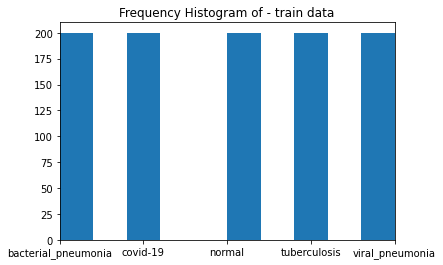

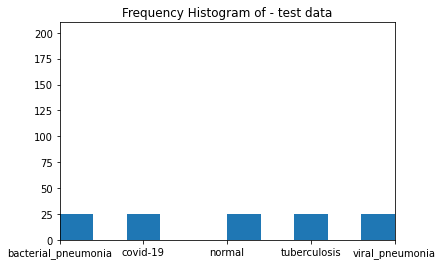

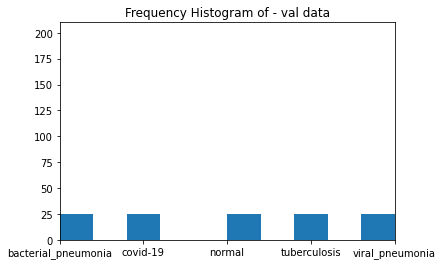

In [ ]:
plt.hist(train['Disease Type'])
plt.title('Frequency Histogram of - train data')
# plt.figure(figsize=(12, 12))
plt.axis([0, 4, 0, 210])

plt.show()

plt.hist(test['Disease Type'])
plt.title('Frequency Histogram of - test data')
# plt.figure(figsize=(12, 12))
plt.axis([0, 4, 0, 210])

plt.show()

plt.hist(val['Disease Type'])
plt.title('Frequency Histogram of - val data')
# plt.figure(figsize=(12, 12))
plt.axis([0, 4, 0, 210])

plt.show()

In [ ]:
IMAGE_SIZE = 224

## Load data for first training

In [ ]:
X_train_255 = np.zeros((train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

for i, file in tqdm(enumerate(train['File'].values)):
        img = read_image_train(file)
        X_train_255[i, ...] = divide_data_by255(img)

5it [00:00, 33.19it/s]

210
0.8235294117647058
231
0.9058823529411765
232
0.9098039215686274
237
0.9294117647058824
237
0.9294117647058824
206
0.807843137254902
247
0.9686274509803922
236
0.9254901960784314
254
0.996078431372549


16it [00:00, 36.74it/s]

230
0.9019607843137255
236
0.9254901960784314
240
0.9411764705882353
240
0.9411764705882353
247
0.9686274509803922
242
0.9490196078431372
229
0.8980392156862745


24it [00:00, 37.40it/s]

210
0.8235294117647058
232
0.9098039215686274
219
0.8588235294117647
227
0.8901960784313725
229
0.8980392156862745
253
0.9921568627450981
241
0.9450980392156862
250
0.9803921568627451
250
0.9803921568627451
252
0.9882352941176471


36it [00:00, 47.29it/s]

221
0.8666666666666667
233
0.9137254901960784
250
0.9803921568627451
239
0.9372549019607843
254
0.996078431372549
227
0.8901960784313725
252
0.9882352941176471
252
0.9882352941176471
230
0.9019607843137255
244
0.9568627450980393
252
0.9882352941176471


47it [00:01, 48.89it/s]

243
0.9529411764705882
217
0.8509803921568627
246
0.9647058823529412
250
0.9803921568627451
250
0.9803921568627451
233
0.9137254901960784
254
0.996078431372549
250
0.9803921568627451
221
0.8666666666666667
221
0.8666666666666667
252
0.9882352941176471
252
0.9882352941176471


52it [00:01, 44.57it/s]

245
0.9607843137254902
227
0.8901960784313725
229
0.8980392156862745
232
0.9098039215686274
255
1.0
211
0.8274509803921568
249
0.9764705882352941


64it [00:01, 47.00it/s]

251
0.984313725490196
251
0.984313725490196
249
0.9764705882352941
253
0.9921568627450981
237
0.9294117647058824
236
0.9254901960784314
252
0.9882352941176471
245
0.9607843137254902
232
0.9098039215686274
251
0.984313725490196
252
0.9882352941176471
244
0.9568627450980393


75it [00:01, 49.02it/s]

242
0.9490196078431372
235
0.9215686274509803
225
0.8823529411764706
242
0.9490196078431372
251
0.984313725490196
253
0.9921568627450981
216
0.8470588235294118
238
0.9333333333333333
228
0.8941176470588236
245
0.9607843137254902
214
0.8392156862745098


86it [00:01, 50.34it/s]

224
0.8784313725490196
212
0.8313725490196079
223
0.8745098039215686
235
0.9215686274509803
240
0.9411764705882353
237
0.9294117647058824
236
0.9254901960784314
224
0.8784313725490196
254
0.996078431372549
228
0.8941176470588236
228
0.8941176470588236
222
0.8705882352941177


99it [00:02, 54.35it/s]

233
0.9137254901960784
233
0.9137254901960784
246
0.9647058823529412
216
0.8470588235294118
238
0.9333333333333333
238
0.9333333333333333
251
0.984313725490196
219
0.8588235294117647
255
1.0
237
0.9294117647058824
254
0.996078431372549
231
0.9058823529411765
241


113it [00:02, 58.39it/s]

0.9450980392156862
225
0.8823529411764706
250
0.9803921568627451
243
0.9529411764705882
255
1.0
241
0.9450980392156862
250
0.9803921568627451
229
0.8980392156862745
254
0.996078431372549
206
0.807843137254902
252
0.9882352941176471
219
0.8588235294117647
251
0.984313725490196


126it [00:02, 57.88it/s]

226
0.8862745098039215
225
0.8823529411764706
251
0.984313725490196
255
1.0
228
0.8941176470588236
250
0.9803921568627451
239
0.9372549019607843
240
0.9411764705882353
222
0.8705882352941177
254
0.996078431372549
250
0.9803921568627451
254
0.996078431372549


138it [00:02, 53.70it/s]

223
0.8745098039215686
243
0.9529411764705882
254
0.996078431372549
213
0.8352941176470589
234
0.9176470588235294
235
0.9215686274509803
240
0.9411764705882353
255
1.0
252
0.9882352941176471
202
0.792156862745098


144it [00:02, 51.80it/s]

248
0.9725490196078431
254
0.996078431372549
235
0.9215686274509803
229
0.8980392156862745
232
0.9098039215686274
253
0.9921568627450981
251
0.984313725490196
247
0.9686274509803922
223
0.8745098039215686
254
0.996078431372549
244
0.9568627450980393
253
0.9921568627450981


157it [00:03, 56.42it/s]

231
0.9058823529411765
228
0.8941176470588236
246
0.9647058823529412
255
1.0
208
0.8156862745098039
220
0.8627450980392157
240
0.9411764705882353
196
0.7686274509803922
250
0.9803921568627451
252
0.9882352941176471
199
0.7803921568627451
254
0.996078431372549
252
0.9882352941176471
218
0.8549019607843137


172it [00:03, 58.01it/s]

218
0.8549019607843137
243
0.9529411764705882
227
0.8901960784313725
203
0.796078431372549
251
0.984313725490196
254
0.996078431372549
220
0.8627450980392157
254
0.996078431372549
254
0.996078431372549
210
0.8235294117647058
229
0.8980392156862745
227
0.8901960784313725


187it [00:03, 63.03it/s]

245
0.9607843137254902
253
0.9921568627450981
236
0.9254901960784314
237
0.9294117647058824
250
0.9803921568627451
242
0.9490196078431372
248
0.9725490196078431
244
0.9568627450980393
248
0.9725490196078431
235
0.9215686274509803
218
0.8549019607843137
240
0.9411764705882353
251
0.984313725490196
250
0.9803921568627451


195it [00:03, 65.23it/s]

213
0.8352941176470589
252
0.9882352941176471
227
0.8901960784313725
252
0.9882352941176471
236
0.9254901960784314
216
0.8470588235294118
245
0.9607843137254902
238
0.9333333333333333
253
0.9921568627450981
251
0.984313725490196


202it [00:04, 31.44it/s]

254
0.996078431372549
239
0.9372549019607843
255
1.0
255
1.0
254
0.996078431372549


207it [00:04, 20.72it/s]

255
1.0
255
1.0
255
1.0
213
0.8352941176470589


211it [00:04, 19.90it/s]

255
1.0
221
0.8666666666666667
234
0.9176470588235294
255
1.0
255
1.0
255
1.0
247
0.9686274509803922


232it [00:05, 41.70it/s]

213
0.8352941176470589
250
0.9803921568627451
254
0.996078431372549
221
0.8666666666666667
221
0.8666666666666667
234
0.9176470588235294
215
0.8431372549019608
225
0.8823529411764706
183
0.7176470588235294
229
0.8980392156862745
232
0.9098039215686274
208
0.8156862745098039
208
0.8156862745098039
244
0.9568627450980393
185
0.7254901960784313
227
0.8901960784313725
227
0.8901960784313725
231
0.9058823529411765
234
0.9176470588235294
217
0.8509803921568627
215
0.8431372549019608
172
0.6745098039215687
232
0.9098039215686274
246
0.9647058823529412
205
0.803921568627451
228
0.8941176470588236
228
0.8941176470588236
216
0.8470588235294118
191
0.7490196078431373
231
0.9058823529411765
206
0.807843137254902


267it [00:05, 86.09it/s]

239
0.9372549019607843
227
0.8901960784313725
228
0.8941176470588236
221
0.8666666666666667
225
0.8823529411764706
220
0.8627450980392157
234
0.9176470588235294
214
0.8392156862745098
231
0.9058823529411765
254
0.996078431372549
201
0.788235294117647
239
0.9372549019607843
254
0.996078431372549
255
1.0
223
0.8745098039215686
252
0.9882352941176471
147
0.5764705882352941
235
0.9215686274509803
213
0.8352941176470589
169
0.6627450980392157
210
0.8235294117647058
208
0.8156862745098039
243
0.9529411764705882
219
0.8588235294117647
222
0.8705882352941177
253
0.9921568627450981
232
0.9098039215686274
221
0.8666666666666667
255
1.0
232
0.9098039215686274
244
0.9568627450980393
222
0.8705882352941177
228
0.8941176470588236
243
0.9529411764705882
255
1.0
227
0.8901960784313725


300it [00:05, 114.29it/s]

236
0.9254901960784314
225
0.8823529411764706
230
0.9019607843137255
206
0.807843137254902
236
0.9254901960784314
199
0.7803921568627451
223
0.8745098039215686
255
1.0
223
0.8745098039215686
229
0.8980392156862745
210
0.8235294117647058
220
0.8627450980392157
221
0.8666666666666667
255
1.0
229
0.8980392156862745
199
0.7803921568627451
241
0.9450980392156862
242
0.9490196078431372
188
0.7372549019607844
194
0.7607843137254902
220
0.8627450980392157
212
0.8313725490196079
234
0.9176470588235294
239
0.9372549019607843
255
1.0
255
1.0
232
0.9098039215686274
216
0.8470588235294118
223
0.8745098039215686


330it [00:05, 128.47it/s]

215
0.8431372549019608
190
0.7450980392156863
183
0.7176470588235294
236
0.9254901960784314
250
0.9803921568627451
250
0.9803921568627451
236
0.9254901960784314
236
0.9254901960784314
231
0.9058823529411765
230
0.9019607843137255
242
0.9490196078431372
246
0.9647058823529412
210
0.8235294117647058
255
1.0
238
0.9333333333333333
250
0.9803921568627451
255
1.0
206
0.807843137254902
224
0.8784313725490196
221
0.8666666666666667
252
0.9882352941176471
238
0.9333333333333333
178
0.6980392156862745
213
0.8352941176470589
241
0.9450980392156862
224
0.8784313725490196
224
0.8784313725490196
234
0.9176470588235294
222
0.8705882352941177


361it [00:06, 137.18it/s]

234
0.9176470588235294
246
0.9647058823529412
167
0.6549019607843137
196
0.7686274509803922
247
0.9686274509803922
234
0.9176470588235294
255
1.0
233
0.9137254901960784
205
0.803921568627451
223
0.8745098039215686
209
0.8196078431372549
223
0.8745098039215686
232
0.9098039215686274
215
0.8431372549019608
252
0.9882352941176471
211
0.8274509803921568
229
0.8980392156862745
238
0.9333333333333333
235
0.9215686274509803
255
1.0
242
0.9490196078431372
248
0.9725490196078431
222
0.8705882352941177
245
0.9607843137254902
204
0.8
248
0.9725490196078431
213
0.8352941176470589
252
0.9882352941176471
243
0.9529411764705882
234
0.9176470588235294


391it [00:06, 141.97it/s]

245
0.9607843137254902
235
0.9215686274509803
237
0.9294117647058824
236
0.9254901960784314
182
0.7137254901960784
196
0.7686274509803922
237
0.9294117647058824
218
0.8549019607843137
214
0.8392156862745098
174
0.6823529411764706
255
1.0
190
0.7450980392156863
227
0.8901960784313725
227
0.8901960784313725
255
1.0
213
0.8352941176470589
234
0.9176470588235294
245
0.9607843137254902
227
0.8901960784313725
244
0.9568627450980393
251
0.984313725490196
254
0.996078431372549
238
0.9333333333333333
216
0.8470588235294118
236
0.9254901960784314
255
1.0
199
0.7803921568627451
246
0.9647058823529412
236
0.9254901960784314
246
0.9647058823529412
255
1.0
255
1.0


406it [00:06, 72.05it/s] 

255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0
238
0.9333333333333333
247
0.9686274509803922
255
1.0
255
1.0
245
0.9607843137254902


418it [00:07, 41.23it/s]

255
1.0
248
0.9725490196078431
249
0.9764705882352941
248
0.9725490196078431
248
0.9725490196078431
250
0.9803921568627451
246
0.9647058823529412
255
1.0
254
0.996078431372549
255
1.0


427it [00:07, 35.18it/s]

255
1.0
254
0.996078431372549
251
0.984313725490196
255
1.0
239
0.9372549019607843
245
0.9607843137254902


434it [00:08, 32.86it/s]

255
1.0
252
0.9882352941176471
255
1.0
249
0.9764705882352941
250
0.9803921568627451


440it [00:08, 29.07it/s]

251
0.984313725490196
255
1.0
254
0.996078431372549
243
0.9529411764705882
253
0.9921568627450981


445it [00:08, 29.27it/s]

255
1.0
255
1.0
254
0.996078431372549
251
0.984313725490196
245
0.9607843137254902
248
0.9725490196078431


453it [00:08, 29.38it/s]

255
1.0
249
0.9764705882352941
251
0.984313725490196
255
1.0
255
1.0
252
0.9882352941176471
255
1.0
252
0.9882352941176471
255
1.0


460it [00:09, 23.02it/s]

255
1.0
253
0.9921568627450981
249
0.9764705882352941
247
0.9686274509803922


463it [00:09, 22.37it/s]

242
0.9490196078431372
250
0.9803921568627451
247
0.9686274509803922
246
0.9647058823529412
239
0.9372549019607843


469it [00:09, 21.87it/s]

255
1.0
245
0.9607843137254902
255
1.0
246
0.9647058823529412
245
0.9607843137254902


475it [00:09, 22.57it/s]

255
1.0
255
1.0
248
0.9725490196078431
254
0.996078431372549
254
0.996078431372549


478it [00:10, 19.28it/s]

253
0.9921568627450981
253
0.9921568627450981
245
0.9607843137254902
255
1.0


485it [00:10, 22.56it/s]

247
0.9686274509803922
253
0.9921568627450981
253
0.9921568627450981
246
0.9647058823529412
245
0.9607843137254902
255
1.0


488it [00:10, 20.25it/s]

255
1.0
238
0.9333333333333333
250
0.9803921568627451
243
0.9529411764705882
255
1.0


494it [00:10, 20.38it/s]

255
1.0
255
1.0
253
0.9921568627450981
255
1.0


497it [00:10, 20.44it/s]

255
1.0
255
1.0
248
0.9725490196078431
241
0.9450980392156862
248
0.9725490196078431


503it [00:11, 22.68it/s]

255
1.0
248
0.9725490196078431
223
0.8745098039215686
252
0.9882352941176471
254
0.996078431372549
255
1.0


509it [00:11, 24.68it/s]

254
0.996078431372549
255
1.0
255
1.0
253
0.9921568627450981


512it [00:11, 18.41it/s]

255
1.0
237
0.9294117647058824
248
0.9725490196078431


518it [00:11, 21.23it/s]

252
0.9882352941176471
255
1.0
255
1.0
253
0.9921568627450981
246
0.9647058823529412
255
1.0


521it [00:12, 19.51it/s]

252
0.9882352941176471
245
0.9607843137254902
253
0.9921568627450981
254
0.996078431372549
254
0.996078431372549


528it [00:12, 21.98it/s]

251
0.984313725490196
248
0.9725490196078431
254
0.996078431372549
215
0.8431372549019608
254
0.996078431372549


532it [00:12, 23.70it/s]

225
0.8823529411764706
230
0.9019607843137255
253
0.9921568627450981
226
0.8862745098039215
241
0.9450980392156862
255
1.0
254
0.996078431372549


536it [00:12, 26.02it/s]

238
0.9333333333333333
255
1.0
254
0.996078431372549


539it [00:13, 14.19it/s]

218
0.8549019607843137
225
0.8823529411764706
230
0.9019607843137255


542it [00:14,  6.52it/s]

204
0.8
224
0.8784313725490196


544it [00:15,  5.02it/s]

251
0.984313725490196
249
0.9764705882352941


546it [00:15,  4.17it/s]

242
0.9490196078431372


547it [00:16,  3.26it/s]

209
0.8196078431372549


548it [00:16,  3.03it/s]

232
0.9098039215686274


549it [00:17,  2.94it/s]

247
0.9686274509803922


550it [00:17,  3.11it/s]

245
0.9607843137254902


551it [00:18,  2.41it/s]

255
1.0


552it [00:18,  2.51it/s]

214
0.8392156862745098


553it [00:19,  2.55it/s]

242
0.9490196078431372


554it [00:19,  2.60it/s]

246
0.9647058823529412


555it [00:19,  2.88it/s]

255
1.0


557it [00:20,  3.38it/s]

255
1.0
252
0.9882352941176471


558it [00:20,  3.32it/s]

228
0.8941176470588236


559it [00:20,  2.97it/s]

255
1.0


560it [00:21,  2.85it/s]

251
0.984313725490196


561it [00:21,  2.89it/s]

248
0.9725490196078431


562it [00:22,  2.80it/s]

252
0.9882352941176471


563it [00:22,  2.72it/s]

254
0.996078431372549


564it [00:23,  2.11it/s]

246
0.9647058823529412


565it [00:23,  1.87it/s]

239
0.9372549019607843


566it [00:24,  2.05it/s]

254
0.996078431372549


567it [00:24,  1.77it/s]

253
0.9921568627450981


568it [00:25,  1.90it/s]

254
0.996078431372549


569it [00:25,  2.09it/s]

251
0.984313725490196


570it [00:26,  2.30it/s]

251
0.984313725490196


571it [00:26,  2.63it/s]

255
1.0


572it [00:26,  2.64it/s]

199
0.7803921568627451


573it [00:27,  2.47it/s]

254
0.996078431372549


574it [00:27,  2.52it/s]

244
0.9568627450980393


575it [00:27,  2.46it/s]

247
0.9686274509803922


576it [00:28,  2.68it/s]

255
1.0


577it [00:28,  3.04it/s]

253
0.9921568627450981


578it [00:28,  3.36it/s]

252
0.9882352941176471


579it [00:28,  3.42it/s]

237
0.9294117647058824


580it [00:29,  3.27it/s]

254
0.996078431372549


581it [00:29,  3.57it/s]

242
0.9490196078431372


582it [00:30,  2.61it/s]

255
1.0


583it [00:30,  2.49it/s]

247
0.9686274509803922


584it [00:30,  2.78it/s]

252
0.9882352941176471


585it [00:31,  2.57it/s]

253
0.9921568627450981


586it [00:31,  2.63it/s]

243
0.9529411764705882


587it [00:32,  2.73it/s]

252
0.9882352941176471


588it [00:32,  2.50it/s]

254
0.996078431372549


589it [00:32,  2.40it/s]

252
0.9882352941176471


590it [00:33,  2.21it/s]

252
0.9882352941176471


591it [00:33,  2.37it/s]

255
1.0


592it [00:34,  2.48it/s]

252
0.9882352941176471


593it [00:34,  2.47it/s]

254
0.996078431372549


595it [00:35,  2.79it/s]

252
0.9882352941176471
254
0.996078431372549


597it [00:35,  3.03it/s]

249
0.9764705882352941
251
0.984313725490196


598it [00:36,  3.25it/s]

253
0.9921568627450981


599it [00:36,  3.08it/s]

251
0.984313725490196


601it [00:37,  3.44it/s]

255
1.0
246
0.9647058823529412


602it [00:37,  3.66it/s]

255
1.0


603it [00:37,  3.94it/s]

250
0.9803921568627451


604it [00:38,  3.15it/s]

247
0.9686274509803922


605it [00:38,  3.14it/s]

245
0.9607843137254902


606it [00:38,  3.03it/s]

255
1.0


607it [00:38,  3.38it/s]

255
1.0


609it [00:39,  3.20it/s]

248
0.9725490196078431
255
1.0


610it [00:39,  3.09it/s]

250
0.9803921568627451


611it [00:40,  2.55it/s]

243
0.9529411764705882


612it [00:41,  2.28it/s]

252
0.9882352941176471


613it [00:41,  2.10it/s]

247
0.9686274509803922


614it [00:42,  2.12it/s]

249
0.9764705882352941


615it [00:42,  2.35it/s]

249
0.9764705882352941


616it [00:42,  2.59it/s]

255
1.0


617it [00:43,  2.35it/s]

253
0.9921568627450981


618it [00:43,  2.52it/s]

255
1.0


619it [00:43,  2.79it/s]

247
0.9686274509803922


620it [00:44,  2.94it/s]

248
0.9725490196078431


621it [00:44,  3.02it/s]

253
0.9921568627450981


622it [00:44,  2.84it/s]

248
0.9725490196078431


623it [00:45,  2.26it/s]

255
1.0


624it [00:45,  2.54it/s]

254
0.996078431372549


625it [00:46,  2.66it/s]

255
1.0


626it [00:46,  2.31it/s]

255
1.0


627it [00:47,  2.20it/s]

255
1.0


628it [00:47,  2.04it/s]

255
1.0


629it [00:48,  1.97it/s]

249
0.9764705882352941


630it [00:48,  1.88it/s]

250
0.9803921568627451


631it [00:49,  2.18it/s]

255
1.0


632it [00:49,  2.43it/s]

252
0.9882352941176471


633it [00:49,  2.67it/s]

255
1.0


634it [00:50,  2.81it/s]

245
0.9607843137254902


635it [00:50,  3.02it/s]

248
0.9725490196078431


636it [00:50,  3.09it/s]

255
1.0


637it [00:51,  2.52it/s]

246
0.9647058823529412


638it [00:51,  2.68it/s]

249
0.9764705882352941


639it [00:52,  2.33it/s]

255
1.0


640it [00:52,  2.35it/s]

239
0.9372549019607843


641it [00:52,  2.40it/s]

246
0.9647058823529412


642it [00:53,  2.22it/s]

246
0.9647058823529412


643it [00:54,  2.06it/s]

255
1.0


644it [00:54,  2.49it/s]

255
1.0


645it [00:54,  2.35it/s]

247
0.9686274509803922


646it [00:55,  2.12it/s]

241
0.9450980392156862


647it [00:55,  2.12it/s]

246
0.9647058823529412


648it [00:56,  1.99it/s]

245
0.9607843137254902


649it [00:56,  2.24it/s]

234
0.9176470588235294


650it [00:57,  2.08it/s]

249
0.9764705882352941


651it [00:57,  2.11it/s]

254
0.996078431372549


652it [00:58,  1.96it/s]

252
0.9882352941176471


653it [00:58,  1.92it/s]

254
0.996078431372549


654it [00:59,  2.06it/s]

255
1.0


655it [00:59,  2.32it/s]

255
1.0


656it [00:59,  2.34it/s]

247
0.9686274509803922


657it [01:00,  2.19it/s]

245
0.9607843137254902


658it [01:00,  2.27it/s]

255
1.0


659it [01:01,  2.01it/s]

255
1.0


660it [01:02,  1.91it/s]

246
0.9647058823529412


661it [01:02,  2.18it/s]

255
1.0


662it [01:02,  2.15it/s]

244
0.9568627450980393


663it [01:03,  2.03it/s]

255
1.0


664it [01:03,  2.15it/s]

255
1.0


665it [01:04,  2.41it/s]

246
0.9647058823529412


666it [01:04,  1.88it/s]

243
0.9529411764705882


667it [01:05,  1.90it/s]

243
0.9529411764705882


668it [01:05,  2.18it/s]

247
0.9686274509803922


669it [01:06,  2.09it/s]

255
1.0


670it [01:06,  2.00it/s]

244
0.9568627450980393


671it [01:07,  1.99it/s]

249
0.9764705882352941


672it [01:07,  2.42it/s]

246
0.9647058823529412


673it [01:07,  2.68it/s]

246
0.9647058823529412


674it [01:08,  2.78it/s]

255
1.0


675it [01:08,  2.85it/s]

255
1.0


676it [01:09,  2.33it/s]

255
1.0


677it [01:09,  2.18it/s]

255
1.0


678it [01:09,  2.43it/s]

254
0.996078431372549


679it [01:10,  2.67it/s]

252
0.9882352941176471


680it [01:10,  2.36it/s]

238
0.9333333333333333


681it [01:11,  2.18it/s]

249
0.9764705882352941


682it [01:11,  2.11it/s]

247
0.9686274509803922


683it [01:12,  2.43it/s]

244
0.9568627450980393


684it [01:12,  2.61it/s]

251
0.984313725490196


685it [01:12,  2.76it/s]

238
0.9333333333333333


686it [01:13,  2.62it/s]

252
0.9882352941176471


687it [01:13,  2.30it/s]

249
0.9764705882352941


688it [01:13,  2.48it/s]

250
0.9803921568627451


689it [01:14,  2.45it/s]

249
0.9764705882352941


690it [01:14,  2.32it/s]

242
0.9490196078431372


691it [01:15,  2.57it/s]

245
0.9607843137254902


692it [01:15,  2.61it/s]

246
0.9647058823529412


693it [01:16,  2.38it/s]

255
1.0


694it [01:16,  2.13it/s]

246
0.9647058823529412


695it [01:16,  2.49it/s]

242
0.9490196078431372


696it [01:17,  2.78it/s]

247
0.9686274509803922


697it [01:17,  2.81it/s]

245
0.9607843137254902


698it [01:17,  3.00it/s]

248
0.9725490196078431


699it [01:18,  3.10it/s]

245
0.9607843137254902


700it [01:18,  3.06it/s]

250
0.9803921568627451


701it [01:18,  3.21it/s]

246
0.9647058823529412


702it [01:18,  3.37it/s]

246
0.9647058823529412


703it [01:19,  3.43it/s]

255
1.0


704it [01:19,  3.03it/s]

242
0.9490196078431372


705it [01:20,  2.73it/s]

244
0.9568627450980393


706it [01:20,  2.47it/s]

249
0.9764705882352941


707it [01:20,  2.65it/s]

240
0.9411764705882353


708it [01:21,  2.43it/s]

247
0.9686274509803922


709it [01:21,  2.74it/s]

255
1.0


710it [01:22,  2.32it/s]

249
0.9764705882352941


711it [01:22,  2.55it/s]

237
0.9294117647058824


713it [01:23,  3.21it/s]

244
0.9568627450980393
255
1.0


714it [01:23,  2.61it/s]

255
1.0


715it [01:24,  2.30it/s]

248
0.9725490196078431


716it [01:24,  2.31it/s]

255
1.0


717it [01:24,  2.74it/s]

250
0.9803921568627451


718it [01:25,  2.50it/s]

255
1.0


719it [01:25,  2.25it/s]

251
0.984313725490196


720it [01:26,  2.25it/s]

244
0.9568627450980393


721it [01:26,  2.15it/s]

255
1.0


722it [01:27,  2.21it/s]

251
0.984313725490196


723it [01:27,  2.39it/s]

245
0.9607843137254902


725it [01:27,  3.16it/s]

246
0.9647058823529412
250
0.9803921568627451


726it [01:28,  2.66it/s]

247
0.9686274509803922


727it [01:29,  2.29it/s]

255
1.0


728it [01:29,  2.26it/s]

255
1.0


729it [01:30,  2.16it/s]

245
0.9607843137254902


730it [01:30,  2.03it/s]

248
0.9725490196078431


731it [01:31,  1.99it/s]

247
0.9686274509803922


732it [01:31,  1.87it/s]

245
0.9607843137254902


733it [01:32,  2.17it/s]

255
1.0


734it [01:32,  2.04it/s]

254
0.996078431372549


735it [01:32,  2.20it/s]

243
0.9529411764705882


736it [01:33,  2.50it/s]

245
0.9607843137254902


737it [01:33,  2.19it/s]

248
0.9725490196078431


738it [01:34,  2.12it/s]

247
0.9686274509803922


739it [01:34,  2.39it/s]

247
0.9686274509803922


740it [01:34,  2.64it/s]

234
0.9176470588235294


741it [01:35,  2.43it/s]

244
0.9568627450980393


742it [01:35,  2.28it/s]

255
1.0


743it [01:36,  2.33it/s]

247
0.9686274509803922


744it [01:36,  2.20it/s]

244
0.9568627450980393


745it [01:37,  2.34it/s]

248
0.9725490196078431


746it [01:37,  2.39it/s]

244
0.9568627450980393


747it [01:37,  2.63it/s]

246
0.9647058823529412


748it [01:38,  2.36it/s]

246
0.9647058823529412


749it [01:38,  2.64it/s]

248
0.9725490196078431


750it [01:39,  2.62it/s]

247
0.9686274509803922


751it [01:39,  2.83it/s]

244
0.9568627450980393


752it [01:39,  2.42it/s]

244
0.9568627450980393


753it [01:40,  2.24it/s]

249
0.9764705882352941


754it [01:40,  2.33it/s]

244
0.9568627450980393


755it [01:41,  2.39it/s]

245
0.9607843137254902


756it [01:41,  2.40it/s]

242
0.9490196078431372


757it [01:41,  2.52it/s]

239
0.9372549019607843


758it [01:42,  2.48it/s]

243
0.9529411764705882


759it [01:42,  2.30it/s]

242
0.9490196078431372


760it [01:43,  2.63it/s]

248
0.9725490196078431


761it [01:43,  2.43it/s]

247
0.9686274509803922


762it [01:44,  2.47it/s]

250
0.9803921568627451


763it [01:44,  2.56it/s]

248
0.9725490196078431


764it [01:44,  2.28it/s]

255
1.0


765it [01:45,  2.54it/s]

246
0.9647058823529412


766it [01:45,  2.50it/s]

251
0.984313725490196


768it [01:46,  3.16it/s]

245
0.9607843137254902
248
0.9725490196078431


769it [01:46,  3.21it/s]

255
1.0


770it [01:46,  2.66it/s]

246
0.9647058823529412


771it [01:47,  2.37it/s]

241
0.9450980392156862


772it [01:48,  2.23it/s]

238
0.9333333333333333


773it [01:48,  2.13it/s]

241
0.9450980392156862


774it [01:48,  2.48it/s]

246
0.9647058823529412


775it [01:49,  2.07it/s]

239
0.9372549019607843


776it [01:49,  2.28it/s]

255
1.0


777it [01:50,  2.20it/s]

244
0.9568627450980393


778it [01:50,  2.26it/s]

248
0.9725490196078431


779it [01:51,  2.11it/s]

238
0.9333333333333333


780it [01:51,  2.05it/s]

241
0.9450980392156862


781it [01:52,  2.05it/s]

237
0.9294117647058824


782it [01:52,  2.39it/s]

238
0.9333333333333333


783it [01:53,  2.21it/s]

242
0.9490196078431372


784it [01:53,  2.50it/s]

249
0.9764705882352941


785it [01:53,  2.29it/s]

248
0.9725490196078431


786it [01:54,  2.50it/s]

243
0.9529411764705882


787it [01:54,  2.65it/s]

245
0.9607843137254902


788it [01:54,  2.85it/s]

255
1.0


789it [01:55,  2.95it/s]

246
0.9647058823529412


790it [01:55,  3.12it/s]

238
0.9333333333333333


791it [01:55,  3.18it/s]

245
0.9607843137254902


792it [01:55,  3.39it/s]

249
0.9764705882352941


793it [01:56,  3.44it/s]

236
0.9254901960784314


794it [01:56,  3.60it/s]

249
0.9764705882352941


795it [01:56,  3.74it/s]

245
0.9607843137254902


796it [01:56,  3.65it/s]

245
0.9607843137254902


797it [01:57,  3.48it/s]

245
0.9607843137254902


798it [01:57,  3.38it/s]

249
0.9764705882352941


799it [01:57,  3.27it/s]

243
0.9529411764705882


800it [01:58,  3.57it/s]

242
0.9490196078431372


801it [01:58,  3.32it/s]

255
1.0


802it [01:58,  3.34it/s]

255
1.0


804it [02:00,  2.02it/s]

255
1.0
255
1.0


805it [02:00,  2.15it/s]

255
1.0


806it [02:01,  1.87it/s]

255
1.0


807it [02:02,  1.76it/s]

255
1.0


808it [02:02,  1.64it/s]

252
0.9882352941176471


809it [02:03,  1.83it/s]

255
1.0


810it [02:03,  1.97it/s]

255
1.0


811it [02:04,  2.09it/s]

255
1.0


812it [02:04,  1.90it/s]

249
0.9764705882352941


813it [02:05,  2.01it/s]

254
0.996078431372549


814it [02:05,  2.18it/s]

255
1.0


815it [02:05,  2.41it/s]

255
1.0


816it [02:06,  2.23it/s]

246
0.9647058823529412


817it [02:06,  1.97it/s]

239
0.9372549019607843


818it [02:07,  1.84it/s]

247
0.9686274509803922


819it [02:08,  1.95it/s]

253
0.9921568627450981


820it [02:08,  1.77it/s]

249
0.9764705882352941


822it [02:09,  2.33it/s]

248
0.9725490196078431
213
0.8352941176470589


823it [02:09,  2.31it/s]

151
0.592156862745098


824it [02:10,  2.01it/s]

193
0.7568627450980392


825it [02:10,  2.32it/s]

195
0.7647058823529411


826it [02:11,  2.02it/s]

200
0.7843137254901961


827it [02:11,  2.11it/s]

235
0.9215686274509803


828it [02:12,  1.85it/s]

236
0.9254901960784314


829it [02:12,  2.03it/s]

251
0.984313725490196


830it [02:13,  1.90it/s]

205
0.803921568627451


831it [02:13,  2.04it/s]

233
0.9137254901960784


832it [02:14,  2.09it/s]

242
0.9490196078431372


833it [02:14,  2.18it/s]

248
0.9725490196078431


834it [02:15,  2.28it/s]

242
0.9490196078431372


835it [02:15,  2.11it/s]

214
0.8392156862745098


836it [02:16,  2.10it/s]

212
0.8313725490196079


837it [02:16,  2.30it/s]

235
0.9215686274509803


838it [02:16,  2.73it/s]

233
0.9137254901960784


839it [02:17,  2.24it/s]

245
0.9607843137254902


840it [02:17,  2.68it/s]

254
0.996078431372549


841it [02:17,  2.93it/s]

255
1.0


842it [02:18,  3.00it/s]

253
0.9921568627450981


843it [02:18,  3.40it/s]

254
0.996078431372549


844it [02:18,  2.96it/s]

252
0.9882352941176471


845it [02:18,  3.34it/s]

200
0.7843137254901961


846it [02:19,  3.58it/s]

206
0.807843137254902


847it [02:19,  3.83it/s]

251
0.984313725490196


848it [02:19,  4.01it/s]

255
1.0


849it [02:19,  4.24it/s]

254
0.996078431372549


850it [02:20,  4.28it/s]

248
0.9725490196078431


851it [02:20,  4.06it/s]

233
0.9137254901960784


852it [02:20,  3.46it/s]

252
0.9882352941176471


853it [02:20,  3.63it/s]

249
0.9764705882352941


854it [02:21,  3.42it/s]

201
0.788235294117647


855it [02:21,  3.52it/s]

223
0.8745098039215686


856it [02:21,  3.44it/s]

255
1.0


857it [02:22,  3.66it/s]

199
0.7803921568627451


858it [02:22,  3.49it/s]

238
0.9333333333333333


859it [02:22,  3.37it/s]

204
0.8


860it [02:23,  3.39it/s]

254
0.996078431372549


861it [02:23,  3.29it/s]

214
0.8392156862745098


862it [02:23,  3.16it/s]

255
1.0


863it [02:23,  3.41it/s]

255
1.0


864it [02:24,  3.66it/s]

254
0.996078431372549


865it [02:24,  3.95it/s]

255
1.0


866it [02:24,  3.47it/s]

255
1.0


867it [02:25,  3.32it/s]

218
0.8549019607843137


868it [02:25,  3.22it/s]

248
0.9725490196078431


869it [02:25,  3.38it/s]

254
0.996078431372549


870it [02:25,  3.61it/s]

254
0.996078431372549


871it [02:26,  3.85it/s]

255
1.0


872it [02:26,  3.96it/s]

255
1.0


873it [02:26,  4.14it/s]

255
1.0


874it [02:26,  3.78it/s]

222
0.8705882352941177


875it [02:27,  3.37it/s]

226
0.8862745098039215


876it [02:27,  3.10it/s]

254
0.996078431372549


877it [02:27,  3.23it/s]

254
0.996078431372549


878it [02:28,  3.54it/s]

254
0.996078431372549


880it [02:28,  4.02it/s]

251
0.984313725490196
253
0.9921568627450981


881it [02:28,  4.39it/s]

252
0.9882352941176471


882it [02:29,  3.68it/s]

254
0.996078431372549


883it [02:29,  3.37it/s]

254
0.996078431372549


884it [02:29,  3.05it/s]

255
1.0


885it [02:30,  2.73it/s]

254
0.996078431372549


886it [02:30,  3.03it/s]

252
0.9882352941176471


887it [02:30,  3.12it/s]

255
1.0


888it [02:31,  3.15it/s]

255
1.0


889it [02:31,  3.46it/s]

255
1.0


890it [02:31,  3.11it/s]

225
0.8823529411764706


891it [02:32,  3.37it/s]

255
1.0


892it [02:32,  3.10it/s]

255
1.0
251


893it [02:32,  3.50it/s]

0.984313725490196


894it [02:32,  3.62it/s]

255
1.0


895it [02:33,  2.98it/s]

253
0.9921568627450981


896it [02:33,  3.22it/s]

225
0.8823529411764706


897it [02:34,  2.97it/s]

255
1.0


898it [02:34,  2.93it/s]

251
0.984313725490196


899it [02:34,  2.86it/s]

248
0.9725490196078431


900it [02:35,  2.90it/s]

252
0.9882352941176471


901it [02:35,  3.26it/s]

254
0.996078431372549


902it [02:35,  3.42it/s]

255
1.0


903it [02:35,  3.68it/s]

254
0.996078431372549


904it [02:36,  3.77it/s]

255
1.0


905it [02:36,  3.97it/s]

248
0.9725490196078431


906it [02:36,  3.65it/s]

254
0.996078431372549


907it [02:37,  3.23it/s]

252
0.9882352941176471


908it [02:37,  3.41it/s]

254
0.996078431372549


909it [02:37,  3.61it/s]

255
1.0


910it [02:37,  3.42it/s]

252
0.9882352941176471


911it [02:38,  2.60it/s]

215
0.8431372549019608


912it [02:38,  3.01it/s]

255
1.0


913it [02:38,  3.25it/s]

255
1.0
214


914it [02:39,  3.63it/s]

0.8392156862745098


915it [02:39,  3.75it/s]

250
0.9803921568627451


916it [02:39,  4.04it/s]

252
0.9882352941176471


917it [02:40,  2.69it/s]

255
1.0


918it [02:40,  2.75it/s]

208
0.8156862745098039


919it [02:41,  2.32it/s]

244
0.9568627450980393


920it [02:41,  2.36it/s]

243
0.9529411764705882


921it [02:41,  2.67it/s]

251
0.984313725490196


922it [02:42,  3.04it/s]

252
0.9882352941176471


923it [02:42,  3.01it/s]

255
1.0


924it [02:42,  3.12it/s]

255
1.0


925it [02:42,  3.30it/s]

252
0.9882352941176471


926it [02:43,  3.53it/s]

203
0.796078431372549


927it [02:43,  2.44it/s]

254
0.996078431372549


928it [02:44,  2.85it/s]

254
0.996078431372549


929it [02:44,  3.16it/s]

255
1.0


930it [02:44,  3.37it/s]

197
0.7725490196078432


931it [02:44,  3.19it/s]

255
1.0


932it [02:45,  3.44it/s]

253
0.9921568627450981


933it [02:45,  3.37it/s]

253
0.9921568627450981


934it [02:45,  3.49it/s]

255
1.0


935it [02:45,  3.79it/s]

252
0.9882352941176471


936it [02:46,  4.05it/s]

255
1.0


937it [02:46,  3.34it/s]

255
1.0


938it [02:46,  3.02it/s]

249
0.9764705882352941


939it [02:47,  3.37it/s]

255
1.0


940it [02:47,  3.59it/s]

255
1.0


941it [02:47,  3.86it/s]

255
1.0


942it [02:47,  3.51it/s]

219
0.8588235294117647


943it [02:48,  3.75it/s]

254
0.996078431372549


944it [02:48,  3.59it/s]

255
1.0


945it [02:48,  3.90it/s]

241
0.9450980392156862


946it [02:49,  3.67it/s]

221
0.8666666666666667


947it [02:49,  3.07it/s]

253
0.9921568627450981


948it [02:49,  3.11it/s]

210
0.8235294117647058


949it [02:50,  2.96it/s]

230
0.9019607843137255


950it [02:50,  2.08it/s]

204
0.8


951it [02:51,  2.27it/s]

227
0.8901960784313725


952it [02:51,  2.34it/s]

205
0.803921568627451


953it [02:52,  2.39it/s]

222
0.8705882352941177


954it [02:52,  2.30it/s]

221
0.8666666666666667


955it [02:52,  2.61it/s]

255
1.0


956it [02:53,  2.57it/s]

255
1.0


957it [02:53,  2.93it/s]

239
0.9372549019607843


958it [02:54,  2.33it/s]

211
0.8274509803921568


959it [02:54,  2.53it/s]

248
0.9725490196078431


960it [02:54,  2.68it/s]

254
0.996078431372549


961it [02:55,  2.96it/s]

255
1.0


962it [02:55,  2.99it/s]

204
0.8


963it [02:55,  2.48it/s]

243
0.9529411764705882


964it [02:56,  2.82it/s]

206
0.807843137254902


965it [02:56,  3.05it/s]

255
1.0


966it [02:56,  3.01it/s]

253
0.9921568627450981


967it [02:57,  2.48it/s]

237
0.9294117647058824


968it [02:57,  2.44it/s]

255
1.0


969it [02:57,  2.81it/s]

215
0.8431372549019608


971it [02:58,  3.58it/s]

252
0.9882352941176471
255
1.0


973it [02:59,  2.86it/s]

254
0.996078431372549
254
0.996078431372549


974it [02:59,  3.15it/s]

255
1.0


975it [03:00,  2.44it/s]

252
0.9882352941176471


976it [03:00,  2.61it/s]

255
1.0


977it [03:00,  2.50it/s]

244
0.9568627450980393


978it [03:01,  2.65it/s]

255
1.0


979it [03:01,  2.73it/s]

207
0.8117647058823529


980it [03:01,  3.06it/s]

251
0.984313725490196


981it [03:02,  3.25it/s]

245
0.9607843137254902


983it [03:02,  3.36it/s]

247
0.9686274509803922
255
1.0


984it [03:03,  2.20it/s]

246
0.9647058823529412


985it [03:03,  2.37it/s]

252
0.9882352941176471


986it [03:04,  2.73it/s]

252
0.9882352941176471


987it [03:04,  2.83it/s]

255
1.0


988it [03:04,  2.81it/s]

255
1.0


989it [03:05,  3.16it/s]

214
0.8392156862745098


990it [03:05,  3.47it/s]

255
1.0


991it [03:05,  3.70it/s]

252
0.9882352941176471


992it [03:05,  3.80it/s]

251
0.984313725490196


993it [03:05,  3.88it/s]

251
0.984313725490196


994it [03:06,  3.64it/s]

223
0.8745098039215686


995it [03:06,  3.43it/s]

207
0.8117647058823529


996it [03:06,  3.19it/s]

255
1.0


997it [03:07,  3.54it/s]

255
1.0


998it [03:07,  3.21it/s]

203
0.796078431372549


999it [03:07,  2.98it/s]

254
0.996078431372549


1000it [03:08,  5.31it/s]

182
0.7137254901960784


In [ ]:
X_test_255 = np.zeros((test.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

for i, file in tqdm(enumerate(test['File'].values)):
        img = read_image_test(file)
        X_test_255[i, ...] = divide_data_by255(img)

1it [00:00,  3.30it/s]

246
0.9647058823529412


2it [00:00,  3.87it/s]

239
0.9372549019607843


3it [00:00,  4.08it/s]

242
0.9490196078431372


5it [00:01,  4.52it/s]

245
0.9607843137254902
252
0.9882352941176471


6it [00:01,  4.99it/s]

226
0.8862745098039215


7it [00:01,  4.85it/s]

251
0.984313725490196


8it [00:01,  4.44it/s]

240
0.9411764705882353


10it [00:02,  4.93it/s]

240
0.9411764705882353
223
0.8745098039215686


11it [00:02,  3.95it/s]

224
0.8784313725490196


12it [00:02,  4.14it/s]

252
0.9882352941176471


13it [00:02,  4.25it/s]

237
0.9294117647058824


14it [00:03,  3.75it/s]

236
0.9254901960784314


15it [00:03,  3.85it/s]

225
0.8823529411764706


17it [00:04,  4.05it/s]

248
0.9725490196078431
218
0.8549019607843137


18it [00:04,  3.64it/s]

226
0.8862745098039215


19it [00:04,  3.68it/s]

254
0.996078431372549


21it [00:05,  3.82it/s]

252
0.9882352941176471
247
0.9686274509803922


23it [00:05,  4.36it/s]

255
1.0
254
0.996078431372549


24it [00:05,  4.31it/s]

204
0.8


26it [00:06,  4.68it/s]

247
0.9686274509803922
197
0.7725490196078432


27it [00:06,  4.11it/s]

253
0.9921568627450981


29it [00:07,  3.85it/s]

247
0.9686274509803922
247
0.9686274509803922


30it [00:07,  3.71it/s]

227
0.8901960784313725


31it [00:07,  3.71it/s]

254
0.996078431372549


32it [00:08,  3.66it/s]

214
0.8392156862745098


34it [00:08,  4.07it/s]

237
0.9294117647058824
238
0.9333333333333333


35it [00:08,  3.93it/s]

255
1.0


36it [00:09,  3.72it/s]

226
0.8862745098039215


38it [00:09,  3.88it/s]

240
0.9411764705882353
191
0.7490196078431373


40it [00:09,  4.53it/s]

242
0.9490196078431372
251
0.984313725490196


41it [00:10,  2.82it/s]

254
0.996078431372549


42it [00:11,  2.58it/s]

251
0.984313725490196


43it [00:11,  2.99it/s]

227
0.8901960784313725


45it [00:11,  3.69it/s]

219
0.8588235294117647
252
0.9882352941176471


46it [00:12,  3.56it/s]

216
0.8470588235294118


47it [00:12,  2.77it/s]

255
1.0


48it [00:12,  2.70it/s]

254
0.996078431372549


50it [00:13,  3.41it/s]

239
0.9372549019607843
249
0.9764705882352941


51it [00:13,  2.94it/s]

238
0.9333333333333333


52it [00:14,  2.32it/s]

249
0.9764705882352941


53it [00:14,  2.48it/s]

246
0.9647058823529412


54it [00:15,  1.86it/s]

252
0.9882352941176471


55it [00:16,  1.99it/s]

254
0.996078431372549


56it [00:16,  1.90it/s]

253
0.9921568627450981


57it [00:17,  1.96it/s]

248
0.9725490196078431


58it [00:17,  1.86it/s]

251
0.984313725490196


59it [00:18,  2.01it/s]

250
0.9803921568627451


60it [00:18,  1.98it/s]

255
1.0


61it [00:19,  2.12it/s]

255
1.0


62it [00:19,  2.22it/s]

251
0.984313725490196


63it [00:20,  1.95it/s]

252
0.9882352941176471


64it [00:22,  1.03it/s]

255
1.0


65it [00:22,  1.27it/s]

255
1.0


66it [00:23,  1.42it/s]

255
1.0


67it [00:23,  1.53it/s]

255
1.0


68it [00:27,  1.66s/it]

244
0.9568627450980393


69it [00:28,  1.33s/it]

244
0.9568627450980393


70it [00:28,  1.10s/it]

255
1.0


71it [00:29,  1.14it/s]

252
0.9882352941176471


72it [00:29,  1.28it/s]

249
0.9764705882352941


73it [00:30,  1.44it/s]

255
1.0


74it [00:30,  1.68it/s]

250
0.9803921568627451


76it [00:31,  2.23it/s]

252
0.9882352941176471
255
1.0


77it [00:31,  2.46it/s]

249
0.9764705882352941


79it [00:31,  3.14it/s]

250
0.9803921568627451
254
0.996078431372549


81it [00:32,  3.15it/s]

246
0.9647058823529412
255
1.0


83it [00:33,  3.18it/s]

250
0.9803921568627451
255
1.0


85it [00:33,  3.62it/s]

238
0.9333333333333333
249
0.9764705882352941


86it [00:34,  3.51it/s]

251
0.984313725490196


87it [00:34,  3.62it/s]

249
0.9764705882352941


88it [00:34,  3.67it/s]

255
1.0


89it [00:35,  2.69it/s]

252
0.9882352941176471


90it [00:35,  2.83it/s]

251
0.984313725490196


92it [00:36,  3.37it/s]

243
0.9529411764705882
255
1.0


93it [00:36,  3.65it/s]

248
0.9725490196078431


94it [00:36,  3.53it/s]

249
0.9764705882352941


95it [00:37,  3.25it/s]

251
0.984313725490196


96it [00:37,  2.60it/s]

255
1.0


97it [00:37,  2.56it/s]

250
0.9803921568627451


98it [00:38,  2.70it/s]

255
1.0


99it [00:40,  1.17it/s]

255
1.0


100it [00:40,  1.40it/s]

255
1.0


101it [00:40,  1.74it/s]

255
1.0


102it [00:41,  1.90it/s]

201
0.788235294117647


103it [00:41,  2.02it/s]

226
0.8862745098039215


104it [00:42,  2.23it/s]

213
0.8352941176470589


105it [00:42,  2.32it/s]

254
0.996078431372549


106it [00:42,  2.25it/s]

255
1.0


108it [00:43,  2.63it/s]

248
0.9725490196078431
254
0.996078431372549


110it [00:44,  3.45it/s]

255
1.0
255
1.0


111it [00:44,  3.43it/s]

221
0.8666666666666667


112it [00:44,  3.78it/s]

254
0.996078431372549


113it [00:44,  3.69it/s]

250
0.9803921568627451


114it [00:45,  3.92it/s]

255
1.0


115it [00:45,  3.22it/s]

255
1.0


116it [00:45,  2.75it/s]

254
0.996078431372549


117it [00:46,  2.46it/s]

255
1.0


118it [00:46,  2.32it/s]

253
0.9921568627450981


119it [00:47,  2.29it/s]

201
0.788235294117647


120it [00:47,  2.43it/s]

219
0.8588235294117647


121it [00:48,  2.53it/s]

255
1.0


122it [00:48,  2.83it/s]

254
0.996078431372549


123it [00:48,  2.81it/s]

255
1.0


125it [00:49,  2.54it/s]

214
0.8392156862745098
206
0.807843137254902


In [ ]:
X_val_255 = np.zeros((val.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

for i, file in tqdm(enumerate(val['File'].values)):
        img = read_image_val(file)
        X_val_255[i, ...] = divide_data_by255(img)

1it [00:00,  4.02it/s]

231
0.9058823529411765


3it [00:00,  4.10it/s]

250
0.9803921568627451
241
0.9450980392156862


4it [00:01,  4.11it/s]

241
0.9450980392156862


6it [00:01,  4.53it/s]

229
0.8980392156862745
241
0.9450980392156862


7it [00:01,  4.42it/s]

228
0.8941176470588236


8it [00:01,  4.45it/s]

255
1.0


9it [00:02,  4.14it/s]

254
0.996078431372549


10it [00:02,  3.86it/s]

231
0.9058823529411765


12it [00:02,  3.97it/s]

251
0.984313725490196
251
0.984313725490196


13it [00:03,  3.42it/s]

224
0.8784313725490196


14it [00:03,  3.63it/s]

207
0.8117647058823529


15it [00:03,  3.90it/s]

209
0.8196078431372549


16it [00:04,  3.73it/s]

243
0.9529411764705882


17it [00:04,  3.36it/s]

220
0.8627450980392157


18it [00:04,  3.60it/s]

231
0.9058823529411765


19it [00:04,  3.83it/s]

207
0.8117647058823529


20it [00:05,  3.93it/s]

217
0.8509803921568627


21it [00:05,  3.72it/s]

231
0.9058823529411765


22it [00:05,  3.49it/s]

228
0.8941176470588236


23it [00:06,  3.74it/s]

249
0.9764705882352941


24it [00:06,  3.93it/s]

221
0.8666666666666667


25it [00:06,  4.13it/s]

228
0.8941176470588236


26it [00:07,  2.81it/s]

254
0.996078431372549


27it [00:07,  2.02it/s]

255
1.0


28it [00:08,  1.90it/s]

255
1.0


29it [00:08,  2.01it/s]

254
0.996078431372549


30it [00:09,  1.87it/s]

255
1.0


31it [00:10,  1.68it/s]

255
1.0


32it [00:11,  1.48it/s]

253
0.9921568627450981


33it [00:11,  1.62it/s]

255
1.0


34it [00:12,  1.75it/s]

255
1.0


35it [00:12,  1.74it/s]

255
1.0


36it [00:13,  1.94it/s]

254
0.996078431372549


37it [00:13,  2.14it/s]

254
0.996078431372549


38it [00:13,  2.32it/s]

255
1.0


39it [00:14,  2.00it/s]

241
0.9450980392156862


40it [00:14,  2.29it/s]

250
0.9803921568627451


42it [00:15,  2.12it/s]

234
0.9176470588235294
253
0.9921568627450981


43it [00:16,  2.48it/s]

254
0.996078431372549


44it [00:16,  2.31it/s]

254
0.996078431372549


46it [00:17,  2.75it/s]

249
0.9764705882352941
248
0.9725490196078431


47it [00:17,  2.73it/s]

239
0.9372549019607843


48it [00:18,  2.23it/s]

234
0.9176470588235294
215


49it [00:18,  2.68it/s]

0.8431372549019608


50it [00:18,  3.10it/s]

254
0.996078431372549


51it [00:19,  2.43it/s]

252
0.9882352941176471


52it [00:19,  2.01it/s]

247
0.9686274509803922


53it [00:20,  2.20it/s]

250
0.9803921568627451


54it [00:20,  2.17it/s]

255
1.0


55it [00:21,  2.13it/s]

254
0.996078431372549


56it [00:21,  1.85it/s]

254
0.996078431372549


57it [00:22,  1.84it/s]

252
0.9882352941176471


58it [00:23,  1.74it/s]

254
0.996078431372549


59it [00:23,  1.94it/s]

249
0.9764705882352941


60it [00:23,  2.11it/s]

252
0.9882352941176471


61it [00:24,  1.92it/s]

254
0.996078431372549


62it [00:24,  2.10it/s]

255
1.0


63it [00:25,  2.26it/s]

255
1.0


64it [00:26,  1.93it/s]

233
0.9137254901960784


65it [00:26,  2.10it/s]

251
0.984313725490196


66it [00:26,  2.13it/s]

255
1.0


67it [00:27,  2.14it/s]

254
0.996078431372549


68it [00:27,  2.19it/s]

237
0.9294117647058824


69it [00:28,  2.01it/s]

246
0.9647058823529412


70it [00:29,  1.77it/s]

253
0.9921568627450981


71it [00:29,  1.86it/s]

255
1.0


72it [00:29,  1.99it/s]

250
0.9803921568627451


73it [00:30,  2.07it/s]

251
0.984313725490196


74it [00:30,  2.07it/s]

251
0.984313725490196


75it [00:31,  1.73it/s]

251
0.984313725490196


76it [00:32,  1.73it/s]

255
1.0


77it [00:32,  1.79it/s]

255
1.0


78it [00:33,  2.05it/s]

255
1.0


79it [00:33,  2.19it/s]

249
0.9764705882352941


80it [00:33,  2.41it/s]

252
0.9882352941176471


81it [00:34,  2.55it/s]

255
1.0


82it [00:34,  2.29it/s]

251
0.984313725490196


83it [00:35,  2.13it/s]

247
0.9686274509803922


84it [00:35,  2.03it/s]

245
0.9607843137254902


85it [00:36,  2.05it/s]

245
0.9607843137254902


86it [00:36,  2.18it/s]

251
0.984313725490196


87it [00:37,  2.24it/s]

255
1.0


88it [00:37,  2.44it/s]

251
0.984313725490196


89it [00:37,  2.51it/s]

250
0.9803921568627451


90it [00:38,  2.73it/s]

255
1.0


91it [00:38,  2.55it/s]

249
0.9764705882352941


92it [00:38,  2.65it/s]

255
1.0


93it [00:39,  2.32it/s]

249
0.9764705882352941


94it [00:39,  2.66it/s]

250
0.9803921568627451


95it [00:40,  2.34it/s]

250
0.9803921568627451


96it [00:40,  2.20it/s]

250
0.9803921568627451


97it [00:41,  2.11it/s]

247
0.9686274509803922


98it [00:41,  2.00it/s]

253
0.9921568627450981


99it [00:42,  1.96it/s]

251
0.984313725490196


100it [00:42,  1.96it/s]

249
0.9764705882352941


101it [00:43,  1.79it/s]

255
1.0


102it [00:44,  1.71it/s]

253
0.9921568627450981


103it [00:44,  1.86it/s]

249
0.9764705882352941


104it [00:45,  1.77it/s]

233
0.9137254901960784


105it [00:45,  1.69it/s]

253
0.9921568627450981


107it [00:46,  2.44it/s]

254
0.996078431372549
246
0.9647058823529412


108it [00:46,  2.87it/s]

252
0.9882352941176471


109it [00:47,  2.58it/s]

254
0.996078431372549


111it [00:47,  3.48it/s]

243
0.9529411764705882
240
0.9411764705882353


112it [00:47,  2.69it/s]

255
1.0


113it [00:48,  2.95it/s]

255
1.0


114it [00:48,  3.06it/s]

214
0.8392156862745098


115it [00:48,  3.40it/s]

255
1.0


116it [00:48,  3.75it/s]

189
0.7411764705882353


117it [00:49,  3.92it/s]

255
1.0


118it [00:49,  4.16it/s]

255
1.0


119it [00:49,  4.17it/s]

223
0.8745098039215686


120it [00:49,  3.91it/s]

252
0.9882352941176471


121it [00:50,  4.11it/s]

253
0.9921568627450981


122it [00:50,  4.07it/s]

252
0.9882352941176471


123it [00:50,  4.30it/s]

192
0.7529411764705882


124it [00:50,  4.05it/s]

253
0.9921568627450981


125it [00:51,  2.45it/s]

254
0.996078431372549


In [ ]:
# print('Train Shape: {}'.format(X_train.shape))
Y_train = train['DiseaseID'].values
Y_train = to_categorical(Y_train, num_classes=len(categories))

In [ ]:
# print('Test Shape: {}'.format(X_test.shape))
Y_test = test['DiseaseID'].values
Y_test = to_categorical(Y_test, num_classes=len(categories))

In [ ]:
# print('Val Shape: {}'.format(X_val.shape))
Y_val = val['DiseaseID'].values
Y_val = to_categorical(Y_val, num_classes=len(categories))

In [ ]:
import pickle as pkl
#to save it
if (os.path.isfile('train_255_224.pkl') == False):
  with open("train_255_224.pkl", "wb") as f:
    pkl.dump([X_train_255, Y_train], f, protocol=4)
else:
  print('File exists on disk')

if (os.path.isfile('val_255_224.pkl') == False):
  with open("val_255_224.pkl", "wb") as f:
    pkl.dump([X_val_255, Y_val], f, protocol=4)
else:
  print('File exists on disk')

if (os.path.exists('test_255_224.pkl') == False):
  with open("test_255_224.pkl", "wb") as f:
    pkl.dump([X_test_255, Y_test], f, protocol=4)
    print("Done")
else:
  print('File exists on disk')

File exists on disk
File exists on disk
File exists on disk


In [ ]:
X_train = np.zeros((train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

for i, file in tqdm(enumerate(train['File'].values)):
        img = read_image_train(file)
        X_train[i, ...] = normalize_alg(img)

5it [00:00, 33.28it/s]

210
1.0
231
1.0
232
1.0
237
1.0
237
1.0
206
1.0
247
1.0
236
1.0
254


11it [00:00, 43.60it/s]

1.0
230
1.0
236
1.0
240
1.0
240
1.0
247
1.0
242
1.0


20it [00:00, 37.42it/s]

229
1.0
210
1.0
232
1.0
219
1.0
227
1.0
229
1.0
253
1.0
241
1.0


30it [00:00, 43.24it/s]

250
1.0
250
1.0
252
1.0
221
1.0
233
1.0
250
1.0
239
1.0
254
1.0
227
1.0
252
1.0
252
1.0


41it [00:00, 47.09it/s]

230
1.0
244
1.0
252
1.0
243
1.0
217
1.0
246
1.0
250
1.0
250
1.0
233
1.0
254
1.0
250
1.0


52it [00:01, 43.62it/s]

221
1.0
221
1.0
252
1.0
252
1.0
245
1.0
227
1.0
229
1.0


57it [00:01, 41.81it/s]

232
1.0
255
1.0
211
1.0
249
1.0
251
1.0
251
1.0
249
1.0
253
1.0
237
1.0
236
1.0
252
1.0


69it [00:01, 45.93it/s]

245
1.0
232
1.0
251
1.0
252
1.0
244
1.0
242
1.0
235
1.0
225
1.0
242
1.0
251
1.0


80it [00:01, 47.00it/s]

253
1.0
216
1.0
238
1.0
228
1.0
245
1.0
214
1.0
224
1.0
212
1.0
223
1.0
235
1.0


92it [00:02, 51.85it/s]

240
1.0
237
1.0
236
1.0
224
1.0
254
1.0
228
1.0
228
1.0
222
1.0
233
1.0
233
1.0
246
1.0
216
1.0


104it [00:02, 54.93it/s]

238
1.0
238
1.0
251
1.0
219
1.0
255
1.0
237
1.0
254
1.0
231
1.0
241
1.0
225
1.0
250
1.0
243
1.0
255
1.0


117it [00:02, 57.16it/s]

241
1.0
250
1.0
229
1.0
254
1.0
206
1.0
252
1.0
219
1.0
251
1.0
226
1.0
225
1.0
251
1.0
255
1.0


129it [00:02, 52.61it/s]

228
1.0
250
1.0
239
1.0
240
1.0
222
1.0
254
1.0
250
1.0
254
1.0
223
1.0
243
1.0


135it [00:02, 54.32it/s]

254
1.0
213
1.0
234
1.0
235
1.0
240
1.0
255
1.0
252
1.0
202
1.0
248
1.0
254
1.0


147it [00:03, 51.03it/s]

235
1.0
229
1.0
232
1.0
253
1.0
251
1.0
247
1.0
223
1.0
254
1.0
244
1.0
253
1.0
231
1.0


160it [00:03, 56.40it/s]

228
1.0
246
1.0
255
1.0
208
1.0
220
1.0
240
1.0
196
1.0
250
1.0
252
1.0
199
1.0
254
1.0
252
1.0
218
1.0
218
1.0


173it [00:03, 57.37it/s]

243
1.0
227
1.0
203
1.0
251
1.0
254
1.0
220
1.0
254
1.0
254
1.0
210
1.0
229
1.0
227
1.0
245
1.0


187it [00:03, 61.38it/s]

253
1.0
236
1.0
237
1.0
250
1.0
242
1.0
248
1.0
244
1.0
248
1.0
235
1.0
218
1.0
240
1.0
251
1.0
250
1.0
213
1.0


195it [00:03, 63.53it/s]

252
1.0
227
1.0
252
1.0
236
1.0
216
1.0
245
1.0
238
1.0
253
1.0
251
1.0


202it [00:04, 30.19it/s]

254
1.0
239
1.0
255
1.0
255
1.0
254
1.0


207it [00:04, 20.07it/s]

255
1.0
255
1.0
255
1.0
213
1.0


211it [00:05, 19.27it/s]

255
1.0
221
1.0
234
1.0
255
1.0
255
1.0
255
1.0
247
1.0


232it [00:05, 41.37it/s]

213
1.0
250
1.0
254
1.0
221
1.0
221
1.0
234
1.0
215
1.0
225
1.0
183
1.0
229
1.0
232
1.0
208
1.0
208
1.0
244
1.0
185
1.0
227
1.0
227
1.0
231
1.0
234
1.0
217
1.0
215
1.0
172
1.0
232
1.0
246
1.0
205
1.0
228
1.0
228
1.0
216
1.0
191
1.0
231
1.0


266it [00:05, 83.69it/s]

206
1.0
239
1.0
227
1.0
228
1.0
221
1.0
225
1.0
220
1.0
234
1.0
214
1.0
231
1.0
254
1.0
201
1.0
239
1.0
254
1.0
255
1.0
223
1.0
252
1.0
147
1.0
235
1.0
213
1.0
169
1.0
210
1.0
208
1.0
243
1.0
219
1.0
222
1.0
253
1.0
232
1.0
221
1.0
255
1.0
232
1.0
244
1.0
222
1.0
228
1.0
243
1.0


300it [00:05, 115.04it/s]

255
1.0
227
1.0
236
1.0
225
1.0
230
1.0
206
1.0
236
1.0
199
1.0
223
1.0
255
1.0
223
1.0
229
1.0
210
1.0
220
1.0
221
1.0
255
1.0
229
1.0
199
1.0
241
1.0
242
1.0
188
1.0
194
1.0
220
1.0
212
1.0
234
1.0
239
1.0
255
1.0
255
1.0
232
1.0
216
1.0


330it [00:05, 128.63it/s]

223
1.0
215
1.0
190
1.0
183
1.0
236
1.0
250
1.0
250
1.0
236
1.0
236
1.0
231
1.0
230
1.0
242
1.0
246
1.0
210
1.0
255
1.0
238
1.0
250
1.0
255
1.0
206
1.0
224
1.0
221
1.0
252
1.0
238
1.0
178
1.0
213
1.0
241
1.0
224
1.0
224
1.0
234
1.0
222
1.0


360it [00:06, 137.22it/s]

234
1.0
246
1.0
167
1.0
196
1.0
247
1.0
234
1.0
255
1.0
233
1.0
205
1.0
223
1.0
209
1.0
223
1.0
232
1.0
215
1.0
252
1.0
211
1.0
229
1.0
238
1.0
235
1.0
255
1.0
242
1.0
248
1.0
222
1.0
245
1.0
204
1.0
248
1.0
213
1.0
252
1.0
243
1.0
234


390it [00:06, 139.85it/s]

1.0
245
1.0
235
1.0
237
1.0
236
1.0
182
1.0
196
1.0
237
1.0
218
1.0
214
1.0
174
1.0
255
1.0
190
1.0
227
1.0
227
1.0
255
1.0
213
1.0
234
1.0
245
1.0
227
1.0
244
1.0
251
1.0
254
1.0
238
1.0
216
1.0
236
1.0
255
1.0
199
1.0
246
1.0
236
1.0
246
1.0
255
1.0
255
1.0


405it [00:06, 74.39it/s] 

255
1.0
255
1.0
255
1.0
254
1.0
255
1.0
255
1.0
255
1.0
238
1.0
247
1.0
255
1.0
255
1.0
245
1.0


417it [00:07, 41.08it/s]

255
1.0
248
1.0
249
1.0
248
1.0
248
1.0
250
1.0
246
1.0
255
1.0
254
1.0
255
1.0


426it [00:07, 35.08it/s]

255
1.0
254
1.0
251
1.0
255
1.0
239
1.0
245
1.0


433it [00:08, 32.88it/s]

255
1.0
252
1.0
255
1.0
249
1.0
250
1.0


439it [00:08, 29.92it/s]

251
1.0
255
1.0
254
1.0
243
1.0
253
1.0


444it [00:08, 28.56it/s]

255
1.0
255
1.0
254
1.0
251
1.0
245
1.0
248
1.0


452it [00:08, 29.27it/s]

255
1.0
249
1.0
251
1.0
255
1.0
255
1.0
252
1.0


456it [00:09, 24.32it/s]

255
1.0
252
1.0
255
1.0


459it [00:09, 23.21it/s]

255
1.0
253
1.0
249
1.0
247
1.0


465it [00:09, 22.00it/s]

242
1.0
250
1.0
247
1.0
246
1.0
239
1.0


469it [00:09, 21.99it/s]

255
1.0
245
1.0
255
1.0
246
1.0
245


472it [00:09, 22.79it/s]

1.0
255
1.0
255
1.0
248
1.0
254
1.0
254


475it [00:10, 22.41it/s]

1.0
253
1.0
253
1.0


482it [00:10, 22.03it/s]

245
1.0
255
1.0
247
1.0
253
1.0
253
1.0
246
1.0


485it [00:10, 22.20it/s]

245
1.0
255
1.0
255
1.0
238
1.0


491it [00:10, 21.10it/s]

250
1.0
243
1.0
255
1.0
255
1.0
255
1.0


494it [00:11, 20.05it/s]

253
1.0
255
1.0
255
1.0
255
1.0


500it [00:11, 20.35it/s]

248
1.0
241
1.0
248
1.0
255
1.0
248
1.0


506it [00:11, 24.19it/s]

223
1.0
252
1.0
254
1.0
255
1.0
254
1.0
255
1.0


509it [00:11, 24.54it/s]

255
1.0
253
1.0
255
1.0


515it [00:11, 19.95it/s]

237
1.0
248
1.0
252
1.0
255
1.0
255
1.0


518it [00:12, 21.29it/s]

253
1.0
246
1.0
255
1.0
252
1.0


525it [00:12, 22.01it/s]

245
1.0
253
1.0
254
1.0
254
1.0
251
1.0
248
1.0


528it [00:12, 21.74it/s]

254
1.0
215
1.0
254
1.0
225
1.0
230
1.0


536it [00:12, 25.89it/s]

253
1.0
226
1.0
241
1.0
255
1.0
254
1.0
238
1.0


540it [00:12, 28.02it/s]

255
1.0
254
1.0
218
1.0
225
1.0
230
1.0
204
1.0


547it [00:13, 26.48it/s]

224
1.0
251
1.0
249
1.0
242
1.0
209
1.0
232
1.0


550it [00:13, 26.41it/s]

247
1.0
245
1.0
255
1.0
214
1.0


557it [00:13, 27.17it/s]

242
1.0
246
1.0
255
1.0
255
1.0
252
1.0
228
1.0
255
1.0


563it [00:13, 26.17it/s]

251
1.0
248
1.0
252
1.0
254
1.0


566it [00:14, 21.49it/s]

246
1.0
239
1.0
254
1.0
253
1.0
254
1.0


573it [00:14, 25.93it/s]

251
1.0
251
1.0
255
1.0
199
1.0
254
1.0
244
1.0
247
1.0


580it [00:14, 29.29it/s]

255
1.0
253
1.0
252
1.0
237
1.0
254
1.0
242
1.0
255
1.0


584it [00:14, 30.68it/s]

247
1.0
252
1.0
253
1.0
243
1.0
252
1.0
254


592it [00:14, 29.88it/s]

1.0
252
1.0
252
1.0
255
1.0
252
1.0
254
1.0
252
1.0
254
1.0


600it [00:15, 31.58it/s]

249
1.0
251
1.0
253
1.0
251
1.0
255
1.0
246
1.0
255
1.0
250
1.0
247
1.0
245
1.0
255
1.0
255
1.0


621it [00:15, 63.52it/s]

248
1.0
255
1.0
250
1.0
243
1.0
252
1.0
247
1.0
249
1.0
249
1.0
255
1.0
253
1.0
255
1.0
247
1.0
248
1.0
253
1.0
248
1.0
255
1.0
254
1.0
255
1.0
255
1.0
255
1.0
255
1.0


641it [00:15, 79.26it/s]

249
1.0
250
1.0
255
1.0
252
1.0
255
1.0
245
1.0
248
1.0
255
1.0
246
1.0
249
1.0
255
1.0
239
1.0
246
1.0
246
1.0
255
1.0
255
1.0
247
1.0
241
1.0
246
1.0


661it [00:15, 87.87it/s]

245
1.0
234
1.0
249
1.0
254
1.0
252
1.0
254
1.0
255
1.0
255
1.0
247
1.0
245
1.0
255
1.0
255
1.0
246
1.0
255
1.0
244
1.0
255
1.0
255
1.0
246
1.0
243
1.0
243
1.0


681it [00:15, 91.87it/s]

247
1.0
255
1.0
244
1.0
249
1.0
246
1.0
246
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
1.0
252
1.0
238
1.0
249
1.0
247
1.0
244
1.0
251
1.0
238
1.0
252
1.0
249
1.0


701it [00:16, 95.23it/s]

250
1.0
249
1.0
242
1.0
245
1.0
246
1.0
255
1.0
246
1.0
242
1.0
247
1.0
245
1.0
248
1.0
245
1.0
250
1.0
246
1.0
246
1.0
255
1.0
242
1.0
244
1.0
249
1.0
240
1.0


721it [00:16, 96.67it/s]

247
1.0
255
1.0
249
1.0
237
1.0
244
1.0
255
1.0
255
1.0
248
1.0
255
1.0
250
1.0
255
1.0
251
1.0
244
1.0
255
1.0
251
1.0
245
1.0
246
1.0
250
1.0
247
1.0
255
1.0


741it [00:16, 97.38it/s]

255
1.0
245
1.0
248
1.0
247
1.0
245
1.0
255
1.0
254
1.0
243
1.0
245
1.0
248
1.0
247
1.0
247
1.0
234
1.0
244
1.0
255
1.0
247
1.0
244
1.0
248
1.0
244
1.0
246
1.0


762it [00:16, 98.98it/s]

246
1.0
248
1.0
247
1.0
244
1.0
244
1.0
249
1.0
244
1.0
245
1.0
242
1.0
239
1.0
243
1.0
242
1.0
248
1.0
247
1.0
250
1.0
248
1.0
255
1.0
246
1.0
251
1.0
245
1.0


783it [00:17, 98.82it/s]

248
1.0
255
1.0
246
1.0
241
1.0
238
1.0
241
1.0
246
1.0
239
1.0
255
1.0
244
1.0
248
1.0
238
1.0
241
1.0
237
1.0
238
1.0
242
1.0
249
1.0
248
1.0
243
1.0


793it [00:17, 91.89it/s]

245
1.0
255
1.0
246
1.0
238
1.0
245
1.0
249
1.0
236
1.0
249
1.0
245
1.0
245
1.0
245
1.0
249
1.0
243
1.0
242
1.0
255
1.0


803it [00:17, 79.21it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


812it [00:17, 52.89it/s]

252
1.0
255
1.0
255
1.0
255
1.0
249
1.0
254
1.0


819it [00:17, 46.10it/s]

255
1.0
255
1.0
246
1.0
239
1.0
247
1.0
253
1.0
249
1.0
248
1.0


825it [00:18, 43.65it/s]

213
1.0
151
1.0
193
1.0
195
1.0
200
1.0
235
1.0
236
1.0
251
1.0


836it [00:18, 40.89it/s]

205
1.0
233
1.0
242
1.0
248
1.0
242
1.0
214
1.0
212
1.0
235
1.0


841it [00:18, 39.88it/s]

233
1.0
245
1.0
254
1.0
255
1.0
253
1.0
254
1.0
252
1.0


850it [00:18, 36.61it/s]

200
1.0
206
1.0
251
1.0
255
1.0
254
1.0
248
1.0
233
1.0
252
1.0


858it [00:18, 34.15it/s]

249
1.0
201
1.0
223
1.0
255
1.0
199
1.0
238
1.0


867it [00:19, 37.14it/s]

204
1.0
254
1.0
214
1.0
255
1.0
255
1.0
254
1.0
255
1.0
255
1.0
218
1.0


871it [00:19, 35.49it/s]

248
1.0
254
1.0
254
1.0
255
1.0
255
1.0
255
1.0
222
1.0


879it [00:19, 34.76it/s]

226
1.0
254
1.0
254
1.0
254
1.0
251
1.0
253
1.0
252
1.0
254
1.0


889it [00:19, 38.29it/s]

254
1.0
255
1.0
254
1.0
252
1.0
255
1.0
255
1.0
255
1.0
225
1.0
255
1.0


898it [00:20, 37.09it/s]

255
1.0
251
1.0
255
1.0
253
1.0
225
1.0
255
1.0
251
1.0


902it [00:20, 36.31it/s]

248
1.0
252
1.0
254
1.0
255
1.0
254
1.0
255
1.0
248
1.0


910it [00:20, 34.55it/s]

254
1.0
252
1.0
254
1.0
255
1.0
252
1.0
215
1.0
255
1.0


918it [00:20, 35.33it/s]

255
1.0
214
1.0
250
1.0
252
1.0
255
1.0
208
1.0
244
1.0


926it [00:20, 34.88it/s]

243
1.0
251
1.0
252
1.0
255
1.0
255
1.0
252
1.0
203
1.0
254
1.0


934it [00:21, 34.57it/s]

254
1.0
255
1.0
197
1.0
255
1.0
253
1.0
253
1.0
255
1.0
252
1.0


942it [00:21, 35.28it/s]

255
1.0
255
1.0
249
1.0
255
1.0
255
1.0
255
1.0
219
1.0


947it [00:21, 35.25it/s]

254
1.0
255
1.0
241
1.0
221
1.0
253
1.0
210
1.0
230
1.0
204
1.0


955it [00:21, 32.52it/s]

227
1.0
205
1.0
222
1.0
221
1.0
255
1.0
255
1.0
239
1.0


963it [00:21, 31.56it/s]

211
1.0
248
1.0
254
1.0
255
1.0
204
1.0
243
1.0
206
1.0


967it [00:22, 30.46it/s]

255
1.0
253
1.0
237
1.0
255
1.0
215
1.0
252
1.0
255
1.0


977it [00:22, 34.82it/s]

254
1.0
254
1.0
255
1.0
252
1.0
255
1.0
244
1.0
255
1.0
207
1.0


985it [00:22, 36.23it/s]

251
1.0
245
1.0
247
1.0
255
1.0
246
1.0
252
1.0
252
1.0
255
1.0


994it [00:22, 39.31it/s]

255
1.0
214
1.0
255
1.0
252
1.0
251
1.0
251
1.0
223
1.0
207
1.0


1000it [00:23, 43.46it/s]

255
1.0
255
1.0
203
1.0
254
1.0
182
1.0


In [ ]:
X_test = np.zeros((test.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

for i, file in tqdm(enumerate(test['File'].values)):
        img = read_image_test(file)
        X_test[i, ...] = normalize_alg(img)

13it [00:00, 60.51it/s]

246
1.0
239
1.0
242
1.0
245
1.0
252
1.0
226
1.0
251
1.0
240
1.0
240
1.0
223
1.0
224
1.0
252
1.0
237
1.0


20it [00:00, 57.01it/s]

236
1.0
225
1.0
248
1.0
218
1.0
226
1.0
254
1.0
252
1.0
247
1.0
255
1.0
254
1.0
204
1.0


38it [00:00, 76.09it/s]

247
1.0
197
1.0
253
1.0
247
1.0
247
1.0
227
1.0
254
1.0
214
1.0
237
1.0
238
1.0
255
1.0
226
1.0
240
1.0
191
1.0
242
1.0
251
1.0
254
1.0
251
1.0
227
1.0


46it [00:00, 76.71it/s]

219
1.0
252
1.0
216
1.0
255
1.0
254
1.0
239
1.0
249
1.0
238
1.0
249
1.0


54it [00:00, 50.39it/s]

246
1.0
252
1.0
254
1.0
253
1.0


61it [00:01, 36.12it/s]

248
1.0
251
1.0
250
1.0
255
1.0
255
1.0


66it [00:01, 31.40it/s]

251
1.0
252
1.0
255
1.0
255
1.0
255
1.0


71it [00:01, 26.47it/s]

255
1.0
244
1.0
244
1.0
255
1.0
252
1.0


75it [00:01, 24.62it/s]

249
1.0
255
1.0
250
1.0
252
1.0
255
1.0
249
1.0
250
1.0
254


95it [00:02, 48.23it/s]

1.0
246
1.0
255
1.0
250
1.0
255
1.0
238
1.0
249
1.0
251
1.0
249
1.0
255
1.0
252
1.0
251
1.0
243
1.0
255
1.0
248
1.0
249
1.0
251
1.0
255
1.0
250
1.0
255
1.0


102it [00:02, 52.26it/s]

255
1.0
255
1.0
255
1.0
201
1.0
226
1.0
213
1.0
254
1.0
255
1.0


115it [00:02, 43.17it/s]

248
1.0
254
1.0
255
1.0
255
1.0
221
1.0
254
1.0
250
1.0
255
1.0
255
1.0


121it [00:02, 38.82it/s]

254
1.0
255
1.0
253
1.0
201
1.0
219
1.0
255
1.0
254
1.0


125it [00:02, 41.97it/s]

255
1.0
214
1.0
206
1.0


In [ ]:
X_val = np.zeros((val.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

for i, file in tqdm(enumerate(val['File'].values)):
        img = read_image_val(file)
        X_val[i, ...] = normalize_alg(img)

0it [00:00, ?it/s]

231
1.0
250
1.0
241
1.0
241
1.0
229
1.0


13it [00:00, 61.63it/s]

241
1.0
228
1.0
255
1.0
254
1.0
231
1.0
251
1.0
251
1.0
224
1.0
207
1.0
209
1.0
243
1.0
220
1.0


20it [00:00, 53.60it/s]

231
1.0
207
1.0
217
1.0
231
1.0
228
1.0
249
1.0
221
1.0


26it [00:00, 54.41it/s]

228
1.0
254
1.0
255
1.0
255
1.0
254
1.0
255
1.0
255
1.0


32it [00:00, 42.71it/s]

253
1.0
255
1.0
255
1.0


37it [00:00, 41.84it/s]

255
1.0
254
1.0
254
1.0
255
1.0
241
1.0
250
1.0


46it [00:01, 32.13it/s]

234
1.0
253
1.0
254
1.0
254
1.0
249
1.0
248
1.0
239
1.0


51it [00:01, 35.32it/s]

234
1.0
215
1.0
254
1.0
252
1.0
247
1.0
250
1.0


55it [00:01, 26.91it/s]

255
1.0
254
1.0
254
1.0
252
1.0
254
1.0


62it [00:01, 24.51it/s]

249
1.0
252
1.0
254
1.0
255
1.0
255
1.0


68it [00:02, 24.42it/s]

233
1.0
251
1.0
255
1.0
254
1.0
237
1.0


71it [00:02, 22.98it/s]

246
1.0
253
1.0
255
1.0
250
1.0
251
1.0


78it [00:02, 26.05it/s]

251
1.0
251
1.0
255
1.0
255
1.0
255
1.0
249
1.0
252
1.0
255
1.0
251
1.0
247
1.0
245
1.0
245
1.0
251
1.0
255
1.0


98it [00:02, 57.97it/s]

251
1.0
250
1.0
255
1.0
249
1.0
255
1.0
249
1.0
250
1.0
250
1.0
250
1.0
247
1.0
253
1.0
251
1.0
249
1.0
255
1.0
253
1.0


105it [00:02, 53.37it/s]

249
1.0
233
1.0
253
1.0
254
1.0
246
1.0
252
1.0
254
1.0


111it [00:03, 45.53it/s]

243
1.0
240
1.0
255
1.0
255
1.0
214
1.0
255
1.0
189
1.0


122it [00:03, 40.05it/s]

255
1.0
255
1.0
223
1.0
252
1.0
253
1.0
252
1.0
192
1.0
253
1.0


125it [00:03, 36.65it/s]

254
1.0


In [ ]:
print('Train Shape: {}'.format(X_train.shape))
Y_train = train['DiseaseID'].values
Y_train = to_categorical(Y_train, num_classes=len(categories))

Train Shape: (1000, 224, 224, 3)


In [ ]:
print('Test Shape: {}'.format(X_test.shape))
Y_test = test['DiseaseID'].values
Y_test = to_categorical(Y_test, num_classes=len(categories))

Test Shape: (125, 224, 224, 3)


In [ ]:
print('Val Shape: {}'.format(X_val.shape))
Y_val = val['DiseaseID'].values
Y_val = to_categorical(Y_val, num_classes=len(categories))

Val Shape: (125, 224, 224, 3)


In [ ]:
import pickle as pkl

#to save it
if (os.path.isfile('train_224.pkl') == False):
  with open("train_224.pkl", "wb") as f:
    pkl.dump([X_train_255, Y_train], f, protocol=4)
    print("Done")
else:
  print('File exists on disk')

if (os.path.isfile('val_224.pkl') == False):
  with open("val_224.pkl", "wb") as f:
    pkl.dump([X_val_255, Y_val], f, protocol=4)
    print("Done")
else:
  print('File exists on disk')

if (os.path.exists('test_224.pkl') == False):
  with open("test_224.pkl", "wb") as f:
    pkl.dump([X_test_255, Y_test], f, protocol=4)
    print("Done")
else:
  print('File exists on disk')

File exists on disk
File exists on disk
File exists on disk


In [ ]:
X_train_CLAHE = np.zeros((train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

for i, file in tqdm(enumerate(train['File'].values)):
        img = read_image_train(file)
        img = CLAHE_image(img)
        X_train_CLAHE[i, ...] = normalize_alg(img)

5it [00:00, 16.79it/s]

252
1.0
247
1.0
244
1.0
252
1.0
255
1.0
239
1.0
253
1.0
248


14it [00:00, 28.34it/s]

1.0
255
1.0
247
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


22it [00:00, 30.24it/s]

255
1.0
247
1.0
249
1.0
244
1.0
245
1.0
246
1.0
255
1.0


28it [00:00, 36.16it/s]

252
1.0
254
1.0
255
1.0
254
1.0
254
1.0
248
1.0
254
1.0
249
1.0
255
1.0
253
1.0


38it [00:01, 40.94it/s]

254
1.0
255
1.0
255
1.0
253
1.0
255
1.0
255
1.0
241
1.0
252
1.0
254
1.0
254
1.0


50it [00:01, 45.35it/s]

255
1.0
255
1.0
253
1.0
244
1.0
253
1.0
254
1.0
255
1.0
255
1.0
255


55it [00:01, 37.10it/s]

1.0
255
1.0
255
1.0
255
1.0
240
1.0
253
1.0
254
1.0


67it [00:01, 43.16it/s]

254
1.0
253
1.0
255
1.0
245
1.0
243
1.0
254
1.0
250
1.0
255
1.0
255
1.0
255
1.0
255
1.0


78it [00:02, 44.08it/s]

255
1.0
248
1.0
247
1.0
250
1.0
254
1.0
254
1.0
238
1.0
254
1.0
255
1.0
254
1.0


83it [00:02, 43.43it/s]

237
1.0
255
1.0
243
1.0
255
1.0
252
1.0
255
1.0
249
1.0
255
1.0
245
1.0
255
1.0


94it [00:02, 47.78it/s]

246
1.0
246
1.0
248
1.0
253
1.0
255
1.0
253
1.0
255
1.0
255
1.0
248
1.0
254
1.0
255
1.0


106it [00:02, 51.96it/s]

255
1.0
249
1.0
254
1.0
243
1.0
250
1.0
254
1.0
254
1.0
255
1.0
255
1.0
250
1.0
255
1.0
255
1.0


118it [00:02, 52.26it/s]

255
1.0
235
1.0
255
1.0
245
1.0
254
1.0
250
1.0
255
1.0
255
1.0
255
1.0
246
1.0
255


130it [00:03, 48.73it/s]

1.0
249
1.0
255
1.0
254
1.0
254
1.0
255
1.0
255
1.0
254
1.0
248
1.0
254


140it [00:03, 46.23it/s]

1.0
239
1.0
255
1.0
252
1.0
250
1.0
255
1.0
254
1.0
247
1.0
254
1.0
255
1.0


150it [00:03, 45.97it/s]

252
1.0
255
1.0
255
1.0
255
1.0
253
1.0
254
1.0
245
1.0
255
1.0
252
1.0
254
1.0


163it [00:03, 53.36it/s]

254
1.0
255
1.0
250
1.0
255
1.0
249
1.0
255
1.0
255
1.0
250
1.0
254
1.0
255
1.0
225
1.0
255
1.0
254
1.0


169it [00:03, 50.53it/s]

255
1.0
240
1.0
254
1.0
245
1.0
246
1.0
254
1.0
255
1.0
244
1.0
255
1.0
255
1.0
229
1.0


181it [00:04, 54.07it/s]

249
1.0
245
1.0
255
1.0
255
1.0
248
1.0
254
1.0
255
1.0
250
1.0
252
1.0
255
1.0
254
1.0
252
1.0
243


194it [00:04, 58.04it/s]

1.0
250
1.0
253
1.0
254
1.0
234
1.0
254
1.0
255
1.0
254
1.0
253
1.0
245
1.0
252
1.0
255
1.0


200it [00:04, 57.36it/s]

255
1.0
254
1.0
255
1.0
253
1.0
255
1.0
255
1.0
255
1.0


206it [00:05, 17.48it/s]

255
1.0
255
1.0
255
1.0
230
1.0


216it [00:05, 20.88it/s]

255
1.0
244
1.0
255
1.0
255
1.0
255
1.0
255
1.0
250
1.0


233it [00:05, 39.99it/s]

239
1.0
254
1.0
254
1.0
238
1.0
255
1.0
255
1.0
241
1.0
255
1.0
230
1.0
255
1.0
255
1.0
235
1.0
239
1.0
255
1.0
247
1.0
255
1.0
254
1.0
245
1.0
255
1.0
243
1.0
250
1.0
243
1.0
255
1.0


258it [00:06, 70.53it/s]

255
1.0
238
1.0
252
1.0
253
1.0
239
1.0
224
1.0
247
1.0
241
1.0
255
1.0
237
1.0
245
1.0
243
1.0
255
1.0
253
1.0
249
1.0
252
1.0
245
1.0
254
1.0
232
1.0
252
1.0
254
1.0
255
1.0
244
1.0
254
1.0
218
1.0
252
1.0


285it [00:06, 95.97it/s]

237
1.0
209
1.0
237
1.0
239
1.0
252
1.0
245
1.0
245
1.0
254
1.0
253
1.0
234
1.0
255
1.0
254
1.0
252
1.0
240
1.0
246
1.0
253
1.0
255
1.0
237
1.0
248
1.0
245
1.0
239
1.0
222
1.0
247
1.0
227
1.0
243
1.0
255
1.0


309it [00:06, 104.65it/s]

243
1.0
255
1.0
237
1.0
244
1.0
243
1.0
255
1.0
246
1.0
235
1.0
250
1.0
250
1.0
229
1.0
249
1.0
238
1.0
232
1.0
244
1.0
245
1.0
255
1.0
255
1.0
246
1.0
239
1.0
239
1.0
255
1.0
249
1.0


333it [00:06, 107.54it/s]

224
1.0
255
1.0
253
1.0
253
1.0
243
1.0
248
1.0
247
1.0
239
1.0
254
1.0
249
1.0
240
1.0
255
1.0
244
1.0
255
1.0
255
1.0
232
1.0
241
1.0
250
1.0
255
1.0
252
1.0
255
1.0
231
1.0
254
1.0


357it [00:07, 111.14it/s]

235
1.0
245
1.0
255
1.0
239
1.0
241
1.0
250
1.0
210
1.0
235
1.0
249
1.0
247
1.0
255
1.0
255
1.0
238
1.0
236
1.0
226
1.0
245
1.0
243
1.0
246
1.0
255
1.0
232
1.0
240
1.0
246
1.0
255
1.0


381it [00:07, 112.61it/s]

255
1.0
255
1.0
250
1.0
254
1.0
254
1.0
237
1.0
255
1.0
252
1.0
254
1.0
250
1.0
254
1.0
250
1.0
255
1.0
249
1.0
244
1.0
227
1.0
238
1.0
255
1.0
255
1.0
229
1.0
227
1.0
255
1.0
234
1.0
253


393it [00:07, 113.58it/s]

1.0
241
1.0
255
1.0
250
1.0
253
1.0
248
1.0
248
1.0
255
1.0
253
1.0
255
1.0
250
1.0
241
1.0
253
1.0
255
1.0
243
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


405it [00:07, 60.35it/s] 

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


414it [00:08, 36.42it/s]

255
1.0
254
1.0
255
1.0
254
1.0
253
1.0


421it [00:08, 31.73it/s]

255
1.0
253
1.0
255
1.0
254
1.0
255
1.0


427it [00:08, 29.57it/s]

255
1.0
255
1.0
255
1.0
255
1.0
254
1.0
255
1.0


432it [00:09, 28.48it/s]

255
1.0
254
1.0
255
1.0
255
1.0
255
1.0


436it [00:09, 26.61it/s]

255
1.0
255
1.0
255
1.0
255
1.0


443it [00:09, 24.84it/s]

255
1.0
255
1.0
254
1.0
255
1.0
255
1.0


447it [00:09, 26.15it/s]

255
1.0
255
1.0
252
1.0
255
1.0
255
1.0
253
1.0


453it [00:09, 27.02it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


456it [00:10, 21.39it/s]

255
1.0
255
1.0
255
1.0
255
1.0


462it [00:10, 19.64it/s]

254
1.0
255
1.0
255
1.0
255
1.0


465it [00:10, 20.18it/s]

254
1.0
252
1.0
255
1.0
255
1.0
255
1.0


471it [00:10, 20.44it/s]

255
1.0
253
1.0
254
1.0
255
1.0


474it [00:11, 21.10it/s]

255
1.0
255
1.0
255
1.0
255
1.0


477it [00:11, 20.83it/s]

254
1.0
255
1.0
255
1.0
255
1.0


483it [00:11, 20.99it/s]

255
1.0
254
1.0
255
1.0
255
1.0
252
1.0


486it [00:11, 19.26it/s]

255
1.0
255
1.0
254
1.0
255
1.0


492it [00:11, 20.74it/s]

255
1.0
255
1.0
255
1.0
255
1.0


495it [00:12, 18.14it/s]

255
1.0
255
1.0
255
1.0
255
1.0


501it [00:12, 20.55it/s]

255
1.0
254
1.0
255
1.0
255
1.0
253
1.0


507it [00:12, 23.86it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


510it [00:12, 20.83it/s]

255
1.0
255
1.0
255
1.0


513it [00:13, 18.35it/s]

254
1.0
255
1.0
255
1.0
255
1.0
255
1.0


519it [00:13, 20.16it/s]

254
1.0
255
1.0
255
1.0
255
1.0


525it [00:13, 20.97it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


528it [00:13, 20.75it/s]

255
1.0
248
1.0
255
1.0
253
1.0
255
1.0


536it [00:13, 24.78it/s]

254
1.0
250
1.0
250
1.0
255
1.0
254
1.0
253
1.0


540it [00:14, 26.81it/s]

255
1.0
255
1.0
252
1.0
255
1.0
248
1.0
244
1.0


547it [00:14, 25.45it/s]

255
1.0
255
1.0
254
1.0
253
1.0
246
1.0


550it [00:14, 25.28it/s]

249
1.0
255
1.0
252
1.0
255
1.0
253
1.0


557it [00:14, 26.07it/s]

252
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


563it [00:15, 24.87it/s]

255
1.0
255
1.0
255
1.0
254
1.0
255
1.0


566it [00:15, 20.40it/s]

254
1.0
255
1.0
255
1.0
255
1.0
255
1.0


573it [00:15, 24.51it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


580it [00:15, 27.54it/s]

253
1.0
255
1.0
255
1.0
254
1.0
255
1.0
255
1.0
250
1.0


584it [00:15, 28.69it/s]

255
1.0
254
1.0
254
1.0
255
1.0
253
1.0
254


590it [00:16, 26.21it/s]

1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
1.0


598it [00:16, 30.26it/s]

255
1.0
254
1.0
255
1.0
254
1.0
255
1.0
255
1.0
255
1.0


612it [00:16, 49.01it/s]

255
1.0
253
1.0
255
1.0
254
1.0
250
1.0
255
1.0
255
1.0
255
1.0
253
1.0
255
1.0
255
1.0
255
1.0
255
1.0
249
1.0
255
1.0
255
1.0
255
1.0


630it [00:16, 66.16it/s]

255
1.0
255
1.0
255
1.0
253
1.0
255
1.0
252
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
252
1.0
255
1.0
254
1.0
255
1.0


648it [00:17, 75.63it/s]

252
1.0
253
1.0
255
1.0
255
1.0
252
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


666it [00:17, 79.27it/s]

254
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
249
1.0


684it [00:17, 80.26it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
1.0
254
1.0
255
1.0
255
1.0
253
1.0
255
1.0
254
1.0
255
1.0


702it [00:17, 80.63it/s]

254
1.0
255
1.0
252
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
1.0
255
1.0
255
1.0
255
1.0
254
1.0
255
1.0


711it [00:17, 81.76it/s]

255
1.0
254
1.0
255
1.0
253
1.0
254
1.0
254
1.0
255
1.0
254
1.0
254
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


729it [00:17, 81.02it/s]

255
1.0
255
1.0
254
1.0
255
1.0
252
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
1.0
255
1.0
255
1.0


747it [00:18, 81.61it/s]

255
1.0
255
1.0
249
1.0
255
1.0
254
1.0
255
1.0
254
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
1.0
255
1.0
254
1.0
255
1.0
255
1.0


765it [00:18, 82.57it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
1.0
255
1.0
255
1.0


783it [00:18, 82.89it/s]

255
1.0
254
1.0
255
1.0
255
1.0
254
1.0
255
1.0
255
1.0
255
1.0
254
1.0
255
1.0
254
1.0
255
1.0
254
1.0
252
1.0
255
1.0
255
1.0


800it [00:18, 75.25it/s]

254
1.0
255
1.0
255
1.0
255
1.0
254
1.0
254
1.0
255
1.0
250
1.0
254
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


808it [00:19, 50.46it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


815it [00:19, 41.48it/s]

255
1.0
255
1.0
255
1.0
252
1.0
250
1.0
255
1.0
254
1.0


826it [00:19, 38.65it/s]

255
1.0
253
1.0
238
1.0
196
1.0
237
1.0
243
1.0
231
1.0
248


831it [00:19, 36.85it/s]

1.0
248
1.0
255
1.0
230
1.0
241
1.0
250
1.0
250
1.0


839it [00:20, 36.60it/s]

255
1.0
254
1.0
241
1.0
248
1.0
248
1.0
252
1.0
255
1.0
255
1.0


847it [00:20, 33.94it/s]

254
1.0
255
1.0
254
1.0
255
1.0
240
1.0
254
1.0
255
1.0


855it [00:20, 33.75it/s]

255
1.0
255
1.0
248
1.0
254
1.0
255
1.0
238
1.0
255
1.0


859it [00:20, 31.36it/s]

255
1.0
231
1.0
254
1.0
244
1.0
254
1.0
250
1.0
255
1.0


867it [00:20, 34.33it/s]

255
1.0
255
1.0
255
1.0
255
1.0
249
1.0
255
1.0
255
1.0


875it [00:21, 32.58it/s]

255
1.0
255
1.0
255
1.0
255
1.0
254
1.0
255
1.0
255
1.0


883it [00:21, 34.58it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


891it [00:21, 36.27it/s]

255
1.0
254
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


899it [00:21, 33.97it/s]

255
1.0
255
1.0
255
1.0
244
1.0
255
1.0
255
1.0
253
1.0


903it [00:22, 32.82it/s]

254
1.0
255
1.0
255
1.0
255
1.0
255
1.0
253
1.0
255
1.0


911it [00:22, 33.18it/s]

255
1.0
255
1.0
255
1.0
254
1.0
237
1.0
255
1.0
255
1.0
249
1.0


919it [00:22, 32.23it/s]

254
1.0
254
1.0
255
1.0
241
1.0
254
1.0
255
1.0


927it [00:22, 33.33it/s]

254
1.0
254
1.0
255
1.0
255
1.0
255
1.0
236
1.0
255
1.0
255
1.0


935it [00:23, 34.12it/s]

255
1.0
228
1.0
255
1.0
254
1.0
255
1.0
255
1.0
254
1.0


939it [00:23, 32.54it/s]

255
1.0
255
1.0
253
1.0
255
1.0
255
1.0
255
1.0
247
1.0


947it [00:23, 33.71it/s]

255
1.0
255
1.0
254
1.0
247
1.0
255
1.0
255
1.0
246
1.0
241
1.0


955it [00:23, 31.37it/s]

254
1.0
254
1.0
243
1.0
232
1.0
255
1.0
255
1.0
254


959it [00:23, 30.68it/s]

1.0
228
1.0
253
1.0
255
1.0
255
1.0
239
1.0


967it [00:24, 29.20it/s]

254
1.0
232
1.0
255
1.0
254
1.0
249
1.0
255
1.0


975it [00:24, 33.29it/s]

252
1.0
254
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


984it [00:24, 33.74it/s]

255
1.0
255
1.0
255
1.0
255
1.0
252
1.0
253
1.0
255
1.0
254
1.0


992it [00:24, 34.99it/s]

255
1.0
254
1.0
255
1.0
255
1.0
252
1.0
255
1.0
254
1.0
253
1.0


996it [00:24, 35.88it/s]

254
1.0
245
1.0
255
1.0
255
1.0
255
1.0
234
1.0
255
1.0


1000it [00:25, 40.00it/s]

232
1.0


In [ ]:
X_test_CLAHE = np.zeros((test.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

for i, file in tqdm(enumerate(test['File'].values)):
        img = read_image_test(file)
        img = CLAHE_image(img)
        X_test_CLAHE[i, ...] = normalize_alg(img)

5it [00:00, 41.49it/s]

255
1.0
255
1.0
250
1.0
252
1.0
254
1.0
246
1.0
255
1.0
250
1.0
255
1.0
244
1.0
243
1.0


18it [00:00, 53.22it/s]

254
1.0
249
1.0
255
1.0
255
1.0
254
1.0
246
1.0
246
1.0
255
1.0
254
1.0
255
1.0
255
1.0


32it [00:00, 59.41it/s]

255
1.0
250
1.0
253
1.0
235
1.0
255
1.0
253
1.0
249
1.0
248
1.0
255
1.0
255
1.0
252
1.0
255
1.0
255
1.0
240
1.0
254
1.0
255
1.0
255
1.0


41it [00:00, 68.88it/s]

254
1.0
254
1.0
253
1.0
255
1.0
240
1.0
254
1.0
245
1.0
255
1.0


49it [00:00, 64.16it/s]

254
1.0
255
1.0
254
1.0
249
1.0
252
1.0
255
1.0
255
1.0


56it [00:01, 40.56it/s]

255
1.0
254
1.0
255
1.0
255
1.0
255
1.0


62it [00:01, 31.95it/s]

255
1.0
255
1.0
255
1.0
255
1.0


67it [00:01, 26.90it/s]

255
1.0
255
1.0
255
1.0
255
1.0


71it [00:01, 24.99it/s]

254
1.0
255
1.0
255
1.0
255
1.0
255
1.0


75it [00:02, 23.31it/s]

255
1.0
255
1.0
255
1.0
255
1.0
252
1.0
253
1.0
255
1.0
250
1.0
255
1.0
254
1.0
255
1.0


93it [00:02, 44.11it/s]

254
1.0
255
1.0
253
1.0
252
1.0
255
1.0
254
1.0
253
1.0
255
1.0
255
1.0
255
1.0
252
1.0
255
1.0
255
1.0
252
1.0
255
1.0
255
1.0
255
1.0


101it [00:02, 50.84it/s]

255
1.0
253
1.0
245
1.0
241
1.0
255
1.0
255
1.0


114it [00:02, 40.94it/s]

255
1.0
255
1.0
255
1.0
255
1.0
250
1.0
255
1.0
254
1.0
255
1.0


119it [00:03, 36.34it/s]

255
1.0
255
1.0
255
1.0
254
1.0
220
1.0
234
1.0


125it [00:03, 39.04it/s]

255
1.0
255
1.0
255
1.0
244
1.0
237
1.0


In [ ]:
X_val_CLAHE = np.zeros((val.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

for i, file in tqdm(enumerate(val['File'].values)):
        img = read_image_val(file)
        img = CLAHE_image(img)
        X_val_CLAHE[i, ...] = normalize_alg(img)

0it [00:00, ?it/s]

254
1.0


6it [00:00, 53.70it/s]

255
1.0
249
1.0
246
1.0
247
1.0
250
1.0
246
1.0
255
1.0
255
1.0
247
1.0
253
1.0
254
1.0


12it [00:00, 54.77it/s]

245
1.0


18it [00:00, 49.17it/s]

235
1.0
253
1.0
252
1.0
253
1.0
254
1.0
252
1.0
245
1.0
239
1.0


23it [00:00, 48.80it/s]

246
1.0
255
1.0


28it [00:00, 45.68it/s]

244
1.0
244
1.0
255
1.0
255
1.0
255
1.0
254
1.0
255
1.0


33it [00:00, 37.79it/s]

255
1.0
254
1.0
255
1.0
255
1.0
255
1.0


37it [00:00, 37.80it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


41it [00:01, 29.16it/s]

253
1.0
255
1.0
255
1.0


45it [00:01, 28.27it/s]

254
1.0
254
1.0
252
1.0
252
1.0
246
1.0
250
1.0
255
1.0


51it [00:01, 32.95it/s]

255
1.0
252
1.0
255
1.0
255


55it [00:01, 25.42it/s]

1.0
255
1.0
255
1.0


58it [00:01, 25.40it/s]

254
1.0
255
1.0


61it [00:01, 24.03it/s]

255
1.0
254
1.0
255
1.0
255
1.0


64it [00:02, 23.24it/s]

255
1.0
248
1.0
255
1.0
255
1.0


67it [00:02, 23.14it/s]

255
1.0


70it [00:02, 22.27it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


76it [00:02, 22.02it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
252
1.0
255
1.0
255
1.0
253
1.0


85it [00:02, 37.30it/s]

250
1.0
254
1.0
254
1.0
253
1.0
255
1.0
255
1.0
252
1.0
255
1.0
255
1.0
255
1.0
255
1.0


94it [00:02, 48.99it/s]

255
1.0
255
1.0
255
1.0
254
1.0
254
1.0
255
1.0


101it [00:02, 53.88it/s]

252
1.0
255
1.0
255
1.0
253
1.0
246
1.0


107it [00:03, 47.83it/s]

254
1.0
255
1.0
255
1.0
254
1.0
255
1.0
250
1.0
255
1.0


113it [00:03, 40.81it/s]

255
1.0
255
1.0


118it [00:03, 38.57it/s]

247
1.0
255
1.0
215
1.0
255
1.0
255
1.0
245
1.0
255
1.0


125it [00:03, 34.45it/s]

254
1.0
255
1.0
222
1.0
254
1.0
255
1.0


In [ ]:
print('Train Shape: {}'.format(X_train.shape))
Y_train = train['DiseaseID'].values
Y_train = to_categorical(Y_train, num_classes=len(categories))

Train Shape: (1000, 224, 224, 3)


In [ ]:
print('Test Shape: {}'.format(X_test.shape))
Y_test = test['DiseaseID'].values
Y_test = to_categorical(Y_test, num_classes=len(categories))

Test Shape: (125, 224, 224, 3)


In [ ]:
print('Val Shape: {}'.format(X_val.shape))
Y_val = val['DiseaseID'].values
Y_val = to_categorical(Y_val, num_classes=len(categories))

Val Shape: (125, 224, 224, 3)


In [ ]:
import pickle as pkl

#to save it
if (os.path.isfile('train_CLAHE_NORMALIZED_224.pkl') == False):
  with open("train_CLAHE_NORMALIZED_224.pkl", "wb") as f:
    pkl.dump([X_train_255, Y_train], f, protocol=4)
    print("Done")
else:
  print('File exists on disk')

if (os.path.isfile('val_CLAHE_NORMALIZED_224.pkl') == False):
  with open("val_CLAHE_NORMALIZED_224.pkl", "wb") as f:
    pkl.dump([X_val_255, Y_val], f, protocol=4)
    print("Done")
else:
  print('File exists on disk')

if (os.path.exists('test_CLAHE_NORMALIZED_224.pkl') == False):
  with open("test_CLAHE_NORMALIZED_224.pkl", "wb") as f:
    pkl.dump([X_test_255, Y_test], f, protocol=4)
    print("Done")
else:
  print('File exists on disk')

File exists on disk
File exists on disk
File exists on disk


In [ ]:
X_train_CLAHE_255 = np.zeros((train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

for i, file in tqdm(enumerate(train['File'].values)):
        img = read_image_train(file)
        img = CLAHE_image(img)
        X_train_CLAHE_255[i, ...] = divide_data_by255(img)

5it [00:00, 32.04it/s]

252
0.9882352941176471
247
0.9686274509803922
244
0.9568627450980393
252
0.9882352941176471
255
1.0
239
0.9372549019607843
253
0.9921568627450981
248
0.9725490196078431


11it [00:00, 41.25it/s]

255
1.0
247
0.9686274509803922
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


20it [00:00, 35.42it/s]

255
1.0
247
0.9686274509803922
249
0.9764705882352941
244
0.9568627450980393
245
0.9607843137254902
246
0.9647058823529412
255
1.0


30it [00:00, 40.66it/s]

252
0.9882352941176471
254
0.996078431372549
255
1.0
254
0.996078431372549
254
0.996078431372549
248
0.9725490196078431
254
0.996078431372549
249
0.9764705882352941
255
1.0
253
0.9921568627450981


40it [00:00, 43.85it/s]

254
0.996078431372549
255
1.0
255
1.0
253
0.9921568627450981
255
1.0
255
1.0
241
0.9450980392156862
252
0.9882352941176471
254
0.996078431372549
254
0.996078431372549
255
1.0


51it [00:01, 42.38it/s]

255
1.0
253
0.9921568627450981
244
0.9568627450980393
253
0.9921568627450981
254
0.996078431372549
255
1.0
255
1.0
255
1.0


56it [00:01, 38.57it/s]

255
1.0
255
1.0
255
1.0
240
0.9411764705882353
253
0.9921568627450981
254
0.996078431372549
254
0.996078431372549
253
0.9921568627450981
255
1.0


67it [00:01, 44.26it/s]

245
0.9607843137254902
243
0.9529411764705882
254
0.996078431372549
250
0.9803921568627451
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
248
0.9725490196078431


78it [00:01, 45.10it/s]

247
0.9686274509803922
250
0.9803921568627451
254
0.996078431372549
254
0.996078431372549
238
0.9333333333333333
254
0.996078431372549
255
1.0
254
0.996078431372549
237
0.9294117647058824


90it [00:02, 48.98it/s]

255
1.0
243
0.9529411764705882
255
1.0
252
0.9882352941176471
255
1.0
249
0.9764705882352941
255
1.0
245
0.9607843137254902
255
1.0
246
0.9647058823529412
246
0.9647058823529412


101it [00:02, 50.62it/s]

248
0.9725490196078431
253
0.9921568627450981
255
1.0
253
0.9921568627450981
255
1.0
255
1.0
248
0.9725490196078431
254
0.996078431372549
255
1.0
255
1.0
249
0.9764705882352941


108it [00:02, 53.61it/s]

254
0.996078431372549
243
0.9529411764705882
250
0.9803921568627451
254
0.996078431372549
254
0.996078431372549
255
1.0
255
1.0
250
0.9803921568627451
255
1.0
255
1.0
255
1.0
235
0.9215686274509803


120it [00:02, 54.43it/s]

255
1.0
245
0.9607843137254902
254
0.996078431372549
250
0.9803921568627451
255
1.0
255
1.0
255
1.0
246
0.9647058823529412
255
1.0
249
0.9764705882352941
255
1.0


132it [00:02, 49.95it/s]

254
0.996078431372549
254
0.996078431372549
255
1.0
255
1.0
254
0.996078431372549
248
0.9725490196078431
254
0.996078431372549
239
0.9372549019607843
255
1.0
252
0.9882352941176471


143it [00:03, 48.12it/s]

250
0.9803921568627451
255
1.0
254
0.996078431372549
247
0.9686274509803922
254
0.996078431372549
255
1.0
252
0.9882352941176471
255
1.0
255
1.0


155it [00:03, 52.46it/s]

255
1.0
253
0.9921568627450981
254
0.996078431372549
245
0.9607843137254902
255
1.0
252
0.9882352941176471
254
0.996078431372549
254
0.996078431372549
255
1.0
250
0.9803921568627451
255
1.0
249
0.9764705882352941


161it [00:03, 53.91it/s]

255
1.0
255
1.0
250
0.9803921568627451
254
0.996078431372549
255
1.0
225
0.8823529411764706
255
1.0
254
0.996078431372549
255
1.0
240
0.9411764705882353
254
0.996078431372549
245
0.9607843137254902


174it [00:03, 55.80it/s]

246
0.9647058823529412
254
0.996078431372549
255
1.0
244
0.9568627450980393
255
1.0
255
1.0
229
0.8980392156862745
249
0.9764705882352941
245
0.9607843137254902
255
1.0
255
1.0
248
0.9725490196078431


187it [00:03, 58.31it/s]

254
0.996078431372549
255
1.0
250
0.9803921568627451
252
0.9882352941176471
255
1.0
254
0.996078431372549
252
0.9882352941176471
243
0.9529411764705882
250
0.9803921568627451
253
0.9921568627450981
254
0.996078431372549
234
0.9176470588235294
254
0.996078431372549


194it [00:04, 61.13it/s]

255
1.0
254
0.996078431372549
253
0.9921568627450981
245
0.9607843137254902
252
0.9882352941176471
255
1.0
255
1.0
254
0.996078431372549


201it [00:04, 32.00it/s]

255
1.0
253
0.9921568627450981
255
1.0
255
1.0
255
1.0


206it [00:05, 19.43it/s]

255
1.0
255
1.0
255
1.0
230
0.9019607843137255


214it [00:05, 21.09it/s]

255
1.0
244
0.9568627450980393
255
1.0
255
1.0
255
1.0
255
1.0
250
0.9803921568627451


231it [00:05, 42.03it/s]

239
0.9372549019607843
254
0.996078431372549
254
0.996078431372549
238
0.9333333333333333
255
1.0
255
1.0
241
0.9450980392156862
255
1.0
230
0.9019607843137255
255
1.0
255
1.0
235
0.9215686274509803
239
0.9372549019607843
255
1.0
247
0.9686274509803922
255
1.0
254
0.996078431372549
245
0.9607843137254902
255
1.0
243
0.9529411764705882
250
0.9803921568627451
243
0.9529411764705882
255
1.0
255
1.0
238
0.9333333333333333
252
0.9882352941176471


258it [00:05, 77.12it/s]

253
0.9921568627450981
239
0.9372549019607843
224
0.8784313725490196
247
0.9686274509803922
241
0.9450980392156862
255
1.0
237
0.9294117647058824
245
0.9607843137254902
243
0.9529411764705882
255
1.0
253
0.9921568627450981
249
0.9764705882352941
252
0.9882352941176471
245
0.9607843137254902
254
0.996078431372549
232
0.9098039215686274
252
0.9882352941176471
254
0.996078431372549
255
1.0
244
0.9568627450980393
254
0.996078431372549
218
0.8549019607843137
252
0.9882352941176471
237
0.9294117647058824
209
0.8196078431372549
237
0.9294117647058824
239
0.9372549019607843
252
0.9882352941176471


287it [00:06, 104.79it/s]

245
0.9607843137254902
245
0.9607843137254902
254
0.996078431372549
253
0.9921568627450981
234
0.9176470588235294
255
1.0
254
0.996078431372549
252
0.9882352941176471
240
0.9411764705882353
246
0.9647058823529412
253
0.9921568627450981
255
1.0
237
0.9294117647058824
248
0.9725490196078431
245
0.9607843137254902
239
0.9372549019607843
222
0.8705882352941177
247
0.9686274509803922
227
0.8901960784313725
243
0.9529411764705882
255
1.0
243
0.9529411764705882
255
1.0
237
0.9294117647058824
244
0.9568627450980393
243
0.9529411764705882
255
1.0


311it [00:06, 110.70it/s]

246
0.9647058823529412
235
0.9215686274509803
250
0.9803921568627451
250
0.9803921568627451
229
0.8980392156862745
249
0.9764705882352941
238
0.9333333333333333
232
0.9098039215686274
244
0.9568627450980393
245
0.9607843137254902
255
1.0
255
1.0
246
0.9647058823529412
239
0.9372549019607843
239
0.9372549019607843
255
1.0
249
0.9764705882352941
224
0.8784313725490196
255
1.0
253
0.9921568627450981
253
0.9921568627450981
243
0.9529411764705882
248
0.9725490196078431
247
0.9686274509803922


335it [00:06, 112.70it/s]

239
0.9372549019607843
254
0.996078431372549
249
0.9764705882352941
240
0.9411764705882353
255
1.0
244
0.9568627450980393
255
1.0
255
1.0
232
0.9098039215686274
241
0.9450980392156862
250
0.9803921568627451
255
1.0
252
0.9882352941176471
255
1.0
231
0.9058823529411765
254
0.996078431372549
235
0.9215686274509803
245
0.9607843137254902
255
1.0
239
0.9372549019607843
241
0.9450980392156862
250
0.9803921568627451
210
0.8235294117647058


360it [00:06, 115.89it/s]

235
0.9215686274509803
249
0.9764705882352941
247
0.9686274509803922
255
1.0
255
1.0
238
0.9333333333333333
236
0.9254901960784314
226
0.8862745098039215
245
0.9607843137254902
243
0.9529411764705882
246
0.9647058823529412
255
1.0
232
0.9098039215686274
240
0.9411764705882353
246
0.9647058823529412
255
1.0
255
1.0
255
1.0
250
0.9803921568627451
254
0.996078431372549
254
0.996078431372549
237
0.9294117647058824
255
1.0
252
0.9882352941176471


385it [00:06, 117.25it/s]

254
0.996078431372549
250
0.9803921568627451
254
0.996078431372549
250
0.9803921568627451
255
1.0
249
0.9764705882352941
244
0.9568627450980393
227
0.8901960784313725
238
0.9333333333333333
255
1.0
255
1.0
229
0.8980392156862745
227
0.8901960784313725
255
1.0
234
0.9176470588235294
253
0.9921568627450981
241
0.9450980392156862
255
1.0
250
0.9803921568627451
253
0.9921568627450981
248
0.9725490196078431
248
0.9725490196078431
255
1.0
253
0.9921568627450981
255
1.0


398it [00:06, 118.43it/s]

250
0.9803921568627451
241
0.9450980392156862
253
0.9921568627450981
255
1.0
243
0.9529411764705882
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


410it [00:07, 48.08it/s] 

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0
254
0.996078431372549
253
0.9921568627450981


419it [00:08, 32.85it/s]

255
1.0
253
0.9921568627450981
255
1.0
254
0.996078431372549
255
1.0


426it [00:08, 30.44it/s]

255
1.0
255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0


432it [00:08, 29.42it/s]

255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0


437it [00:08, 26.99it/s]

255
1.0
255
1.0
255
1.0
255
1.0


441it [00:09, 25.90it/s]

255
1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0


449it [00:09, 27.19it/s]

255
1.0
255
1.0
252
0.9882352941176471
255
1.0
255
1.0
253
0.9921568627450981


453it [00:09, 27.19it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


457it [00:09, 22.16it/s]

255
1.0
255
1.0
255
1.0
255
1.0


460it [00:09, 21.62it/s]

254
0.996078431372549
255
1.0
255
1.0
255
1.0
254


466it [00:10, 21.14it/s]

0.996078431372549
252
0.9882352941176471
255
1.0
255
1.0
255
1.0


469it [00:10, 20.74it/s]

255
1.0
253
0.9921568627450981
254
0.996078431372549
255
1.0


475it [00:10, 21.53it/s]

255
1.0
255
1.0
255
1.0
255
1.0


478it [00:10, 18.65it/s]

254
0.996078431372549
255
1.0
255
1.0
255
1.0


482it [00:10, 21.53it/s]

255
1.0
254
0.996078431372549
255
1.0
255
1.0
252
0.9882352941176471


488it [00:11, 19.46it/s]

255
1.0
255
1.0
254
0.996078431372549
255
1.0


491it [00:11, 20.60it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


497it [00:11, 19.73it/s]

255
1.0
255
1.0
255
1.0
255
1.0
254
0.996078431372549


503it [00:12, 21.87it/s]

255
1.0
255
1.0
253
0.9921568627450981
255
1.0
255
1.0
255
1.0


509it [00:12, 23.77it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


512it [00:12, 17.93it/s]

255
1.0
254
0.996078431372549
255
1.0


515it [00:12, 19.28it/s]

255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0


521it [00:12, 18.94it/s]

255
1.0
255
1.0
255
1.0
255
1.0


525it [00:13, 21.30it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


532it [00:13, 22.66it/s]

248
0.9725490196078431
255
1.0
253
0.9921568627450981
255
1.0
254
0.996078431372549
250
0.9803921568627451


536it [00:13, 24.75it/s]

250
0.9803921568627451
255
1.0
254
0.996078431372549
253
0.9921568627450981
255
1.0
255
1.0
252
0.9882352941176471


543it [00:13, 25.92it/s]

255
1.0
248
0.9725490196078431
244
0.9568627450980393
255
1.0
255
1.0
254
0.996078431372549


550it [00:14, 25.74it/s]

253
0.9921568627450981
246
0.9647058823529412
249
0.9764705882352941
255
1.0
252
0.9882352941176471


553it [00:14, 23.06it/s]

255
1.0
253
0.9921568627450981
252
0.9882352941176471
255
1.0
255
1.0


560it [00:14, 25.53it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


563it [00:14, 25.10it/s]

254
0.996078431372549
255
1.0
254
0.996078431372549


569it [00:14, 22.20it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


576it [00:15, 25.58it/s]

255
1.0
255
1.0
255
1.0
255
1.0
253
0.9921568627450981
255
1.0


580it [00:15, 27.87it/s]

255
1.0
254
0.996078431372549
255
1.0
255
1.0
250
0.9803921568627451
255
1.0
254
0.996078431372549


587it [00:15, 26.71it/s]

254
0.996078431372549
255
1.0
253
0.9921568627450981
254
0.996078431372549
255
1.0


594it [00:15, 28.86it/s]

255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0
254
0.996078431372549
255
1.0


603it [00:15, 35.41it/s]

254
0.996078431372549
255
1.0
255
1.0
255
1.0
255
1.0
253
0.9921568627450981
255
1.0
254
0.996078431372549
250
0.9803921568627451
255
1.0
255
1.0


621it [00:16, 59.66it/s]

255
1.0
253
0.9921568627450981
255
1.0
255
1.0
255
1.0
255
1.0
249
0.9764705882352941
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
253
0.9921568627450981
255
1.0
252
0.9882352941176471
255
1.0


639it [00:16, 71.47it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
252
0.9882352941176471
255
1.0
254
0.996078431372549
255
1.0
252
0.9882352941176471
253
0.9921568627450981
255
1.0
255
1.0
252
0.9882352941176471
255
1.0
255
1.0


657it [00:16, 79.65it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


675it [00:16, 82.38it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
249
0.9764705882352941
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255


693it [00:17, 84.64it/s]

1.0
255
1.0
254
0.996078431372549
254
0.996078431372549
255
1.0
255
1.0
253
0.9921568627450981
255
1.0
254
0.996078431372549
255
1.0
254
0.996078431372549
255
1.0
252
0.9882352941176471
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


711it [00:17, 85.71it/s]

255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0
254
0.996078431372549
255
1.0
253
0.9921568627450981
254
0.996078431372549
254
0.996078431372549
255
1.0
254
0.996078431372549
254
0.996078431372549


729it [00:17, 86.15it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0
252
0.9882352941176471
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


747it [00:17, 86.73it/s]

255
1.0
255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0
255
1.0
249
0.9764705882352941
255
1.0
254
0.996078431372549
255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0
255
1.0


765it [00:17, 87.04it/s]

255
1.0
254
0.996078431372549
255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


783it [00:18, 87.62it/s]

255
1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0
254
0.996078431372549
255
1.0
254
0.996078431372549


792it [00:18, 82.95it/s]

252
0.9882352941176471
255
1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0
254
0.996078431372549
254
0.996078431372549
255
1.0
250
0.9803921568627451
254
0.996078431372549
255
1.0
255
1.0
255
1.0


801it [00:18, 75.74it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


809it [00:18, 52.15it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


816it [00:18, 42.91it/s]

255
1.0
255
1.0
255
1.0
252
0.9882352941176471
250
0.9803921568627451
255
1.0
254
0.996078431372549


827it [00:19, 39.67it/s]

255
1.0
253
0.9921568627450981
238
0.9333333333333333
196
0.7686274509803922
237
0.9294117647058824
243
0.9529411764705882
231
0.9058823529411765
248
0.9725490196078431


832it [00:19, 37.62it/s]

248
0.9725490196078431
255
1.0
230
0.9019607843137255
241
0.9450980392156862
250
0.9803921568627451
250
0.9803921568627451
255
1.0


841it [00:19, 36.99it/s]

254
0.996078431372549
241
0.9450980392156862
248
0.9725490196078431
248
0.9725490196078431
252
0.9882352941176471
255
1.0
255
1.0


845it [00:19, 34.85it/s]

254
0.996078431372549
255
1.0
254
0.996078431372549
255
1.0
240
0.9411764705882353
254
0.996078431372549
255
1.0


853it [00:19, 35.26it/s]

255
1.0
255
1.0
248
0.9725490196078431
254
0.996078431372549
255
1.0
238
0.9333333333333333
255
1.0


861it [00:20, 33.26it/s]

255
1.0
231
0.9058823529411765
254
0.996078431372549
244
0.9568627450980393
254
0.996078431372549
250
0.9803921568627451
255
1.0


869it [00:20, 35.06it/s]

255
1.0
255
1.0
255
1.0
255
1.0
249
0.9764705882352941
255
1.0
255
1.0
255
1.0


877it [00:20, 32.92it/s]

255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0


886it [00:20, 35.98it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
0.996078431372549


891it [00:20, 37.33it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


899it [00:21, 34.80it/s]

255
1.0
244
0.9568627450980393
255
1.0
255
1.0
253
0.9921568627450981
254
0.996078431372549
255
1.0


907it [00:21, 32.46it/s]

255
1.0
255
1.0
255
1.0
253
0.9921568627450981
255
1.0
255
1.0


915it [00:21, 34.25it/s]

255
1.0
255
1.0
254
0.996078431372549
237
0.9294117647058824
255
1.0
255
1.0
249
0.9764705882352941
254
0.996078431372549
254
0.996078431372549


919it [00:21, 32.03it/s]

255
1.0
241
0.9450980392156862
254
0.996078431372549
255
1.0
254
0.996078431372549
254
0.996078431372549


927it [00:22, 33.79it/s]

255
1.0
255
1.0
255
1.0
236
0.9254901960784314
255
1.0
255
1.0
255
1.0


935it [00:22, 34.64it/s]

228
0.8941176470588236
255
1.0
254
0.996078431372549
255
1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0


943it [00:22, 34.78it/s]

253
0.9921568627450981
255
1.0
255
1.0
255
1.0
247
0.9686274509803922
255
1.0
255
1.0
254
0.996078431372549


951it [00:22, 33.50it/s]

247
0.9686274509803922
255
1.0
255
1.0
246
0.9647058823529412
241
0.9450980392156862
254
0.996078431372549


955it [00:22, 31.59it/s]

254
0.996078431372549
243
0.9529411764705882
232
0.9098039215686274
255
1.0
255
1.0
254
0.996078431372549
228


963it [00:23, 30.28it/s]

0.8941176470588236
253
0.9921568627450981
255
1.0
255
1.0
239
0.9372549019607843
254
0.996078431372549
232
0.9098039215686274


971it [00:23, 31.75it/s]

255
1.0
254
0.996078431372549
249
0.9764705882352941
255
1.0
252
0.9882352941176471
254
0.996078431372549
255
1.0


976it [00:23, 34.60it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


984it [00:23, 34.06it/s]

255
1.0
252
0.9882352941176471
253
0.9921568627450981
255
1.0
254
0.996078431372549
255
1.0
254
0.996078431372549
255
1.0


992it [00:24, 35.35it/s]

255
1.0
252
0.9882352941176471
255
1.0
254
0.996078431372549
253
0.9921568627450981
254
0.996078431372549
245
0.9607843137254902
255
1.0


1000it [00:24, 41.19it/s]

255
1.0
255
1.0
234
0.9176470588235294
255
1.0
232
0.9098039215686274


In [ ]:
X_test_CLAHE_255 = np.zeros((test.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

for i, file in tqdm(enumerate(test['File'].values)):
        img = read_image_test(file)
        img = CLAHE_image(img)
        X_test_CLAHE_255[i, ...] = divide_data_by255(img)

5it [00:00, 41.72it/s]

255
1.0
255
1.0
250
0.9803921568627451
252
0.9882352941176471
254
0.996078431372549
246
0.9647058823529412
255
1.0
250
0.9803921568627451
255
1.0
244
0.9568627450980393
243
0.9529411764705882


18it [00:00, 52.95it/s]

254
0.996078431372549
249
0.9764705882352941
255
1.0
255
1.0
254
0.996078431372549
246
0.9647058823529412
246
0.9647058823529412
255
1.0
254
0.996078431372549
255
1.0
255
1.0


32it [00:00, 59.32it/s]

255
1.0
250
0.9803921568627451
253
0.9921568627450981
235
0.9215686274509803
255
1.0
253
0.9921568627450981
249
0.9764705882352941
248
0.9725490196078431
255
1.0
255
1.0
252
0.9882352941176471
255
1.0
255
1.0
240
0.9411764705882353
254
0.996078431372549
255
1.0
255
1.0


49it [00:00, 63.77it/s]

254
0.996078431372549
254
0.996078431372549
253
0.9921568627450981
255
1.0
240
0.9411764705882353
254
0.996078431372549
245
0.9607843137254902
255
1.0
254
0.996078431372549
255
1.0
254
0.996078431372549
249
0.9764705882352941
252
0.9882352941176471
255
1.0
255
1.0


56it [00:01, 40.61it/s]

255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0


62it [00:01, 32.12it/s]

255
1.0
255
1.0
255
1.0
255
1.0


67it [00:01, 27.02it/s]

255
1.0
255
1.0
255
1.0
255
1.0


71it [00:01, 25.05it/s]

254
0.996078431372549
255
1.0
255
1.0
255
1.0
255
1.0


75it [00:02, 23.36it/s]

255
1.0
255
1.0
255
1.0
255
1.0
252
0.9882352941176471
253
0.9921568627450981
255
1.0
250
0.9803921568627451
255
1.0
254
0.996078431372549
255
1.0


93it [00:02, 44.27it/s]

254
0.996078431372549
255
1.0
253
0.9921568627450981
252
0.9882352941176471
255
1.0
254
0.996078431372549
253
0.9921568627450981
255
1.0
255
1.0
255
1.0
252
0.9882352941176471
255
1.0
255
1.0
252
0.9882352941176471
255
1.0
255
1.0
255
1.0


101it [00:02, 51.02it/s]

255
1.0
253
0.9921568627450981
245
0.9607843137254902
241
0.9450980392156862
255
1.0
255
1.0


114it [00:02, 41.23it/s]

255
1.0
255
1.0
255
1.0
255
1.0
250
0.9803921568627451
255
1.0
254
0.996078431372549
255
1.0


119it [00:03, 36.40it/s]

255
1.0
255
1.0
255
1.0
254
0.996078431372549
220
0.8627450980392157
234
0.9176470588235294


125it [00:03, 39.10it/s]

255
1.0
255
1.0
255
1.0
244
0.9568627450980393
237
0.9294117647058824


In [ ]:
X_val_CLAHE_255 = np.zeros((val.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

for i, file in tqdm(enumerate(val['File'].values)):
        img = read_image_val(file)
        img = CLAHE_image(img)
        X_val_CLAHE_255[i, ...] = divide_data_by255(img)

0it [00:00, ?it/s]

254
0.996078431372549


12it [00:00, 55.88it/s]

255
1.0
249
0.9764705882352941
246
0.9647058823529412
247
0.9686274509803922
250
0.9803921568627451
246
0.9647058823529412
255
1.0
255
1.0
247
0.9686274509803922
253
0.9921568627450981
254
0.996078431372549
245
0.9607843137254902


18it [00:00, 50.15it/s]

235
0.9215686274509803
253
0.9921568627450981
252
0.9882352941176471
253
0.9921568627450981
254
0.996078431372549
252
0.9882352941176471
245
0.9607843137254902
239
0.9372549019607843
246
0.9647058823529412
255
1.0


30it [00:00, 44.13it/s]

244
0.9568627450980393
244
0.9568627450980393
255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0


35it [00:00, 37.64it/s]

255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


43it [00:01, 31.39it/s]

255
1.0
255
1.0
253
0.9921568627450981
255
1.0
255
1.0


47it [00:01, 30.03it/s]

254
0.996078431372549
254
0.996078431372549
252
0.9882352941176471
252
0.9882352941176471
246
0.9647058823529412
250
0.9803921568627451
255
1.0


51it [00:01, 32.04it/s]

255
1.0
252
0.9882352941176471
255
1.0


58it [00:01, 24.62it/s]

255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0


61it [00:01, 23.49it/s]

255
1.0
254
0.996078431372549
255
1.0
255
1.0


67it [00:02, 22.81it/s]

255
1.0
248
0.9725490196078431
255
1.0
255
1.0
255
1.0


70it [00:02, 22.13it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


76it [00:02, 21.89it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
252
0.9882352941176471
255
1.0
255
1.0
253
0.9921568627450981


94it [00:02, 49.30it/s]

250
0.9803921568627451
254
0.996078431372549
254
0.996078431372549
253
0.9921568627450981
255
1.0
255
1.0
252
0.9882352941176471
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
0.996078431372549
254
0.996078431372549
255
1.0


107it [00:03, 48.09it/s]

252
0.9882352941176471
255
1.0
255
1.0
253
0.9921568627450981
246
0.9647058823529412
254
0.996078431372549
255
1.0
255
1.0


113it [00:03, 40.66it/s]

254
0.996078431372549
255
1.0
250
0.9803921568627451
255
1.0
255
1.0
255
1.0


118it [00:03, 38.83it/s]

247
0.9686274509803922
255
1.0
215
0.8431372549019608
255
1.0
255
1.0
245
0.9607843137254902
255
1.0
254
0.996078431372549


125it [00:03, 34.66it/s]

255
1.0
222
0.8705882352941177
254
0.996078431372549
255
1.0


In [ ]:
print('Train Shape: {}'.format(X_train.shape))
Y_train = train['DiseaseID'].values
Y_train = to_categorical(Y_train, num_classes=len(categories))

Train Shape: (1000, 224, 224, 3)


In [ ]:
print('Test Shape: {}'.format(X_test.shape))
Y_test = test['DiseaseID'].values
Y_test = to_categorical(Y_test, num_classes=len(categories))

Test Shape: (125, 224, 224, 3)


In [ ]:
print('Val Shape: {}'.format(X_val.shape))
Y_val = val['DiseaseID'].values
Y_val = to_categorical(Y_val, num_classes=len(categories))

Val Shape: (125, 224, 224, 3)


In [ ]:
import pickle as pkl

#to save it
if (os.path.isfile('train_CLAHE_255_224.pkl') == False):
  with open("train_CLAHE_255_224.pkl", "wb") as f:
    pkl.dump([X_train_255, Y_train], f, protocol=4)
    print("Done")
else:
  print('File exists on disk')

if (os.path.isfile('val_CLAHE_255_224.pkl') == False):
  with open("val_CLAHE_255_224.pkl", "wb") as f:
    pkl.dump([X_val_255, Y_val], f, protocol=4)
    print("Done")
else:
  print('File exists on disk')

if (os.path.exists('test_CLAHE_255_224.pkl') == False):
  with open("test_CLAHE_255_224.pkl", "wb") as f:
    pkl.dump([X_test_255, Y_test], f, protocol=4)
    print("Done")
else:
  print('File exists on disk')

File exists on disk
File exists on disk
File exists on disk


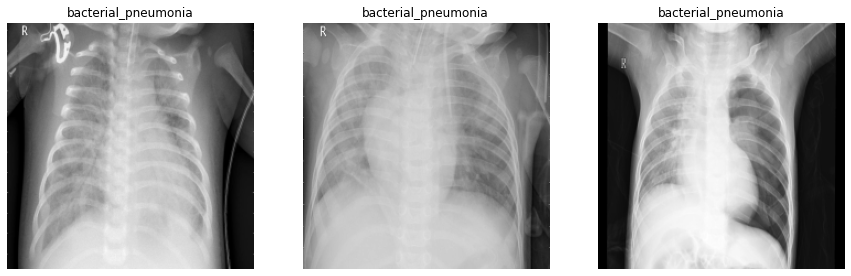

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 15))
for i in range(3):
    ax[i].set_axis_off()
    ax[i].imshow(X_train[i])
    ax[i].set_title(categories[np.argmax(Y_train[i])])

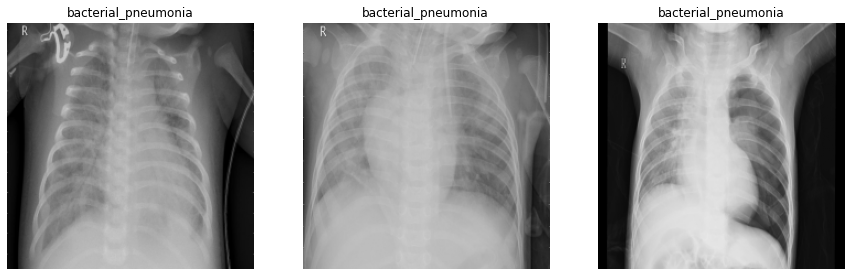

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 15))
for i in range(3):
    ax[i].set_axis_off()
    ax[i].imshow(X_train_255[i])
    ax[i].set_title(categories[np.argmax(Y_train[i])])

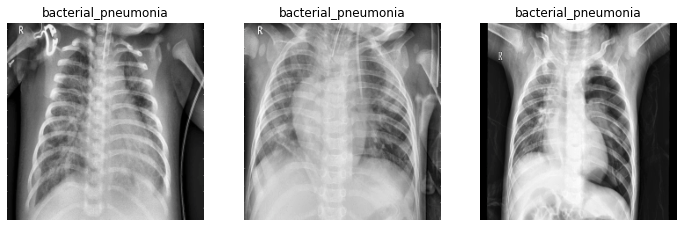

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12, 12))
for i in range(3):
    ax[i].set_axis_off()
    ax[i].imshow(X_train_CLAHE[i])
    ax[i].set_title(categories[np.argmax(Y_train[i])])

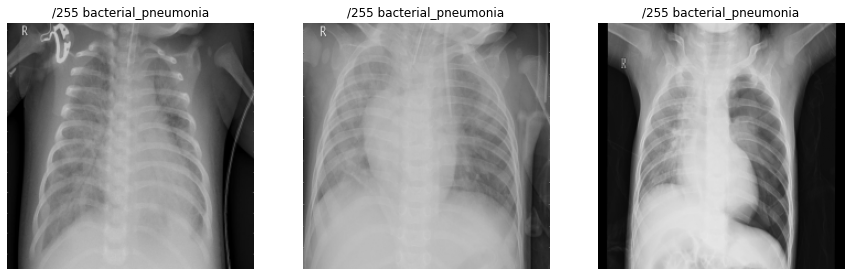

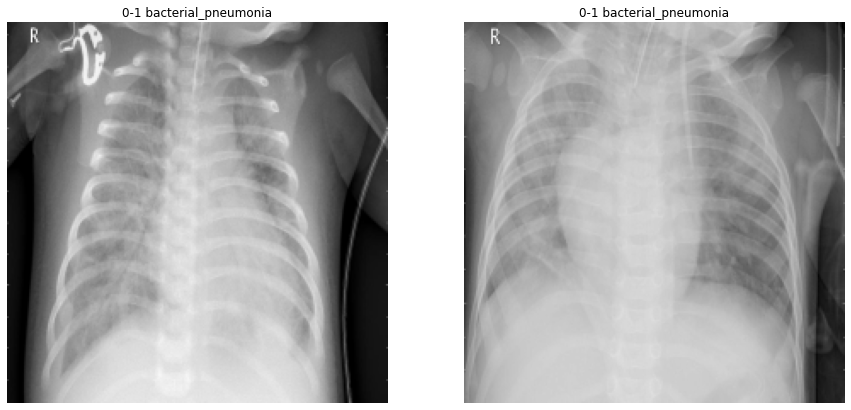

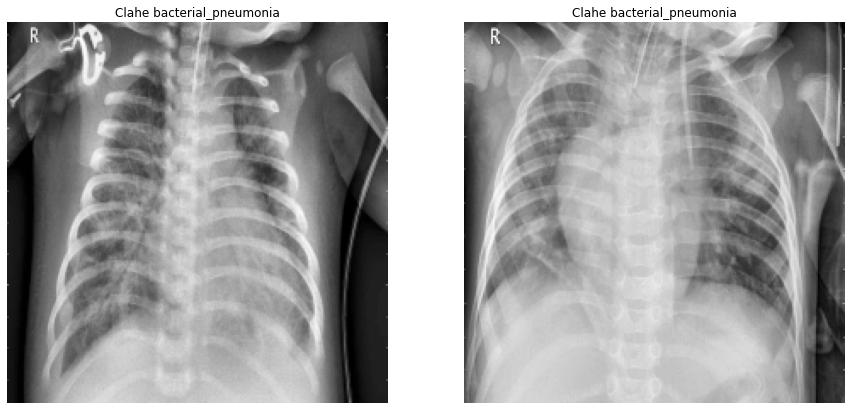

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 15))

for i in range(3):
    ax[i].set_axis_off()
    ax[i].imshow(X_train_255[i])
    ax[i].set_title("/255 " + categories[np.argmax(Y_train[i])])

fig1, ax = plt.subplots(1, 2, figsize=(15, 15))
for i in range(2):
    ax[i].set_axis_off()
    ax[i].imshow(X_train[i])
    ax[i].set_title("0-1 " + categories[np.argmax(Y_train[i])])

fig2, ax = plt.subplots(1, 2, figsize=(15, 15))
for i in range(2):
    ax[i].set_axis_off()
    ax[i].imshow(X_train_CLAHE[i])

    ax[i].set_title("Clahe " + categories[np.argmax(Y_train[i])])

# Set-up for X-ray data II

In [ ]:
categories = ['bacterial_pneumonia', 'covid-19','normal','tuberculosis', 'viral_pneumonia']
data_dir = 'Dataset Radiography 5 class/train'
train_dir = 'Dataset Radiography 5 class/train'
train_dir = os.path.join(train_dir)
val_dir ='Dataset Radiography 5 class/val'
val_dir = os.path.join(val_dir)
test_dir ='Dataset Radiography 5 class/test'
test_dir =os.path.join(test_dir)

print(categories)

['bacterial_pneumonia', 'covid-19', 'normal', 'tuberculosis', 'viral_pneumonia']


In [ ]:
train_data = []
val_data = []
test_data=[]
for defects_id, sp in enumerate(categories):
    i = 0
    for file in os.listdir(os.path.join(train_dir, sp)):
            train_data.append(['{}/{}'.format(sp, file), defects_id, sp])
            i += 1

train = pd.DataFrame(train_data, columns=['File', 'DiseaseID', 'Disease Type'])
print(train.head())

for defects_id, sp in enumerate(categories):
    i = 0
    for file in os.listdir(os.path.join(val_dir, sp)):
            val_data.append(['{}/{}'.format(sp, file), defects_id, sp])
            i += 1

val = pd.DataFrame(val_data, columns=['File', 'DiseaseID', 'Disease Type'])
print(val.head())


for defects_id, sp in enumerate(categories):
    i = 0
    for file in os.listdir(os.path.join(test_dir, sp)):
            test_data.append(['{}/{}'.format(sp, file), defects_id, sp])
            i += 1

test = pd.DataFrame(test_data, columns=['File', 'DiseaseID', 'Disease Type'])
print(test.head())


                               File  DiseaseID         Disease Type
0    bacterial_pneumonia/0 (2).jpeg          0  bacterial_pneumonia
1  bacterial_pneumonia/107 (2).jpeg          0  bacterial_pneumonia
2  bacterial_pneumonia/106 (2).jpeg          0  bacterial_pneumonia
3    bacterial_pneumonia/1 (2).jpeg          0  bacterial_pneumonia
4  bacterial_pneumonia/109 (2).jpeg          0  bacterial_pneumonia
                               File  DiseaseID         Disease Type
0  bacterial_pneumonia/104 (2).jpeg          0  bacterial_pneumonia
1  bacterial_pneumonia/112 (2).jpeg          0  bacterial_pneumonia
2  bacterial_pneumonia/120 (2).jpeg          0  bacterial_pneumonia
3  bacterial_pneumonia/128 (2).jpeg          0  bacterial_pneumonia
4  bacterial_pneumonia/136 (2).jpeg          0  bacterial_pneumonia
                                               File  ...         Disease Type
0  bacterial_pneumonia/person281_bacteria_1331.jpeg  ...  bacterial_pneumonia
1  bacterial_pneumonia/perso

In [ ]:
SEED = 42

train = train.sample(frac=1, random_state=SEED)
train.index = np.arange(len(train))  # Reset indices
train = pd.DataFrame(train_data, columns=['File', 'DiseaseID', 'Disease Type'])
print(train.head())

test = test.sample(frac=1, random_state=SEED)
test.index = np.arange(len(test))  # Reset indices
test = pd.DataFrame(test_data, columns=['File', 'DiseaseID', 'Disease Type'])
print(test.head())

val = val.sample(frac=1, random_state=SEED)
val.index = np.arange(len(val))  # Reset indices
val = pd.DataFrame(val_data, columns=['File', 'DiseaseID', 'Disease Type'])
print(val.head())


                               File  DiseaseID         Disease Type
0    bacterial_pneumonia/0 (2).jpeg          0  bacterial_pneumonia
1  bacterial_pneumonia/107 (2).jpeg          0  bacterial_pneumonia
2  bacterial_pneumonia/106 (2).jpeg          0  bacterial_pneumonia
3    bacterial_pneumonia/1 (2).jpeg          0  bacterial_pneumonia
4  bacterial_pneumonia/109 (2).jpeg          0  bacterial_pneumonia
                                               File  ...         Disease Type
0  bacterial_pneumonia/person281_bacteria_1331.jpeg  ...  bacterial_pneumonia
1  bacterial_pneumonia/person264_bacteria_1231.jpeg  ...  bacterial_pneumonia
2  bacterial_pneumonia/person281_bacteria_1328.jpeg  ...  bacterial_pneumonia
3  bacterial_pneumonia/person261_bacteria_1225.jpeg  ...  bacterial_pneumonia
4  bacterial_pneumonia/person281_bacteria_1330.jpeg  ...  bacterial_pneumonia

[5 rows x 3 columns]
                               File  DiseaseID         Disease Type
0  bacterial_pneumonia/104 (2).jpe

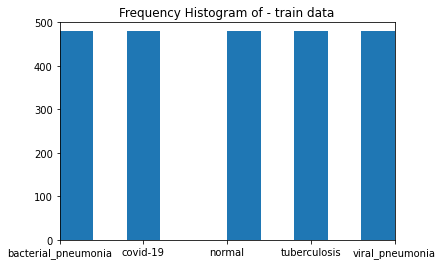

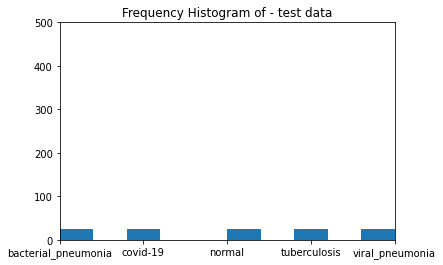

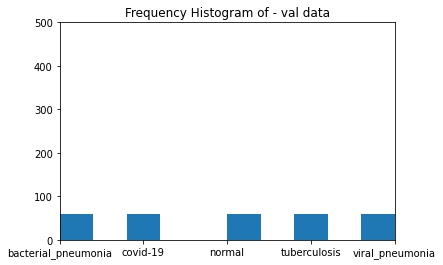

In [ ]:
plt.hist(train['Disease Type'])
plt.title('Frequency Histogram of - train data')
# plt.figure(figsize=(12, 12))
plt.axis([0, 4, 0, 500])

plt.show()

plt.hist(test['Disease Type'])
plt.title('Frequency Histogram of - test data')
# plt.figure(figsize=(12, 12))
plt.axis([0, 4, 0, 500])

plt.show()

plt.hist(val['Disease Type'])
plt.title('Frequency Histogram of - val data')
# plt.figure(figsize=(12, 12))
plt.axis([0, 4, 0, 500])

plt.show()

## Load data for fine-tuning

In [ ]:
IMAGE_SIZE = 224

X_train_255 = np.zeros((train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

for i, file in tqdm(enumerate(train['File'].values)):
        img = read_image_train(file)
        X_train_255[i, ...] = divide_data_by255(img)

1it [00:00,  4.55it/s]

210
0.8235294117647058


2it [00:00,  3.19it/s]

229
0.8980392156862745


3it [00:00,  3.50it/s]

250
0.9803921568627451


4it [00:01,  3.26it/s]

251
0.984313725490196


5it [00:01,  3.11it/s]

205
0.803921568627451


6it [00:01,  3.23it/s]

240
0.9411764705882353


7it [00:02,  3.43it/s]

221
0.8666666666666667


8it [00:02,  3.27it/s]

201
0.788235294117647


9it [00:02,  3.48it/s]

198
0.7764705882352941


10it [00:02,  3.82it/s]

255
1.0


11it [00:03,  3.94it/s]

225
0.8823529411764706


12it [00:03,  3.47it/s]

206
0.807843137254902


13it [00:03,  3.70it/s]

237
0.9294117647058824


15it [00:04,  4.44it/s]

253
0.9921568627450981
250
0.9803921568627451


16it [00:04,  3.57it/s]

237
0.9294117647058824


17it [00:04,  3.51it/s]

250
0.9803921568627451


18it [00:05,  3.21it/s]

237
0.9294117647058824


20it [00:05,  3.82it/s]

249
0.9764705882352941
241
0.9450980392156862


21it [00:05,  3.52it/s]

231
0.9058823529411765


22it [00:06,  3.38it/s]

252
0.9882352941176471


23it [00:06,  3.64it/s]

245
0.9607843137254902


24it [00:06,  3.38it/s]

211
0.8274509803921568


25it [00:07,  2.92it/s]

240
0.9411764705882353


26it [00:07,  2.69it/s]

248
0.9725490196078431


27it [00:07,  3.05it/s]

247
0.9686274509803922


28it [00:08,  2.85it/s]

228
0.8941176470588236


30it [00:08,  3.36it/s]

224
0.8784313725490196
254
0.996078431372549


31it [00:09,  3.80it/s]

222
0.8705882352941177


32it [00:09,  3.59it/s]

219
0.8588235294117647


33it [00:09,  3.89it/s]

236
0.9254901960784314


34it [00:09,  3.36it/s]

235
0.9215686274509803


35it [00:10,  3.64it/s]

230
0.9019607843137255


36it [00:10,  3.36it/s]

251
0.984313725490196


37it [00:10,  3.32it/s]

229
0.8980392156862745


38it [00:11,  3.21it/s]

242
0.9490196078431372


39it [00:11,  3.11it/s]

199
0.7803921568627451


40it [00:11,  3.01it/s]

217
0.8509803921568627


41it [00:12,  3.00it/s]

250
0.9803921568627451


42it [00:12,  3.03it/s]

232
0.9098039215686274


43it [00:12,  2.99it/s]

246
0.9647058823529412


44it [00:13,  3.01it/s]

242
0.9490196078431372


46it [00:13,  3.29it/s]

229
0.8980392156862745
227
0.8901960784313725


47it [00:14,  3.17it/s]

226
0.8862745098039215


48it [00:14,  3.00it/s]

247
0.9686274509803922


49it [00:14,  3.26it/s]

226
0.8862745098039215


50it [00:15,  3.35it/s]

229
0.8980392156862745


52it [00:15,  3.57it/s]

250
0.9803921568627451
242
0.9490196078431372


53it [00:15,  3.79it/s]

247
0.9686274509803922


54it [00:16,  3.48it/s]

219
0.8588235294117647


55it [00:16,  3.37it/s]

240
0.9411764705882353


56it [00:16,  3.23it/s]

197
0.7725490196078432


57it [00:17,  3.44it/s]

243
0.9529411764705882


58it [00:17,  3.71it/s]

248
0.9725490196078431


59it [00:17,  3.80it/s]

215
0.8431372549019608


60it [00:17,  3.60it/s]

247
0.9686274509803922


61it [00:18,  3.86it/s]

241
0.9450980392156862


62it [00:18,  4.01it/s]

217
0.8509803921568627


63it [00:18,  4.14it/s]

251
0.984313725490196


64it [00:18,  3.75it/s]

241
0.9450980392156862


65it [00:19,  3.67it/s]

229
0.8980392156862745


66it [00:19,  3.55it/s]

232
0.9098039215686274


67it [00:19,  3.63it/s]

255
1.0


68it [00:20,  3.32it/s]

212
0.8313725490196079


69it [00:20,  3.67it/s]

247
0.9686274509803922
240
0.9411764705882353


71it [00:20,  3.54it/s]

233
0.9137254901960784


72it [00:21,  3.39it/s]

254
0.996078431372549


73it [00:21,  3.23it/s]

242
0.9490196078431372


74it [00:21,  3.28it/s]

236
0.9254901960784314


75it [00:22,  2.87it/s]

253
0.9921568627450981


76it [00:22,  3.01it/s]

227
0.8901960784313725


77it [00:22,  2.99it/s]

201
0.788235294117647


78it [00:23,  3.34it/s]

254
0.996078431372549


79it [00:23,  3.29it/s]

237
0.9294117647058824


81it [00:23,  4.03it/s]

255
1.0
217
0.8509803921568627


82it [00:24,  3.77it/s]

215
0.8431372549019608


83it [00:24,  3.34it/s]

209
0.8196078431372549


84it [00:24,  3.23it/s]

252
0.9882352941176471


85it [00:25,  3.37it/s]

227
0.8901960784313725


86it [00:25,  3.73it/s]

213
0.8352941176470589


87it [00:25,  4.00it/s]

221
0.8666666666666667


88it [00:25,  3.62it/s]

245
0.9607843137254902


89it [00:26,  3.38it/s]

231
0.9058823529411765


91it [00:26,  3.49it/s]

233
0.9137254901960784
254
0.996078431372549


92it [00:27,  3.35it/s]

223
0.8745098039215686


93it [00:27,  3.24it/s]

225
0.8823529411764706


94it [00:27,  3.19it/s]

250
0.9803921568627451


95it [00:28,  3.13it/s]

241
0.9450980392156862


96it [00:28,  3.17it/s]

218
0.8549019607843137


97it [00:28,  3.51it/s]

250
0.9803921568627451


98it [00:28,  3.77it/s]

230
0.9019607843137255


99it [00:29,  4.03it/s]

232
0.9098039215686274


100it [00:29,  3.59it/s]

252
0.9882352941176471


101it [00:29,  3.41it/s]

244
0.9568627450980393


102it [00:29,  3.66it/s]

227
0.8901960784313725


103it [00:30,  3.45it/s]

250
0.9803921568627451


104it [00:30,  3.21it/s]

242
0.9490196078431372


105it [00:30,  3.51it/s]

243
0.9529411764705882


106it [00:31,  3.61it/s]

213
0.8352941176470589


107it [00:31,  3.74it/s]

255
1.0


108it [00:31,  3.98it/s]

209
0.8196078431372549


109it [00:31,  3.73it/s]

240
0.9411764705882353


110it [00:32,  3.89it/s]

250
0.9803921568627451


111it [00:32,  3.74it/s]

212
0.8313725490196079


112it [00:32,  3.58it/s]

249
0.9764705882352941


113it [00:32,  3.85it/s]

230
0.9019607843137255


114it [00:33,  3.46it/s]

242
0.9490196078431372


115it [00:33,  3.77it/s]

249
0.9764705882352941


116it [00:33,  3.40it/s]

210
0.8235294117647058


117it [00:34,  3.53it/s]

228
0.8941176470588236


118it [00:34,  2.64it/s]

225
0.8823529411764706


119it [00:34,  3.01it/s]

221
0.8666666666666667


120it [00:35,  2.89it/s]

252
0.9882352941176471


121it [00:36,  2.15it/s]

226
0.8862745098039215


122it [00:36,  2.28it/s]

208
0.8156862745098039


123it [00:36,  2.64it/s]

250
0.9803921568627451


124it [00:37,  2.64it/s]

239
0.9372549019607843


125it [00:37,  2.70it/s]

242
0.9490196078431372


126it [00:37,  2.76it/s]

253
0.9921568627450981


127it [00:37,  3.12it/s]

241
0.9450980392156862


128it [00:38,  3.06it/s]

251
0.984313725490196


130it [00:38,  3.38it/s]

224
0.8784313725490196
213
0.8352941176470589


131it [00:39,  3.12it/s]

254
0.996078431372549


132it [00:39,  2.97it/s]

243
0.9529411764705882


133it [00:39,  2.90it/s]

251
0.984313725490196


134it [00:40,  3.02it/s]

232
0.9098039215686274


135it [00:40,  3.24it/s]

249
0.9764705882352941


136it [00:40,  3.16it/s]

215
0.8431372549019608


137it [00:41,  3.09it/s]

235
0.9215686274509803


138it [00:41,  2.98it/s]

249
0.9764705882352941


140it [00:42,  3.46it/s]

249
0.9764705882352941
249
0.9764705882352941


141it [00:42,  3.19it/s]

254
0.996078431372549


142it [00:42,  2.97it/s]

246
0.9647058823529412


143it [00:43,  2.83it/s]

255
1.0


145it [00:43,  3.34it/s]

246
0.9647058823529412
255
1.0


146it [00:44,  3.05it/s]

241
0.9450980392156862


147it [00:44,  2.88it/s]

248
0.9725490196078431


148it [00:44,  3.26it/s]

226
0.8862745098039215


149it [00:45,  3.11it/s]

221
0.8666666666666667


150it [00:45,  3.10it/s]

237
0.9294117647058824


152it [00:45,  3.92it/s]

254
0.996078431372549
248
0.9725490196078431


153it [00:46,  2.53it/s]

201
0.788235294117647


154it [00:47,  2.39it/s]

255
1.0


156it [00:47,  3.05it/s]

246
0.9647058823529412
252
0.9882352941176471


158it [00:48,  3.54it/s]

253
0.9921568627450981
239
0.9372549019607843


159it [00:48,  3.20it/s]

242
0.9490196078431372


160it [00:48,  3.34it/s]

211
0.8274509803921568


161it [00:49,  3.12it/s]

255
1.0


162it [00:49,  3.37it/s]

235
0.9215686274509803


163it [00:49,  3.16it/s]

216
0.8470588235294118


164it [00:49,  3.11it/s]

252
0.9882352941176471


165it [00:50,  3.46it/s]

233
0.9137254901960784


166it [00:50,  3.25it/s]

249
0.9764705882352941


167it [00:50,  3.48it/s]

247
0.9686274509803922


169it [00:51,  4.09it/s]

247
0.9686274509803922
248
0.9725490196078431


170it [00:51,  3.61it/s]

221
0.8666666666666667


171it [00:52,  2.80it/s]

244
0.9568627450980393


172it [00:52,  3.05it/s]

250
0.9803921568627451


173it [00:52,  3.12it/s]

250
0.9803921568627451


174it [00:52,  3.39it/s]

226
0.8862745098039215


175it [00:53,  3.37it/s]

250
0.9803921568627451


176it [00:53,  3.13it/s]

255
1.0


177it [00:53,  3.36it/s]

226
0.8862745098039215


178it [00:54,  3.54it/s]

212
0.8313725490196079


179it [00:54,  3.34it/s]

211
0.8274509803921568


180it [00:54,  3.68it/s]

253
0.9921568627450981


181it [00:54,  3.78it/s]

254
0.996078431372549


182it [00:55,  3.27it/s]

235
0.9215686274509803


183it [00:55,  3.46it/s]

254
0.996078431372549


184it [00:55,  3.60it/s]

253
0.9921568627450981


185it [00:55,  3.89it/s]

250
0.9803921568627451


186it [00:56,  3.81it/s]

237
0.9294117647058824


187it [00:56,  4.03it/s]

246
0.9647058823529412


188it [00:56,  4.18it/s]

247
0.9686274509803922


189it [00:56,  4.06it/s]

253
0.9921568627450981


190it [00:57,  4.00it/s]

250
0.9803921568627451


191it [00:57,  3.70it/s]

221
0.8666666666666667
244


192it [00:57,  4.01it/s]

0.9568627450980393


193it [00:58,  3.53it/s]

226
0.8862745098039215


194it [00:58,  3.65it/s]

252
0.9882352941176471


195it [00:58,  3.51it/s]

225
0.8823529411764706


196it [00:58,  3.25it/s]

213
0.8352941176470589


197it [00:59,  3.29it/s]

251
0.984313725490196


198it [00:59,  3.52it/s]

229
0.8980392156862745


199it [00:59,  3.79it/s]

239
0.9372549019607843


200it [01:00,  3.42it/s]

255
1.0


201it [01:00,  3.25it/s]

239
0.9372549019607843


202it [01:00,  3.02it/s]

252
0.9882352941176471


203it [01:01,  3.18it/s]

252
0.9882352941176471


204it [01:01,  3.06it/s]

217
0.8509803921568627


205it [01:01,  3.04it/s]

252
0.9882352941176471


206it [01:02,  2.96it/s]

230
0.9019607843137255


207it [01:02,  2.86it/s]

255
1.0


208it [01:02,  3.00it/s]

216
0.8470588235294118


209it [01:03,  3.16it/s]

233
0.9137254901960784


210it [01:03,  3.15it/s]

208
0.8156862745098039


211it [01:03,  3.44it/s]

243
0.9529411764705882


212it [01:03,  3.34it/s]

237
0.9294117647058824


213it [01:04,  3.56it/s]

230
0.9019607843137255


214it [01:04,  3.41it/s]

226
0.8862745098039215


215it [01:04,  3.70it/s]

233
0.9137254901960784


216it [01:05,  3.26it/s]

240
0.9411764705882353


217it [01:05,  3.54it/s]

254
0.996078431372549


219it [01:05,  3.76it/s]

251
0.984313725490196
240
0.9411764705882353


220it [01:06,  3.58it/s]

235
0.9215686274509803


221it [01:06,  3.81it/s]

213
0.8352941176470589


222it [01:06,  3.80it/s]

241
0.9450980392156862


223it [01:06,  3.94it/s]

238
0.9333333333333333


224it [01:07,  4.07it/s]

216
0.8470588235294118


225it [01:07,  3.51it/s]

202
0.792156862745098


226it [01:07,  3.29it/s]

226
0.8862745098039215


227it [01:08,  3.66it/s]

228
0.8941176470588236


229it [01:08,  4.29it/s]

251
0.984313725490196
226
0.8862745098039215


230it [01:08,  3.75it/s]

225
0.8823529411764706


231it [01:09,  4.00it/s]

220
0.8627450980392157


232it [01:09,  3.74it/s]

224
0.8784313725490196


233it [01:09,  3.31it/s]

216
0.8470588235294118


234it [01:09,  3.51it/s]

242
0.9490196078431372


235it [01:10,  3.62it/s]

246
0.9647058823529412


236it [01:10,  3.42it/s]

238
0.9333333333333333


238it [01:10,  4.10it/s]

237
0.9294117647058824
250
0.9803921568627451


240it [01:11,  4.02it/s]

238
0.9333333333333333
236
0.9254901960784314


242it [01:11,  4.38it/s]

238
0.9333333333333333
236
0.9254901960784314


243it [01:12,  3.76it/s]

245
0.9607843137254902


244it [01:12,  3.92it/s]

253
0.9921568627450981


245it [01:12,  4.14it/s]

222
0.8705882352941177


246it [01:12,  4.26it/s]

207
0.8117647058823529


247it [01:13,  3.73it/s]

245
0.9607843137254902


248it [01:13,  3.75it/s]

251
0.984313725490196


249it [01:13,  3.37it/s]

214
0.8392156862745098


250it [01:14,  3.40it/s]

249
0.9764705882352941


251it [01:14,  3.24it/s]

211
0.8274509803921568


252it [01:14,  3.49it/s]

254
0.996078431372549


254it [01:15,  4.13it/s]

255
1.0
254
0.996078431372549


255it [01:15,  4.16it/s]

253
0.9921568627450981


256it [01:15,  3.54it/s]

238
0.9333333333333333


257it [01:16,  3.70it/s]

237
0.9294117647058824


258it [01:16,  3.94it/s]

240
0.9411764705882353


259it [01:16,  3.68it/s]

239
0.9372549019607843


260it [01:16,  3.89it/s]

251
0.984313725490196


261it [01:17,  3.67it/s]

251
0.984313725490196


262it [01:17,  3.49it/s]

233
0.9137254901960784


264it [01:18,  3.45it/s]

254
0.996078431372549
230
0.9019607843137255


266it [01:18,  3.58it/s]

237
0.9294117647058824
244
0.9568627450980393


267it [01:18,  3.85it/s]

245
0.9607843137254902


268it [01:19,  3.67it/s]

248
0.9725490196078431


269it [01:19,  3.80it/s]

230
0.9019607843137255


270it [01:19,  3.49it/s]

255
1.0


271it [01:20,  3.43it/s]

250
0.9803921568627451


272it [01:20,  3.03it/s]

237
0.9294117647058824


273it [01:20,  3.09it/s]

251
0.984313725490196


275it [01:21,  3.57it/s]

243
0.9529411764705882
249
0.9764705882352941


276it [01:21,  3.83it/s]

186
0.7294117647058823


277it [01:21,  4.04it/s]

219
0.8588235294117647
245


278it [01:21,  4.29it/s]

0.9607843137254902


279it [01:22,  3.61it/s]

211
0.8274509803921568


280it [01:22,  3.88it/s]

241
0.9450980392156862


281it [01:22,  3.62it/s]

216
0.8470588235294118


283it [01:23,  3.97it/s]

251
0.984313725490196
243
0.9529411764705882


284it [01:23,  3.66it/s]

226
0.8862745098039215


285it [01:23,  3.56it/s]

214
0.8392156862745098


286it [01:24,  3.26it/s]

204
0.8


287it [01:24,  3.62it/s]

250
0.9803921568627451


288it [01:24,  3.85it/s]

247
0.9686274509803922


289it [01:25,  3.40it/s]

229
0.8980392156862745
251


290it [01:25,  3.75it/s]

0.984313725490196


291it [01:25,  3.70it/s]

250
0.9803921568627451


292it [01:25,  3.44it/s]

226
0.8862745098039215


294it [01:26,  3.90it/s]

228
0.8941176470588236
224
0.8784313725490196


295it [01:26,  3.76it/s]

240
0.9411764705882353


297it [01:27,  4.25it/s]

242
0.9490196078431372
221
0.8666666666666667


298it [01:27,  4.04it/s]

232
0.9098039215686274


300it [01:27,  4.24it/s]

213
0.8352941176470589
219
0.8588235294117647


302it [01:28,  4.74it/s]

203
0.796078431372549
230
0.9019607843137255


303it [01:28,  4.72it/s]

236
0.9254901960784314


305it [01:28,  4.76it/s]

248
0.9725490196078431
231
0.9058823529411765


306it [01:29,  4.06it/s]

224
0.8784313725490196


307it [01:29,  3.62it/s]

255
1.0


308it [01:29,  3.72it/s]

212
0.8313725490196079


309it [01:30,  3.61it/s]

251
0.984313725490196


310it [01:30,  3.70it/s]

237
0.9294117647058824
239


311it [01:30,  4.00it/s]

0.9372549019607843


313it [01:30,  4.12it/s]

235
0.9215686274509803
251
0.984313725490196


314it [01:31,  4.54it/s]

247
0.9686274509803922


315it [01:31,  4.64it/s]

254
0.996078431372549


316it [01:31,  4.15it/s]

252
0.9882352941176471


317it [01:31,  3.87it/s]

254
0.996078431372549


318it [01:32,  3.58it/s]

233
0.9137254901960784


320it [01:32,  3.61it/s]

222
0.8705882352941177
250
0.9803921568627451


321it [01:33,  3.95it/s]

235
0.9215686274509803


323it [01:33,  4.28it/s]

219
0.8588235294117647
241
0.9450980392156862


324it [01:33,  4.26it/s]

232
0.9098039215686274


325it [01:34,  3.73it/s]

213
0.8352941176470589


326it [01:34,  3.97it/s]

244
0.9568627450980393


328it [01:34,  4.37it/s]

233
0.9137254901960784
233
0.9137254901960784


329it [01:35,  3.80it/s]

255
1.0


330it [01:35,  3.33it/s]

213
0.8352941176470589


331it [01:35,  3.35it/s]

245
0.9607843137254902


332it [01:35,  3.53it/s]

239
0.9372549019607843


333it [01:36,  3.24it/s]

254
0.996078431372549


335it [01:36,  3.60it/s]

254
0.996078431372549
231
0.9058823529411765


337it [01:37,  4.03it/s]

205
0.803921568627451
212
0.8313725490196079


338it [01:37,  3.74it/s]

231
0.9058823529411765


339it [01:38,  3.09it/s]

223
0.8745098039215686


340it [01:38,  3.37it/s]

225
0.8823529411764706


341it [01:38,  3.46it/s]

231
0.9058823529411765


342it [01:38,  3.79it/s]

216
0.8470588235294118


343it [01:39,  3.52it/s]

202
0.792156862745098


344it [01:39,  3.24it/s]

255
1.0


345it [01:39,  3.58it/s]

237
0.9294117647058824


347it [01:40,  4.07it/s]

229
0.8980392156862745
249
0.9764705882352941


349it [01:40,  4.82it/s]

251
0.984313725490196
240
0.9411764705882353


351it [01:40,  4.54it/s]

254
0.996078431372549
243
0.9529411764705882


352it [01:41,  4.41it/s]

235
0.9215686274509803


354it [01:41,  4.73it/s]

243
0.9529411764705882
224
0.8784313725490196


355it [01:41,  4.12it/s]

207
0.8117647058823529


357it [01:42,  4.00it/s]

251
0.984313725490196
211
0.8274509803921568


358it [01:42,  3.66it/s]

233
0.9137254901960784


359it [01:43,  3.66it/s]

250
0.9803921568627451


360it [01:43,  3.82it/s]

216
0.8470588235294118


362it [01:43,  4.04it/s]

228
0.8941176470588236
247
0.9686274509803922


363it [01:44,  4.05it/s]

222
0.8705882352941177


364it [01:44,  3.51it/s]

214
0.8392156862745098


365it [01:45,  2.46it/s]

212
0.8313725490196079


366it [01:45,  2.66it/s]

206
0.807843137254902


367it [01:45,  2.82it/s]

235
0.9215686274509803


368it [01:46,  2.78it/s]

222
0.8705882352941177


369it [01:46,  3.12it/s]

254
0.996078431372549


370it [01:46,  3.12it/s]

252
0.9882352941176471
244
0.9568627450980393


372it [01:47,  3.33it/s]

246
0.9647058823529412


374it [01:47,  4.06it/s]

253
0.9921568627450981
240
0.9411764705882353


376it [01:48,  3.96it/s]

253
0.9921568627450981
223
0.8745098039215686


377it [01:48,  3.61it/s]

214
0.8392156862745098


378it [01:48,  3.73it/s]

219
0.8588235294117647


379it [01:49,  2.70it/s]

220
0.8627450980392157


380it [01:49,  2.83it/s]

246
0.9647058823529412


381it [01:49,  2.92it/s]

223
0.8745098039215686


382it [01:50,  3.32it/s]

227
0.8901960784313725


383it [01:50,  3.48it/s]

253
0.9921568627450981


384it [01:50,  3.30it/s]

218
0.8549019607843137


385it [01:51,  3.15it/s]

229
0.8980392156862745


386it [01:51,  3.46it/s]

251
0.984313725490196


387it [01:51,  3.30it/s]

254
0.996078431372549


389it [01:52,  3.72it/s]

252
0.9882352941176471
217
0.8509803921568627


390it [01:52,  4.09it/s]

252
0.9882352941176471


391it [01:52,  3.71it/s]

179
0.7019607843137254


392it [01:52,  3.96it/s]

251
0.984313725490196


393it [01:53,  3.84it/s]

229
0.8980392156862745


394it [01:53,  3.65it/s]

248
0.9725490196078431


395it [01:53,  3.96it/s]

218
0.8549019607843137


396it [01:54,  3.48it/s]

251
0.984313725490196


397it [01:54,  3.76it/s]

236
0.9254901960784314


398it [01:54,  4.01it/s]

234
0.9176470588235294


400it [01:54,  4.47it/s]

247
0.9686274509803922
250
0.9803921568627451


402it [01:55,  4.71it/s]

254
0.996078431372549
253
0.9921568627450981


403it [01:55,  4.60it/s]

240
0.9411764705882353


404it [01:55,  4.01it/s]

218
0.8549019607843137


405it [01:56,  4.13it/s]

234
0.9176470588235294


406it [01:56,  4.07it/s]

250
0.9803921568627451


407it [01:56,  4.27it/s]

231
0.9058823529411765


408it [01:56,  4.06it/s]

218
0.8549019607843137


409it [01:56,  4.29it/s]

248
0.9725490196078431


411it [01:57,  4.80it/s]

203
0.796078431372549
252
0.9882352941176471


413it [01:57,  4.89it/s]

254
0.996078431372549
251
0.984313725490196


414it [01:58,  4.31it/s]

254
0.996078431372549


416it [01:58,  4.58it/s]

245
0.9607843137254902
224
0.8784313725490196


417it [01:58,  4.42it/s]

254
0.996078431372549


418it [01:58,  4.36it/s]

252
0.9882352941176471


419it [01:59,  4.44it/s]

230
0.9019607843137255


420it [01:59,  4.41it/s]

200
0.7843137254901961


421it [01:59,  3.75it/s]

251
0.984313725490196


422it [01:59,  4.01it/s]

251
0.984313725490196


423it [02:00,  4.09it/s]

241
0.9450980392156862


425it [02:00,  4.40it/s]

252
0.9882352941176471
254
0.996078431372549


426it [02:00,  4.74it/s]

253
0.9921568627450981


428it [02:01,  4.91it/s]

203
0.796078431372549
196
0.7686274509803922


429it [02:01,  4.60it/s]

244
0.9568627450980393


430it [02:01,  4.53it/s]

214
0.8392156862745098


432it [02:02,  4.77it/s]

254
0.996078431372549
225
0.8823529411764706


433it [02:02,  3.95it/s]

253
0.9921568627450981


434it [02:02,  3.69it/s]

227
0.8901960784313725


435it [02:03,  3.56it/s]

252
0.9882352941176471


436it [02:03,  3.81it/s]

240
0.9411764705882353


437it [02:03,  4.07it/s]

208
0.8156862745098039


438it [02:03,  4.23it/s]

255
1.0


439it [02:04,  3.76it/s]

250
0.9803921568627451


440it [02:04,  3.76it/s]

254
0.996078431372549


442it [02:04,  4.03it/s]

215
0.8431372549019608
238
0.9333333333333333


444it [02:05,  4.04it/s]

254
0.996078431372549
230
0.9019607843137255


446it [02:05,  4.37it/s]

243
0.9529411764705882
245
0.9607843137254902


447it [02:05,  4.46it/s]

244
0.9568627450980393


448it [02:06,  3.83it/s]

251
0.984313725490196


450it [02:06,  4.09it/s]

242
0.9490196078431372
226
0.8862745098039215


451it [02:07,  4.25it/s]

235
0.9215686274509803


452it [02:07,  4.07it/s]

250
0.9803921568627451


453it [02:07,  3.88it/s]

216
0.8470588235294118


454it [02:07,  3.96it/s]

252
0.9882352941176471


455it [02:08,  3.79it/s]

225
0.8823529411764706


456it [02:08,  3.97it/s]

254
0.996078431372549


457it [02:08,  4.19it/s]

241
0.9450980392156862
211


458it [02:08,  4.40it/s]

0.8274509803921568


459it [02:08,  4.54it/s]

248
0.9725490196078431


460it [02:09,  4.55it/s]

235
0.9215686274509803


461it [02:10,  1.88it/s]

227
0.8901960784313725


463it [02:10,  2.77it/s]

250
0.9803921568627451
251
0.984313725490196


464it [02:11,  2.79it/s]

248
0.9725490196078431


465it [02:11,  3.16it/s]

227
0.8901960784313725


466it [02:11,  3.32it/s]

252
0.9882352941176471


467it [02:11,  3.18it/s]

218
0.8549019607843137


468it [02:12,  3.17it/s]

213
0.8352941176470589


469it [02:12,  3.21it/s]

252
0.9882352941176471


470it [02:12,  3.54it/s]

248
0.9725490196078431


471it [02:13,  3.47it/s]

251
0.984313725490196


472it [02:13,  3.75it/s]

254
0.996078431372549


473it [02:14,  2.57it/s]

252
0.9882352941176471


475it [02:14,  3.46it/s]

236
0.9254901960784314
240
0.9411764705882353


476it [02:14,  3.43it/s]

236
0.9254901960784314


477it [02:14,  3.71it/s]

252
0.9882352941176471


478it [02:15,  3.54it/s]

232
0.9098039215686274


479it [02:15,  3.28it/s]

213
0.8352941176470589


480it [02:15,  3.51it/s]

239
0.9372549019607843


481it [02:16,  2.80it/s]

254
0.996078431372549


482it [02:16,  2.83it/s]

254
0.996078431372549


483it [02:16,  3.20it/s]

255
1.0


484it [02:17,  2.40it/s]

255
1.0


485it [02:18,  2.37it/s]

255
1.0


486it [02:18,  2.28it/s]

254
0.996078431372549


487it [02:19,  2.08it/s]

240
0.9411764705882353


488it [02:20,  1.49it/s]

255
1.0


489it [02:20,  1.54it/s]

255
1.0


490it [02:21,  1.58it/s]

255
1.0


491it [02:22,  1.59it/s]

255
1.0


492it [02:22,  1.62it/s]

255
1.0


493it [02:23,  1.59it/s]

255
1.0


494it [02:23,  1.69it/s]

255
1.0


495it [02:24,  1.84it/s]

255
1.0


496it [02:24,  1.86it/s]

255
1.0


497it [02:25,  2.06it/s]

236
0.9254901960784314


498it [02:30,  1.93s/it]

255
1.0


499it [02:30,  1.45s/it]

234
0.9176470588235294


500it [02:32,  1.51s/it]

255
1.0


501it [02:33,  1.39s/it]

255
1.0


502it [02:34,  1.17s/it]

255
1.0


503it [02:34,  1.00s/it]

255
1.0


504it [02:35,  1.15it/s]

253
0.9921568627450981


505it [02:35,  1.24it/s]

255
1.0


506it [02:36,  1.51it/s]

234
0.9176470588235294


507it [02:36,  1.79it/s]

248
0.9725490196078431


508it [02:37,  1.59it/s]

249
0.9764705882352941


509it [02:37,  1.82it/s]

221
0.8666666666666667


510it [02:38,  2.04it/s]

246
0.9647058823529412


511it [02:38,  2.40it/s]

241
0.9450980392156862


513it [02:38,  3.08it/s]

239
0.9372549019607843
254
0.996078431372549


514it [02:39,  2.33it/s]

245
0.9607843137254902


515it [02:40,  1.92it/s]

213
0.8352941176470589


517it [02:40,  2.66it/s]

255
1.0
250
0.9803921568627451


519it [02:41,  3.24it/s]

255
1.0
226
0.8862745098039215


520it [02:41,  3.51it/s]

244
0.9568627450980393


521it [02:41,  3.61it/s]

221
0.8666666666666667


522it [02:41,  3.92it/s]

221
0.8666666666666667


523it [02:42,  4.06it/s]

208
0.8156862745098039


525it [02:42,  4.08it/s]

225
0.8823529411764706
223
0.8745098039215686


527it [02:43,  4.60it/s]

205
0.803921568627451
227
0.8901960784313725


528it [02:43,  4.70it/s]

214
0.8392156862745098


529it [02:43,  4.33it/s]

234
0.9176470588235294


531it [02:44,  4.25it/s]

255
1.0
219
0.8588235294117647


532it [02:44,  4.60it/s]

237
0.9294117647058824


533it [02:44,  4.65it/s]

227
0.8901960784313725


534it [02:44,  3.94it/s]

216
0.8470588235294118


535it [02:45,  4.08it/s]

224
0.8784313725490196


536it [02:45,  4.26it/s]

183
0.7176470588235294


538it [02:45,  4.49it/s]

244
0.9568627450980393
234
0.9176470588235294


539it [02:45,  4.87it/s]

255
1.0


540it [02:46,  3.85it/s]

229
0.8980392156862745


541it [02:46,  3.59it/s]

237
0.9294117647058824


542it [02:46,  3.48it/s]

229
0.8980392156862745


543it [02:47,  3.32it/s]

226
0.8862745098039215


545it [02:47,  4.06it/s]

236
0.9254901960784314
185
0.7254901960784313


546it [02:47,  3.59it/s]

172
0.6745098039215687


547it [02:48,  3.91it/s]

242
0.9490196078431372


549it [02:48,  4.67it/s]

221
0.8666666666666667
231
0.9058823529411765


550it [02:48,  4.05it/s]

232
0.9098039215686274


551it [02:49,  4.01it/s]

227
0.8901960784313725


552it [02:49,  4.25it/s]

235
0.9215686274509803


554it [02:49,  4.38it/s]

238
0.9333333333333333
229
0.8980392156862745


555it [02:50,  2.78it/s]

220
0.8627450980392157


556it [02:50,  2.91it/s]

185
0.7254901960784313


558it [02:51,  3.67it/s]

210
0.8235294117647058
208
0.8156862745098039


559it [02:52,  2.14it/s]

249
0.9764705882352941


560it [02:52,  2.55it/s]

240
0.9411764705882353


562it [02:52,  3.46it/s]

233
0.9137254901960784
220
0.8627450980392157


563it [02:52,  3.36it/s]

255
1.0


564it [02:53,  3.58it/s]

227
0.8901960784313725


565it [02:53,  3.38it/s]

255
1.0


567it [02:54,  3.84it/s]

201
0.788235294117647
213
0.8352941176470589


569it [02:54,  4.41it/s]

255
1.0
240
0.9411764705882353


570it [02:54,  4.40it/s]

228
0.8941176470588236


572it [02:55,  4.25it/s]

229
0.8980392156862745
216
0.8470588235294118


574it [02:55,  4.07it/s]

245
0.9607843137254902
237
0.9294117647058824


576it [02:56,  4.82it/s]

242
0.9490196078431372
255
1.0


577it [02:56,  4.33it/s]

237
0.9294117647058824


578it [02:56,  4.49it/s]

227
0.8901960784313725


580it [02:56,  4.50it/s]

255
1.0
230
0.9019607843137255


582it [02:57,  4.56it/s]

223
0.8745098039215686
208
0.8156862745098039


583it [02:57,  3.91it/s]

255
1.0


585it [02:58,  4.24it/s]

214
0.8392156862745098
232
0.9098039215686274


586it [02:58,  4.46it/s]

255
1.0


588it [02:58,  4.31it/s]

208
0.8156862745098039
255
1.0


589it [02:59,  3.78it/s]

244
0.9568627450980393


591it [02:59,  4.21it/s]

255
1.0
252
0.9882352941176471


593it [03:00,  4.86it/s]

255
1.0
255
1.0


594it [03:00,  4.96it/s]

231
0.9058823529411765


595it [03:00,  4.52it/s]

206
0.807843137254902


596it [03:00,  3.89it/s]

218
0.8549019607843137


597it [03:01,  4.15it/s]

254
0.996078431372549


598it [03:01,  3.49it/s]

225
0.8823529411764706


599it [03:01,  3.34it/s]

230
0.9019607843137255


601it [03:02,  4.11it/s]

233
0.9137254901960784
240
0.9411764705882353


602it [03:02,  4.29it/s]

147
0.5764705882352941


604it [03:02,  4.17it/s]

210
0.8235294117647058
237
0.9294117647058824


606it [03:03,  4.84it/s]

254
0.996078431372549
255
1.0


608it [03:03,  4.99it/s]

201
0.788235294117647
255
1.0


610it [03:04,  4.38it/s]

231
0.9058823529411765
222
0.8705882352941177


612it [03:04,  4.89it/s]

254
0.996078431372549
216
0.8470588235294118


614it [03:04,  5.15it/s]

255
1.0
233
0.9137254901960784


615it [03:05,  4.30it/s]

241
0.9450980392156862


616it [03:05,  3.80it/s]

235
0.9215686274509803


617it [03:05,  4.06it/s]

255
1.0


618it [03:06,  3.74it/s]

255
1.0


619it [03:06,  4.01it/s]

248
0.9725490196078431
255


620it [03:06,  4.26it/s]

1.0


621it [03:06,  4.08it/s]

237
0.9294117647058824


623it [03:07,  4.08it/s]

231
0.9058823529411765
232
0.9098039215686274


624it [03:07,  4.55it/s]

255
1.0


626it [03:07,  4.31it/s]

239
0.9372549019607843
193
0.7568627450980392


627it [03:08,  4.70it/s]

215
0.8431372549019608


628it [03:08,  4.14it/s]

236
0.9254901960784314


630it [03:08,  4.18it/s]

234
0.9176470588235294
233
0.9137254901960784


631it [03:09,  4.59it/s]

235
0.9215686274509803


633it [03:09,  4.68it/s]

253
0.9921568627450981
212
0.8313725490196079


634it [03:09,  4.03it/s]

246
0.9647058823529412


635it [03:10,  4.00it/s]

232
0.9098039215686274


637it [03:10,  4.41it/s]

231
0.9058823529411765
232
0.9098039215686274


638it [03:13,  1.02it/s]

227
0.8901960784313725


640it [03:13,  1.73it/s]

249
0.9764705882352941
226
0.8862745098039215


642it [03:14,  2.48it/s]

222
0.8705882352941177
254
0.996078431372549


643it [03:14,  2.95it/s]

252
0.9882352941176471


644it [03:14,  3.34it/s]

216
0.8470588235294118


645it [03:14,  3.21it/s]

222
0.8705882352941177


647it [03:15,  3.66it/s]

254
0.996078431372549
243
0.9529411764705882


649it [03:15,  4.19it/s]

241
0.9450980392156862
255
1.0


650it [03:16,  3.85it/s]

228
0.8941176470588236


651it [03:16,  3.66it/s]

255
1.0


652it [03:16,  3.50it/s]

219
0.8588235294117647


653it [03:16,  3.84it/s]

197
0.7725490196078432


654it [03:17,  4.09it/s]

218
0.8549019607843137


655it [03:17,  3.77it/s]

234
0.9176470588235294


656it [03:17,  3.52it/s]

217
0.8509803921568627


658it [03:18,  3.86it/s]

227
0.8901960784313725
232
0.9098039215686274


660it [03:18,  4.34it/s]

243
0.9529411764705882
228
0.8941176470588236


661it [03:18,  4.76it/s]

245
0.9607843137254902


662it [03:19,  3.99it/s]

255
1.0


663it [03:19,  4.13it/s]

255
1.0


664it [03:19,  4.04it/s]

206
0.807843137254902


665it [03:20,  2.31it/s]

201
0.788235294117647


666it [03:20,  2.68it/s]

242
0.9490196078431372


667it [03:21,  3.05it/s]

254
0.996078431372549


668it [03:21,  3.09it/s]

226
0.8862745098039215


670it [03:21,  3.83it/s]

216
0.8470588235294118
240
0.9411764705882353


671it [03:22,  3.53it/s]

245
0.9607843137254902


673it [03:25,  1.12it/s]

191
0.7490196078431373
228
0.8941176470588236


674it [03:25,  1.39it/s]

226
0.8862745098039215
232


675it [03:26,  1.78it/s]

0.9098039215686274


676it [03:26,  2.06it/s]

255
1.0


677it [03:26,  2.34it/s]

210
0.8235294117647058


678it [03:26,  2.65it/s]

246
0.9647058823529412


680it [03:27,  3.20it/s]

190
0.7450980392156863
255
1.0


682it [03:27,  3.90it/s]

254
0.996078431372549
227
0.8901960784313725


683it [03:28,  3.61it/s]

255
1.0


685it [03:28,  3.83it/s]

222
0.8705882352941177
221
0.8666666666666667


686it [03:28,  4.33it/s]

245
0.9607843137254902


687it [03:29,  3.76it/s]

238
0.9333333333333333


688it [03:29,  3.92it/s]

255
1.0


689it [03:29,  3.54it/s]

222
0.8705882352941177


691it [03:30,  4.13it/s]

194
0.7607843137254902
231
0.9058823529411765


692it [03:30,  3.61it/s]

240
0.9411764705882353


693it [03:30,  3.89it/s]

252
0.9882352941176471


694it [03:31,  4.12it/s]

217
0.8509803921568627


695it [03:31,  4.27it/s]

228
0.8941176470588236


696it [03:31,  3.85it/s]

255
1.0


697it [03:31,  3.56it/s]

214
0.8392156862745098


699it [03:32,  3.78it/s]

244
0.9568627450980393
255
1.0


700it [03:32,  4.00it/s]

193
0.7568627450980392


701it [03:32,  3.64it/s]

209
0.8196078431372549


702it [03:33,  3.58it/s]

225
0.8823529411764706


704it [03:33,  3.81it/s]

250
0.9803921568627451
255
1.0


705it [03:33,  4.29it/s]

214
0.8392156862745098


706it [03:34,  4.35it/s]

255
1.0


707it [03:34,  3.81it/s]

255
1.0


708it [03:34,  3.72it/s]

235
0.9215686274509803


709it [03:34,  3.88it/s]

252
0.9882352941176471


710it [03:35,  4.08it/s]

230
0.9019607843137255


711it [03:35,  3.83it/s]

255
1.0


712it [03:35,  3.72it/s]

231
0.9058823529411765


713it [03:36,  3.61it/s]

216
0.8470588235294118


714it [03:36,  3.73it/s]

216
0.8470588235294118


715it [03:36,  3.20it/s]

199
0.7803921568627451
241


716it [03:36,  3.59it/s]

0.9450980392156862


717it [03:37,  3.90it/s]

227
0.8901960784313725


718it [03:37,  3.53it/s]

195
0.7647058823529411


719it [03:37,  3.52it/s]

182
0.7137254901960784


720it [03:38,  2.38it/s]

222
0.8705882352941177


721it [03:38,  2.81it/s]

199
0.7803921568627451


723it [03:39,  3.65it/s]

255
1.0
236
0.9254901960784314


725it [03:39,  3.88it/s]

167
0.6549019607843137
255
1.0


726it [03:39,  4.08it/s]

195
0.7647058823529411


727it [03:40,  4.30it/s]

220
0.8627450980392157


728it [03:40,  3.61it/s]

183
0.7176470588235294


729it [03:40,  3.60it/s]

248
0.9725490196078431


730it [03:40,  3.83it/s]

219
0.8588235294117647


732it [03:41,  4.38it/s]

222
0.8705882352941177
245
0.9607843137254902


734it [03:41,  4.02it/s]

202
0.792156862745098
196
0.7686274509803922


735it [03:42,  3.59it/s]

247
0.9686274509803922


736it [03:42,  3.36it/s]

215
0.8431372549019608


737it [03:42,  3.17it/s]

243
0.9529411764705882


738it [03:43,  2.98it/s]

229
0.8980392156862745


739it [03:43,  3.35it/s]

231
0.9058823529411765


740it [03:43,  3.26it/s]

233
0.9137254901960784


741it [03:44,  3.32it/s]

203
0.796078431372549


743it [03:44,  4.00it/s]

230
0.9019607843137255
222
0.8705882352941177


744it [03:44,  3.86it/s]

228
0.8941176470588236


745it [03:45,  4.05it/s]

216
0.8470588235294118


746it [03:45,  4.23it/s]

255
1.0


747it [03:45,  3.99it/s]

236
0.9254901960784314


748it [03:45,  4.16it/s]

206
0.807843137254902


750it [03:46,  4.33it/s]

221
0.8666666666666667
240
0.9411764705882353


751it [03:46,  4.54it/s]

218
0.8549019607843137


752it [03:46,  4.09it/s]

231
0.9058823529411765


753it [03:46,  4.28it/s]

237
0.9294117647058824


754it [03:47,  4.40it/s]

244
0.9568627450980393


756it [03:47,  4.89it/s]

255
1.0
232
0.9098039215686274


757it [03:47,  4.40it/s]

211
0.8274509803921568


758it [03:48,  3.82it/s]

229
0.8980392156862745


759it [03:48,  3.98it/s]

254
0.996078431372549


760it [03:48,  3.63it/s]

178
0.6980392156862745


761it [03:49,  3.47it/s]

223
0.8745098039215686


762it [03:49,  3.70it/s]

168
0.6588235294117647


763it [03:49,  3.99it/s]

190
0.7450980392156863


764it [03:49,  4.04it/s]

236
0.9254901960784314


765it [03:50,  3.56it/s]

166
0.6509803921568628


766it [03:50,  3.48it/s]

219
0.8588235294117647


767it [03:50,  3.62it/s]

208
0.8156862745098039


768it [03:50,  3.40it/s]

223
0.8745098039215686


769it [03:51,  3.72it/s]

193
0.7568627450980392


771it [03:51,  4.26it/s]

237
0.9294117647058824
250
0.9803921568627451


772it [03:51,  3.61it/s]

255
1.0


773it [03:52,  3.44it/s]

255
1.0


775it [03:52,  3.70it/s]

199
0.7803921568627451
255
1.0


776it [03:53,  3.55it/s]

194
0.7607843137254902


778it [03:53,  3.82it/s]

252
0.9882352941176471
222
0.8705882352941177


780it [03:54,  4.03it/s]

246
0.9647058823529412
211
0.8274509803921568


782it [03:54,  4.59it/s]

245
0.9607843137254902
225
0.8823529411764706


783it [03:54,  4.74it/s]

249
0.9764705882352941


784it [03:54,  4.77it/s]

196
0.7686274509803922


786it [03:55,  5.06it/s]

209
0.8196078431372549
210
0.8235294117647058


788it [03:55,  5.44it/s]

255
1.0
226
0.8862745098039215


790it [03:56,  5.29it/s]

239
0.9372549019607843
246
0.9647058823529412


791it [03:56,  5.10it/s]

255
1.0


792it [03:56,  5.02it/s]

234
0.9176470588235294


793it [03:56,  4.83it/s]

188
0.7372549019607844


794it [03:56,  4.76it/s]

211
0.8274509803921568


795it [03:57,  3.94it/s]

226
0.8862745098039215


796it [03:57,  3.54it/s]

208
0.8156862745098039


797it [03:57,  3.49it/s]

231
0.9058823529411765


799it [03:58,  3.58it/s]

224
0.8784313725490196
228
0.8941176470588236


800it [03:58,  3.98it/s]

225
0.8823529411764706


802it [03:59,  3.91it/s]

251
0.984313725490196
201
0.788235294117647


803it [03:59,  4.31it/s]

236
0.9254901960784314


804it [03:59,  4.32it/s]

245
0.9607843137254902


805it [03:59,  4.50it/s]

228
0.8941176470588236


807it [04:00,  4.48it/s]

234
0.9176470588235294
243
0.9529411764705882


808it [04:00,  4.68it/s]

221
0.8666666666666667


809it [04:00,  4.47it/s]

230
0.9019607843137255


811it [04:01,  4.73it/s]

244
0.9568627450980393
223
0.8745098039215686


812it [04:01,  4.96it/s]

249
0.9764705882352941


813it [04:01,  4.91it/s]

213
0.8352941176470589


814it [04:01,  4.72it/s]

253
0.9921568627450981


815it [04:02,  4.06it/s]

238
0.9333333333333333


816it [04:02,  3.74it/s]

249
0.9764705882352941


817it [04:02,  3.77it/s]

252
0.9882352941176471


819it [04:03,  4.07it/s]

220
0.8627450980392157
216
0.8470588235294118


820it [04:03,  4.25it/s]

218
0.8549019607843137


821it [04:03,  4.25it/s]

227
0.8901960784313725


822it [04:03,  4.15it/s]

174
0.6823529411764706


824it [04:04,  4.21it/s]

255
1.0
251
0.984313725490196


826it [04:04,  4.30it/s]

248
0.9725490196078431
219
0.8588235294117647


827it [04:05,  3.81it/s]

255
1.0


828it [04:05,  3.94it/s]

227
0.8901960784313725


830it [04:05,  3.99it/s]

235
0.9215686274509803
229
0.8980392156862745


831it [04:06,  3.95it/s]

248
0.9725490196078431


832it [04:06,  4.18it/s]

227
0.8901960784313725


833it [04:10,  1.37s/it]

212
0.8313725490196079


834it [04:10,  1.02s/it]

248
0.9725490196078431


835it [04:10,  1.23it/s]

204
0.8


836it [04:11,  1.53it/s]

227
0.8901960784313725


837it [04:11,  1.80it/s]

216
0.8470588235294118


838it [04:11,  2.01it/s]

239
0.9372549019607843


839it [04:12,  2.23it/s]

255
1.0


840it [04:12,  2.65it/s]

255
1.0


841it [04:12,  2.75it/s]

255
1.0


842it [04:12,  3.15it/s]

223
0.8745098039215686


843it [04:13,  2.98it/s]

238
0.9333333333333333


844it [04:13,  3.01it/s]

255
1.0


845it [04:14,  2.92it/s]

222
0.8705882352941177


846it [04:14,  3.02it/s]

216
0.8470588235294118


847it [04:14,  2.99it/s]

232
0.9098039215686274


848it [04:14,  3.37it/s]

223
0.8745098039215686


849it [04:15,  3.42it/s]

236
0.9254901960784314


851it [04:15,  3.77it/s]

255
1.0
212
0.8313725490196079


853it [04:16,  4.44it/s]

214
0.8392156862745098
254
0.996078431372549


854it [04:16,  4.57it/s]

245
0.9607843137254902
238


855it [04:16,  4.68it/s]

0.9333333333333333


857it [04:16,  4.93it/s]

200
0.7843137254901961
220
0.8627450980392157


858it [04:17,  4.07it/s]

224
0.8784313725490196


859it [04:17,  3.12it/s]

176
0.6901960784313725


860it [04:17,  3.22it/s]

208
0.8156862745098039


861it [04:18,  3.20it/s]

241
0.9450980392156862


863it [04:18,  3.89it/s]

238
0.9333333333333333
252
0.9882352941176471


865it [04:19,  4.08it/s]

237
0.9294117647058824
220
0.8627450980392157


866it [04:19,  4.35it/s]

255
1.0


867it [04:19,  4.48it/s]

215
0.8431372549019608


868it [04:19,  4.59it/s]

239
0.9372549019607843


870it [04:20,  4.77it/s]

251
0.984313725490196
245
0.9607843137254902


871it [04:20,  4.73it/s]

206
0.807843137254902


873it [04:20,  4.86it/s]

215
0.8431372549019608
226
0.8862745098039215


874it [04:20,  5.48it/s]

237
0.9294117647058824


876it [04:21,  4.46it/s]

234
0.9176470588235294
213
0.8352941176470589


877it [04:21,  4.63it/s]

239
0.9372549019607843
209


878it [04:21,  4.73it/s]

0.8196078431372549


880it [04:22,  4.40it/s]

250
0.9803921568627451
254
0.996078431372549


881it [04:22,  4.65it/s]

232
0.9098039215686274


882it [04:22,  4.56it/s]

232
0.9098039215686274


884it [04:23,  4.45it/s]

233
0.9137254901960784
252
0.9882352941176471


886it [04:23,  4.89it/s]

235
0.9215686274509803
237
0.9294117647058824


888it [04:24,  4.15it/s]

216
0.8470588235294118
238
0.9333333333333333


890it [04:24,  4.64it/s]

252
0.9882352941176471
227
0.8901960784313725


891it [04:24,  4.28it/s]

241
0.9450980392156862


892it [04:25,  3.92it/s]

245
0.9607843137254902


893it [04:25,  3.70it/s]

234
0.9176470588235294


894it [04:25,  3.42it/s]

240
0.9411764705882353


895it [04:26,  3.16it/s]

239
0.9372549019607843


896it [04:26,  3.25it/s]

242
0.9490196078431372


898it [04:27,  3.64it/s]

224
0.8784313725490196
248
0.9725490196078431


899it [04:27,  3.59it/s]

214
0.8392156862745098


901it [04:27,  4.22it/s]

224
0.8784313725490196
226
0.8862745098039215


902it [04:28,  4.02it/s]

245
0.9607843137254902


903it [04:28,  3.66it/s]

255
1.0


904it [04:28,  3.85it/s]

235
0.9215686274509803


905it [04:28,  3.59it/s]

234
0.9176470588235294


906it [04:29,  3.36it/s]

201
0.788235294117647


907it [04:29,  3.27it/s]

218
0.8549019607843137


908it [04:29,  3.19it/s]

226
0.8862745098039215


909it [04:30,  3.13it/s]

255
1.0


910it [04:30,  3.04it/s]

245
0.9607843137254902


911it [04:30,  3.25it/s]

223
0.8745098039215686


912it [04:31,  3.22it/s]

255
1.0


913it [04:31,  3.11it/s]

201
0.788235294117647


914it [04:31,  2.96it/s]

240
0.9411764705882353


915it [04:32,  3.25it/s]

255
1.0


917it [04:32,  3.92it/s]

239
0.9372549019607843
236
0.9254901960784314


918it [04:32,  3.61it/s]

255
1.0


919it [04:33,  3.38it/s]

234
0.9176470588235294


920it [04:33,  3.69it/s]

254
0.996078431372549


921it [04:33,  3.56it/s]

237
0.9294117647058824


922it [04:34,  3.43it/s]

233
0.9137254901960784


924it [04:34,  3.81it/s]

231
0.9058823529411765
220
0.8627450980392157


925it [04:34,  4.08it/s]

236
0.9254901960784314


926it [04:34,  4.22it/s]

254
0.996078431372549


927it [04:35,  4.00it/s]

241
0.9450980392156862


928it [04:35,  3.70it/s]

241
0.9450980392156862


930it [04:36,  4.15it/s]

211
0.8274509803921568
255
1.0


932it [04:36,  4.59it/s]

255
1.0
245
0.9607843137254902


933it [04:36,  4.98it/s]

221
0.8666666666666667


934it [04:36,  4.28it/s]

176
0.6901960784313725


936it [04:37,  4.05it/s]

201
0.788235294117647
225
0.8823529411764706


938it [04:37,  4.82it/s]

230
0.9019607843137255
210
0.8235294117647058


939it [04:38,  4.32it/s]

220
0.8627450980392157


940it [04:38,  3.71it/s]

246
0.9647058823529412


941it [04:38,  3.83it/s]

241
0.9450980392156862


943it [04:39,  4.51it/s]

227
0.8901960784313725
210
0.8235294117647058


944it [04:39,  4.25it/s]

183
0.7176470588235294


946it [04:39,  4.37it/s]

222
0.8705882352941177
223
0.8745098039215686


947it [04:40,  3.72it/s]

236
0.9254901960784314


948it [04:40,  3.26it/s]

233
0.9137254901960784


949it [04:40,  2.91it/s]

209
0.8196078431372549


951it [04:41,  3.61it/s]

243
0.9529411764705882
220
0.8627450980392157


952it [04:41,  3.43it/s]

215
0.8431372549019608


953it [04:42,  3.34it/s]

213
0.8352941176470589


954it [04:42,  3.21it/s]

255
1.0


955it [04:42,  3.43it/s]

217
0.8509803921568627


956it [04:42,  3.28it/s]

220
0.8627450980392157


958it [04:43,  3.72it/s]

186
0.7294117647058823
230
0.9019607843137255


959it [04:43,  3.92it/s]

237
0.9294117647058824


960it [04:43,  3.98it/s]

255
1.0


961it [04:44,  3.18it/s]

255
1.0


962it [04:44,  2.80it/s]

246
0.9647058823529412


963it [04:45,  2.56it/s]

255
1.0


964it [04:45,  2.36it/s]

255
1.0


965it [04:46,  2.08it/s]

255
1.0


966it [04:46,  2.01it/s]

255
1.0


967it [04:47,  2.11it/s]

255
1.0


968it [04:48,  1.88it/s]

255
1.0


969it [04:48,  2.05it/s]

255
1.0


970it [04:49,  1.50it/s]

254
0.996078431372549


971it [04:50,  1.41it/s]

255
1.0


972it [04:50,  1.60it/s]

255
1.0


973it [04:51,  1.82it/s]

255
1.0


974it [04:51,  1.94it/s]

255
1.0


975it [04:52,  1.98it/s]

255
1.0


976it [04:52,  2.02it/s]

255
1.0


977it [04:53,  1.86it/s]

255
1.0


978it [04:53,  1.62it/s]

255
1.0


979it [04:54,  2.00it/s]

255
1.0


980it [04:54,  2.38it/s]

255
1.0


981it [04:54,  2.57it/s]

247
0.9686274509803922


982it [04:55,  2.36it/s]

255
1.0


983it [04:55,  2.32it/s]

246
0.9647058823529412


984it [04:56,  2.35it/s]

245
0.9607843137254902


985it [04:56,  1.83it/s]

255
1.0


986it [04:57,  1.94it/s]

250
0.9803921568627451


987it [04:57,  1.85it/s]

254
0.996078431372549


988it [04:58,  2.23it/s]

250
0.9803921568627451


990it [04:59,  2.26it/s]

255
1.0
254
0.996078431372549


991it [04:59,  2.25it/s]

254
0.996078431372549


992it [05:00,  2.19it/s]

255
1.0


993it [05:00,  2.30it/s]

255
1.0


994it [05:00,  2.27it/s]

248
0.9725490196078431


995it [05:01,  2.18it/s]

255
1.0


996it [05:02,  1.90it/s]

255
1.0


997it [05:02,  1.93it/s]

255
1.0


998it [05:02,  2.15it/s]

251
0.984313725490196


999it [05:03,  1.78it/s]

254
0.996078431372549


1000it [05:04,  1.84it/s]

237
0.9294117647058824


1001it [05:04,  1.91it/s]

255
1.0


1002it [05:05,  2.18it/s]

253
0.9921568627450981


1003it [05:05,  2.45it/s]

255
1.0


1004it [05:05,  2.41it/s]

247
0.9686274509803922


1005it [05:06,  2.03it/s]

255
1.0


1006it [05:06,  2.13it/s]

249
0.9764705882352941


1007it [05:07,  1.83it/s]

244
0.9568627450980393


1008it [05:07,  2.00it/s]

240
0.9411764705882353


1009it [05:08,  2.39it/s]

255
1.0


1010it [05:08,  2.50it/s]

255
1.0


1011it [05:08,  2.58it/s]

252
0.9882352941176471


1012it [05:09,  2.17it/s]

252
0.9882352941176471


1013it [05:10,  1.86it/s]

255
1.0


1014it [05:10,  2.02it/s]

255
1.0


1015it [05:11,  2.26it/s]

247
0.9686274509803922


1016it [05:11,  2.57it/s]

253
0.9921568627450981


1017it [05:12,  1.52it/s]

248
0.9725490196078431


1018it [05:13,  1.53it/s]

254
0.996078431372549


1019it [05:13,  1.46it/s]

255
1.0


1020it [05:14,  1.66it/s]

255
1.0


1021it [05:14,  1.83it/s]

255
1.0


1022it [05:15,  1.92it/s]

254
0.996078431372549


1023it [05:15,  1.97it/s]

252
0.9882352941176471


1024it [05:16,  2.00it/s]

255
1.0


1025it [05:16,  1.89it/s]

250
0.9803921568627451


1026it [05:17,  2.17it/s]

254
0.996078431372549


1027it [05:17,  1.69it/s]

255
1.0


1028it [05:18,  1.84it/s]

255
1.0


1029it [05:19,  1.71it/s]

246
0.9647058823529412


1030it [05:19,  1.87it/s]

253
0.9921568627450981


1031it [05:19,  2.15it/s]

254
0.996078431372549


1032it [05:20,  2.17it/s]

248
0.9725490196078431


1033it [05:20,  1.93it/s]

252
0.9882352941176471


1034it [05:21,  2.03it/s]

255
1.0


1035it [05:21,  2.06it/s]

253
0.9921568627450981


1036it [05:22,  1.68it/s]

253
0.9921568627450981


1037it [05:23,  1.82it/s]

239
0.9372549019607843


1038it [05:23,  1.68it/s]

248
0.9725490196078431


1039it [05:24,  1.63it/s]

255
1.0


1040it [05:24,  1.82it/s]

254
0.996078431372549


1041it [05:25,  1.99it/s]

251
0.984313725490196


1042it [05:25,  1.82it/s]

252
0.9882352941176471


1043it [05:26,  1.92it/s]

255
1.0


1044it [05:29,  1.23s/it]

254
0.996078431372549


1045it [05:29,  1.01it/s]

254
0.996078431372549


1046it [05:30,  1.06it/s]

254
0.996078431372549


1047it [05:30,  1.29it/s]

255
1.0


1048it [05:31,  1.34it/s]

248
0.9725490196078431


1049it [05:32,  1.52it/s]

245
0.9607843137254902


1050it [05:32,  1.45it/s]

250
0.9803921568627451


1051it [05:33,  1.67it/s]

255
1.0


1052it [05:33,  1.84it/s]

255
1.0


1053it [05:34,  1.39it/s]

255
1.0


1054it [05:35,  1.63it/s]

255
1.0


1055it [05:35,  1.66it/s]

254
0.996078431372549


1056it [05:36,  1.66it/s]

254
0.996078431372549


1057it [05:36,  1.82it/s]

255
1.0


1058it [05:37,  1.74it/s]

252
0.9882352941176471


1059it [05:37,  1.98it/s]

254
0.996078431372549


1060it [05:38,  1.68it/s]

255
1.0


1061it [05:38,  1.92it/s]

255
1.0


1062it [05:39,  1.92it/s]

249
0.9764705882352941


1063it [05:39,  2.13it/s]

254
0.996078431372549


1064it [05:40,  2.06it/s]

254
0.996078431372549


1065it [05:40,  1.92it/s]

252
0.9882352941176471


1066it [05:41,  1.74it/s]

251
0.984313725490196


1067it [05:41,  1.90it/s]

250
0.9803921568627451


1068it [05:42,  1.75it/s]

255
1.0


1069it [05:43,  1.93it/s]

254
0.996078431372549


1070it [05:43,  1.99it/s]

254
0.996078431372549


1071it [05:43,  2.22it/s]

255
1.0


1072it [05:44,  2.30it/s]

253
0.9921568627450981


1073it [05:44,  2.41it/s]

246
0.9647058823529412


1074it [05:45,  2.04it/s]

255
1.0


1075it [05:45,  2.16it/s]

254
0.996078431372549


1076it [05:45,  2.40it/s]

255
1.0


1077it [05:46,  2.35it/s]

251
0.984313725490196


1078it [05:47,  2.03it/s]

249
0.9764705882352941


1079it [05:48,  1.36it/s]

249
0.9764705882352941


1080it [05:49,  1.37it/s]

251
0.984313725490196


1081it [05:49,  1.59it/s]

249
0.9764705882352941


1082it [05:49,  1.80it/s]

253
0.9921568627450981


1083it [05:50,  1.88it/s]

255
1.0


1084it [05:50,  2.02it/s]

254
0.996078431372549


1085it [05:51,  1.82it/s]

247
0.9686274509803922


1086it [05:52,  1.75it/s]

249
0.9764705882352941


1087it [05:52,  1.89it/s]

250
0.9803921568627451


1088it [05:53,  1.76it/s]

246
0.9647058823529412


1089it [05:53,  1.93it/s]

255
1.0


1090it [05:54,  1.96it/s]

247
0.9686274509803922


1091it [05:54,  2.19it/s]

252
0.9882352941176471


1092it [05:54,  1.97it/s]

249
0.9764705882352941


1093it [05:55,  2.12it/s]

254
0.996078431372549


1094it [05:55,  2.24it/s]

245
0.9607843137254902


1095it [05:56,  2.13it/s]

255
1.0


1096it [05:56,  2.25it/s]

253
0.9921568627450981


1097it [05:57,  2.03it/s]

253
0.9921568627450981


1098it [05:57,  1.87it/s]

251
0.984313725490196


1099it [05:58,  1.71it/s]

255
1.0


1100it [05:59,  1.85it/s]

255
1.0


1101it [05:59,  2.04it/s]

255
1.0


1102it [05:59,  2.18it/s]

254
0.996078431372549


1103it [06:00,  2.39it/s]

253
0.9921568627450981


1104it [06:00,  2.10it/s]

255
1.0


1105it [06:01,  2.23it/s]

250
0.9803921568627451


1106it [06:01,  2.28it/s]

249
0.9764705882352941


1107it [06:01,  2.36it/s]

255
1.0


1108it [06:02,  2.44it/s]

251
0.984313725490196


1109it [06:02,  2.46it/s]

255
1.0


1110it [06:03,  2.57it/s]

252
0.9882352941176471


1111it [06:03,  2.58it/s]

250
0.9803921568627451


1112it [06:03,  2.51it/s]

247
0.9686274509803922


1113it [06:04,  2.48it/s]

251
0.984313725490196


1114it [06:06,  1.10it/s]

252
0.9882352941176471


1115it [06:06,  1.28it/s]

255
1.0


1116it [06:07,  1.49it/s]

253
0.9921568627450981


1117it [06:07,  1.67it/s]

254
0.996078431372549


1118it [06:08,  1.59it/s]

255
1.0


1119it [06:09,  1.59it/s]

255
1.0


1120it [06:09,  1.84it/s]

255
1.0


1121it [06:09,  1.98it/s]

250
0.9803921568627451


1122it [06:10,  1.85it/s]

253
0.9921568627450981


1123it [06:10,  2.08it/s]

254
0.996078431372549


1124it [06:11,  2.21it/s]

248
0.9725490196078431


1125it [06:11,  1.91it/s]

255
1.0


1126it [06:12,  2.05it/s]

253
0.9921568627450981


1127it [06:12,  2.28it/s]

254
0.996078431372549


1128it [06:12,  2.35it/s]

255
1.0


1129it [06:13,  2.50it/s]

254
0.996078431372549


1130it [06:13,  2.50it/s]

252
0.9882352941176471


1131it [06:14,  2.50it/s]

255
1.0


1132it [06:14,  2.57it/s]

242
0.9490196078431372


1133it [06:14,  2.70it/s]

255
1.0


1134it [06:15,  2.36it/s]

254
0.996078431372549


1135it [06:15,  2.45it/s]

245
0.9607843137254902


1136it [06:16,  2.55it/s]

252
0.9882352941176471


1137it [06:16,  2.56it/s]

252
0.9882352941176471


1138it [06:16,  2.63it/s]

252
0.9882352941176471


1139it [06:17,  2.66it/s]

252
0.9882352941176471


1140it [06:17,  2.14it/s]

255
1.0


1141it [06:18,  2.18it/s]

252
0.9882352941176471


1142it [06:18,  2.21it/s]

253
0.9921568627450981


1143it [06:19,  2.10it/s]

255
1.0


1144it [06:19,  1.86it/s]

255
1.0


1145it [06:20,  2.07it/s]

255
1.0


1146it [06:20,  2.11it/s]

255
1.0


1147it [06:21,  2.17it/s]

252
0.9882352941176471


1148it [06:21,  2.22it/s]

255
1.0


1149it [06:21,  2.45it/s]

247
0.9686274509803922


1150it [06:22,  2.11it/s]

248
0.9725490196078431


1151it [06:22,  2.29it/s]

247
0.9686274509803922


1152it [06:23,  1.92it/s]

255
1.0


1153it [06:24,  1.73it/s]

251
0.984313725490196


1154it [06:25,  1.59it/s]

249
0.9764705882352941


1155it [06:25,  1.55it/s]

246
0.9647058823529412


1156it [06:26,  1.69it/s]

243
0.9529411764705882


1157it [06:26,  1.86it/s]

251
0.984313725490196


1158it [06:27,  1.98it/s]

248
0.9725490196078431


1159it [06:27,  2.00it/s]

255
1.0


1160it [06:27,  2.07it/s]

250
0.9803921568627451


1161it [06:28,  1.92it/s]

255
1.0


1162it [06:28,  2.15it/s]

255
1.0


1163it [06:29,  1.80it/s]

246
0.9647058823529412


1164it [06:30,  1.97it/s]

246
0.9647058823529412


1165it [06:30,  2.08it/s]

252
0.9882352941176471


1166it [06:30,  2.13it/s]

255
1.0


1167it [06:31,  2.18it/s]

245
0.9607843137254902


1168it [06:31,  2.12it/s]

254
0.996078431372549


1169it [06:32,  1.90it/s]

255
1.0


1170it [06:34,  1.06it/s]

255
1.0


1171it [06:35,  1.17it/s]

255
1.0


1172it [06:37,  1.26s/it]

255
1.0


1173it [06:37,  1.09s/it]

251
0.984313725490196


1174it [06:38,  1.02it/s]

247
0.9686274509803922


1175it [06:39,  1.20it/s]

245
0.9607843137254902


1176it [06:39,  1.44it/s]

255
1.0


1177it [06:40,  1.62it/s]

252
0.9882352941176471


1178it [06:40,  1.76it/s]

255
1.0


1179it [06:40,  1.97it/s]

254
0.996078431372549


1180it [06:41,  2.09it/s]

252
0.9882352941176471


1181it [06:41,  1.89it/s]

239
0.9372549019607843


1182it [06:42,  2.05it/s]

254
0.996078431372549


1183it [06:42,  2.19it/s]

255
1.0


1184it [06:43,  2.05it/s]

253
0.9921568627450981


1185it [06:43,  2.24it/s]

245
0.9607843137254902


1186it [06:44,  2.05it/s]

253
0.9921568627450981


1187it [06:44,  1.87it/s]

247
0.9686274509803922


1188it [06:45,  1.67it/s]

255
1.0


1189it [06:46,  1.77it/s]

255
1.0


1190it [06:46,  1.65it/s]

254
0.996078431372549


1191it [06:47,  1.89it/s]

254
0.996078431372549


1192it [06:47,  2.00it/s]

253
0.9921568627450981


1193it [06:47,  2.13it/s]

252
0.9882352941176471


1194it [06:48,  1.81it/s]

252
0.9882352941176471


1195it [06:49,  1.66it/s]

255
1.0


1196it [06:49,  1.69it/s]

254
0.996078431372549


1197it [06:50,  1.58it/s]

252
0.9882352941176471


1198it [06:51,  1.73it/s]

254
0.996078431372549


1199it [06:52,  1.42it/s]

252
0.9882352941176471


1200it [06:52,  1.64it/s]

255
1.0


1201it [06:52,  1.78it/s]

248
0.9725490196078431


1202it [06:53,  1.99it/s]

249
0.9764705882352941


1203it [06:53,  2.08it/s]

253
0.9921568627450981


1204it [06:54,  2.06it/s]

247
0.9686274509803922


1205it [06:54,  2.11it/s]

243
0.9529411764705882


1206it [06:55,  1.82it/s]

255
1.0


1207it [06:56,  1.67it/s]

250
0.9803921568627451


1208it [06:56,  1.87it/s]

255
1.0


1209it [06:57,  1.79it/s]

254
0.996078431372549


1210it [06:57,  1.95it/s]

253
0.9921568627450981


1211it [06:58,  1.81it/s]

252
0.9882352941176471


1212it [06:58,  1.72it/s]

253
0.9921568627450981


1213it [06:59,  1.64it/s]

255
1.0


1214it [06:59,  1.88it/s]

245
0.9607843137254902


1215it [07:00,  1.98it/s]

253
0.9921568627450981


1216it [07:00,  2.13it/s]

251
0.984313725490196


1217it [07:01,  1.84it/s]

255
1.0


1218it [07:01,  1.98it/s]

250
0.9803921568627451


1219it [07:02,  2.13it/s]

255
1.0


1220it [07:02,  2.23it/s]

253
0.9921568627450981


1221it [07:03,  2.20it/s]

246
0.9647058823529412


1222it [07:03,  2.23it/s]

245
0.9607843137254902


1223it [07:04,  1.93it/s]

250
0.9803921568627451


1224it [07:04,  2.02it/s]

254
0.996078431372549


1225it [07:05,  2.07it/s]

251
0.984313725490196


1226it [07:05,  2.09it/s]

245
0.9607843137254902


1227it [07:06,  2.09it/s]

249
0.9764705882352941


1228it [07:06,  2.15it/s]

242
0.9490196078431372


1229it [07:07,  2.09it/s]

251
0.984313725490196


1230it [07:07,  1.89it/s]

252
0.9882352941176471


1231it [07:08,  2.07it/s]

243
0.9529411764705882


1232it [07:08,  2.02it/s]

238
0.9333333333333333


1233it [07:09,  1.82it/s]

248
0.9725490196078431


1234it [07:09,  1.93it/s]

240
0.9411764705882353


1235it [07:10,  1.69it/s]

250
0.9803921568627451


1236it [07:10,  1.74it/s]

254
0.996078431372549


1237it [07:11,  1.84it/s]

255
1.0


1238it [07:11,  2.00it/s]

255
1.0


1239it [07:12,  1.77it/s]

239
0.9372549019607843


1240it [07:13,  1.87it/s]

238
0.9333333333333333


1241it [07:13,  1.82it/s]

255
1.0


1242it [07:14,  1.59it/s]

250
0.9803921568627451


1243it [07:14,  1.75it/s]

244
0.9568627450980393


1244it [07:15,  1.67it/s]

250
0.9803921568627451


1245it [07:15,  1.92it/s]

255
1.0


1246it [07:16,  1.69it/s]

255
1.0


1247it [07:17,  1.85it/s]

255
1.0


1248it [07:17,  1.90it/s]

253
0.9921568627450981


1249it [07:17,  1.98it/s]

246
0.9647058823529412


1250it [07:18,  1.89it/s]

255
1.0


1251it [07:19,  1.79it/s]

255
1.0


1252it [07:19,  2.01it/s]

255
1.0


1253it [07:20,  2.06it/s]

253
0.9921568627450981


1254it [07:20,  2.09it/s]

249
0.9764705882352941


1255it [07:20,  2.16it/s]

255
1.0


1256it [07:21,  2.18it/s]

253
0.9921568627450981


1257it [07:21,  2.33it/s]

255
1.0


1258it [07:23,  1.03it/s]

248
0.9725490196078431


1259it [07:24,  1.26it/s]

255
1.0


1260it [07:24,  1.49it/s]

248
0.9725490196078431


1261it [07:25,  1.71it/s]

234
0.9176470588235294


1262it [07:25,  1.62it/s]

255
1.0


1263it [07:26,  1.81it/s]

255
1.0


1264it [07:26,  1.87it/s]

244
0.9568627450980393


1265it [07:27,  1.97it/s]

255
1.0


1266it [07:27,  2.15it/s]

255
1.0


1267it [07:28,  2.00it/s]

254
0.996078431372549


1268it [07:28,  2.08it/s]

255
1.0


1269it [07:28,  2.23it/s]

255
1.0


1270it [07:29,  1.94it/s]

255
1.0


1271it [07:30,  1.71it/s]

247
0.9686274509803922


1272it [07:30,  1.65it/s]

236
0.9254901960784314


1273it [07:31,  1.69it/s]

255
1.0


1274it [07:31,  1.93it/s]

254
0.996078431372549


1275it [07:32,  1.76it/s]

247
0.9686274509803922


1276it [07:33,  1.70it/s]

239
0.9372549019607843


1277it [07:33,  1.55it/s]

255
1.0


1278it [07:34,  1.73it/s]

254
0.996078431372549


1279it [07:34,  1.87it/s]

255
1.0


1280it [07:35,  1.69it/s]

246
0.9647058823529412


1281it [07:36,  1.67it/s]

255
1.0


1282it [07:36,  1.84it/s]

249
0.9764705882352941


1283it [07:37,  1.92it/s]

242
0.9490196078431372


1284it [07:37,  2.06it/s]

254
0.996078431372549


1285it [07:37,  2.30it/s]

255
1.0


1286it [07:38,  1.94it/s]

255
1.0


1287it [07:39,  1.74it/s]

246
0.9647058823529412


1288it [07:39,  1.91it/s]

251
0.984313725490196


1289it [07:40,  1.91it/s]

255
1.0


1290it [07:40,  2.03it/s]

251
0.984313725490196


1291it [07:41,  1.85it/s]

253
0.9921568627450981


1292it [07:41,  1.81it/s]

253
0.9921568627450981


1293it [07:42,  1.94it/s]

255
1.0


1294it [07:42,  1.97it/s]

248
0.9725490196078431


1295it [07:43,  2.11it/s]

248
0.9725490196078431


1296it [07:43,  2.11it/s]

253
0.9921568627450981


1297it [07:43,  2.20it/s]

255
1.0


1298it [07:44,  2.46it/s]

255
1.0


1299it [07:44,  2.01it/s]

253
0.9921568627450981


1300it [07:45,  1.62it/s]

255
1.0


1301it [07:46,  1.79it/s]

254
0.996078431372549


1302it [07:46,  1.69it/s]

254
0.996078431372549


1303it [07:47,  1.92it/s]

255
1.0


1304it [07:48,  1.70it/s]

237
0.9294117647058824


1305it [07:48,  1.67it/s]

245
0.9607843137254902


1306it [07:49,  1.78it/s]

250
0.9803921568627451


1307it [07:49,  1.99it/s]

255
1.0


1308it [07:49,  2.05it/s]

251
0.984313725490196


1309it [07:50,  2.13it/s]

249
0.9764705882352941


1310it [07:50,  2.15it/s]

254
0.996078431372549


1311it [07:51,  1.86it/s]

255
1.0


1312it [07:52,  1.70it/s]

252
0.9882352941176471


1313it [07:52,  1.70it/s]

249
0.9764705882352941


1314it [07:53,  1.89it/s]

247
0.9686274509803922


1315it [07:53,  2.08it/s]

255
1.0


1316it [07:54,  2.16it/s]

248
0.9725490196078431


1317it [07:54,  1.97it/s]

255
1.0


1318it [07:55,  2.09it/s]

255
1.0


1319it [07:55,  2.17it/s]

249
0.9764705882352941


1320it [07:56,  1.29it/s]

253
0.9921568627450981


1321it [07:57,  1.52it/s]

255
1.0


1322it [07:58,  1.45it/s]

230
0.9019607843137255


1323it [07:58,  1.51it/s]

255
1.0


1324it [07:59,  1.64it/s]

255
1.0


1325it [07:59,  1.76it/s]

251
0.984313725490196


1326it [08:02,  1.26s/it]

246
0.9647058823529412


1327it [08:03,  1.15s/it]

253
0.9921568627450981


1328it [08:04,  1.00it/s]

255
1.0


1329it [08:04,  1.23it/s]

250
0.9803921568627451


1330it [08:04,  1.47it/s]

255
1.0


1331it [08:05,  1.71it/s]

254
0.996078431372549


1332it [08:05,  1.92it/s]

252
0.9882352941176471


1333it [08:06,  1.92it/s]

255
1.0


1334it [08:06,  2.06it/s]

248
0.9725490196078431


1335it [08:06,  2.11it/s]

242
0.9490196078431372


1336it [08:07,  1.97it/s]

252
0.9882352941176471


1337it [08:07,  2.07it/s]

213
0.8352941176470589


1338it [08:08,  1.86it/s]

254
0.996078431372549


1339it [08:09,  2.02it/s]

255
1.0


1340it [08:09,  2.20it/s]

254
0.996078431372549


1341it [08:09,  2.14it/s]

245
0.9607843137254902


1342it [08:10,  2.32it/s]

254
0.996078431372549


1343it [08:10,  2.47it/s]

255
1.0


1344it [08:11,  2.20it/s]

247
0.9686274509803922


1345it [08:11,  2.24it/s]

251
0.984313725490196


1346it [08:12,  2.09it/s]

254
0.996078431372549


1347it [08:12,  2.14it/s]

255
1.0


1348it [08:13,  2.10it/s]

255
1.0


1349it [08:13,  2.27it/s]

246
0.9647058823529412


1350it [08:13,  2.24it/s]

218
0.8549019607843137
255


1351it [08:14,  2.69it/s]

1.0


1352it [08:14,  2.30it/s]

253
0.9921568627450981


1353it [08:15,  1.96it/s]

214
0.8392156862745098


1354it [08:15,  2.31it/s]

214
0.8392156862745098


1355it [08:15,  2.38it/s]

226
0.8862745098039215


1356it [08:16,  2.46it/s]

210
0.8235294117647058


1357it [08:16,  2.10it/s]

218
0.8549019607843137


1358it [08:17,  2.46it/s]

255
1.0


1359it [08:17,  2.61it/s]

255
1.0


1360it [08:18,  2.40it/s]

242
0.9490196078431372


1361it [08:18,  2.73it/s]

251
0.984313725490196


1362it [08:18,  2.56it/s]

221
0.8666666666666667


1363it [08:19,  2.51it/s]

213
0.8352941176470589


1364it [08:19,  2.51it/s]

252
0.9882352941176471


1365it [08:19,  2.47it/s]

225
0.8823529411764706


1366it [08:20,  2.83it/s]

254
0.996078431372549


1367it [08:20,  3.10it/s]

255
1.0


1368it [08:20,  3.14it/s]

255
1.0


1369it [08:21,  3.21it/s]

242
0.9490196078431372


1370it [08:21,  2.55it/s]

248
0.9725490196078431


1371it [08:22,  2.27it/s]

248
0.9725490196078431


1372it [08:22,  2.44it/s]

254
0.996078431372549


1373it [08:22,  2.75it/s]

223
0.8745098039215686


1374it [08:23,  2.86it/s]

249
0.9764705882352941


1375it [08:23,  2.17it/s]

215
0.8431372549019608


1376it [08:24,  2.28it/s]

254
0.996078431372549


1377it [08:24,  2.24it/s]

227
0.8901960784313725


1378it [08:25,  2.44it/s]

255
1.0


1379it [08:25,  2.07it/s]

247
0.9686274509803922


1380it [08:25,  2.47it/s]

218
0.8549019607843137


1381it [08:26,  2.28it/s]

228
0.8941176470588236


1382it [08:27,  2.00it/s]

255
1.0


1383it [08:27,  2.06it/s]

254
0.996078431372549


1384it [08:28,  1.89it/s]

244
0.9568627450980393


1385it [08:28,  2.05it/s]

252
0.9882352941176471


1386it [08:28,  2.42it/s]

232
0.9098039215686274


1387it [08:29,  2.67it/s]

225
0.8823529411764706


1388it [08:29,  2.98it/s]

252
0.9882352941176471


1389it [08:29,  3.37it/s]

204
0.8


1390it [08:29,  3.04it/s]

205
0.803921568627451


1391it [08:30,  3.10it/s]

226
0.8862745098039215


1392it [08:30,  3.32it/s]

253
0.9921568627450981


1393it [08:30,  3.69it/s]

221
0.8666666666666667


1394it [08:30,  3.50it/s]

239
0.9372549019607843


1395it [08:31,  3.57it/s]

221
0.8666666666666667


1396it [08:31,  3.65it/s]

255
1.0


1397it [08:32,  2.56it/s]

254
0.996078431372549


1398it [08:32,  2.70it/s]

243
0.9529411764705882


1399it [08:33,  2.16it/s]

255
1.0


1400it [08:33,  2.20it/s]

218
0.8549019607843137


1401it [08:33,  2.30it/s]

255
1.0


1402it [08:34,  2.55it/s]

249
0.9764705882352941


1403it [08:34,  2.75it/s]

255
1.0


1404it [08:34,  3.17it/s]

255
1.0


1405it [08:35,  2.95it/s]

255
1.0


1406it [08:35,  3.33it/s]

254
0.996078431372549


1407it [08:35,  3.33it/s]

252
0.9882352941176471


1408it [08:36,  3.28it/s]

254
0.996078431372549
254


1409it [08:36,  3.65it/s]

0.996078431372549


1410it [08:36,  3.54it/s]

247
0.9686274509803922


1411it [08:36,  3.77it/s]

243
0.9529411764705882


1412it [08:37,  3.37it/s]

244
0.9568627450980393


1414it [08:37,  3.76it/s]

251
0.984313725490196
252
0.9882352941176471


1415it [08:37,  4.16it/s]

254
0.996078431372549


1416it [08:38,  4.30it/s]

255
1.0


1417it [08:38,  4.39it/s]

254
0.996078431372549


1418it [08:38,  4.54it/s]

251
0.984313725490196


1419it [08:38,  3.74it/s]

251
0.984313725490196


1420it [08:39,  3.40it/s]

255
1.0


1421it [08:39,  3.57it/s]

253
0.9921568627450981


1422it [08:39,  3.44it/s]

254
0.996078431372549


1423it [08:39,  3.50it/s]

254
0.996078431372549


1424it [08:40,  3.49it/s]

246
0.9647058823529412


1425it [08:40,  3.73it/s]

254
0.996078431372549


1426it [08:40,  4.00it/s]

251
0.984313725490196


1427it [08:41,  3.66it/s]

254
0.996078431372549


1428it [08:41,  3.81it/s]

237
0.9294117647058824


1429it [08:41,  4.00it/s]

254
0.996078431372549


1430it [08:41,  3.08it/s]

249
0.9764705882352941


1431it [08:42,  3.21it/s]

253
0.9921568627450981


1432it [08:42,  2.34it/s]

253
0.9921568627450981


1433it [08:43,  2.50it/s]

254
0.996078431372549


1434it [08:43,  2.83it/s]

255
1.0


1435it [08:43,  2.97it/s]

255
1.0


1436it [08:44,  3.25it/s]

252
0.9882352941176471


1437it [08:44,  3.41it/s]

254
0.996078431372549


1439it [08:44,  4.00it/s]

250
0.9803921568627451
255
1.0


1440it [08:45,  3.21it/s]

244
0.9568627450980393


1441it [08:45,  3.34it/s]

248
0.9725490196078431


1442it [08:45,  3.45it/s]

255
1.0


1443it [08:46,  2.36it/s]

252
0.9882352941176471


1444it [08:46,  2.38it/s]

249
0.9764705882352941


1445it [08:47,  2.57it/s]

250
0.9803921568627451


1446it [08:47,  2.42it/s]

255
1.0


1447it [08:47,  2.66it/s]

255
1.0


1448it [08:48,  2.75it/s]

247
0.9686274509803922


1449it [08:48,  2.90it/s]

251
0.984313725490196


1450it [08:49,  2.52it/s]

245
0.9607843137254902


1451it [08:49,  2.27it/s]

255
1.0


1452it [08:49,  2.57it/s]

249
0.9764705882352941


1453it [08:50,  2.80it/s]

247
0.9686274509803922


1454it [08:50,  3.21it/s]

243
0.9529411764705882


1455it [08:50,  3.27it/s]

255
1.0


1456it [08:51,  3.26it/s]

248
0.9725490196078431


1457it [08:51,  2.99it/s]

249
0.9764705882352941


1458it [08:51,  3.20it/s]

248
0.9725490196078431


1459it [08:52,  2.56it/s]

245
0.9607843137254902


1460it [08:52,  2.56it/s]

255
1.0


1461it [08:52,  2.78it/s]

248
0.9725490196078431


1462it [08:53,  2.23it/s]

248
0.9725490196078431


1464it [08:54,  2.89it/s]

248
0.9725490196078431
255
1.0


1465it [08:54,  2.96it/s]

255
1.0


1466it [08:55,  2.51it/s]

246
0.9647058823529412


1467it [08:55,  2.26it/s]

238
0.9333333333333333


1468it [08:55,  2.53it/s]

248
0.9725490196078431


1469it [08:56,  2.75it/s]

250
0.9803921568627451


1470it [08:56,  2.50it/s]

251
0.984313725490196


1471it [08:56,  2.59it/s]

254
0.996078431372549


1472it [08:57,  2.80it/s]

245
0.9607843137254902


1473it [08:57,  2.96it/s]

249
0.9764705882352941


1474it [08:58,  2.15it/s]

247
0.9686274509803922


1475it [08:58,  2.38it/s]

251
0.984313725490196


1476it [08:59,  2.35it/s]

243
0.9529411764705882


1477it [08:59,  2.19it/s]

248
0.9725490196078431


1478it [08:59,  2.44it/s]

251
0.984313725490196


1479it [09:00,  2.70it/s]

247
0.9686274509803922


1480it [09:00,  2.94it/s]

249
0.9764705882352941


1481it [09:00,  2.58it/s]

251
0.984313725490196


1482it [09:01,  2.69it/s]

255
1.0


1483it [09:01,  2.37it/s]

255
1.0


1484it [09:02,  2.62it/s]

248
0.9725490196078431


1485it [09:02,  2.85it/s]

250
0.9803921568627451


1486it [09:02,  3.02it/s]

246
0.9647058823529412


1487it [09:02,  3.23it/s]

255
1.0


1488it [09:03,  2.65it/s]

255
1.0


1489it [09:03,  2.38it/s]

249
0.9764705882352941


1490it [09:04,  2.12it/s]

255
1.0


1491it [09:04,  2.43it/s]

255
1.0


1492it [09:05,  2.67it/s]

250
0.9803921568627451


1493it [09:05,  2.55it/s]

251
0.984313725490196


1494it [09:06,  2.34it/s]

252
0.9882352941176471


1495it [09:06,  2.61it/s]

251
0.984313725490196


1496it [09:06,  2.33it/s]

250
0.9803921568627451


1497it [09:07,  2.17it/s]

247
0.9686274509803922


1498it [09:07,  2.46it/s]

249
0.9764705882352941


1499it [09:08,  2.22it/s]

255
1.0


1500it [09:08,  2.13it/s]

247
0.9686274509803922


1501it [09:09,  2.34it/s]

248
0.9725490196078431


1502it [09:09,  2.64it/s]

247
0.9686274509803922


1503it [09:09,  2.39it/s]

248
0.9725490196078431


1504it [09:10,  2.52it/s]

249
0.9764705882352941


1505it [09:10,  2.68it/s]

255
1.0


1506it [09:10,  3.01it/s]

255
1.0


1507it [09:11,  3.14it/s]

255
1.0


1509it [09:11,  2.98it/s]

255
1.0
255
1.0


1510it [09:12,  2.58it/s]

255
1.0


1511it [09:12,  2.79it/s]

255
1.0


1512it [09:12,  2.96it/s]

255
1.0


1513it [09:13,  2.51it/s]

249
0.9764705882352941


1514it [09:13,  2.66it/s]

255
1.0


1515it [09:14,  3.04it/s]

255
1.0


1516it [09:14,  3.16it/s]

249
0.9764705882352941


1517it [09:14,  3.20it/s]

246
0.9647058823529412


1518it [09:14,  3.27it/s]

246
0.9647058823529412


1519it [09:15,  3.42it/s]

255
1.0


1520it [09:15,  3.37it/s]

252
0.9882352941176471


1521it [09:15,  3.37it/s]

248
0.9725490196078431


1522it [09:16,  3.44it/s]

248
0.9725490196078431


1523it [09:16,  2.75it/s]

251
0.984313725490196


1524it [09:16,  2.92it/s]

255
1.0


1525it [09:17,  3.05it/s]

255
1.0


1526it [09:17,  3.19it/s]

251
0.984313725490196


1527it [09:17,  3.21it/s]

251
0.984313725490196


1528it [09:18,  2.86it/s]

245
0.9607843137254902


1529it [09:18,  3.01it/s]

252
0.9882352941176471


1530it [09:18,  3.22it/s]

245
0.9607843137254902


1531it [09:18,  3.34it/s]

255
1.0


1532it [09:19,  2.75it/s]

250
0.9803921568627451


1533it [09:19,  2.93it/s]

247
0.9686274509803922


1534it [09:20,  2.55it/s]

249
0.9764705882352941


1535it [09:20,  2.27it/s]

247
0.9686274509803922


1536it [09:21,  2.52it/s]

251
0.984313725490196


1537it [09:21,  2.26it/s]

255
1.0


1538it [09:22,  2.51it/s]

247
0.9686274509803922


1539it [09:22,  2.60it/s]

255
1.0


1540it [09:22,  2.90it/s]

251
0.984313725490196


1541it [09:22,  2.91it/s]

255
1.0


1542it [09:23,  3.11it/s]

255
1.0


1543it [09:23,  3.26it/s]

255
1.0


1544it [09:23,  3.16it/s]

255
1.0


1545it [09:24,  2.63it/s]

249
0.9764705882352941


1546it [09:24,  2.88it/s]

255
1.0


1547it [09:25,  2.50it/s]

251
0.984313725490196


1548it [09:25,  2.66it/s]

250
0.9803921568627451


1549it [09:25,  2.91it/s]

250
0.9803921568627451


1550it [09:26,  2.90it/s]

255
1.0


1551it [09:26,  3.28it/s]

255
1.0


1552it [09:26,  2.69it/s]

249
0.9764705882352941


1553it [09:27,  2.81it/s]

250
0.9803921568627451


1554it [09:27,  2.42it/s]

254
0.996078431372549


1555it [09:27,  2.72it/s]

251
0.984313725490196


1556it [09:28,  2.92it/s]

251
0.984313725490196


1557it [09:28,  2.55it/s]

253
0.9921568627450981


1559it [09:29,  2.87it/s]

250
0.9803921568627451
250
0.9803921568627451


1561it [09:29,  3.50it/s]

255
1.0
251
0.984313725490196


1562it [09:30,  3.55it/s]

255
1.0


1563it [09:30,  3.16it/s]

250
0.9803921568627451


1564it [09:31,  2.54it/s]

250
0.9803921568627451


1565it [09:31,  2.29it/s]

255
1.0


1567it [09:32,  2.88it/s]

255
1.0
249
0.9764705882352941


1569it [09:32,  3.98it/s]

248
0.9725490196078431
247
0.9686274509803922


1570it [09:32,  3.94it/s]

255
1.0


1571it [09:33,  3.94it/s]

253
0.9921568627450981


1572it [09:33,  3.76it/s]

255
1.0


1573it [09:33,  3.63it/s]

250
0.9803921568627451


1574it [09:34,  3.43it/s]

249
0.9764705882352941


1575it [09:34,  3.50it/s]

255
1.0


1576it [09:34,  3.64it/s]

244
0.9568627450980393


1577it [09:35,  2.81it/s]

250
0.9803921568627451


1578it [09:35,  3.00it/s]

254
0.996078431372549


1579it [09:35,  3.10it/s]

246
0.9647058823529412


1580it [09:35,  3.08it/s]

249
0.9764705882352941


1581it [09:36,  2.97it/s]

251
0.984313725490196


1582it [09:36,  2.51it/s]

252
0.9882352941176471


1583it [09:37,  2.77it/s]

251
0.984313725490196


1584it [09:37,  2.99it/s]

251
0.984313725490196


1585it [09:37,  2.78it/s]

255
1.0


1586it [09:38,  3.08it/s]

250
0.9803921568627451


1587it [09:38,  3.25it/s]

242
0.9490196078431372


1588it [09:38,  3.08it/s]

248
0.9725490196078431


1589it [09:38,  3.34it/s]

255
1.0


1590it [09:39,  2.87it/s]

249
0.9764705882352941


1591it [09:39,  2.64it/s]

255
1.0


1592it [09:40,  2.60it/s]

248
0.9725490196078431


1593it [09:41,  1.96it/s]

247
0.9686274509803922


1594it [09:41,  1.93it/s]

247
0.9686274509803922


1595it [09:41,  2.25it/s]

255
1.0


1596it [09:42,  2.62it/s]

255
1.0


1597it [09:42,  2.90it/s]

255
1.0


1598it [09:42,  2.51it/s]

251
0.984313725490196


1599it [09:43,  2.31it/s]

255
1.0


1600it [09:43,  2.54it/s]

247
0.9686274509803922


1601it [09:44,  2.38it/s]

245
0.9607843137254902


1602it [09:44,  2.65it/s]

248
0.9725490196078431


1603it [09:44,  2.91it/s]

255
1.0


1604it [09:45,  3.01it/s]

255
1.0


1605it [09:45,  2.63it/s]

248
0.9725490196078431


1606it [09:46,  2.41it/s]

255
1.0


1607it [09:46,  2.72it/s]

248
0.9725490196078431


1608it [09:46,  2.86it/s]

255
1.0


1609it [09:46,  2.76it/s]

255
1.0


1610it [09:47,  3.04it/s]

255
1.0


1611it [09:47,  3.08it/s]

237
0.9294117647058824


1612it [09:47,  3.23it/s]

252
0.9882352941176471


1613it [09:48,  2.71it/s]

248
0.9725490196078431


1614it [09:48,  2.98it/s]

255
1.0


1615it [09:48,  3.24it/s]

247
0.9686274509803922


1616it [09:49,  3.16it/s]

255
1.0


1617it [09:49,  3.22it/s]

250
0.9803921568627451


1618it [09:49,  3.32it/s]

255
1.0


1619it [09:50,  3.48it/s]

255
1.0


1620it [09:50,  3.56it/s]

249
0.9764705882352941


1621it [09:50,  3.73it/s]

255
1.0


1622it [09:50,  3.77it/s]

255
1.0


1623it [09:51,  3.73it/s]

247
0.9686274509803922


1624it [09:51,  3.37it/s]

248
0.9725490196078431


1625it [09:51,  3.38it/s]

250
0.9803921568627451


1626it [09:51,  3.51it/s]

255
1.0


1627it [09:52,  3.63it/s]

255
1.0


1628it [09:52,  3.71it/s]

254
0.996078431372549


1629it [09:52,  3.61it/s]

249
0.9764705882352941


1630it [09:53,  3.77it/s]

255
1.0


1631it [09:53,  3.70it/s]

244
0.9568627450980393


1632it [09:53,  2.84it/s]

251
0.984313725490196


1633it [09:54,  2.47it/s]

249
0.9764705882352941


1634it [09:54,  2.75it/s]

249
0.9764705882352941


1635it [09:54,  3.07it/s]

243
0.9529411764705882


1636it [09:55,  3.20it/s]

255
1.0


1637it [09:55,  3.38it/s]

255
1.0


1638it [09:55,  3.51it/s]

255
1.0


1639it [09:55,  3.54it/s]

249
0.9764705882352941


1640it [09:56,  3.45it/s]

252
0.9882352941176471


1641it [09:56,  3.32it/s]

253
0.9921568627450981


1642it [09:56,  3.49it/s]

249
0.9764705882352941


1643it [09:57,  3.57it/s]

254
0.996078431372549


1644it [09:57,  3.56it/s]

250
0.9803921568627451


1645it [09:57,  3.68it/s]

253
0.9921568627450981


1646it [09:57,  3.50it/s]

249
0.9764705882352941


1647it [09:58,  3.51it/s]

255
1.0


1648it [09:58,  3.65it/s]

250
0.9803921568627451


1649it [09:59,  2.86it/s]

253
0.9921568627450981


1650it [09:59,  2.54it/s]

254
0.996078431372549


1651it [10:00,  2.24it/s]

252
0.9882352941176471


1652it [10:00,  2.54it/s]

255
1.0


1653it [10:00,  2.85it/s]

255
1.0


1654it [10:00,  3.13it/s]

255
1.0


1655it [10:01,  3.29it/s]

255
1.0


1656it [10:01,  3.17it/s]

248
0.9725490196078431


1657it [10:01,  3.24it/s]

247
0.9686274509803922


1658it [10:02,  3.23it/s]

250
0.9803921568627451


1659it [10:02,  3.31it/s]

249
0.9764705882352941


1661it [10:02,  3.74it/s]

255
1.0
255
1.0


1662it [10:03,  3.82it/s]

253
0.9921568627450981


1663it [10:03,  3.85it/s]

255
1.0


1664it [10:03,  3.84it/s]

252
0.9882352941176471


1666it [10:03,  4.50it/s]

255
1.0
246
0.9647058823529412


1667it [10:04,  4.09it/s]

255
1.0


1668it [10:04,  3.84it/s]

254
0.996078431372549


1669it [10:04,  3.66it/s]

253
0.9921568627450981


1671it [10:05,  4.03it/s]

251
0.984313725490196
252
0.9882352941176471


1673it [10:06,  3.46it/s]

254
0.996078431372549
253
0.9921568627450981


1674it [10:06,  3.41it/s]

252
0.9882352941176471


1675it [10:06,  3.36it/s]

254
0.996078431372549


1677it [10:07,  3.69it/s]

255
1.0
247
0.9686274509803922


1679it [10:07,  4.36it/s]

255
1.0
255
1.0


1680it [10:07,  4.88it/s]

251
0.984313725490196


1681it [10:08,  4.34it/s]

251
0.984313725490196


1682it [10:08,  3.75it/s]

253
0.9921568627450981


1683it [10:08,  3.66it/s]

246
0.9647058823529412


1684it [10:09,  2.77it/s]

248
0.9725490196078431


1685it [10:09,  2.45it/s]

255
1.0


1686it [10:10,  2.65it/s]

255
1.0


1687it [10:10,  2.81it/s]

255
1.0


1688it [10:10,  2.85it/s]

254
0.996078431372549


1690it [10:11,  3.70it/s]

255
1.0
255
1.0


1691it [10:11,  3.13it/s]

248
0.9725490196078431


1692it [10:11,  2.71it/s]

250
0.9803921568627451


1693it [10:12,  2.79it/s]

255
1.0


1694it [10:12,  2.28it/s]

255
1.0


1695it [10:13,  2.38it/s]

251
0.984313725490196


1696it [10:13,  2.67it/s]

255
1.0


1697it [10:14,  2.40it/s]

253
0.9921568627450981


1698it [10:14,  2.48it/s]

255
1.0


1699it [10:14,  2.49it/s]

255
1.0


1700it [10:15,  2.36it/s]

247
0.9686274509803922


1701it [10:15,  2.22it/s]

254
0.996078431372549


1702it [10:16,  2.31it/s]

255
1.0


1703it [10:16,  2.39it/s]

245
0.9607843137254902


1704it [10:16,  2.60it/s]

251
0.984313725490196


1705it [10:17,  2.52it/s]

252
0.9882352941176471


1706it [10:17,  2.83it/s]

255
1.0


1707it [10:18,  2.44it/s]

254
0.996078431372549


1708it [10:18,  2.75it/s]

252
0.9882352941176471


1709it [10:18,  3.01it/s]

247
0.9686274509803922


1710it [10:18,  3.15it/s]

251
0.984313725490196


1711it [10:19,  2.71it/s]

255
1.0


1712it [10:19,  2.96it/s]

253
0.9921568627450981


1713it [10:19,  3.17it/s]

248
0.9725490196078431


1714it [10:20,  2.71it/s]

254
0.996078431372549


1715it [10:21,  2.42it/s]

252
0.9882352941176471


1716it [10:21,  2.71it/s]

251
0.984313725490196


1717it [10:21,  2.42it/s]

246
0.9647058823529412


1718it [10:22,  2.22it/s]

255
1.0


1719it [10:22,  2.49it/s]

255
1.0


1720it [10:22,  2.77it/s]

251
0.984313725490196


1721it [10:23,  3.12it/s]

243
0.9529411764705882


1722it [10:23,  3.25it/s]

249
0.9764705882352941


1723it [10:23,  3.45it/s]

250
0.9803921568627451


1724it [10:24,  2.78it/s]

250
0.9803921568627451


1725it [10:24,  2.54it/s]

249
0.9764705882352941


1726it [10:24,  2.75it/s]

255
1.0


1727it [10:25,  2.83it/s]

249
0.9764705882352941


1729it [10:25,  3.01it/s]

248
0.9725490196078431
255
1.0


1731it [10:26,  3.71it/s]

247
0.9686274509803922
248
0.9725490196078431


1732it [10:27,  2.45it/s]

255
1.0


1734it [10:27,  2.95it/s]

255
1.0
247
0.9686274509803922


1735it [10:28,  2.60it/s]

248
0.9725490196078431


1736it [10:28,  2.74it/s]

255
1.0


1737it [10:28,  2.96it/s]

248
0.9725490196078431


1738it [10:29,  3.17it/s]

255
1.0


1739it [10:29,  2.72it/s]

246
0.9647058823529412


1740it [10:29,  2.88it/s]

255
1.0


1741it [10:30,  3.03it/s]

255
1.0


1742it [10:30,  3.25it/s]

248
0.9725490196078431


1743it [10:30,  2.99it/s]

248
0.9725490196078431


1744it [10:31,  2.87it/s]

255
1.0


1745it [10:31,  2.60it/s]

255
1.0


1746it [10:32,  2.37it/s]

255
1.0


1748it [10:32,  2.77it/s]

246
0.9647058823529412
255
1.0


1749it [10:33,  3.01it/s]

250
0.9803921568627451


1750it [10:33,  2.56it/s]

250
0.9803921568627451


1751it [10:33,  2.68it/s]

255
1.0


1752it [10:34,  2.67it/s]

249
0.9764705882352941


1754it [10:34,  3.07it/s]

246
0.9647058823529412
255
1.0


1756it [10:35,  3.84it/s]

245
0.9607843137254902
248
0.9725490196078431


1757it [10:35,  4.05it/s]

233
0.9137254901960784


1758it [10:35,  3.97it/s]

247
0.9686274509803922


1759it [10:36,  3.93it/s]

255
1.0


1760it [10:36,  3.37it/s]

248
0.9725490196078431


1761it [10:36,  2.77it/s]

255
1.0


1762it [10:37,  2.47it/s]

249
0.9764705882352941


1763it [10:37,  2.73it/s]

249
0.9764705882352941


1764it [10:37,  2.92it/s]

255
1.0


1765it [10:38,  3.17it/s]

249
0.9764705882352941


1766it [10:38,  3.34it/s]

255
1.0


1767it [10:38,  3.50it/s]

248
0.9725490196078431


1769it [10:39,  3.99it/s]

255
1.0
245
0.9607843137254902


1770it [10:39,  2.92it/s]

244
0.9568627450980393


1771it [10:40,  3.24it/s]

245
0.9607843137254902


1772it [10:40,  2.80it/s]

244
0.9568627450980393


1773it [10:40,  2.86it/s]

255
1.0


1774it [10:41,  2.81it/s]

245
0.9607843137254902


1775it [10:41,  2.45it/s]

244
0.9568627450980393


1776it [10:42,  2.19it/s]

247
0.9686274509803922


1777it [10:42,  2.40it/s]

240
0.9411764705882353


1778it [10:43,  2.26it/s]

246
0.9647058823529412


1779it [10:43,  2.56it/s]

251
0.984313725490196


1780it [10:43,  2.38it/s]

253
0.9921568627450981


1781it [10:44,  2.22it/s]

255
1.0


1782it [10:44,  2.31it/s]

247
0.9686274509803922


1783it [10:45,  2.42it/s]

249
0.9764705882352941


1784it [10:45,  2.28it/s]

246
0.9647058823529412


1785it [10:45,  2.62it/s]

246
0.9647058823529412


1786it [10:46,  2.44it/s]

249
0.9764705882352941


1787it [10:46,  2.75it/s]

255
1.0


1788it [10:46,  2.73it/s]

250
0.9803921568627451


1789it [10:47,  3.00it/s]

246
0.9647058823529412


1790it [10:47,  3.12it/s]

239
0.9372549019607843


1791it [10:48,  2.59it/s]

255
1.0


1792it [10:48,  2.43it/s]

255
1.0


1793it [10:49,  2.27it/s]

239
0.9372549019607843


1794it [10:49,  2.18it/s]

250
0.9803921568627451


1795it [10:49,  2.23it/s]

241
0.9450980392156862


1796it [10:50,  2.12it/s]

242
0.9490196078431372


1797it [10:50,  2.23it/s]

248
0.9725490196078431


1798it [10:51,  2.14it/s]

243
0.9529411764705882


1799it [10:51,  2.08it/s]

246
0.9647058823529412


1800it [10:52,  1.97it/s]

247
0.9686274509803922


1801it [10:52,  2.30it/s]

246
0.9647058823529412


1802it [10:53,  2.42it/s]

246
0.9647058823529412


1803it [10:53,  2.51it/s]

245
0.9607843137254902


1804it [10:53,  2.74it/s]

251
0.984313725490196


1805it [10:54,  2.34it/s]

241
0.9450980392156862


1806it [10:54,  2.39it/s]

249
0.9764705882352941


1807it [10:55,  2.26it/s]

243
0.9529411764705882


1808it [10:55,  2.50it/s]

250
0.9803921568627451


1809it [10:56,  2.33it/s]

254
0.996078431372549


1810it [10:56,  2.66it/s]

245
0.9607843137254902


1811it [10:56,  2.46it/s]

254
0.996078431372549


1812it [10:57,  2.68it/s]

255
1.0


1813it [10:57,  2.37it/s]

234
0.9176470588235294


1814it [10:57,  2.41it/s]

236
0.9254901960784314


1815it [10:58,  2.38it/s]

255
1.0


1816it [10:58,  2.21it/s]

255
1.0


1817it [10:59,  2.42it/s]

245
0.9607843137254902


1818it [10:59,  2.25it/s]

248
0.9725490196078431


1819it [11:00,  2.31it/s]

246
0.9647058823529412


1820it [11:00,  2.20it/s]

254
0.996078431372549


1821it [11:01,  2.25it/s]

255
1.0


1822it [11:01,  2.53it/s]

252
0.9882352941176471


1823it [11:01,  2.33it/s]

255
1.0


1824it [11:02,  2.49it/s]

255
1.0


1825it [11:02,  2.32it/s]

255
1.0


1826it [11:03,  2.17it/s]

247
0.9686274509803922


1827it [11:03,  2.51it/s]

255
1.0


1828it [11:04,  2.28it/s]

240
0.9411764705882353


1829it [11:04,  2.63it/s]

244
0.9568627450980393


1830it [11:04,  2.88it/s]

243
0.9529411764705882


1831it [11:04,  3.03it/s]

251
0.984313725490196


1832it [11:05,  3.30it/s]

255
1.0


1833it [11:05,  3.32it/s]

251
0.984313725490196


1834it [11:05,  2.82it/s]

245
0.9607843137254902


1835it [11:06,  2.49it/s]

246
0.9647058823529412


1836it [11:06,  2.34it/s]

249
0.9764705882352941


1837it [11:07,  2.21it/s]

255
1.0


1838it [11:07,  2.46it/s]

255
1.0


1839it [11:08,  2.31it/s]

246
0.9647058823529412


1840it [11:08,  2.21it/s]

243
0.9529411764705882


1841it [11:09,  2.23it/s]

242
0.9490196078431372


1842it [11:09,  2.30it/s]

250
0.9803921568627451


1843it [11:09,  2.63it/s]

255
1.0


1844it [11:10,  2.44it/s]

255
1.0


1845it [11:10,  2.19it/s]

247
0.9686274509803922


1846it [11:11,  1.95it/s]

245
0.9607843137254902


1847it [11:11,  2.17it/s]

244
0.9568627450980393


1848it [11:12,  2.04it/s]

251
0.984313725490196


1849it [11:13,  1.55it/s]

248
0.9725490196078431


1850it [11:13,  1.73it/s]

246
0.9647058823529412


1851it [11:14,  2.08it/s]

255
1.0


1852it [11:14,  2.03it/s]

249
0.9764705882352941


1853it [11:14,  2.39it/s]

255
1.0


1854it [11:15,  2.65it/s]

245
0.9607843137254902


1855it [11:15,  2.60it/s]

254
0.996078431372549


1856it [11:16,  2.35it/s]

249
0.9764705882352941


1857it [11:16,  2.61it/s]

255
1.0


1858it [11:16,  2.61it/s]

255
1.0


1859it [11:17,  2.58it/s]

252
0.9882352941176471


1860it [11:17,  2.86it/s]

255
1.0


1861it [11:17,  3.12it/s]

250
0.9803921568627451


1862it [11:18,  2.66it/s]

248
0.9725490196078431


1863it [11:18,  2.90it/s]

241
0.9450980392156862


1864it [11:18,  2.83it/s]

246
0.9647058823529412


1865it [11:19,  3.04it/s]

246
0.9647058823529412


1866it [11:19,  3.09it/s]

250
0.9803921568627451


1867it [11:19,  3.02it/s]

243
0.9529411764705882


1868it [11:20,  2.60it/s]

244
0.9568627450980393


1869it [11:20,  2.25it/s]

245
0.9607843137254902


1870it [11:21,  2.17it/s]

245
0.9607843137254902


1871it [11:21,  2.32it/s]

242
0.9490196078431372


1872it [11:22,  2.18it/s]

249
0.9764705882352941


1873it [11:22,  2.46it/s]

234
0.9176470588235294


1874it [11:22,  2.29it/s]

249
0.9764705882352941


1875it [11:23,  2.67it/s]

255
1.0


1876it [11:23,  2.44it/s]

251
0.984313725490196


1877it [11:23,  2.74it/s]

242
0.9490196078431372


1878it [11:24,  2.60it/s]

244
0.9568627450980393


1879it [11:24,  2.89it/s]

247
0.9686274509803922


1880it [11:24,  3.17it/s]

244
0.9568627450980393


1881it [11:25,  3.53it/s]

246
0.9647058823529412


1882it [11:25,  2.93it/s]

252
0.9882352941176471


1883it [11:26,  2.61it/s]

238
0.9333333333333333


1885it [11:26,  3.23it/s]

249
0.9764705882352941
247
0.9686274509803922


1886it [11:26,  3.02it/s]

238
0.9333333333333333


1887it [11:27,  3.07it/s]

243
0.9529411764705882


1888it [11:27,  2.60it/s]

250
0.9803921568627451


1889it [11:28,  2.63it/s]

250
0.9803921568627451


1890it [11:28,  2.70it/s]

247
0.9686274509803922


1891it [11:28,  3.04it/s]

245
0.9607843137254902


1892it [11:29,  2.60it/s]

245
0.9607843137254902


1893it [11:29,  2.55it/s]

245
0.9607843137254902


1894it [11:29,  2.81it/s]

242
0.9490196078431372


1895it [11:30,  2.50it/s]

255
1.0


1896it [11:30,  2.22it/s]

246
0.9647058823529412


1897it [11:31,  2.15it/s]

245
0.9607843137254902


1898it [11:32,  2.04it/s]

255
1.0


1899it [11:32,  2.00it/s]

246
0.9647058823529412


1900it [11:33,  2.00it/s]

249
0.9764705882352941


1901it [11:33,  2.03it/s]

246
0.9647058823529412


1902it [11:33,  2.28it/s]

249
0.9764705882352941


1903it [11:34,  2.26it/s]

245
0.9607843137254902


1904it [11:34,  2.11it/s]

244
0.9568627450980393


1905it [11:35,  2.08it/s]

242
0.9490196078431372


1906it [11:35,  2.13it/s]

248
0.9725490196078431


1907it [11:36,  2.48it/s]

241
0.9450980392156862


1908it [11:36,  2.73it/s]

242
0.9490196078431372


1909it [11:36,  3.04it/s]

245
0.9607843137254902


1910it [11:36,  3.22it/s]

246
0.9647058823529412


1911it [11:37,  3.31it/s]

250
0.9803921568627451


1912it [11:37,  2.52it/s]

238
0.9333333333333333


1913it [11:38,  2.29it/s]

242
0.9490196078431372


1914it [11:38,  2.36it/s]

244
0.9568627450980393


1915it [11:39,  2.20it/s]

242
0.9490196078431372


1916it [11:39,  2.50it/s]

253
0.9921568627450981


1917it [11:39,  2.81it/s]

247
0.9686274509803922


1918it [11:39,  3.00it/s]

243
0.9529411764705882


1919it [11:40,  3.29it/s]

249
0.9764705882352941


1921it [11:40,  3.43it/s]

240
0.9411764705882353
255
1.0


1922it [11:41,  3.11it/s]

255
1.0


1923it [11:41,  3.02it/s]

255
1.0


1924it [11:41,  3.39it/s]

255
1.0


1925it [11:42,  2.47it/s]

253
0.9921568627450981


1926it [11:42,  2.67it/s]

255
1.0


1927it [11:43,  2.68it/s]

255
1.0


1928it [11:43,  3.06it/s]

255
1.0


1929it [11:43,  3.03it/s]

255
1.0


1930it [11:43,  2.99it/s]

255
1.0


1932it [11:44,  3.87it/s]

255
1.0
255
1.0


1933it [11:44,  3.26it/s]

255
1.0


1934it [11:45,  2.84it/s]

255
1.0


1935it [11:45,  2.92it/s]

255
1.0


1936it [11:45,  2.92it/s]

255
1.0


1937it [11:46,  2.82it/s]

255
1.0


1938it [11:46,  2.85it/s]

255
1.0


1939it [11:46,  2.89it/s]

254
0.996078431372549


1940it [11:47,  2.80it/s]

255
1.0


1941it [11:47,  2.64it/s]

255
1.0


1943it [11:48,  3.10it/s]

255
1.0
255
1.0


1944it [11:48,  3.06it/s]

255
1.0


1945it [11:48,  3.31it/s]

255
1.0


1946it [11:49,  3.32it/s]

255
1.0


1947it [11:49,  3.61it/s]

255
1.0


1948it [11:49,  3.82it/s]

247
0.9686274509803922


1949it [11:50,  3.43it/s]

255
1.0


1950it [11:50,  3.01it/s]

255
1.0


1952it [11:50,  3.72it/s]

255
1.0
255
1.0


1953it [11:51,  3.53it/s]

255
1.0


1954it [11:51,  3.78it/s]

255
1.0


1955it [11:51,  3.28it/s]

195
0.7647058823529411


1956it [11:52,  3.58it/s]

255
1.0


1957it [11:52,  3.35it/s]

255
1.0


1958it [11:52,  3.30it/s]

255
1.0


1959it [11:53,  2.91it/s]

255
1.0


1960it [11:53,  2.62it/s]

255
1.0


1961it [11:53,  3.00it/s]

255
1.0


1962it [11:54,  2.98it/s]

255
1.0


1963it [11:54,  2.96it/s]

255
1.0


1964it [11:55,  2.31it/s]

255
1.0


1965it [11:55,  2.19it/s]

255
1.0


1966it [11:56,  2.36it/s]

254
0.996078431372549


1967it [11:56,  2.49it/s]

255
1.0


1968it [11:56,  2.56it/s]

255
1.0


1969it [11:57,  2.64it/s]

254
0.996078431372549


1970it [11:57,  2.76it/s]

253
0.9921568627450981


1971it [11:57,  2.74it/s]

229
0.8980392156862745


1972it [11:58,  2.88it/s]

248
0.9725490196078431


1973it [11:58,  2.75it/s]

253
0.9921568627450981


1974it [11:58,  3.15it/s]

254
0.996078431372549


1975it [11:59,  3.23it/s]

223
0.8745098039215686


1976it [11:59,  3.21it/s]

254
0.996078431372549


1977it [11:59,  2.88it/s]

248
0.9725490196078431


1978it [12:00,  3.00it/s]

199
0.7803921568627451


1979it [12:00,  2.88it/s]

194
0.7607843137254902


1980it [12:00,  2.80it/s]

248
0.9725490196078431


1982it [12:01,  3.23it/s]

250
0.9803921568627451
254
0.996078431372549


1983it [12:01,  3.10it/s]

250
0.9803921568627451


1984it [12:01,  3.46it/s]

207
0.8117647058823529


1985it [12:02,  3.25it/s]

216
0.8470588235294118


1987it [12:02,  3.63it/s]

255
1.0
255
1.0


1988it [12:02,  3.97it/s]

255
1.0


1989it [12:03,  3.69it/s]

254
0.996078431372549


1990it [12:03,  3.80it/s]

236
0.9254901960784314


1991it [12:03,  3.75it/s]

254
0.996078431372549


1992it [12:04,  3.55it/s]

251
0.984313725490196


1993it [12:04,  3.13it/s]

200
0.7843137254901961


1994it [12:04,  3.16it/s]

231
0.9058823529411765


1995it [12:05,  3.51it/s]

254
0.996078431372549


1996it [12:05,  3.73it/s]

255
1.0


1997it [12:05,  3.86it/s]

254
0.996078431372549


1998it [12:05,  4.00it/s]

204
0.8


1999it [12:06,  3.24it/s]

242
0.9490196078431372


2000it [12:06,  3.60it/s]

254
0.996078431372549


2001it [12:06,  3.53it/s]

242
0.9490196078431372


2002it [12:07,  3.31it/s]

201
0.788235294117647


2003it [12:07,  3.59it/s]

255
1.0


2004it [12:07,  3.80it/s]

224
0.8784313725490196


2005it [12:07,  3.59it/s]

227
0.8901960784313725


2006it [12:08,  3.84it/s]

255
1.0


2008it [12:08,  3.39it/s]

203
0.796078431372549
254
0.996078431372549


2010it [12:09,  4.16it/s]

253
0.9921568627450981
254
0.996078431372549


2011it [12:09,  4.27it/s]

253
0.9921568627450981


2012it [12:09,  3.89it/s]

251
0.984313725490196


2013it [12:09,  3.78it/s]

254
0.996078431372549


2015it [12:10,  4.20it/s]

255
1.0
255
1.0


2016it [12:10,  3.93it/s]

255
1.0


2017it [12:10,  3.72it/s]

252
0.9882352941176471


2018it [12:11,  3.99it/s]

221
0.8666666666666667


2019it [12:11,  4.20it/s]

206
0.807843137254902


2020it [12:11,  3.73it/s]

251
0.984313725490196


2021it [12:12,  2.66it/s]

255
1.0


2022it [12:12,  2.97it/s]

255
1.0


2024it [12:13,  3.48it/s]

254
0.996078431372549
254
0.996078431372549


2025it [12:13,  3.79it/s]

244
0.9568627450980393


2026it [12:13,  3.64it/s]

211
0.8274509803921568


2027it [12:14,  3.25it/s]

254
0.996078431372549


2028it [12:14,  3.16it/s]

255
1.0


2029it [12:14,  3.49it/s]

252
0.9882352941176471


2031it [12:14,  4.19it/s]

255
1.0
255
1.0


2032it [12:15,  4.60it/s]

255
1.0


2033it [12:15,  4.51it/s]

255
1.0


2034it [12:15,  4.51it/s]

253
0.9921568627450981


2035it [12:15,  3.80it/s]

254
0.996078431372549


2036it [12:16,  3.75it/s]

227
0.8901960784313725


2037it [12:16,  3.28it/s]

255
1.0


2038it [12:16,  3.15it/s]

255
1.0


2040it [12:17,  3.51it/s]

255
1.0
255
1.0


2041it [12:17,  3.71it/s]

221
0.8666666666666667


2042it [12:17,  3.79it/s]

252
0.9882352941176471


2043it [12:18,  3.47it/s]

254
0.996078431372549


2044it [12:18,  3.71it/s]

231
0.9058823529411765


2045it [12:18,  3.36it/s]

255
1.0


2046it [12:19,  3.17it/s]

255
1.0


2047it [12:19,  2.86it/s]

225
0.8823529411764706


2049it [12:20,  3.45it/s]

254
0.996078431372549
252
0.9882352941176471


2050it [12:20,  3.79it/s]

251
0.984313725490196


2051it [12:20,  4.07it/s]

222
0.8705882352941177


2052it [12:20,  3.81it/s]

254
0.996078431372549


2054it [12:21,  4.40it/s]

213
0.8352941176470589
255
1.0


2055it [12:21,  4.51it/s]

219
0.8588235294117647


2056it [12:21,  4.14it/s]

251
0.984313725490196


2057it [12:21,  4.25it/s]

255
1.0


2058it [12:22,  3.57it/s]

255
1.0


2059it [12:22,  3.77it/s]

249
0.9764705882352941


2060it [12:22,  3.49it/s]

252
0.9882352941176471


2062it [12:23,  3.67it/s]

221
0.8666666666666667
215
0.8431372549019608


2063it [12:23,  3.66it/s]

252
0.9882352941176471


2064it [12:24,  3.45it/s]

255
1.0


2065it [12:24,  2.92it/s]

255
1.0


2066it [12:24,  3.18it/s]

251
0.984313725490196


2067it [12:25,  3.39it/s]

204
0.8


2068it [12:25,  3.59it/s]

255
1.0


2069it [12:25,  3.02it/s]

254
0.996078431372549


2070it [12:25,  3.35it/s]

255
1.0


2071it [12:26,  3.37it/s]

255
1.0


2072it [12:26,  3.06it/s]

255
1.0


2073it [12:27,  2.68it/s]

199
0.7803921568627451


2074it [12:27,  2.99it/s]

255
1.0


2075it [12:27,  2.87it/s]

255
1.0


2076it [12:28,  3.09it/s]

253
0.9921568627450981


2077it [12:28,  2.98it/s]

214
0.8392156862745098


2078it [12:28,  3.00it/s]

255
1.0


2080it [12:29,  3.59it/s]

216
0.8470588235294118
255
1.0


2081it [12:29,  3.44it/s]

254
0.996078431372549


2082it [12:29,  3.44it/s]

248
0.9725490196078431


2084it [12:30,  3.75it/s]

218
0.8549019607843137
254
0.996078431372549


2085it [12:30,  3.89it/s]

230
0.9019607843137255


2086it [12:30,  3.86it/s]

254
0.996078431372549


2087it [12:31,  3.92it/s]

214
0.8392156862745098


2088it [12:31,  4.03it/s]

255
1.0


2089it [12:31,  4.19it/s]

206
0.807843137254902


2090it [12:31,  3.66it/s]

254
0.996078431372549


2092it [12:32,  4.15it/s]

248
0.9725490196078431
254
0.996078431372549


2093it [12:32,  4.30it/s]

255
1.0


2094it [12:32,  3.93it/s]

250
0.9803921568627451


2096it [12:33,  4.19it/s]

254
0.996078431372549
253
0.9921568627450981


2097it [12:33,  4.16it/s]

243
0.9529411764705882


2098it [12:33,  3.95it/s]

255
1.0


2099it [12:34,  3.88it/s]

255
1.0


2100it [12:34,  4.04it/s]

255
1.0


2101it [12:34,  3.74it/s]

255
1.0


2102it [12:34,  3.99it/s]

255
1.0


2103it [12:35,  3.29it/s]

254
0.996078431372549


2104it [12:35,  3.18it/s]

201
0.788235294117647


2105it [12:35,  3.02it/s]

246
0.9647058823529412


2106it [12:36,  2.45it/s]

254
0.996078431372549


2107it [12:36,  2.88it/s]

240
0.9411764705882353


2108it [12:37,  2.72it/s]

253
0.9921568627450981


2109it [12:37,  2.94it/s]

255
1.0


2110it [12:37,  3.03it/s]

255
1.0


2111it [12:38,  3.30it/s]

255
1.0
248


2112it [12:38,  3.67it/s]

0.9725490196078431


2113it [12:38,  3.91it/s]

255
1.0


2114it [12:38,  3.95it/s]

255
1.0


2115it [12:38,  4.08it/s]

207
0.8117647058823529


2116it [12:39,  3.83it/s]

210
0.8235294117647058


2117it [12:39,  3.34it/s]

243
0.9529411764705882


2118it [12:39,  3.40it/s]

248
0.9725490196078431


2119it [12:40,  3.70it/s]

255
1.0


2121it [12:40,  3.89it/s]

255
1.0
255
1.0


2123it [12:41,  4.33it/s]

245
0.9607843137254902
236
0.9254901960784314


2124it [12:41,  3.97it/s]

240
0.9411764705882353


2125it [12:41,  3.75it/s]

248
0.9725490196078431


2126it [12:41,  3.83it/s]

255
1.0


2127it [12:42,  3.31it/s]

232
0.9098039215686274


2128it [12:42,  2.96it/s]

244
0.9568627450980393


2129it [12:42,  3.33it/s]

251
0.984313725490196


2130it [12:43,  3.51it/s]

254
0.996078431372549


2131it [12:43,  3.20it/s]

252
0.9882352941176471


2132it [12:43,  2.93it/s]

201
0.788235294117647


2133it [12:44,  3.03it/s]

242
0.9490196078431372


2134it [12:44,  3.05it/s]

254
0.996078431372549


2135it [12:45,  2.33it/s]

248
0.9725490196078431


2136it [12:45,  2.02it/s]

244
0.9568627450980393


2137it [12:46,  2.26it/s]

205
0.803921568627451


2138it [12:46,  2.42it/s]

196
0.7686274509803922


2139it [12:46,  2.74it/s]

255
1.0


2140it [12:47,  2.35it/s]

199
0.7803921568627451


2141it [12:47,  2.72it/s]

246
0.9647058823529412


2142it [12:47,  2.87it/s]

251
0.984313725490196


2144it [12:48,  3.36it/s]

255
1.0
208
0.8156862745098039


2145it [12:48,  3.64it/s]

214
0.8392156862745098


2146it [12:48,  3.46it/s]

208
0.8156862745098039


2147it [12:49,  3.22it/s]

255
1.0


2148it [12:49,  3.49it/s]

253
0.9921568627450981


2149it [12:49,  3.44it/s]

195
0.7647058823529411


2150it [12:50,  3.22it/s]

189
0.7411764705882353


2151it [12:50,  2.99it/s]

249
0.9764705882352941


2152it [12:50,  2.97it/s]

255
1.0


2153it [12:51,  3.00it/s]

254
0.996078431372549


2154it [12:51,  3.17it/s]

242
0.9490196078431372


2155it [12:51,  3.13it/s]

255
1.0


2156it [12:52,  3.42it/s]

250
0.9803921568627451


2157it [12:52,  3.71it/s]

203
0.796078431372549


2158it [12:52,  3.76it/s]

255
1.0


2159it [12:52,  3.55it/s]

252
0.9882352941176471


2160it [12:53,  3.30it/s]

255
1.0


2161it [12:53,  3.32it/s]

252
0.9882352941176471


2162it [12:53,  3.66it/s]

253
0.9921568627450981


2163it [12:54,  3.74it/s]

255
1.0


2164it [12:54,  3.61it/s]

234
0.9176470588235294


2165it [12:54,  3.31it/s]

248
0.9725490196078431


2166it [12:55,  3.22it/s]

221
0.8666666666666667


2167it [12:55,  3.55it/s]

254
0.996078431372549


2168it [12:55,  3.67it/s]

240
0.9411764705882353


2169it [12:55,  3.54it/s]

255
1.0


2170it [12:56,  3.63it/s]

242
0.9490196078431372


2171it [12:56,  3.74it/s]

221
0.8666666666666667


2172it [12:57,  2.41it/s]

207
0.8117647058823529


2173it [12:57,  2.72it/s]

254
0.996078431372549


2174it [12:57,  3.05it/s]

255
1.0
255


2175it [12:57,  3.45it/s]

1.0


2177it [12:58,  3.63it/s]

244
0.9568627450980393
252
0.9882352941176471


2178it [12:58,  3.27it/s]

219
0.8588235294117647


2179it [12:58,  3.58it/s]

213
0.8352941176470589


2180it [12:59,  3.40it/s]

254
0.996078431372549


2181it [12:59,  3.37it/s]

252
0.9882352941176471


2182it [12:59,  3.62it/s]

255
1.0


2183it [13:00,  3.36it/s]

255
1.0


2184it [13:00,  3.60it/s]

255
1.0


2186it [13:00,  3.81it/s]

220
0.8627450980392157
254
0.996078431372549


2187it [13:01,  4.14it/s]

241
0.9450980392156862


2188it [13:01,  3.64it/s]

255
1.0


2189it [13:01,  3.89it/s]

202
0.792156862745098


2190it [13:01,  3.68it/s]

251
0.984313725490196


2191it [13:02,  2.80it/s]

253
0.9921568627450981


2192it [13:02,  3.16it/s]

245
0.9607843137254902


2193it [13:02,  3.53it/s]

255
1.0


2194it [13:03,  3.69it/s]

254
0.996078431372549


2195it [13:03,  3.33it/s]

198
0.7764705882352941


2196it [13:04,  2.44it/s]

240
0.9411764705882353


2198it [13:04,  2.62it/s]

198
0.7764705882352941
255
1.0


2200it [13:05,  3.13it/s]

254
0.996078431372549
226
0.8862745098039215


2202it [13:06,  3.40it/s]

255
1.0
225
0.8823529411764706


2203it [13:06,  3.68it/s]

255
1.0


2204it [13:06,  3.35it/s]

254
0.996078431372549


2205it [13:07,  2.48it/s]

249
0.9764705882352941


2206it [13:07,  2.62it/s]

212
0.8313725490196079


2207it [13:07,  2.80it/s]

252
0.9882352941176471


2208it [13:08,  3.09it/s]

240
0.9411764705882353


2209it [13:08,  3.44it/s]

247
0.9686274509803922


2210it [13:08,  3.67it/s]

255
1.0


2211it [13:08,  3.40it/s]

245
0.9607843137254902


2212it [13:09,  3.19it/s]

215
0.8431372549019608


2213it [13:09,  2.89it/s]

248
0.9725490196078431


2214it [13:10,  2.93it/s]

197
0.7725490196078432


2215it [13:10,  2.88it/s]

255
1.0


2216it [13:10,  2.83it/s]

255
1.0


2217it [13:11,  3.13it/s]

204
0.8


2218it [13:11,  3.42it/s]

255
1.0


2219it [13:11,  3.33it/s]

255
1.0


2220it [13:11,  3.01it/s]

252
0.9882352941176471


2221it [13:12,  2.94it/s]

217
0.8509803921568627


2222it [13:12,  3.08it/s]

252
0.9882352941176471


2223it [13:13,  2.93it/s]

255
1.0


2224it [13:13,  3.23it/s]

254
0.996078431372549


2225it [13:13,  2.91it/s]

243
0.9529411764705882


2226it [13:14,  2.51it/s]

198
0.7764705882352941


2227it [13:14,  2.04it/s]

250
0.9803921568627451


2228it [13:15,  1.82it/s]

201
0.788235294117647


2229it [13:16,  1.52it/s]

211
0.8274509803921568


2230it [13:16,  1.90it/s]

223
0.8745098039215686


2231it [13:17,  2.07it/s]

250
0.9803921568627451


2232it [13:17,  2.36it/s]

222
0.8705882352941177


2233it [13:17,  2.70it/s]

255
1.0


2234it [13:17,  2.74it/s]

239
0.9372549019607843


2236it [13:18,  3.13it/s]

246
0.9647058823529412
203
0.796078431372549


2237it [13:18,  2.96it/s]

244
0.9568627450980393


2238it [13:19,  2.68it/s]

255
1.0


2239it [13:19,  2.90it/s]

227
0.8901960784313725


2240it [13:19,  3.22it/s]

235
0.9215686274509803


2241it [13:20,  3.60it/s]

255
1.0


2242it [13:20,  3.71it/s]

242
0.9490196078431372


2243it [13:20,  3.84it/s]

221
0.8666666666666667


2245it [13:21,  3.87it/s]

240
0.9411764705882353
252
0.9882352941176471


2246it [13:21,  3.37it/s]

252
0.9882352941176471


2247it [13:21,  3.58it/s]

195
0.7647058823529411


2248it [13:22,  3.65it/s]

218
0.8549019607843137


2249it [13:22,  3.92it/s]

253
0.9921568627450981


2250it [13:22,  3.95it/s]

253
0.9921568627450981


2251it [13:22,  3.48it/s]

204
0.8


2253it [13:23,  3.80it/s]

222
0.8705882352941177
255
1.0


2255it [13:23,  3.67it/s]

206
0.807843137254902
255
1.0


2256it [13:24,  3.36it/s]

255
1.0


2257it [13:24,  3.06it/s]

252
0.9882352941176471


2259it [13:25,  3.36it/s]

238
0.9333333333333333
249
0.9764705882352941


2260it [13:25,  3.58it/s]

191
0.7490196078431373


2261it [13:25,  3.81it/s]

253
0.9921568627450981


2262it [13:26,  3.08it/s]

212
0.8313725490196079


2263it [13:26,  3.42it/s]

216
0.8470588235294118


2264it [13:26,  3.26it/s]

214
0.8392156862745098


2265it [13:27,  3.52it/s]

253
0.9921568627450981


2266it [13:27,  3.77it/s]

254
0.996078431372549


2267it [13:27,  3.44it/s]

254
0.996078431372549


2268it [13:27,  3.58it/s]

255
1.0


2269it [13:28,  3.85it/s]

255
1.0


2270it [13:28,  3.59it/s]

255
1.0


2271it [13:28,  3.88it/s]

255
1.0


2272it [13:28,  3.61it/s]

255
1.0


2273it [13:29,  3.25it/s]

251
0.984313725490196


2274it [13:29,  3.60it/s]

254
0.996078431372549


2275it [13:29,  3.38it/s]

216
0.8470588235294118


2277it [13:30,  3.52it/s]

203
0.796078431372549
254
0.996078431372549


2278it [13:30,  3.84it/s]

254
0.996078431372549


2279it [13:30,  4.02it/s]

254
0.996078431372549


2280it [13:31,  4.24it/s]

224
0.8784313725490196


2281it [13:31,  3.68it/s]

254
0.996078431372549


2282it [13:31,  3.22it/s]

254
0.996078431372549


2283it [13:32,  3.39it/s]

249
0.9764705882352941


2284it [13:32,  3.37it/s]

255
1.0


2285it [13:32,  3.67it/s]

255
1.0


2286it [13:32,  3.52it/s]

196
0.7686274509803922


2287it [13:33,  3.38it/s]

255
1.0


2288it [13:33,  3.49it/s]

254
0.996078431372549


2289it [13:33,  3.71it/s]

252
0.9882352941176471


2290it [13:33,  3.93it/s]

254
0.996078431372549


2291it [13:34,  4.07it/s]

255
1.0


2292it [13:34,  4.04it/s]

255
1.0


2293it [13:34,  3.71it/s]

255
1.0


2294it [13:34,  3.83it/s]

244
0.9568627450980393


2295it [13:35,  3.85it/s]

194
0.7607843137254902


2296it [13:35,  4.01it/s]

252
0.9882352941176471


2297it [13:35,  3.79it/s]

219
0.8588235294117647


2298it [13:36,  3.36it/s]

254
0.996078431372549


2299it [13:36,  3.70it/s]

254
0.996078431372549


2300it [13:36,  3.95it/s]

252
0.9882352941176471


2301it [13:36,  4.01it/s]

228
0.8941176470588236


2302it [13:37,  3.68it/s]

254
0.996078431372549


2303it [13:37,  3.83it/s]

255
1.0


2304it [13:37,  3.93it/s]

255
1.0


2305it [13:37,  3.63it/s]

252
0.9882352941176471


2306it [13:38,  3.82it/s]

255
1.0


2307it [13:38,  3.58it/s]

255
1.0


2308it [13:38,  3.54it/s]

215
0.8431372549019608


2309it [13:39,  2.46it/s]

207
0.8117647058823529


2310it [13:39,  2.61it/s]

255
1.0


2312it [13:40,  3.09it/s]

213
0.8352941176470589
255
1.0


2313it [13:40,  3.48it/s]

246
0.9647058823529412


2314it [13:41,  2.69it/s]

254
0.996078431372549


2315it [13:41,  2.66it/s]

254
0.996078431372549


2316it [13:41,  2.90it/s]

254
0.996078431372549


2317it [13:42,  2.61it/s]

200
0.7843137254901961


2318it [13:42,  2.98it/s]

255
1.0


2319it [13:42,  3.21it/s]

254
0.996078431372549


2320it [13:43,  3.28it/s]

255
1.0
255


2321it [13:43,  3.65it/s]

1.0


2322it [13:43,  3.83it/s]

230
0.9019607843137255


2323it [13:43,  3.63it/s]

255
1.0


2324it [13:43,  3.78it/s]

216
0.8470588235294118


2326it [13:44,  3.48it/s]

247
0.9686274509803922
248
0.9725490196078431


2327it [13:44,  3.62it/s]

255
1.0


2328it [13:45,  3.81it/s]

255
1.0


2329it [13:45,  4.08it/s]

204
0.8


2330it [13:45,  3.38it/s]

255
1.0


2331it [13:46,  3.20it/s]

255
1.0


2332it [13:46,  3.46it/s]

242
0.9490196078431372


2333it [13:46,  3.66it/s]

253
0.9921568627450981


2334it [13:46,  3.42it/s]

252
0.9882352941176471


2335it [13:47,  3.36it/s]

251
0.984313725490196


2336it [13:47,  3.34it/s]

223
0.8745098039215686


2337it [13:47,  2.96it/s]

243
0.9529411764705882


2338it [13:48,  3.35it/s]

244
0.9568627450980393


2339it [13:50,  1.31it/s]

255
1.0


2340it [13:50,  1.57it/s]

255
1.0


2341it [13:50,  1.82it/s]

198
0.7764705882352941


2342it [13:50,  2.21it/s]

252
0.9882352941176471


2343it [13:51,  2.53it/s]

255
1.0


2344it [13:51,  2.50it/s]

250
0.9803921568627451


2345it [13:51,  2.85it/s]

255
1.0


2346it [13:52,  3.11it/s]

255
1.0


2348it [13:52,  3.82it/s]

255
1.0
254
0.996078431372549


2349it [13:52,  3.96it/s]

255
1.0


2350it [13:53,  3.68it/s]

206
0.807843137254902


2351it [13:53,  3.79it/s]

214
0.8392156862745098


2352it [13:53,  4.00it/s]

255
1.0


2353it [13:53,  4.21it/s]

254
0.996078431372549


2354it [13:54,  3.60it/s]

156
0.611764705882353


2355it [13:54,  3.72it/s]

253
0.9921568627450981


2356it [13:54,  3.87it/s]

254
0.996078431372549


2357it [13:54,  4.01it/s]

255
1.0


2358it [13:55,  4.09it/s]

254
0.996078431372549


2359it [13:55,  4.24it/s]

255
1.0


2360it [13:55,  3.71it/s]

255
1.0


2361it [13:55,  3.42it/s]

252
0.9882352941176471


2362it [13:56,  3.16it/s]

255
1.0


2363it [13:56,  3.21it/s]

214
0.8392156862745098


2364it [13:56,  3.23it/s]

255
1.0


2365it [13:57,  3.48it/s]

254
0.996078431372549


2366it [13:57,  3.42it/s]

254
0.996078431372549


2367it [13:57,  3.76it/s]

211
0.8274509803921568


2368it [13:57,  4.02it/s]

204
0.8


2369it [13:58,  3.73it/s]

251
0.984313725490196


2370it [13:58,  3.65it/s]

254
0.996078431372549


2371it [13:58,  3.09it/s]

254
0.996078431372549


2372it [13:59,  3.33it/s]

249
0.9764705882352941


2373it [13:59,  3.29it/s]

255
1.0


2374it [13:59,  3.16it/s]

254
0.996078431372549


2375it [14:00,  3.28it/s]

253
0.9921568627450981


2376it [14:00,  3.32it/s]

238
0.9333333333333333


2377it [14:01,  2.41it/s]

255
1.0


2378it [14:01,  2.47it/s]

243
0.9529411764705882


2379it [14:01,  2.67it/s]

252
0.9882352941176471


2380it [14:02,  2.68it/s]

203
0.796078431372549


2381it [14:02,  2.85it/s]

239
0.9372549019607843


2382it [14:02,  2.85it/s]

255
1.0


2383it [14:03,  2.92it/s]

255
1.0


2384it [14:03,  3.00it/s]

247
0.9686274509803922


2385it [14:03,  3.08it/s]

255
1.0


2386it [14:04,  2.69it/s]

199
0.7803921568627451


2387it [14:04,  2.74it/s]

252
0.9882352941176471


2388it [14:04,  3.12it/s]

255
1.0


2389it [14:05,  3.29it/s]

202
0.792156862745098


2390it [14:05,  3.57it/s]

255
1.0


2391it [14:05,  3.61it/s]

255
1.0


2392it [14:05,  3.32it/s]

207
0.8117647058823529


2393it [14:06,  3.45it/s]

229
0.8980392156862745


2394it [14:06,  3.67it/s]

255
1.0


2395it [14:06,  3.39it/s]

255
1.0


2396it [14:06,  3.53it/s]

255
1.0


2397it [14:07,  3.38it/s]

209
0.8196078431372549


2398it [14:07,  3.68it/s]

254
0.996078431372549


2399it [14:07,  3.37it/s]

202
0.792156862745098


2400it [14:08,  2.83it/s]

221
0.8666666666666667


In [ ]:
X_test_255 = np.zeros((test.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

for i, file in tqdm(enumerate(test['File'].values)):
        img = read_image_test(file)
        X_test_255[i, ...] = divide_data_by255(img)

2it [00:00,  6.09it/s]

240
0.9411764705882353
239
0.9372549019607843


3it [00:00,  4.44it/s]

245
0.9607843137254902


4it [00:00,  4.19it/s]

255
1.0


6it [00:01,  4.60it/s]

224
0.8784313725490196
247
0.9686274509803922


7it [00:01,  4.14it/s]

252
0.9882352941176471


9it [00:02,  4.29it/s]

237
0.9294117647058824
240
0.9411764705882353


10it [00:02,  4.13it/s]

252
0.9882352941176471


11it [00:02,  3.66it/s]

204
0.8


12it [00:03,  3.40it/s]

223
0.8745098039215686


13it [00:03,  3.22it/s]

242
0.9490196078431372


14it [00:03,  3.20it/s]

254
0.996078431372549


15it [00:03,  3.46it/s]

226
0.8862745098039215


16it [00:04,  3.64it/s]

247
0.9686274509803922


18it [00:04,  4.30it/s]

236
0.9254901960784314
251
0.984313725490196


19it [00:04,  3.76it/s]

225
0.8823529411764706


20it [00:05,  4.00it/s]

252
0.9882352941176471


21it [00:05,  3.70it/s]

248
0.9725490196078431


22it [00:05,  3.43it/s]

226
0.8862745098039215


23it [00:06,  3.43it/s]

246
0.9647058823529412


25it [00:06,  4.23it/s]

254
0.996078431372549
218
0.8549019607843137


26it [00:06,  4.46it/s]

255
1.0


27it [00:06,  4.58it/s]

251
0.984313725490196


28it [00:07,  4.17it/s]

227
0.8901960784313725


29it [00:07,  4.20it/s]

219
0.8588235294117647


30it [00:07,  3.36it/s]

247
0.9686274509803922


31it [00:08,  3.25it/s]

242
0.9490196078431372


32it [00:08,  3.61it/s]

252
0.9882352941176471


33it [00:09,  2.45it/s]

255
1.0


34it [00:09,  2.13it/s]

254
0.996078431372549


35it [00:09,  2.39it/s]

227
0.8901960784313725


36it [00:10,  2.81it/s]

191
0.7490196078431373


37it [00:10,  3.21it/s]

239
0.9372549019607843


38it [00:10,  3.28it/s]

237
0.9294117647058824


39it [00:10,  3.52it/s]

238
0.9333333333333333
249


40it [00:11,  3.86it/s]

0.9764705882352941


41it [00:11,  4.02it/s]

240
0.9411764705882353


43it [00:12,  3.04it/s]

254
0.996078431372549
254
0.996078431372549


45it [00:12,  3.86it/s]

247
0.9686274509803922
197
0.7725490196078432


46it [00:12,  4.14it/s]

226
0.8862745098039215


48it [00:13,  4.75it/s]

214
0.8392156862745098
216
0.8470588235294118


49it [00:13,  3.96it/s]

251
0.984313725490196


50it [00:13,  4.21it/s]

253
0.9921568627450981


51it [00:14,  3.68it/s]

238
0.9333333333333333


52it [00:14,  2.96it/s]

249
0.9764705882352941


53it [00:15,  2.66it/s]

246
0.9647058823529412


54it [00:15,  2.54it/s]

253
0.9921568627450981


55it [00:15,  2.51it/s]

251
0.984313725490196


56it [00:16,  2.38it/s]

254
0.996078431372549


57it [00:16,  2.49it/s]

250
0.9803921568627451


58it [00:17,  1.99it/s]

248
0.9725490196078431


59it [00:17,  2.01it/s]

252
0.9882352941176471


60it [00:18,  2.23it/s]

252
0.9882352941176471


61it [00:18,  1.98it/s]

255
1.0


62it [00:19,  2.11it/s]

255
1.0


63it [00:19,  1.95it/s]

255
1.0


64it [00:20,  1.80it/s]

255
1.0


65it [00:21,  1.80it/s]

251
0.984313725490196


66it [00:21,  1.92it/s]

252
0.9882352941176471


67it [00:22,  1.81it/s]

255
1.0


68it [00:22,  2.00it/s]

249
0.9764705882352941


69it [00:22,  2.10it/s]

255
1.0


70it [00:23,  2.10it/s]

250
0.9803921568627451


71it [00:24,  1.91it/s]

255
1.0


72it [00:24,  2.02it/s]

255
1.0


73it [00:24,  2.12it/s]

252
0.9882352941176471


74it [00:25,  1.81it/s]

244
0.9568627450980393


75it [00:26,  1.93it/s]

244
0.9568627450980393


76it [00:26,  1.89it/s]

249
0.9764705882352941


77it [00:27,  2.10it/s]

255
1.0


78it [00:27,  2.35it/s]

250
0.9803921568627451


80it [00:27,  3.27it/s]

255
1.0
238
0.9333333333333333


82it [00:28,  3.90it/s]

250
0.9803921568627451
254
0.996078431372549


83it [00:28,  4.42it/s]

255
1.0


84it [00:28,  4.33it/s]

246
0.9647058823529412


85it [00:28,  3.92it/s]

249
0.9764705882352941


87it [00:29,  3.53it/s]

251
0.984313725490196
243
0.9529411764705882


89it [00:29,  4.30it/s]

251
0.984313725490196
248
0.9725490196078431


90it [00:30,  4.09it/s]

255
1.0


91it [00:30,  4.12it/s]

249
0.9764705882352941


92it [00:30,  3.10it/s]

255
1.0


94it [00:31,  3.83it/s]

252
0.9882352941176471
249
0.9764705882352941


95it [00:31,  2.94it/s]

255
1.0


96it [00:32,  3.18it/s]

251
0.984313725490196


97it [00:32,  3.17it/s]

255
1.0


98it [00:32,  3.26it/s]

250
0.9803921568627451


99it [00:33,  2.83it/s]

255
1.0


100it [00:33,  3.09it/s]

255
1.0


101it [00:33,  2.74it/s]

255
1.0


102it [00:34,  2.43it/s]

201
0.788235294117647


103it [00:34,  2.59it/s]

226
0.8862745098039215


104it [00:35,  2.36it/s]

213
0.8352941176470589


105it [00:35,  2.46it/s]

254
0.996078431372549


106it [00:36,  2.41it/s]

248
0.9725490196078431


107it [00:36,  2.80it/s]

255
1.0


108it [00:36,  3.13it/s]

221
0.8666666666666667


109it [00:36,  3.52it/s]

254
0.996078431372549


110it [00:36,  3.79it/s]

254
0.996078431372549


112it [00:37,  4.28it/s]

255
1.0
255
1.0


113it [00:38,  2.74it/s]

255
1.0


115it [00:38,  3.29it/s]

255
1.0
253
0.9921568627450981


116it [00:38,  3.32it/s]

250
0.9803921568627451


117it [00:39,  3.48it/s]

255
1.0


119it [00:39,  3.48it/s]

254
0.996078431372549
219
0.8588235294117647


121it [00:40,  3.17it/s]

201
0.788235294117647
254
0.996078431372549


122it [00:40,  3.80it/s]

255
1.0


123it [00:40,  3.56it/s]

255
1.0


124it [00:41,  3.89it/s]

206
0.807843137254902


125it [00:41,  3.01it/s]

214
0.8392156862745098


In [ ]:
X_val_255 = np.zeros((val.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

for i, file in tqdm(enumerate(val['File'].values)):
        img = read_image_val(file)
        X_val_255[i, ...] = divide_data_by255(img)

1it [00:00,  2.97it/s]

219
0.8588235294117647


2it [00:00,  3.60it/s]

241
0.9450980392156862


3it [00:00,  3.22it/s]

236
0.9254901960784314


5it [00:01,  4.04it/s]

240
0.9411764705882353
254
0.996078431372549


6it [00:01,  3.59it/s]

222
0.8705882352941177


7it [00:01,  3.58it/s]

255
1.0


8it [00:02,  3.25it/s]

210
0.8235294117647058


10it [00:02,  4.09it/s]

244
0.9568627450980393
243
0.9529411764705882


11it [00:02,  4.04it/s]

234
0.9176470588235294


12it [00:03,  3.69it/s]

238
0.9333333333333333


13it [00:03,  3.50it/s]

253
0.9921568627450981


14it [00:03,  3.34it/s]

225
0.8823529411764706


15it [00:04,  3.38it/s]

238
0.9333333333333333


16it [00:04,  3.22it/s]

251
0.984313725490196


17it [00:04,  3.41it/s]

254
0.996078431372549


19it [00:05,  3.80it/s]

246
0.9647058823529412
253
0.9921568627450981


20it [00:05,  3.94it/s]

249
0.9764705882352941


21it [00:05,  3.62it/s]

248
0.9725490196078431


22it [00:06,  3.42it/s]

225
0.8823529411764706


23it [00:06,  3.62it/s]

254
0.996078431372549


24it [00:06,  3.29it/s]

253
0.9921568627450981


25it [00:07,  3.59it/s]

250
0.9803921568627451


26it [00:07,  3.36it/s]

250
0.9803921568627451


27it [00:07,  3.18it/s]

230
0.9019607843137255


28it [00:07,  3.46it/s]

252
0.9882352941176471


29it [00:08,  3.77it/s]

230
0.9019607843137255


30it [00:08,  3.40it/s]

239
0.9372549019607843


31it [00:08,  3.22it/s]

251
0.984313725490196


33it [00:09,  3.89it/s]

230
0.9019607843137255
252
0.9882352941176471


34it [00:09,  4.16it/s]

241
0.9450980392156862


35it [00:09,  4.30it/s]

250
0.9803921568627451


36it [00:10,  3.85it/s]

215
0.8431372549019608


37it [00:10,  3.57it/s]

224
0.8784313725490196


39it [00:10,  4.14it/s]

250
0.9803921568627451
249
0.9764705882352941


41it [00:11,  4.66it/s]

227
0.8901960784313725
253
0.9921568627450981


42it [00:11,  3.88it/s]

222
0.8705882352941177


43it [00:11,  3.20it/s]

241
0.9450980392156862


45it [00:12,  3.61it/s]

238
0.9333333333333333
241
0.9450980392156862


47it [00:12,  4.24it/s]

222
0.8705882352941177
234
0.9176470588235294


48it [00:13,  4.43it/s]

251
0.984313725490196


49it [00:13,  4.20it/s]

251
0.984313725490196


50it [00:13,  3.97it/s]

251
0.984313725490196


51it [00:13,  4.15it/s]

237
0.9294117647058824


52it [00:14,  4.36it/s]

209
0.8196078431372549


54it [00:14,  4.62it/s]

204
0.8
247
0.9686274509803922


55it [00:14,  4.92it/s]

247
0.9686274509803922


56it [00:14,  4.74it/s]

243
0.9529411764705882


58it [00:15,  4.78it/s]

254
0.996078431372549
246
0.9647058823529412


59it [00:15,  5.11it/s]

248
0.9725490196078431


60it [00:15,  4.34it/s]

199
0.7803921568627451


61it [00:16,  3.12it/s]

255
1.0


62it [00:16,  3.50it/s]

255
1.0


63it [00:16,  2.88it/s]

255
1.0


64it [00:17,  2.71it/s]

255
1.0


66it [00:18,  3.03it/s]

233
0.9137254901960784
242
0.9490196078431372


67it [00:18,  3.15it/s]

254
0.996078431372549


69it [00:18,  3.30it/s]

216
0.8470588235294118
245
0.9607843137254902


70it [00:19,  3.58it/s]

255
1.0


71it [00:19,  3.33it/s]

205
0.803921568627451


72it [00:19,  3.31it/s]

255
1.0


73it [00:20,  3.56it/s]

249
0.9764705882352941


74it [00:20,  3.63it/s]

169
0.6627450980392157


75it [00:20,  3.33it/s]

206
0.807843137254902


76it [00:21,  3.22it/s]

220
0.8627450980392157


77it [00:21,  3.43it/s]

241
0.9450980392156862


78it [00:21,  3.67it/s]

218
0.8549019607843137


79it [00:21,  3.17it/s]

225
0.8823529411764706


81it [00:22,  3.82it/s]

227
0.8901960784313725
225
0.8823529411764706


83it [00:22,  4.00it/s]

232
0.9098039215686274
221
0.8666666666666667


84it [00:23,  3.63it/s]

223
0.8745098039215686


85it [00:23,  3.89it/s]

223
0.8745098039215686


86it [00:23,  3.78it/s]

254
0.996078431372549


87it [00:24,  3.39it/s]

255
1.0


89it [00:24,  4.04it/s]

197
0.7725490196078432
255
1.0


91it [00:24,  4.50it/s]

231
0.9058823529411765
233
0.9137254901960784


92it [00:25,  4.06it/s]

241
0.9450980392156862


93it [00:25,  3.72it/s]

217
0.8509803921568627


94it [00:25,  3.45it/s]

255
1.0
244


96it [00:26,  4.15it/s]

0.9568627450980393
243
0.9529411764705882


97it [00:26,  4.40it/s]

227
0.8901960784313725


99it [00:26,  4.42it/s]

218
0.8549019607843137
216
0.8470588235294118


100it [00:27,  3.83it/s]

233
0.9137254901960784


101it [00:27,  3.66it/s]

240
0.9411764705882353


102it [00:27,  3.58it/s]

236
0.9254901960784314


103it [00:28,  3.84it/s]

236
0.9254901960784314


104it [00:28,  4.03it/s]

213
0.8352941176470589


105it [00:28,  3.96it/s]

223
0.8745098039215686


106it [00:28,  4.07it/s]

208
0.8156862745098039


107it [00:28,  4.08it/s]

227
0.8901960784313725


108it [00:29,  4.23it/s]

255
1.0


109it [00:29,  3.83it/s]

186
0.7294117647058823


111it [00:30,  3.82it/s]

235
0.9215686274509803
214
0.8392156862745098


113it [00:30,  4.07it/s]

244
0.9568627450980393
236
0.9254901960784314


114it [00:30,  4.24it/s]

236
0.9254901960784314


115it [00:30,  4.29it/s]

254
0.996078431372549


116it [00:31,  4.45it/s]

219
0.8588235294117647


117it [00:31,  3.86it/s]

234
0.9176470588235294


118it [00:31,  3.59it/s]

239
0.9372549019607843


119it [00:32,  3.50it/s]

217
0.8509803921568627


120it [00:32,  3.78it/s]

246
0.9647058823529412


121it [00:33,  2.55it/s]

255
1.0


122it [00:33,  1.89it/s]

255
1.0


123it [00:34,  2.03it/s]

255
1.0


124it [00:35,  1.77it/s]

255
1.0


125it [00:35,  1.65it/s]

255
1.0


126it [00:36,  1.77it/s]

250
0.9803921568627451


127it [00:36,  1.94it/s]

254
0.996078431372549


128it [00:36,  2.35it/s]

237
0.9294117647058824


129it [00:37,  2.16it/s]

246
0.9647058823529412


130it [00:37,  2.24it/s]

240
0.9411764705882353


131it [00:38,  2.66it/s]

255
1.0


132it [00:38,  2.06it/s]

251
0.984313725490196


133it [00:39,  2.15it/s]

248
0.9725490196078431


134it [00:39,  2.16it/s]

255
1.0


135it [00:40,  2.21it/s]

253
0.9921568627450981


136it [00:40,  2.11it/s]

251
0.984313725490196


137it [00:40,  2.34it/s]

255
1.0


138it [00:41,  2.02it/s]

255
1.0


139it [00:42,  2.07it/s]

254
0.996078431372549


140it [00:42,  1.76it/s]

253
0.9921568627450981


141it [00:43,  2.03it/s]

251
0.984313725490196


142it [00:43,  1.77it/s]

255
1.0


143it [00:44,  1.49it/s]

255
1.0


144it [00:45,  1.74it/s]

254
0.996078431372549


145it [00:45,  1.88it/s]

251
0.984313725490196


146it [00:45,  2.00it/s]

255
1.0


147it [00:46,  1.66it/s]

251
0.984313725490196


148it [00:47,  1.60it/s]

253
0.9921568627450981


149it [00:48,  1.61it/s]

253
0.9921568627450981


150it [00:48,  1.58it/s]

247
0.9686274509803922


151it [00:49,  1.57it/s]

252
0.9882352941176471


152it [00:49,  1.61it/s]

248
0.9725490196078431


153it [00:50,  1.79it/s]

253
0.9921568627450981


154it [00:51,  1.69it/s]

241
0.9450980392156862


155it [00:51,  1.86it/s]

253
0.9921568627450981


156it [00:51,  1.88it/s]

253
0.9921568627450981


157it [00:52,  1.56it/s]

255
1.0


158it [00:53,  1.52it/s]

255
1.0


159it [00:53,  1.72it/s]

252
0.9882352941176471


160it [00:54,  1.68it/s]

254
0.996078431372549


161it [00:55,  1.76it/s]

254
0.996078431372549


162it [00:55,  1.70it/s]

245
0.9607843137254902


163it [00:56,  1.87it/s]

255
1.0


164it [00:56,  2.08it/s]

248
0.9725490196078431


165it [00:57,  1.77it/s]

249
0.9764705882352941


166it [00:57,  1.73it/s]

248
0.9725490196078431


167it [00:58,  1.82it/s]

255
1.0


168it [00:59,  1.67it/s]

255
1.0


169it [00:59,  1.81it/s]

247
0.9686274509803922


170it [01:00,  1.83it/s]

255
1.0


171it [01:00,  1.99it/s]

252
0.9882352941176471


172it [01:01,  1.75it/s]

253
0.9921568627450981


173it [01:01,  1.64it/s]

253
0.9921568627450981


174it [01:02,  1.75it/s]

243
0.9529411764705882


175it [01:03,  1.65it/s]

251
0.984313725490196


176it [01:03,  1.78it/s]

247
0.9686274509803922


177it [01:03,  2.00it/s]

255
1.0


178it [01:04,  1.80it/s]

255
1.0


179it [01:05,  1.74it/s]

252
0.9882352941176471


180it [01:05,  1.87it/s]

253
0.9921568627450981


181it [01:06,  1.83it/s]

255
1.0


182it [01:06,  2.15it/s]

249
0.9764705882352941


183it [01:06,  2.48it/s]

255
1.0


184it [01:07,  2.57it/s]

245
0.9607843137254902


185it [01:07,  2.46it/s]

249
0.9764705882352941


186it [01:07,  2.60it/s]

254
0.996078431372549


187it [01:08,  2.23it/s]

247
0.9686274509803922


188it [01:08,  2.46it/s]

240
0.9411764705882353


189it [01:09,  2.70it/s]

245
0.9607843137254902


190it [01:09,  2.87it/s]

255
1.0


191it [01:10,  2.13it/s]

234
0.9176470588235294


192it [01:10,  2.47it/s]

253
0.9921568627450981


193it [01:10,  2.28it/s]

248
0.9725490196078431


194it [01:11,  2.32it/s]

246
0.9647058823529412


195it [01:11,  2.22it/s]

246
0.9647058823529412


196it [01:12,  2.27it/s]

244
0.9568627450980393


197it [01:12,  2.57it/s]

245
0.9607843137254902


198it [01:12,  2.35it/s]

252
0.9882352941176471


199it [01:13,  2.28it/s]

247
0.9686274509803922


200it [01:13,  2.18it/s]

249
0.9764705882352941


201it [01:14,  2.15it/s]

250
0.9803921568627451


202it [01:14,  2.21it/s]

244
0.9568627450980393


204it [01:15,  3.12it/s]

255
1.0
253
0.9921568627450981


205it [01:15,  3.37it/s]

255
1.0


206it [01:15,  3.35it/s]

238
0.9333333333333333


207it [01:16,  3.18it/s]

248
0.9725490196078431


208it [01:16,  3.07it/s]

244
0.9568627450980393


209it [01:16,  2.76it/s]

247
0.9686274509803922


210it [01:17,  2.69it/s]

244
0.9568627450980393


211it [01:17,  2.90it/s]

249
0.9764705882352941


212it [01:18,  2.80it/s]

255
1.0


213it [01:18,  2.44it/s]

255
1.0


214it [01:19,  2.16it/s]

245
0.9607843137254902


215it [01:19,  1.95it/s]

236
0.9254901960784314


216it [01:20,  1.93it/s]

251
0.984313725490196


217it [01:20,  1.90it/s]

242
0.9490196078431372


218it [01:21,  1.90it/s]

244
0.9568627450980393


219it [01:21,  2.01it/s]

248
0.9725490196078431


220it [01:22,  2.12it/s]

250
0.9803921568627451


221it [01:22,  2.01it/s]

247
0.9686274509803922


222it [01:23,  1.98it/s]

248
0.9725490196078431


223it [01:23,  2.30it/s]

248
0.9725490196078431


224it [01:23,  2.38it/s]

255
1.0


225it [01:24,  2.19it/s]

239
0.9372549019607843


226it [01:24,  2.47it/s]

248
0.9725490196078431


227it [01:25,  2.65it/s]

242
0.9490196078431372


228it [01:25,  2.37it/s]

250
0.9803921568627451


229it [01:26,  2.24it/s]

243
0.9529411764705882


230it [01:26,  2.06it/s]

244
0.9568627450980393


231it [01:27,  1.94it/s]

242
0.9490196078431372


232it [01:27,  2.22it/s]

246
0.9647058823529412


233it [01:28,  2.08it/s]

255
1.0


234it [01:28,  2.39it/s]

244
0.9568627450980393


235it [01:28,  2.22it/s]

247
0.9686274509803922


236it [01:29,  2.07it/s]

255
1.0


237it [01:29,  2.16it/s]

245
0.9607843137254902


238it [01:30,  1.99it/s]

246
0.9647058823529412


239it [01:30,  2.27it/s]

248
0.9725490196078431


240it [01:31,  2.55it/s]

255
1.0


242it [01:31,  3.40it/s]

255
1.0
255
1.0


244it [01:31,  3.77it/s]

255
1.0
255
1.0


245it [01:32,  2.72it/s]

254
0.996078431372549


246it [01:32,  2.62it/s]

255
1.0


247it [01:33,  2.44it/s]

254
0.996078431372549


248it [01:33,  2.45it/s]

255
1.0


249it [01:34,  2.52it/s]

255
1.0


250it [01:34,  2.48it/s]

206
0.807843137254902


251it [01:34,  2.67it/s]

255
1.0


252it [01:35,  3.07it/s]

254
0.996078431372549


253it [01:35,  2.97it/s]

255
1.0


254it [01:35,  3.05it/s]

199
0.7803921568627451


255it [01:36,  2.70it/s]

237
0.9294117647058824


256it [01:36,  2.77it/s]

214
0.8392156862745098


257it [01:36,  3.16it/s]

253
0.9921568627450981


258it [01:37,  3.06it/s]

215
0.8431372549019608


259it [01:37,  3.25it/s]

250
0.9803921568627451


260it [01:37,  3.54it/s]

219
0.8588235294117647


261it [01:38,  3.07it/s]

252
0.9882352941176471


262it [01:38,  3.19it/s]

191
0.7490196078431373


263it [01:38,  3.37it/s]

253
0.9921568627450981


264it [01:38,  3.72it/s]

255
1.0


265it [01:39,  3.55it/s]

251
0.984313725490196


266it [01:39,  3.03it/s]

254
0.996078431372549


267it [01:39,  3.00it/s]

254
0.996078431372549


268it [01:40,  2.79it/s]

205
0.803921568627451


269it [01:40,  3.06it/s]

228
0.8941176470588236


270it [01:40,  3.37it/s]

253
0.9921568627450981


271it [01:41,  3.67it/s]

227
0.8901960784313725


272it [01:41,  3.39it/s]

251
0.984313725490196


274it [01:41,  3.72it/s]

204
0.8
252
0.9882352941176471


275it [01:42,  3.36it/s]

205
0.803921568627451


276it [01:42,  3.69it/s]

255
1.0


277it [01:42,  3.59it/s]

251
0.984313725490196


278it [01:43,  3.17it/s]

210
0.8235294117647058


279it [01:43,  3.15it/s]

254
0.996078431372549


280it [01:43,  3.40it/s]

255
1.0


281it [01:44,  3.38it/s]

206
0.807843137254902


282it [01:44,  3.64it/s]

250
0.9803921568627451


283it [01:44,  3.67it/s]

255
1.0


284it [01:44,  3.52it/s]

255
1.0


285it [01:45,  3.58it/s]

255
1.0


287it [01:45,  4.01it/s]

255
1.0
219
0.8588235294117647


288it [01:45,  4.16it/s]

254
0.996078431372549


289it [01:46,  4.19it/s]

255
1.0


290it [01:46,  4.11it/s]

254
0.996078431372549


291it [01:46,  4.02it/s]

208
0.8156862745098039


292it [01:46,  4.20it/s]

253
0.9921568627450981


293it [01:47,  4.00it/s]

255
1.0


295it [01:47,  4.39it/s]

236
0.9254901960784314
253
0.9921568627450981


297it [01:47,  4.87it/s]

255
1.0
223
0.8745098039215686


298it [01:48,  4.63it/s]

238
0.9333333333333333


299it [01:48,  4.62it/s]

192
0.7529411764705882


300it [01:48,  2.76it/s]

251
0.984313725490196


In [ ]:
print('Train Shape: {}'.format(X_train.shape))
Y_train = train['DiseaseID'].values
Y_train = to_categorical(Y_train, num_classes=len(categories))

In [ ]:
print('Test Shape: {}'.format(X_test.shape))
Y_test = test['DiseaseID'].values
Y_test = to_categorical(Y_test, num_classes=len(categories))

Test Shape: (125, 224, 224, 3)


In [ ]:
print('Val Shape: {}'.format(X_val.shape))
Y_val = val['DiseaseID'].values
Y_val = to_categorical(Y_val, num_classes=len(categories))

Val Shape: (125, 224, 224, 3)


In [ ]:
import pickle as pkl

#to save it
if (os.path.isfile('train_255_bigger.pkl') == False):
  with open("train_255_bigger.pkl", "wb") as f:
    pkl.dump([X_train_255, Y_train], f, protocol=4)
    print("Done")
else:
  print('File exists on disk')

if (os.path.isfile('val_255_bigger.pkl') == False):
  with open("val_255_bigger.pkl", "wb") as f:
    pkl.dump([X_val_255, Y_val], f, protocol=4)
    print("Done")
else:
  print('File exists on disk')

if (os.path.exists('test_255_224.pkl') == False):
  with open("test_255_224.pkl", "wb") as f:
    pkl.dump([X_test_255, Y_test], f, protocol=4)
    print("Done")
else:
  print('File exists on disk')

File exists on disk
File exists on disk
File exists on disk


In [ ]:
X_train = np.zeros((train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

for i, file in tqdm(enumerate(train['File'].values)):
        img = read_image_train(file)
        X_train[i, ...] = normalize_alg(img)

5it [00:00, 43.35it/s]

210
1.0
229
1.0
250
1.0
251
1.0
205
1.0
240
1.0
221
1.0
201
1.0
198
1.0


16it [00:00, 41.49it/s]

255
1.0
225
1.0
206
1.0
237
1.0
253
1.0
250
1.0
237
1.0
250
1.0


26it [00:00, 44.79it/s]

237
1.0
249
1.0
241
1.0
231
1.0
252
1.0
245
1.0
211
1.0
240
1.0
248
1.0
247
1.0
228
1.0


37it [00:00, 45.94it/s]

224
1.0
254
1.0
222
1.0
219
1.0
236
1.0
235
1.0
230
1.0
251
1.0
229
1.0
242
1.0


47it [00:01, 44.27it/s]

199
1.0
217
1.0
250
1.0
232
1.0
246
1.0
242
1.0
229
1.0
227
1.0
226
1.0


52it [00:01, 39.61it/s]

247
1.0
226
1.0
229
1.0
250
1.0
242
1.0
247
1.0
219
1.0
240
1.0


63it [00:01, 45.02it/s]

197
1.0
243
1.0
248
1.0
215
1.0
247
1.0
241
1.0
217
1.0
251
1.0
241
1.0
229
1.0
232
1.0


73it [00:01, 40.48it/s]

255
1.0
212
1.0
247
1.0
240
1.0
233
1.0
254
1.0
242
1.0
236
1.0


83it [00:01, 40.94it/s]

253
1.0
227
1.0
201
1.0
254
1.0
237
1.0
255
1.0
217
1.0
215
1.0
209
1.0
252


88it [00:02, 40.47it/s]

1.0
227
1.0
213
1.0
221
1.0
245
1.0
231
1.0
233
1.0
254
1.0
223
1.0


99it [00:02, 42.85it/s]

225
1.0
250
1.0
241
1.0
218
1.0
250
1.0
230
1.0
232
1.0
252
1.0
244
1.0
227
1.0
250
1.0


110it [00:02, 41.87it/s]

242
1.0
243
1.0
213
1.0
255
1.0
209
1.0
240
1.0
250
1.0
212
1.0
249


116it [00:02, 44.75it/s]

1.0
230
1.0
242
1.0
249
1.0
210
1.0
228
1.0
225
1.0
221
1.0
252
1.0


126it [00:02, 42.56it/s]

226
1.0
208
1.0
250
1.0
239
1.0
242
1.0
253
1.0
241
1.0
251
1.0
224
1.0


136it [00:03, 42.10it/s]

213
1.0
254
1.0
243
1.0
251
1.0
232
1.0
249
1.0
215
1.0
235
1.0
249
1.0


147it [00:03, 44.36it/s]

249
1.0
249
1.0
254
1.0
246
1.0
255
1.0
246
1.0
255
1.0
241
1.0
248
1.0
226
1.0


159it [00:03, 49.09it/s]

221
1.0
237
1.0
254
1.0
248
1.0
201
1.0
255
1.0
246
1.0
252
1.0
253
1.0
239
1.0
242
1.0


164it [00:03, 45.08it/s]

211
1.0
255
1.0
235
1.0
216
1.0
252
1.0
233
1.0
249
1.0
247
1.0
247
1.0
248
1.0


175it [00:04, 40.94it/s]

221
1.0
244
1.0
250
1.0
250
1.0
226
1.0
250
1.0
255
1.0


186it [00:04, 43.96it/s]

226
1.0
212
1.0
211
1.0
253
1.0
254
1.0
235
1.0
254
1.0
253
1.0
250
1.0
237
1.0


191it [00:04, 42.98it/s]

246
1.0
247
1.0
253
1.0
250
1.0
221
1.0
244
1.0
226
1.0
252
1.0
225
1.0


201it [00:04, 42.90it/s]

213
1.0
251
1.0
229
1.0
239
1.0
255
1.0
239
1.0
252
1.0
252
1.0
217
1.0
252
1.0
230
1.0


213it [00:04, 50.46it/s]

255
1.0
216
1.0
233
1.0
208
1.0
243
1.0
237
1.0
230
1.0
226
1.0
233
1.0
240
1.0
254
1.0
251
1.0


226it [00:05, 54.74it/s]

240
1.0
235
1.0
213
1.0
241
1.0
238
1.0
216
1.0
202
1.0
226
1.0
228
1.0
251
1.0
226
1.0
225
1.0


239it [00:05, 56.66it/s]

220
1.0
224
1.0
216
1.0
242
1.0
246
1.0
238
1.0
237
1.0
250
1.0
238
1.0
236
1.0
238
1.0
236
1.0
245
1.0


252it [00:05, 56.18it/s]

253
1.0
222
1.0
207
1.0
245
1.0
251
1.0
214
1.0
249
1.0
211
1.0
254
1.0
255
1.0


258it [00:05, 53.62it/s]

254
1.0
253
1.0
238
1.0
237
1.0
240
1.0
239
1.0
251
1.0
251
1.0
233
1.0
254
1.0


271it [00:05, 53.90it/s]

230
1.0
237
1.0
244
1.0
245
1.0
248
1.0
230
1.0
255
1.0
250
1.0
237
1.0
251
1.0
243
1.0
249
1.0
186
1.0


284it [00:06, 53.89it/s]

219
1.0
245
1.0
211
1.0
241
1.0
216
1.0
251
1.0
243
1.0
226
1.0
214
1.0
204
1.0


297it [00:06, 56.22it/s]

250
1.0
247
1.0
229
1.0
251
1.0
250
1.0
226
1.0
228
1.0
224
1.0
240
1.0
242
1.0
221
1.0
232
1.0
213


303it [00:06, 55.77it/s]

1.0
219
1.0
203
1.0
230
1.0
236
1.0
248
1.0
231
1.0
224
1.0
255
1.0
212
1.0
251
1.0


317it [00:06, 56.31it/s]

237
1.0
239
1.0
235
1.0
251
1.0
247
1.0
254
1.0
252
1.0
254
1.0
233
1.0
222
1.0
250
1.0


330it [00:06, 53.56it/s]

235
1.0
219
1.0
241
1.0
232
1.0
213
1.0
244
1.0
233
1.0
233
1.0
255
1.0
213
1.0
245
1.0
239
1.0


336it [00:07, 51.72it/s]

254
1.0
254
1.0
231
1.0
205
1.0
212
1.0
231
1.0
223
1.0
225
1.0
231
1.0


348it [00:07, 50.80it/s]

216
1.0
202
1.0
255
1.0
237
1.0
229
1.0
249
1.0
251
1.0
240
1.0
254
1.0
243
1.0
235
1.0
243
1.0


361it [00:07, 51.93it/s]

224
1.0
207
1.0
251
1.0
211
1.0
233
1.0
250
1.0
216
1.0
228
1.0
247
1.0


367it [00:07, 47.66it/s]

222
1.0
214
1.0
212
1.0
206
1.0
235
1.0
222
1.0
254
1.0
252
1.0
244
1.0


377it [00:07, 46.78it/s]

246
1.0
253
1.0
240
1.0
253
1.0
223
1.0
214
1.0
219
1.0
220
1.0
246
1.0
223
1.0


389it [00:08, 52.80it/s]

227
1.0
253
1.0
218
1.0
229
1.0
251
1.0
254
1.0
252
1.0
217
1.0
252
1.0
179
1.0
251
1.0
229
1.0
248
1.0
218
1.0
251
1.0


403it [00:08, 58.82it/s]

236
1.0
234
1.0
247
1.0
250
1.0
254
1.0
253
1.0
240
1.0
218
1.0
234
1.0
250
1.0
231
1.0
218
1.0


415it [00:08, 58.77it/s]

248
1.0
203
1.0
252
1.0
254
1.0
251
1.0
254
1.0
245
1.0
224
1.0
254
1.0
252
1.0
230
1.0
200
1.0
251
1.0


429it [00:08, 60.41it/s]

251
1.0
241
1.0
252
1.0
254
1.0
253
1.0
203
1.0
196
1.0
244
1.0
214
1.0
254
1.0
225
1.0
253
1.0


442it [00:09, 57.56it/s]

227
1.0
252
1.0
240
1.0
208
1.0
255
1.0
250
1.0
254
1.0
215
1.0
238
1.0
254
1.0
230
1.0


455it [00:09, 56.86it/s]

243
1.0
245
1.0
244
1.0
251
1.0
242
1.0
226
1.0
235
1.0
250
1.0
216
1.0
252
1.0
225
1.0
254
1.0
241


468it [00:09, 60.68it/s]

1.0
211
1.0
248
1.0
235
1.0
227
1.0
250
1.0
251
1.0
248
1.0
227
1.0
252
1.0
218
1.0
213
1.0
252
1.0
248
1.0


482it [00:09, 60.65it/s]

251
1.0
254
1.0
252
1.0
236
1.0
240
1.0
236
1.0
252
1.0
232
1.0
213
1.0
239
1.0
254
1.0
254
1.0
255
1.0
255
1.0
255
1.0
254
1.0


489it [00:10, 30.25it/s]

240
1.0
255
1.0
255
1.0
255
1.0


494it [00:10, 27.06it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255


498it [00:10, 24.44it/s]

1.0
255
1.0
236
1.0
255
1.0
234
1.0
255
1.0
255
1.0


505it [00:11, 17.29it/s]

255
1.0
255
1.0
253
1.0
255
1.0
234
1.0
248
1.0


514it [00:11, 22.58it/s]

249
1.0
221
1.0
246
1.0
241
1.0
239
1.0
254
1.0
245
1.0
213


532it [00:11, 47.58it/s]

1.0
255
1.0
250
1.0
255
1.0
226
1.0
244
1.0
221
1.0
221
1.0
208
1.0
225
1.0
223
1.0
205
1.0
227
1.0
214
1.0
234
1.0
255
1.0
219
1.0
237
1.0
227
1.0
216
1.0
224
1.0
183
1.0
244
1.0
234
1.0
255
1.0


555it [00:12, 74.47it/s]

229
1.0
237
1.0
229
1.0
226
1.0
236
1.0
185
1.0
172
1.0
242
1.0
221
1.0
231
1.0
232
1.0
227
1.0
235
1.0
238
1.0
229
1.0
220
1.0
185
1.0
210
1.0
208
1.0
249
1.0


582it [00:12, 102.39it/s]

240
1.0
233
1.0
220
1.0
255
1.0
227
1.0
255
1.0
201
1.0
213
1.0
255
1.0
240
1.0
228
1.0
229
1.0
216
1.0
245
1.0
237
1.0
242
1.0
255
1.0
237
1.0
227
1.0
255
1.0
230
1.0
223
1.0
208
1.0
255
1.0
214
1.0
232
1.0
255
1.0
208
1.0
255
1.0
244
1.0
255
1.0
252
1.0
255
1.0
255
1.0
231
1.0
206
1.0


618it [00:12, 137.51it/s]

218
1.0
254
1.0
225
1.0
230
1.0
233
1.0
240
1.0
147
1.0
210
1.0
237
1.0
254
1.0
255
1.0
201
1.0
255
1.0
231
1.0
222
1.0
254
1.0
216
1.0
255
1.0
233
1.0
241
1.0
235
1.0
255
1.0
255
1.0
248
1.0
255
1.0
237
1.0
231
1.0
232
1.0
255
1.0
239
1.0
193
1.0
215
1.0
236
1.0
234
1.0
233
1.0
235
1.0


654it [00:12, 157.77it/s]

253
1.0
212
1.0
246
1.0
232
1.0
231
1.0
232
1.0
227
1.0
249
1.0
226
1.0
222
1.0
254
1.0
252
1.0
216
1.0
222
1.0
254
1.0
243
1.0
241
1.0
255
1.0
228
1.0
255
1.0
219
1.0
197
1.0
218
1.0
234
1.0
217
1.0
227
1.0
232
1.0
243
1.0
228
1.0
245
1.0
255
1.0
255
1.0
206
1.0
201
1.0
242
1.0
254
1.0


690it [00:12, 165.88it/s]

226
1.0
216
1.0
240
1.0
245
1.0
191
1.0
228
1.0
226
1.0
232
1.0
255
1.0
210
1.0
246
1.0
190
1.0
255
1.0
254
1.0
227
1.0
255
1.0
222
1.0
221
1.0
245
1.0
238
1.0
255
1.0
222
1.0
194
1.0
231
1.0
240
1.0
252
1.0
217
1.0
228
1.0
255
1.0
214
1.0
244
1.0
255
1.0
193
1.0
209
1.0
225
1.0


725it [00:13, 160.73it/s]

250
1.0
255
1.0
214
1.0
255
1.0
255
1.0
235
1.0
252
1.0
230
1.0
255
1.0
231
1.0
216
1.0
216
1.0
199
1.0
241
1.0
227
1.0
195
1.0
182
1.0
222
1.0
199
1.0
255
1.0
236
1.0
167
1.0
255
1.0
195
1.0
220
1.0
183
1.0
248
1.0
219
1.0
222
1.0
245
1.0
202


758it [00:13, 149.39it/s]

1.0
196
1.0
247
1.0
215
1.0
243
1.0
229
1.0
231
1.0
233
1.0
203
1.0
230
1.0
222
1.0
228
1.0
216
1.0
255
1.0
236
1.0
206
1.0
221
1.0
240
1.0
218
1.0
231
1.0
237
1.0
244
1.0
255
1.0
232
1.0
211
1.0
229
1.0
254
1.0
178
1.0


789it [00:13, 145.34it/s]

223
1.0
168
1.0
190
1.0
236
1.0
166
1.0
219
1.0
208
1.0
223
1.0
193
1.0
237
1.0
250
1.0
255
1.0
255
1.0
199
1.0
255
1.0
194
1.0
252
1.0
222
1.0
246
1.0
211
1.0
245
1.0
225
1.0
249
1.0
196
1.0
209
1.0
210
1.0
255
1.0
226
1.0
239
1.0


804it [00:13, 145.25it/s]

246
1.0
255
1.0
234
1.0
188
1.0
211
1.0
226
1.0
208
1.0
231
1.0
224
1.0
228
1.0
225
1.0
251
1.0
201
1.0
236
1.0
245
1.0
228
1.0
234
1.0
243
1.0
221
1.0
230
1.0
244
1.0
223
1.0
249
1.0
213
1.0
253
1.0
238
1.0
249
1.0
252
1.0
220
1.0
216
1.0


834it [00:13, 144.94it/s]

218
1.0
227
1.0
174
1.0
255
1.0
251
1.0
248
1.0
219
1.0
255
1.0
227
1.0
235
1.0
229
1.0
248
1.0
227
1.0
212
1.0
248
1.0
204
1.0
227
1.0
216
1.0
239
1.0
255
1.0
255
1.0
255
1.0
223
1.0
238
1.0
255
1.0
222
1.0
216
1.0
232
1.0
223
1.0
236


864it [00:14, 144.02it/s]

1.0
255
1.0
212
1.0
214
1.0
254
1.0
245
1.0
238
1.0
200
1.0
220
1.0
224
1.0
176
1.0
208
1.0
241
1.0
238
1.0
252
1.0
237
1.0
220
1.0
255
1.0
215
1.0
239
1.0
251
1.0
245
1.0
206
1.0
215
1.0
226
1.0
237
1.0
234
1.0
213
1.0
239
1.0


894it [00:14, 143.51it/s]

209
1.0
250
1.0
254
1.0
232
1.0
232
1.0
233
1.0
252
1.0
235
1.0
237
1.0
216
1.0
238
1.0
252
1.0
227
1.0
241
1.0
245
1.0
234
1.0
240
1.0
239
1.0
242
1.0
224
1.0
248
1.0
214
1.0
224
1.0
226
1.0
245
1.0
255
1.0
235
1.0
234
1.0
201
1.0


924it [00:14, 143.15it/s]

218
1.0
226
1.0
255
1.0
245
1.0
223
1.0
255
1.0
201
1.0
240
1.0
255
1.0
239
1.0
236
1.0
255
1.0
234
1.0
254
1.0
237
1.0
233
1.0
231
1.0
220
1.0
236
1.0
254
1.0
241
1.0
241
1.0
211
1.0
255
1.0
255
1.0
245
1.0
221
1.0
176
1.0
201
1.0


954it [00:14, 144.26it/s]

225
1.0
230
1.0
210
1.0
220
1.0
246
1.0
241
1.0
227
1.0
210
1.0
183
1.0
222
1.0
223
1.0
236
1.0
233
1.0
209
1.0
243
1.0
220
1.0
215
1.0
213
1.0
255
1.0
217
1.0
220
1.0
186
1.0
230
1.0
237
1.0
255
1.0
255
1.0
246
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


969it [00:15, 53.43it/s] 

255
1.0
255
1.0
254
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


980it [00:16, 34.12it/s]

255
1.0
255
1.0
255
1.0
247
1.0
255
1.0
246
1.0
245
1.0
255
1.0


989it [00:16, 27.44it/s]

250
1.0
254
1.0
250
1.0
255
1.0
254
1.0
254
1.0
255
1.0
255
1.0
248
1.0
255
1.0


996it [00:17, 23.83it/s]

255
1.0
255
1.0
251
1.0
254
1.0


1001it [00:17, 21.83it/s]

237
1.0
255
1.0
253
1.0
255
1.0


1005it [00:17, 21.66it/s]

247
1.0
255
1.0
249
1.0
244
1.0
240
1.0


1013it [00:17, 22.80it/s]

255
1.0
255
1.0
252
1.0
252
1.0
255
1.0


1016it [00:18, 23.06it/s]

255
1.0
247
1.0
253
1.0
248
1.0
254
1.0


1022it [00:18, 22.23it/s]

255
1.0
255
1.0
255
1.0
254
1.0
252
1.0


1029it [00:18, 23.73it/s]

255
1.0
250
1.0
254
1.0
255
1.0
255
1.0
246
1.0


1035it [00:18, 24.38it/s]

253
1.0
254
1.0
248
1.0
252
1.0
255
1.0
253
1.0


1038it [00:19, 23.73it/s]

253
1.0
239
1.0
248
1.0
255
1.0


1044it [00:19, 24.39it/s]

254
1.0
251
1.0
252
1.0
255
1.0
254
1.0
254
1.0


1050it [00:19, 23.94it/s]

254
1.0
255
1.0
248
1.0
245
1.0
250
1.0
255
1.0


1056it [00:19, 23.70it/s]

255
1.0
255
1.0
255
1.0
254
1.0
254
1.0


1059it [00:19, 22.42it/s]

255
1.0
252
1.0
254
1.0
255
1.0
255
1.0


1065it [00:20, 23.16it/s]

249
1.0
254
1.0
254
1.0
252
1.0
251
1.0


1071it [00:20, 23.28it/s]

250
1.0
255
1.0
254
1.0
254
1.0
255
1.0
253
1.0


1077it [00:20, 24.33it/s]

246
1.0
255
1.0
254
1.0
255
1.0
251
1.0


1080it [00:20, 19.71it/s]

249
1.0
249
1.0
251
1.0
249
1.0


1086it [00:21, 21.03it/s]

253
1.0
255
1.0
254
1.0
247
1.0
249
1.0


1089it [00:21, 21.02it/s]

250
1.0
246
1.0
255
1.0
247
1.0
252
1.0


1096it [00:21, 24.84it/s]

249
1.0
254
1.0
245
1.0
255
1.0
253
1.0
253
1.0
251
1.0


1102it [00:21, 25.61it/s]

255
1.0
255
1.0
255
1.0
254
1.0
253
1.0
255
1.0


1108it [00:22, 25.45it/s]

250
1.0
249
1.0
255
1.0
251
1.0
255
1.0
252
1.0


1114it [00:22, 24.39it/s]

250
1.0
247
1.0
251
1.0
252
1.0
255
1.0


1120it [00:22, 24.11it/s]

253
1.0
254
1.0
255
1.0
255
1.0
255
1.0


1123it [00:22, 22.83it/s]

250
1.0
253
1.0
254
1.0
248
1.0
255
1.0


1129it [00:22, 23.75it/s]

253
1.0
254
1.0
255
1.0
254
1.0
252
1.0


1135it [00:23, 24.30it/s]

255
1.0
242
1.0
255
1.0
254
1.0
245
1.0
252
1.0


1138it [00:23, 24.33it/s]

252
1.0
252
1.0
252
1.0
255
1.0


1144it [00:23, 21.79it/s]

252
1.0
253
1.0
255
1.0
255
1.0
255
1.0


1150it [00:23, 22.99it/s]

255
1.0
252
1.0
255
1.0
247
1.0
248
1.0


1153it [00:23, 22.08it/s]

247
1.0
255
1.0
251
1.0
249
1.0
246
1.0


1159it [00:24, 21.61it/s]

243
1.0
251
1.0
248
1.0
255
1.0
250
1.0


1162it [00:24, 19.74it/s]

255
1.0
255
1.0
246
1.0
246
1.0


1167it [00:24, 17.47it/s]

252
1.0
255
1.0
245
1.0
254
1.0


1173it [00:25, 20.02it/s]

255
1.0
255
1.0
255
1.0
255
1.0
251
1.0


1176it [00:25, 18.77it/s]

247
1.0
245
1.0
255
1.0
252
1.0
255
1.0
254


1182it [00:25, 22.05it/s]

1.0
252
1.0
239
1.0
254
1.0
255
1.0
253
1.0


1189it [00:25, 23.71it/s]

245
1.0
253
1.0
247
1.0
255
1.0
255
1.0


1192it [00:25, 23.60it/s]

254
1.0
254
1.0
253
1.0
252
1.0
252
1.0


1198it [00:26, 22.38it/s]

255
1.0
254
1.0
252
1.0
254
1.0


1201it [00:26, 19.34it/s]

252
1.0
255
1.0
248
1.0
249
1.0
253
1.0


1207it [00:26, 20.46it/s]

247
1.0
243
1.0
255
1.0
250
1.0
255
1.0


1213it [00:26, 23.12it/s]

254
1.0
253
1.0
252
1.0
253
1.0
255
1.0
245
1.0


1219it [00:27, 23.27it/s]

253
1.0
251
1.0
255
1.0
250
1.0
255
1.0


1222it [00:27, 22.97it/s]

253
1.0
246
1.0
245
1.0
250
1.0
254
1.0


1228it [00:27, 21.93it/s]

251
1.0
245
1.0
249
1.0
242
1.0
251
1.0


1231it [00:27, 20.55it/s]

252
1.0
243
1.0
238
1.0
248
1.0


1237it [00:28, 18.80it/s]

240
1.0
250
1.0
254
1.0
255
1.0
255
1.0


1242it [00:28, 19.11it/s]

239
1.0
238
1.0
255
1.0
250
1.0
244
1.0


1245it [00:28, 19.69it/s]

250
1.0
255
1.0
255
1.0
255
1.0


1250it [00:28, 18.14it/s]

253
1.0
246
1.0
255
1.0
255
1.0
255
1.0


1256it [00:29, 20.08it/s]

253
1.0
249
1.0
255
1.0
253
1.0
255
1.0


1262it [00:29, 22.47it/s]

248
1.0
255
1.0
248
1.0
234
1.0
255
1.0


1265it [00:29, 20.58it/s]

255
1.0
244
1.0
255
1.0
255
1.0
254
1.0


1271it [00:29, 19.71it/s]

255
1.0
255
1.0
255
1.0
247
1.0


1274it [00:29, 21.32it/s]

236
1.0
255
1.0
254
1.0
247
1.0
239
1.0


1280it [00:30, 21.76it/s]

255
1.0
254
1.0
255
1.0
246
1.0
255
1.0
249
1.0


1287it [00:30, 22.74it/s]

242
1.0
254
1.0
255
1.0
255
1.0
246
1.0
251
1.0


1293it [00:30, 22.95it/s]

255
1.0
251
1.0
253
1.0
253
1.0
255
1.0


1296it [00:30, 21.41it/s]

248
1.0
248
1.0
253
1.0
255
1.0
255
1.0


1302it [00:31, 20.84it/s]

253
1.0
255
1.0
254
1.0
254
1.0


1305it [00:31, 18.69it/s]

255
1.0
237
1.0
245
1.0


1310it [00:31, 19.61it/s]

250
1.0
255
1.0
251
1.0
249
1.0
254
1.0


1316it [00:31, 22.99it/s]

255
1.0
252
1.0
249
1.0
247
1.0
255
1.0
248
1.0


1319it [00:31, 21.13it/s]

255
1.0
255
1.0
249
1.0
253
1.0
255
1.0


1325it [00:32, 22.19it/s]

230
1.0
255
1.0
255
1.0
251
1.0
246
1.0


1332it [00:32, 25.36it/s]

253
1.0
255
1.0
250
1.0
255
1.0
254
1.0
252
1.0


1338it [00:32, 26.45it/s]

255
1.0
248
1.0
242
1.0
252
1.0
213
1.0
254
1.0


1341it [00:32, 24.23it/s]

255
1.0
254
1.0
245
1.0
254
1.0
255
1.0
247
1.0


1348it [00:33, 27.81it/s]

251
1.0
254
1.0
255
1.0
255
1.0
246
1.0
218
1.0
255
1.0


1352it [00:33, 30.82it/s]

253
1.0
214
1.0
214
1.0
226
1.0
210


1359it [00:33, 24.55it/s]

1.0
218
1.0
255
1.0
255
1.0


1362it [00:33, 22.45it/s]

242
1.0
251
1.0
221
1.0
213
1.0
252
1.0


1369it [00:33, 24.80it/s]

225
1.0
254
1.0
255
1.0
255
1.0
242
1.0
248
1.0
248
1.0
254
1.0


1376it [00:34, 26.61it/s]

223
1.0
249
1.0
215
1.0
254
1.0
227
1.0
255
1.0


1382it [00:34, 26.65it/s]

247
1.0
218
1.0
228
1.0
255
1.0
254
1.0


1388it [00:34, 26.77it/s]

244
1.0
252
1.0
232
1.0
225
1.0
252
1.0
204
1.0


1394it [00:34, 27.14it/s]

205
1.0
226
1.0
253
1.0
221
1.0
239
1.0
221
1.0


1401it [00:35, 28.04it/s]

255
1.0
254
1.0
243
1.0
255
1.0
218
1.0
255
1.0
249
1.0


1409it [00:35, 32.05it/s]

255
1.0
255
1.0
255
1.0
254
1.0
252
1.0
254
1.0
254
1.0
247
1.0


1417it [00:35, 31.47it/s]

243
1.0
244
1.0
251
1.0
252
1.0
254
1.0
255
1.0
254
1.0


1421it [00:35, 33.54it/s]

251
1.0
251
1.0
255
1.0
253
1.0
254
1.0
254
1.0
246
1.0


1430it [00:35, 33.62it/s]

254
1.0
251
1.0
254
1.0
237
1.0
254
1.0
249
1.0
253
1.0
253
1.0


1438it [00:36, 35.21it/s]

254
1.0
255
1.0
255
1.0
252
1.0
254
1.0
250
1.0
255
1.0
244
1.0
248
1.0


1454it [00:36, 57.32it/s]

255
1.0
252
1.0
249
1.0
250
1.0
255
1.0
255
1.0
247
1.0
251
1.0
245
1.0
255
1.0
249
1.0
247
1.0
243
1.0
255
1.0
248
1.0
249
1.0
248
1.0
245
1.0
255
1.0
248
1.0


1474it [00:36, 75.81it/s]

248
1.0
248
1.0
255
1.0
255
1.0
246
1.0
238
1.0
248
1.0
250
1.0
251
1.0
254
1.0
245
1.0
249
1.0
247
1.0
251
1.0
243
1.0
248
1.0
251
1.0
247
1.0
249
1.0


1494it [00:36, 85.71it/s]

251
1.0
255
1.0
255
1.0
248
1.0
250
1.0
246
1.0
255
1.0
255
1.0
249
1.0
255
1.0
255
1.0
250
1.0
251
1.0
252
1.0
251
1.0
250
1.0
247
1.0
249
1.0
255
1.0
247
1.0


1514it [00:37, 90.62it/s]

248
1.0
247
1.0
248
1.0
249
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
249
1.0
255
1.0
255
1.0
249
1.0
246
1.0
246
1.0
255
1.0
252
1.0


1534it [00:37, 94.03it/s]

248
1.0
248
1.0
251
1.0
255
1.0
255
1.0
251
1.0
251
1.0
245
1.0
252
1.0
245
1.0
255
1.0
250
1.0
247
1.0
249
1.0
247
1.0
251
1.0
255
1.0
247
1.0
255
1.0
251
1.0


1554it [00:37, 95.13it/s]

255
1.0
255
1.0
255
1.0
255
1.0
249
1.0
255
1.0
251
1.0
250
1.0
250
1.0
255
1.0
255
1.0
249
1.0
250
1.0
254
1.0
251
1.0
251
1.0
253
1.0
250
1.0
250
1.0
255
1.0


1574it [00:37, 96.71it/s]

251
1.0
255
1.0
250
1.0
250
1.0
255
1.0
255
1.0
249
1.0
248
1.0
247
1.0
255
1.0
253
1.0
255
1.0
250
1.0
249
1.0
255
1.0
244
1.0
250
1.0
254
1.0
246
1.0
249
1.0


1594it [00:37, 96.65it/s]

251
1.0
252
1.0
251
1.0
251
1.0
255
1.0
250
1.0
242
1.0
248
1.0
255
1.0
249
1.0
255
1.0
248
1.0
247
1.0
247
1.0
255
1.0
255
1.0
255
1.0
251
1.0
255
1.0
247
1.0


1614it [00:38, 96.66it/s]

245
1.0
248
1.0
255
1.0
255
1.0
248
1.0
255
1.0
248
1.0
255
1.0
255
1.0
255
1.0
237
1.0
252
1.0
248
1.0
255
1.0
247
1.0
255
1.0
250
1.0
255
1.0
255
1.0
249
1.0


1634it [00:38, 96.10it/s]

255
1.0
255
1.0
247
1.0
248
1.0
250
1.0
255
1.0
255
1.0
254
1.0
249
1.0
255
1.0
244
1.0
251
1.0
249
1.0
249
1.0
243
1.0
255
1.0
255
1.0
255
1.0
249
1.0
252
1.0


1654it [00:38, 97.07it/s]

253
1.0
249
1.0
254
1.0
250
1.0
253
1.0
249
1.0
255
1.0
250
1.0
253
1.0
254
1.0
252
1.0
255
1.0
255
1.0
255
1.0
255
1.0
248
1.0
247
1.0
250
1.0
249
1.0
255
1.0


1675it [00:38, 98.09it/s]

255
1.0
253
1.0
255
1.0
252
1.0
255
1.0
246
1.0
255
1.0
254
1.0
253
1.0
251
1.0
252
1.0
254
1.0
253
1.0
252
1.0
254
1.0
255
1.0
247
1.0
255
1.0
255
1.0
251
1.0


1695it [00:38, 98.16it/s]

251
1.0
253
1.0
246
1.0
248
1.0
255
1.0
255
1.0
255
1.0
254
1.0
255
1.0
255
1.0
248
1.0
250
1.0
255
1.0
255
1.0
251
1.0
255
1.0
253
1.0
255
1.0
255
1.0
247
1.0


1715it [00:39, 97.86it/s]

254
1.0
255
1.0
245
1.0
251
1.0
252
1.0
255
1.0
254
1.0
252
1.0
247
1.0
251
1.0
255
1.0
253
1.0
248
1.0
254
1.0
252
1.0
251
1.0
246
1.0
255
1.0
255
1.0
251
1.0


1735it [00:39, 97.73it/s]

243
1.0
249
1.0
250
1.0
250
1.0
249
1.0
255
1.0
249
1.0
248
1.0
255
1.0
247
1.0
248
1.0
255
1.0
255
1.0
247
1.0
248
1.0
255
1.0
248
1.0
255
1.0
246
1.0
255
1.0


1755it [00:39, 97.99it/s]

255
1.0
248
1.0
248
1.0
255
1.0
255
1.0
255
1.0
246
1.0
255
1.0
250
1.0
250
1.0
255
1.0
249
1.0
246
1.0
255
1.0
245
1.0
248
1.0
233
1.0
247
1.0
255
1.0
248
1.0


1775it [00:39, 98.60it/s]

255
1.0
249
1.0
249
1.0
255
1.0
249
1.0
255
1.0
248
1.0
255
1.0
245
1.0
244
1.0
245
1.0
244
1.0
255
1.0
245
1.0
244
1.0
247
1.0
240
1.0
246
1.0
251
1.0
253
1.0


1796it [00:39, 99.49it/s]

255
1.0
247
1.0
249
1.0
246
1.0
246
1.0
249
1.0
255
1.0
250
1.0
246
1.0
239
1.0
255
1.0
255
1.0
239
1.0
250
1.0
241
1.0
242
1.0
248
1.0
243
1.0
246
1.0
247
1.0
246
1.0


1817it [00:40, 99.51it/s]

246
1.0
245
1.0
251
1.0
241
1.0
249
1.0
243
1.0
250
1.0
254
1.0
245
1.0
254
1.0
255
1.0
234
1.0
236
1.0
255
1.0
255
1.0
245
1.0
248
1.0
246
1.0
254
1.0
255
1.0


1839it [00:40, 101.35it/s]

252
1.0
255
1.0
255
1.0
255
1.0
247
1.0
255
1.0
240
1.0
244
1.0
243
1.0
251
1.0
255
1.0
251
1.0
245
1.0
246
1.0
249
1.0
255
1.0
255
1.0
246
1.0
243
1.0
242
1.0
250
1.0


1861it [00:40, 101.05it/s]

255
1.0
255
1.0
247
1.0
245
1.0
244
1.0
251
1.0
248
1.0
246
1.0
255
1.0
249
1.0
255
1.0
245
1.0
254
1.0
249
1.0
255
1.0
255
1.0
252
1.0
255
1.0
250
1.0
248
1.0
241
1.0


1883it [00:40, 101.81it/s]

246
1.0
246
1.0
250
1.0
243
1.0
244
1.0
245
1.0
245
1.0
242
1.0
249
1.0
234
1.0
249
1.0
255
1.0
251
1.0
242
1.0
244
1.0
247
1.0
244
1.0
246
1.0
252
1.0
238
1.0
249
1.0


1905it [00:40, 101.48it/s]

247
1.0
238
1.0
243
1.0
250
1.0
250
1.0
247
1.0
245
1.0
245
1.0
245
1.0
242
1.0
255
1.0
246
1.0
245
1.0
255
1.0
246
1.0
249
1.0
246
1.0
249
1.0
245
1.0
244
1.0
242
1.0


1916it [00:41, 101.39it/s]

248
1.0
241
1.0
242
1.0
245
1.0
246
1.0
250
1.0
238
1.0
242
1.0
244
1.0
242
1.0
253
1.0
247
1.0
243
1.0
249
1.0
240
1.0
255
1.0
255


1927it [00:41, 70.24it/s] 

1.0
255
1.0
255
1.0
253
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1936it [00:41, 54.46it/s]

255
1.0
255
1.0
255
1.0
254
1.0
255
1.0
255
1.0


1943it [00:41, 45.70it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
247
1.0


1954it [00:42, 40.54it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
195
1.0


1959it [00:42, 36.82it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1968it [00:42, 34.27it/s]

255
1.0
255
1.0
255
1.0
254
1.0
255
1.0
255
1.0


1976it [00:42, 35.06it/s]

254
1.0
253
1.0
229
1.0
248
1.0
253
1.0
254
1.0
223
1.0
254
1.0


1980it [00:43, 32.61it/s]

248
1.0
199
1.0
194
1.0
248
1.0
250
1.0
254
1.0
250
1.0


1988it [00:43, 34.48it/s]

207
1.0
216
1.0
255
1.0
255
1.0
255
1.0
254
1.0
236
1.0
254
1.0


1996it [00:43, 34.28it/s]

251
1.0
200
1.0
231
1.0
254
1.0
255
1.0
254
1.0
204
1.0


2004it [00:43, 32.19it/s]

242
1.0
254
1.0
242
1.0
201
1.0
255
1.0
224
1.0
227
1.0


2012it [00:43, 33.61it/s]

255
1.0
203
1.0
254
1.0
253
1.0
254
1.0
253
1.0
251
1.0
254
1.0


2021it [00:44, 35.77it/s]

255
1.0
255
1.0
255
1.0
252
1.0
221
1.0
206
1.0
251
1.0
255
1.0


2026it [00:44, 37.31it/s]

255
1.0
254
1.0
254
1.0
244
1.0
211
1.0
254
1.0
255
1.0
252
1.0


2034it [00:44, 36.63it/s]

255
1.0
255
1.0
255
1.0
255
1.0
253
1.0
254
1.0
227
1.0
255
1.0


2042it [00:44, 36.74it/s]

255
1.0
255
1.0
255
1.0
221
1.0
252
1.0
254
1.0
231
1.0


2050it [00:45, 36.92it/s]

255
1.0
255
1.0
225
1.0
254
1.0
252
1.0
251
1.0
222
1.0
254
1.0


2059it [00:45, 36.47it/s]

213
1.0
255
1.0
219
1.0
251
1.0
255
1.0
255
1.0
249
1.0
252
1.0


2068it [00:45, 38.04it/s]

221
1.0
215
1.0
252
1.0
255
1.0
255
1.0
251
1.0
204
1.0
255
1.0


2076it [00:45, 37.51it/s]

254
1.0
255
1.0
255
1.0
255
1.0
199
1.0
255
1.0
255
1.0
253
1.0


2081it [00:45, 38.37it/s]

214
1.0
255
1.0
216
1.0
255
1.0
254
1.0
248
1.0
218
1.0
254
1.0


2089it [00:46, 35.99it/s]

230
1.0
254
1.0
214
1.0
255
1.0
206
1.0
254
1.0
248
1.0


2097it [00:46, 37.02it/s]

254
1.0
255
1.0
250
1.0
254
1.0
253
1.0
243
1.0
255
1.0
255
1.0
255
1.0


2106it [00:46, 35.30it/s]

255
1.0
255
1.0
254
1.0
201
1.0
246
1.0
254
1.0
240
1.0


2114it [00:46, 36.26it/s]

253
1.0
255
1.0
255
1.0
255
1.0
248
1.0
255
1.0
255
1.0
207
1.0


2123it [00:46, 37.90it/s]

210
1.0
243
1.0
248
1.0
255
1.0
255
1.0
255
1.0
245
1.0
236
1.0
240
1.0


2127it [00:47, 36.35it/s]

248
1.0
255
1.0
232
1.0
244
1.0
251
1.0
254
1.0


2135it [00:47, 34.28it/s]

252
1.0
201
1.0
242
1.0
254
1.0
248
1.0
244
1.0
205
1.0


2143it [00:47, 33.07it/s]

196
1.0
255
1.0
199
1.0
246
1.0
251
1.0
255
1.0
208
1.0
214


2151it [00:47, 33.33it/s]

1.0
208
1.0
255
1.0
253
1.0
195
1.0
189
1.0
249
1.0


2156it [00:47, 35.23it/s]

255
1.0
254
1.0
242
1.0
255
1.0
250
1.0
203
1.0
255
1.0
252
1.0
255
1.0


2165it [00:48, 37.96it/s]

252
1.0
253
1.0
255
1.0
234
1.0
248
1.0
221
1.0
254
1.0
240
1.0
255
1.0


2174it [00:48, 34.71it/s]

242
1.0
221
1.0
207
1.0
254
1.0
255
1.0
255
1.0
244
1.0


2184it [00:48, 38.45it/s]

252
1.0
219
1.0
213
1.0
254
1.0
252
1.0
255
1.0
255
1.0
255
1.0
220
1.0


2193it [00:48, 38.88it/s]

254
1.0
241
1.0
255
1.0
202
1.0
251
1.0
253
1.0
245
1.0
255
1.0


2197it [00:49, 34.46it/s]

254
1.0
198
1.0
240
1.0
198
1.0
255
1.0
254
1.0


2205it [00:49, 33.41it/s]

226
1.0
255
1.0
225
1.0
255
1.0
254
1.0
249
1.0
212
1.0


2210it [00:49, 36.36it/s]

252
1.0
240
1.0
247
1.0
255
1.0
245
1.0
215
1.0


2219it [00:49, 34.57it/s]

248
1.0
197
1.0
255
1.0
255
1.0
204
1.0
255
1.0
255
1.0
252
1.0
217
1.0


2223it [00:49, 35.19it/s]

252
1.0
255
1.0
254
1.0
243
1.0
198
1.0


2231it [00:50, 27.39it/s]

250
1.0
201
1.0
211
1.0
223
1.0
250
1.0


2235it [00:50, 28.66it/s]

222
1.0
255
1.0
239
1.0
246
1.0
203
1.0
244
1.0
255
1.0


2243it [00:50, 31.78it/s]

227
1.0
235
1.0
255
1.0
242
1.0
221
1.0
240
1.0
252
1.0
252
1.0
195
1.0


2252it [00:50, 33.70it/s]

218
1.0
253
1.0
253
1.0
204
1.0
222
1.0
255
1.0
206
1.0


2260it [00:50, 33.98it/s]

255
1.0
255
1.0
252
1.0
238
1.0
249
1.0
191
1.0
253
1.0


2268it [00:51, 34.50it/s]

212
1.0
216
1.0
214
1.0
253
1.0
254
1.0
254
1.0
255
1.0
255
1.0


2277it [00:51, 35.99it/s]

255
1.0
255
1.0
255
1.0
251
1.0
254
1.0
216
1.0
203
1.0
254
1.0


2281it [00:51, 35.58it/s]

254
1.0
254
1.0
224
1.0
254
1.0
254
1.0
249
1.0
255
1.0


2289it [00:51, 35.46it/s]

255
1.0
196
1.0
255
1.0
254
1.0
252
1.0
254
1.0
255
1.0
255
1.0


2297it [00:52, 32.94it/s]

255
1.0
244
1.0
194
1.0
252
1.0
219
1.0
254
1.0
254
1.0


2306it [00:52, 36.86it/s]

252
1.0
228
1.0
254
1.0
255
1.0
255
1.0
252
1.0
255
1.0
255
1.0
215
1.0


2314it [00:52, 31.72it/s]

207
1.0
255
1.0
213
1.0
255
1.0
246
1.0
254
1.0
254
1.0


2322it [00:52, 34.02it/s]

254
1.0
200
1.0
255
1.0
254
1.0
255
1.0
255
1.0
230
1.0


2330it [00:52, 35.47it/s]

255
1.0
216
1.0
247
1.0
248
1.0
255
1.0
255
1.0
204
1.0
255
1.0


2335it [00:53, 37.29it/s]

255
1.0
242
1.0
253
1.0
252
1.0
251
1.0
223
1.0
243
1.0
244
1.0


2343it [00:53, 34.87it/s]

255
1.0
255
1.0
198
1.0
252
1.0
255
1.0
250
1.0
255
1.0


2351it [00:53, 35.18it/s]

255
1.0
255
1.0
254
1.0
255
1.0
206
1.0
214
1.0
255
1.0
254
1.0


2359it [00:53, 35.87it/s]

156
1.0
253
1.0
254
1.0
255
1.0
254
1.0
255
1.0
255
1.0
252


2367it [00:54, 36.60it/s]

1.0
255
1.0
214
1.0
255
1.0
254
1.0
254
1.0
211
1.0
204
1.0


2375it [00:54, 37.35it/s]

251
1.0
254
1.0
254
1.0
249
1.0
255
1.0
254
1.0
253
1.0
238
1.0


2383it [00:54, 36.27it/s]

255
1.0
243
1.0
252
1.0
203
1.0
239
1.0
255
1.0
255
1.0


2387it [00:54, 33.90it/s]

247
1.0
255
1.0
199
1.0
252
1.0
255
1.0
202
1.0
255
1.0


2395it [00:54, 34.87it/s]

255
1.0
207
1.0
229
1.0
255
1.0
255
1.0
255
1.0
209
1.0
254
1.0


2400it [00:54, 43.70it/s]

202
1.0
221
1.0


In [ ]:
X_test = np.zeros((test.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

for i, file in tqdm(enumerate(test['File'].values)):
        img = read_image_test(file)
        X_test[i, ...] = normalize_alg(img)

7it [00:00, 67.37it/s]

240
1.0
239
1.0
245
1.0
255
1.0
224
1.0
247
1.0
252
1.0
237
1.0
240
1.0
252
1.0
204
1.0
223
1.0


21it [00:00, 58.74it/s]

242
1.0
254
1.0
226
1.0
247
1.0
236
1.0
251
1.0
225
1.0
252
1.0
248
1.0
226
1.0
246
1.0


35it [00:00, 59.43it/s]

254
1.0
218
1.0
255
1.0
251
1.0
227
1.0
219
1.0
247
1.0
242
1.0
252
1.0
255
1.0
254
1.0
227
1.0
191
1.0
239
1.0
237
1.0
238
1.0
249
1.0


47it [00:00, 76.49it/s]

240
1.0
254
1.0
254
1.0
247
1.0
197
1.0
226
1.0
214
1.0
216
1.0
251
1.0
253
1.0
238
1.0


55it [00:00, 50.87it/s]

249
1.0
246
1.0
253
1.0
251
1.0
254
1.0
250
1.0
248
1.0
252
1.0
252
1.0
255
1.0


62it [00:01, 37.52it/s]

255
1.0
255
1.0
255
1.0
251
1.0


67it [00:01, 29.84it/s]

252
1.0
255
1.0
249
1.0
255
1.0


71it [00:01, 26.80it/s]

250
1.0
255
1.0
255
1.0
252
1.0
244
1.0


85it [00:02, 37.64it/s]

244
1.0
249
1.0
255
1.0
250
1.0
255
1.0
238
1.0
250
1.0
254
1.0
255
1.0
246
1.0
249
1.0
251
1.0
243
1.0
251
1.0
248
1.0
255
1.0
249
1.0
255
1.0
252
1.0
249
1.0


102it [00:02, 53.38it/s]

255
1.0
251
1.0
255
1.0
250
1.0
255
1.0
255
1.0
255
1.0
201
1.0
226
1.0
213
1.0
254
1.0


109it [00:02, 44.68it/s]

248
1.0
255
1.0
221
1.0
254
1.0
254
1.0
255
1.0
255
1.0
255
1.0


115it [00:02, 43.74it/s]

255
1.0
253
1.0
250
1.0
255
1.0
254
1.0
219
1.0
201
1.0


125it [00:02, 42.36it/s]

254
1.0
255
1.0
255
1.0
206
1.0
214
1.0


In [ ]:
X_val = np.zeros((val.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

for i, file in tqdm(enumerate(val['File'].values)):
        img = read_image_val(file)
        X_val[i, ...] = normalize_alg(img)

5it [00:00, 41.66it/s]

219
1.0
241
1.0
236
1.0
240
1.0
254
1.0
222
1.0
255
1.0
210
1.0
244
1.0


17it [00:00, 45.49it/s]

243
1.0
234
1.0
238
1.0
253
1.0
225
1.0
238
1.0
251
1.0
254
1.0
246
1.0
253
1.0
249
1.0
248
1.0


29it [00:00, 50.14it/s]

225
1.0
254
1.0
253
1.0
250
1.0
250
1.0
230
1.0
252
1.0
230
1.0
239
1.0
251
1.0
230
1.0
252
1.0
241


42it [00:00, 51.23it/s]

1.0
250
1.0
215
1.0
224
1.0
250
1.0
249
1.0
227
1.0
253
1.0
222
1.0


56it [00:01, 56.47it/s]

241
1.0
238
1.0
241
1.0
222
1.0
234
1.0
251
1.0
251
1.0
251
1.0
237
1.0
209
1.0
204
1.0
247
1.0
247
1.0
243
1.0
254
1.0
246
1.0
248
1.0
199
1.0
255


62it [00:01, 41.06it/s]

1.0
255
1.0
255
1.0
255
1.0
233
1.0
242
1.0


72it [00:01, 36.97it/s]

254
1.0
216
1.0
245
1.0
255
1.0
205
1.0
255
1.0
249
1.0
169
1.0
206
1.0
220
1.0
241
1.0
218
1.0
225
1.0
227
1.0
225
1.0
232
1.0
221
1.0
223
1.0
223
1.0
254
1.0


107it [00:01, 91.27it/s]

255
1.0
197
1.0
255
1.0
231
1.0
233
1.0
241
1.0
217
1.0
255
1.0
244
1.0
243
1.0
227
1.0
218
1.0
216
1.0
233
1.0
240
1.0
236
1.0
236
1.0
213
1.0
223
1.0
208
1.0
227
1.0
255
1.0
186
1.0
235
1.0
214
1.0
244
1.0
236
1.0
236
1.0
254
1.0
219
1.0
234
1.0
239
1.0


120it [00:01, 97.70it/s]

217
1.0
246
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
250
1.0


131it [00:02, 44.90it/s]

254
1.0
237
1.0
246
1.0
240
1.0
255
1.0
251
1.0
248
1.0
255
1.0
253
1.0
251
1.0
255
1.0


140it [00:02, 35.42it/s]

255
1.0
254
1.0
253
1.0
251
1.0
255
1.0
255
1.0


147it [00:03, 32.36it/s]

254
1.0
251
1.0
255
1.0
251
1.0
253
1.0


153it [00:03, 31.31it/s]

253
1.0
247
1.0
252
1.0
248
1.0
253
1.0
241


158it [00:03, 28.85it/s]

1.0
253
1.0
253
1.0
255
1.0
255
1.0


162it [00:03, 26.78it/s]

252
1.0
254
1.0
254
1.0
245
1.0
255
1.0
248
1.0
249
1.0


169it [00:04, 21.67it/s]

248
1.0
255
1.0
255
1.0
247
1.0
255
1.0
252
1.0


175it [00:04, 21.69it/s]

253
1.0
253
1.0
243
1.0
251
1.0
247
1.0


188it [00:04, 36.58it/s]

255
1.0
255
1.0
252
1.0
253
1.0
255
1.0
249
1.0
255
1.0
245
1.0
249
1.0
254
1.0
247
1.0
240
1.0
245
1.0
255
1.0


209it [00:05, 63.36it/s]

234
1.0
253
1.0
248
1.0
246
1.0
246
1.0
244
1.0
245
1.0
252
1.0
247
1.0
249
1.0
250
1.0
244
1.0
255
1.0
253
1.0
255
1.0
238
1.0
248
1.0
244
1.0
247
1.0
244
1.0
249
1.0


231it [00:05, 81.10it/s]

255
1.0
255
1.0
245
1.0
236
1.0
251
1.0
242
1.0
244
1.0
248
1.0
250
1.0
247
1.0
248
1.0
248
1.0
255
1.0
239
1.0
248
1.0
242
1.0
250
1.0
243
1.0
244
1.0
242
1.0
246
1.0


241it [00:05, 82.49it/s]

255
1.0
244
1.0
247
1.0
255
1.0
245
1.0
246
1.0
248
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


250it [00:05, 53.10it/s]

254
1.0
255
1.0
254
1.0
255
1.0
255
1.0
206
1.0
255
1.0


257it [00:05, 46.90it/s]

254
1.0
255
1.0
199
1.0
237
1.0
214
1.0
253
1.0
215
1.0
250
1.0


263it [00:06, 44.22it/s]

219
1.0
252
1.0
191
1.0
253
1.0
255
1.0
251
1.0
254
1.0


274it [00:06, 39.82it/s]

254
1.0
205
1.0
228
1.0
253
1.0
227
1.0
251
1.0
204
1.0
252
1.0


279it [00:06, 39.27it/s]

205
1.0
255
1.0
251
1.0
210
1.0
254
1.0
255
1.0
206
1.0
250
1.0
255
1.0


289it [00:06, 40.94it/s]

255
1.0
255
1.0
255
1.0
219
1.0
254
1.0
255
1.0
254
1.0
208
1.0


300it [00:07, 42.39it/s]

253
1.0
255
1.0
236
1.0
253
1.0
255
1.0
223
1.0
238
1.0
192
1.0
251
1.0


In [ ]:
print('Train Shape: {}'.format(X_train.shape))
Y_train = train['DiseaseID'].values
Y_train = to_categorical(Y_train, num_classes=len(categories))

Train Shape: (2400, 224, 224, 3)


In [ ]:
print('Test Shape: {}'.format(X_test.shape))
Y_test = test['DiseaseID'].values
Y_test = to_categorical(Y_test, num_classes=len(categories))

Test Shape: (125, 224, 224, 3)


In [ ]:
print('Val Shape: {}'.format(X_val.shape))
Y_val = val['DiseaseID'].values
Y_val = to_categorical(Y_val, num_classes=len(categories))

Val Shape: (300, 224, 224, 3)


In [ ]:
import pickle as pkl

#to save it
if (os.path.isfile('train_bigger.pkl') == False):
  with open("train_bigger.pkl", "wb") as f:
    pkl.dump([X_train_255, Y_train], f, protocol=4)
    print("Done")
else:
  print('File exists on disk')

if (os.path.isfile('val_bigger.pkl') == False):
  with open("val_bigger.pkl", "wb") as f:
    pkl.dump([X_val_255, Y_val], f, protocol=4)
    print("Done")
else:
  print('File exists on disk')

if (os.path.exists('test_224.pkl') == False):
  with open("test_224.pkl", "wb") as f:
    pkl.dump([X_test_255, Y_test], f, protocol=4)
    print("Done")
else:
  print('File exists on disk')

File exists on disk
File exists on disk
File exists on disk


In [ ]:
X_train_CLAHE = np.zeros((train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

for i, file in tqdm(enumerate(train['File'].values)):
        img = read_image_train(file)
        img = CLAHE_image(img)
        X_train_CLAHE[i, ...] = normalize_alg(img)

5it [00:00, 40.74it/s]

252
1.0
245
1.0
254
1.0
255
1.0
244
1.0
248
1.0
255
1.0
244
1.0


16it [00:00, 38.93it/s]

221
1.0
255
1.0
254
1.0
239
1.0
252
1.0
254
1.0
254
1.0
255
1.0
255
1.0


26it [00:00, 40.90it/s]

255
1.0
253
1.0
255
1.0
247
1.0
254
1.0
252
1.0
255
1.0
250
1.0
254
1.0
254
1.0


36it [00:00, 42.36it/s]

246
1.0
245
1.0
255
1.0
255
1.0
255
1.0
255
1.0
248
1.0
247
1.0
255
1.0


41it [00:01, 38.45it/s]

246
1.0
250
1.0
252
1.0
250
1.0
255
1.0
249
1.0
255
1.0
255
1.0


51it [00:01, 36.27it/s]

247
1.0
245
1.0
237
1.0
253
1.0
246
1.0
255
1.0
255
1.0
255


56it [00:01, 37.66it/s]

1.0
255
1.0
244
1.0
255
1.0
237
1.0
252
1.0
255
1.0
237
1.0
254
1.0


67it [00:01, 39.45it/s]

252
1.0
252
1.0
253
1.0
250
1.0
255
1.0
247
1.0
255
1.0
252
1.0


76it [00:01, 37.94it/s]

254
1.0
250
1.0
255
1.0
255
1.0
253
1.0
243
1.0
255
1.0
255
1.0


80it [00:02, 37.25it/s]

253
1.0
255
1.0
245
1.0
255
1.0
241
1.0
246
1.0
238
1.0
255
1.0


90it [00:02, 39.66it/s]

255
1.0
241
1.0
254
1.0
252
1.0
245
1.0
248
1.0
255
1.0
255
1.0
245
1.0


100it [00:02, 40.26it/s]

254
1.0
252
1.0
255
1.0
253
1.0
252
1.0
255
1.0
255
1.0
253
1.0
246
1.0
254
1.0


111it [00:02, 39.42it/s]

250
1.0
252
1.0
249
1.0
255
1.0
228
1.0
255
1.0
252
1.0
241
1.0


117it [00:02, 42.75it/s]

253
1.0
255
1.0
255
1.0
253
1.0
255
1.0
246
1.0
254
1.0
254
1.0
255
1.0


127it [00:03, 40.86it/s]

255
1.0
255
1.0
254
1.0
253
1.0
250
1.0
254
1.0
252
1.0
255
1.0
254
1.0


137it [00:03, 40.43it/s]

247
1.0
255
1.0
252
1.0
254
1.0
255
1.0
252
1.0
248
1.0
255
1.0
254
1.0


147it [00:03, 42.04it/s]

253
1.0
253
1.0
255
1.0
252
1.0
255
1.0
252
1.0
255
1.0
250
1.0
255
1.0
246
1.0


159it [00:03, 46.62it/s]

244
1.0
255
1.0
255
1.0
253
1.0
237
1.0
255
1.0
250
1.0
254
1.0
254
1.0
249
1.0
255
1.0


164it [00:04, 42.82it/s]

240
1.0
255
1.0
248
1.0
250
1.0
254
1.0
250
1.0
253
1.0
255
1.0
255
1.0


170it [00:04, 44.13it/s]

250
1.0
250
1.0
255
1.0
255
1.0
254
1.0
249
1.0


179it [00:04, 36.56it/s]

254
1.0
255
1.0
255
1.0
250
1.0
255
1.0
254
1.0
255
1.0
248
1.0
255


189it [00:04, 42.24it/s]

1.0
255
1.0
253
1.0
248
1.0
252
1.0
253
1.0
255
1.0
255
1.0
253
1.0


199it [00:04, 40.73it/s]

255
1.0
245
1.0
254
1.0
244
1.0
241
1.0
254
1.0
249
1.0
248
1.0
255
1.0


210it [00:05, 43.91it/s]

249
1.0
255
1.0
255
1.0
255
1.0
254
1.0
247
1.0
255
1.0
255
1.0
252
1.0
247
1.0
252
1.0


223it [00:05, 50.97it/s]

249
1.0
247
1.0
245
1.0
255
1.0
248
1.0
255
1.0
254
1.0
255
1.0
248
1.0
241
1.0
250
1.0
248
1.0


229it [00:05, 51.88it/s]

243
1.0
238
1.0
255
1.0
246
1.0
255
1.0
246
1.0
254
1.0
253
1.0
245
1.0
238
1.0
253
1.0


241it [00:05, 52.18it/s]

253
1.0
255
1.0
249
1.0
254
1.0
254
1.0
255
1.0
254
1.0
250
1.0
252
1.0
254
1.0
245
1.0
245
1.0


253it [00:05, 50.88it/s]

254
1.0
254
1.0
238
1.0
253
1.0
252
1.0
255
1.0
255
1.0
255
1.0
255
1.0
249
1.0


265it [00:06, 47.94it/s]

249
1.0
255
1.0
249
1.0
254
1.0
255
1.0
247
1.0
255
1.0
252
1.0
248
1.0
254
1.0


278it [00:06, 52.96it/s]

252
1.0
253
1.0
249
1.0
255
1.0
255
1.0
254
1.0
254
1.0
255
1.0
255
1.0
252
1.0
255
1.0
252
1.0


284it [00:06, 49.22it/s]

249
1.0
250
1.0
254
1.0
254
1.0
254
1.0
250
1.0
255
1.0
234
1.0
255
1.0
255
1.0
252
1.0


296it [00:06, 51.83it/s]

255
1.0
254
1.0
255
1.0
246
1.0
255
1.0
255
1.0
255
1.0
254
1.0
255
1.0
239
1.0
245
1.0


308it [00:07, 52.41it/s]

226
1.0
255
1.0
248
1.0
254
1.0
255
1.0
252
1.0
255
1.0
252
1.0
254
1.0
255
1.0


320it [00:07, 48.45it/s]

250
1.0
252
1.0
254
1.0
253
1.0
254
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
1.0


332it [00:07, 50.04it/s]

255
1.0
250
1.0
247
1.0
239
1.0
252
1.0
255
1.0
255
1.0
255
1.0
247
1.0
255
1.0
248
1.0


338it [00:07, 47.80it/s]

255
1.0
254
1.0
241
1.0
241
1.0
240
1.0
240
1.0
254
1.0
255
1.0
252
1.0


349it [00:07, 47.38it/s]

252
1.0
247
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
1.0
250
1.0
255
1.0
252
1.0
252
1.0


361it [00:08, 48.12it/s]

253
1.0
248
1.0
252
1.0
253
1.0
246
1.0
243
1.0
252
1.0
255
1.0
246
1.0


366it [00:08, 45.48it/s]

254
1.0
255
1.0
255
1.0
235
1.0
239
1.0
247
1.0
253
1.0
255
1.0
254


376it [00:08, 43.60it/s]

1.0
252
1.0
254
1.0
255
1.0
255
1.0
254
1.0
245
1.0
243
1.0
253
1.0
255
1.0


387it [00:08, 47.53it/s]

255
1.0
254
1.0
245
1.0
254
1.0
246
1.0
249
1.0
253
1.0
255
1.0
255
1.0
243
1.0
254
1.0
224
1.0


400it [00:08, 53.80it/s]

255
1.0
255
1.0
253
1.0
255
1.0
253
1.0
255
1.0
248
1.0
253
1.0
255
1.0
255
1.0
254
1.0
255
1.0


412it [00:09, 53.48it/s]

253
1.0
254
1.0
254
1.0
254
1.0
240
1.0
255
1.0
246
1.0
254
1.0
255
1.0
255
1.0
254
1.0


424it [00:09, 54.25it/s]

255
1.0
245
1.0
255
1.0
254
1.0
247
1.0
254
1.0
254
1.0
254
1.0
250
1.0
255
1.0
255
1.0
254
1.0


436it [00:09, 53.98it/s]

254
1.0
250
1.0
254
1.0
239
1.0
255
1.0
255
1.0
254
1.0
249
1.0
254
1.0
246
1.0
249
1.0
255
1.0


448it [00:09, 49.14it/s]

255
1.0
255
1.0
254
1.0
255
1.0
255
1.0
254
1.0
252
1.0
252
1.0
252
1.0
254
1.0


460it [00:10, 52.06it/s]

250
1.0
255
1.0
248
1.0
254
1.0
245
1.0
254
1.0
245
1.0
255
1.0
255
1.0
240
1.0
253
1.0
252
1.0


467it [00:10, 55.74it/s]

255
1.0
255
1.0
255
1.0
254
1.0
249
1.0
254
1.0
243
1.0
254
1.0
254
1.0
252
1.0
254
1.0
255
1.0


479it [00:10, 54.63it/s]

255
1.0
253
1.0
250
1.0
248
1.0
254
1.0
247
1.0
234
1.0
249
1.0
255
1.0
255
1.0
255
1.0


485it [00:10, 42.23it/s]

255
1.0
255
1.0
254
1.0


490it [00:11, 25.11it/s]

247
1.0
255
1.0
255
1.0
255
1.0


494it [00:11, 24.01it/s]

255
1.0
255
1.0
255
1.0
255
1.0


498it [00:11, 21.87it/s]

255
1.0
255
1.0
248
1.0
255
1.0


501it [00:11, 20.94it/s]

247
1.0
255
1.0
255
1.0


504it [00:12, 13.79it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


514it [00:12, 19.40it/s]

255
1.0
244
1.0
253
1.0
250
1.0
248
1.0
254
1.0
252
1.0


529it [00:12, 38.51it/s]

239
1.0
255
1.0
254
1.0
255
1.0
253
1.0
255
1.0
249
1.0
238
1.0
254
1.0
244
1.0
245
1.0
238
1.0
255
1.0
255
1.0
255
1.0
255
1.0
234
1.0
255
1.0
244
1.0


551it [00:13, 60.57it/s]

245
1.0
253
1.0
230
1.0
255
1.0
255
1.0
255
1.0
255
1.0
248
1.0
248
1.0
255
1.0
255
1.0
247
1.0
243
1.0
255
1.0
255
1.0
250
1.0
255
1.0
255
1.0


559it [00:13, 60.96it/s]

255
1.0
249
1.0
246
1.0
249
1.0
231
1.0
246
1.0
239
1.0
252
1.0
255
1.0
247
1.0
236
1.0
255
1.0
237
1.0
255
1.0
232
1.0
237
1.0
255
1.0
249
1.0


587it [00:13, 93.04it/s]

245
1.0
254
1.0
232
1.0
249
1.0
244
1.0
252
1.0
255
1.0
255
1.0
255
1.0
255
1.0
252
1.0
252
1.0
239
1.0
255
1.0
237
1.0
240
1.0
255
1.0
236
1.0
255
1.0
252
1.0
255
1.0
255
1.0
255
1.0
255
1.0
246
1.0
222
1.0
253
1.0
255
1.0


615it [00:13, 111.67it/s]

245
1.0
254
1.0
241
1.0
253
1.0
218
1.0
237
1.0
246
1.0
255
1.0
255
1.0
221
1.0
255
1.0
246
1.0
239
1.0
255
1.0
239
1.0
255
1.0
252
1.0
252
1.0
248
1.0
255
1.0
255
1.0
253
1.0
255
1.0
249
1.0
245
1.0
247
1.0
255
1.0


642it [00:13, 120.82it/s]

252
1.0
231
1.0
248
1.0
248
1.0
254
1.0
248
1.0
249
1.0
254
1.0
238
1.0
249
1.0
246
1.0
248
1.0
254
1.0
246
1.0
252
1.0
255
1.0
240
1.0
254
1.0
254
1.0
237
1.0
246
1.0
254
1.0
252
1.0
252
1.0
255
1.0
248
1.0
255
1.0


670it [00:13, 126.76it/s]

236
1.0
241
1.0
255
1.0
253
1.0
250
1.0
248
1.0
249
1.0
253
1.0
252
1.0
255
1.0
255
1.0
255
1.0
241
1.0
232
1.0
247
1.0
255
1.0
252
1.0
239
1.0
249
1.0
255
1.0
224
1.0
253
1.0
255
1.0
240
1.0
255
1.0
240
1.0
252
1.0


698it [00:14, 129.27it/s]

216
1.0
255
1.0
254
1.0
237
1.0
255
1.0
244
1.0
243
1.0
253
1.0
252
1.0
255
1.0
255
1.0
213
1.0
247
1.0
254
1.0
254
1.0
248
1.0
246
1.0
255
1.0
252
1.0
249
1.0
255
1.0
224
1.0
231
1.0
254
1.0
254
1.0
255
1.0
236
1.0


725it [00:14, 123.88it/s]

255
1.0
255
1.0
248
1.0
254
1.0
254
1.0
255
1.0
254
1.0
237
1.0
243
1.0
235
1.0
254
1.0
241
1.0
226
1.0
227
1.0
237
1.0
235
1.0
255
1.0
247
1.0
210
1.0
255
1.0
230
1.0
244
1.0
228
1.0


751it [00:14, 117.35it/s]

253
1.0
239
1.0
246
1.0
250
1.0
231
1.0
228
1.0
249
1.0
241
1.0
250
1.0
243
1.0
244
1.0
250
1.0
248
1.0
239
1.0
243
1.0
240
1.0
229
1.0
255
1.0
248
1.0
239
1.0
238
1.0
248
1.0
241
1.0


763it [00:14, 114.57it/s]

247
1.0
255
1.0
248
1.0
255
1.0
246
1.0
232
1.0
254
1.0
255
1.0
253
1.0
239
1.0
214
1.0
234
1.0
248
1.0
205
1.0
231
1.0
241
1.0
243
1.0
239
1.0
250
1.0
253
1.0
255
1.0
255
1.0
243
1.0


787it [00:14, 113.03it/s]

255
1.0
254
1.0
255
1.0
254
1.0
249
1.0
228
1.0
252
1.0
244
1.0
255
1.0
238
1.0
240
1.0
235
1.0
255
1.0
241
1.0
252
1.0
250
1.0
255
1.0
253
1.0
229
1.0
248
1.0
247
1.0
239
1.0
254
1.0


811it [00:15, 112.95it/s]

247
1.0
255
1.0
239
1.0
255
1.0
225
1.0
244
1.0
254
1.0
238
1.0
249
1.0
255
1.0
252
1.0
254
1.0
248
1.0
236
1.0
252
1.0
241
1.0
254
1.0
245
1.0
252
1.0
254
1.0
252
1.0
241
1.0
240
1.0


835it [00:15, 113.36it/s]

246
1.0
227
1.0
255
1.0
253
1.0
252
1.0
238
1.0
255
1.0
255
1.0
255
1.0
255
1.0
250
1.0
248
1.0
247
1.0
252
1.0
232
1.0
247
1.0
239
1.0
245
1.0
255
1.0
255
1.0
255
1.0
246
1.0
244
1.0


860it [00:15, 115.85it/s]

255
1.0
245
1.0
244
1.0
255
1.0
246
1.0
252
1.0
255
1.0
232
1.0
229
1.0
255
1.0
248
1.0
246
1.0
216
1.0
244
1.0
241
1.0
211
1.0
243
1.0
250
1.0
250
1.0
255
1.0
255
1.0
238
1.0
255
1.0
246
1.0


884it [00:15, 116.84it/s]

253
1.0
254
1.0
255
1.0
255
1.0
229
1.0
253
1.0
255
1.0
243
1.0
228
1.0
245
1.0
226
1.0
252
1.0
255
1.0
255
1.0
243
1.0
252
1.0
254
1.0
255
1.0
254
1.0
243
1.0
249
1.0
254
1.0
255
1.0
252
1.0


909it [00:16, 118.67it/s]

248
1.0
243
1.0
250
1.0
245
1.0
250
1.0
245
1.0
255
1.0
229
1.0
246
1.0
243
1.0
249
1.0
255
1.0
254
1.0
243
1.0
232
1.0
253
1.0
246
1.0
255
1.0
255
1.0
235
1.0
255
1.0
248
1.0
250
1.0
255
1.0
255
1.0


934it [00:16, 119.49it/s]

255
1.0
255
1.0
254
1.0
255
1.0
245
1.0
247
1.0
254
1.0
246
1.0
248
1.0
254
1.0
253
1.0
250
1.0
236
1.0
255
1.0
255
1.0
248
1.0
243
1.0
229
1.0
235
1.0
254
1.0
250
1.0
237
1.0
254
1.0
255
1.0
246
1.0


960it [00:16, 117.34it/s]

253
1.0
240
1.0
224
1.0
239
1.0
252
1.0
255
1.0
247
1.0
225
1.0
247
1.0
255
1.0
243
1.0
250
1.0
255
1.0
238
1.0
239
1.0
211
1.0
240
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


972it [00:17, 36.42it/s] 

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


981it [00:17, 28.36it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
1.0
255
1.0


988it [00:18, 24.66it/s]

255
1.0
255
1.0
254
1.0
255
1.0
255
1.0
255
1.0
255
1.0


994it [00:18, 21.00it/s]

255
1.0
254
1.0
255
1.0


998it [00:19, 20.14it/s]

255
1.0
255
1.0
255
1.0
255
1.0


1002it [00:19, 19.29it/s]

255
1.0
255
1.0
255
1.0
255
1.0


1005it [00:19, 18.73it/s]

254
1.0
255
1.0
255
1.0
255
1.0
255


1012it [00:19, 20.89it/s]

1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1018it [00:20, 20.63it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1021it [00:20, 20.16it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1028it [00:20, 22.61it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1034it [00:20, 24.41it/s]

255
1.0
255
1.0
254
1.0
254
1.0
255
1.0


1037it [00:20, 22.20it/s]

254
1.0
255
1.0
255
1.0
255
1.0


1043it [00:21, 23.34it/s]

255
1.0
255
1.0
254
1.0
255
1.0
255
1.0
255
1.0


1049it [00:21, 23.33it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1052it [00:21, 23.09it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1058it [00:21, 22.18it/s]

255
1.0
255
1.0
255
1.0
255
1.0


1061it [00:21, 21.59it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1067it [00:22, 20.58it/s]

255
1.0
255
1.0
255
1.0
255
1.0


1073it [00:22, 22.94it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1076it [00:22, 23.63it/s]

255
1.0
255
1.0
255
1.0
255
1.0


1079it [00:22, 19.14it/s]

255
1.0
254
1.0
255
1.0


1085it [00:23, 20.44it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1088it [00:23, 19.96it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1094it [00:23, 22.39it/s]

255
1.0
253
1.0
255
1.0
252
1.0
255
1.0
255
1.0


1100it [00:23, 24.27it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1106it [00:23, 23.74it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1112it [00:24, 24.08it/s]

254
1.0
255
1.0
254
1.0
255
1.0
255
1.0


1115it [00:24, 22.76it/s]

255
1.0
255
1.0
255
1.0
255
1.0


1121it [00:24, 22.18it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1124it [00:24, 21.44it/s]

255
1.0
255
1.0
255
1.0
255
1.0


1130it [00:25, 22.45it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1136it [00:25, 23.26it/s]

255
1.0
255
1.0
255
1.0
255
1.0
254
1.0
255
1.0


1139it [00:25, 23.07it/s]

255
1.0
255
1.0
255
1.0
255
1.0


1145it [00:25, 21.03it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1148it [00:25, 21.80it/s]

255
1.0
255
1.0
255
1.0
254
1.0
255
1.0


1154it [00:26, 20.61it/s]

255
1.0
255
1.0
255
1.0
254
1.0


1157it [00:26, 20.06it/s]

252
1.0
254
1.0
255
1.0
253
1.0
255
1.0


1163it [00:26, 18.80it/s]

255
1.0
255
1.0
255
1.0
255
1.0


1167it [00:26, 16.84it/s]

253
1.0
255
1.0
255
1.0
255
1.0


1170it [00:27, 18.72it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1175it [00:27, 17.76it/s]

255
1.0
253
1.0
254
1.0
255
1.0


1181it [00:27, 20.50it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1187it [00:27, 22.84it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1190it [00:27, 23.51it/s]

255
1.0
255
1.0
255
1.0
255
1.0
254
1.0


1196it [00:28, 22.09it/s]

254
1.0
255
1.0
255
1.0
255
1.0


1199it [00:28, 18.55it/s]

254
1.0
255
1.0
255
1.0
255
1.0


1204it [00:28, 19.87it/s]

255
1.0
253
1.0
255
1.0
255
1.0
254
1.0


1210it [00:28, 21.02it/s]

255
1.0
255
1.0
255
1.0
255
1.0
254
1.0


1213it [00:29, 22.25it/s]

254
1.0
255
1.0
255
1.0
252
1.0
255
1.0


1219it [00:29, 22.48it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1225it [00:29, 21.56it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1228it [00:29, 20.80it/s]

255
1.0
255
1.0
253
1.0
255
1.0


1233it [00:30, 17.54it/s]

255
1.0
255
1.0
255
1.0
252
1.0


1238it [00:30, 18.06it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1243it [00:30, 18.18it/s]

255
1.0
254
1.0
255
1.0
255
1.0
255
1.0


1247it [00:30, 17.56it/s]

255
1.0
255
1.0
255
1.0
255
1.0


1249it [00:31, 15.97it/s]

255
1.0
252
1.0
255
1.0
255
1.0


1255it [00:31, 19.81it/s]

255
1.0
254
1.0
255
1.0
255
1.0
255
1.0


1261it [00:31, 21.62it/s]

255
1.0
254
1.0
255
1.0
255
1.0
255
1.0


1264it [00:31, 20.91it/s]

255
1.0
255
1.0
255
1.0
255
1.0


1267it [00:31, 20.40it/s]

255
1.0
255
1.0
255
1.0
255
1.0


1272it [00:32, 19.01it/s]

255
1.0
255
1.0
254
1.0
255
1.0
255
1.0


1278it [00:32, 19.64it/s]

253
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1284it [00:32, 20.68it/s]

254
1.0
255
1.0
255
1.0
253
1.0
255
1.0


1287it [00:32, 21.48it/s]

255
1.0
255
1.0
253
1.0
254
1.0
255
1.0


1293it [00:33, 21.92it/s]

255
1.0
255
1.0
255
1.0
255
1.0


1296it [00:33, 20.51it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1302it [00:33, 20.02it/s]

255
1.0
255
1.0
255
1.0
255
1.0


1305it [00:33, 17.89it/s]

255
1.0
254
1.0
252
1.0


1310it [00:34, 18.85it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1316it [00:34, 22.10it/s]

255
1.0
254
1.0
254
1.0
255
1.0
255
1.0
255
1.0


1319it [00:34, 20.13it/s]

255
1.0
255
1.0
255
1.0
254
1.0


1325it [00:34, 21.25it/s]

255
1.0
254
1.0
255
1.0
255
1.0
255
1.0


1331it [00:34, 23.99it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1334it [00:35, 24.65it/s]

254
1.0
255
1.0
255
1.0
254
1.0
255
1.0
240
1.0


1340it [00:35, 25.95it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1347it [00:35, 25.44it/s]

255
1.0
253
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1354it [00:35, 25.98it/s]

252
1.0
255
1.0
255
1.0
253
1.0
239
1.0


1357it [00:36, 21.93it/s]

250
1.0
254
1.0
234
1.0
255
1.0
255
1.0


1363it [00:36, 20.39it/s]

252
1.0
255
1.0
250
1.0
250
1.0


1366it [00:36, 21.81it/s]

254
1.0
255
1.0
255
1.0
255
1.0
255
1.0
253
1.0


1374it [00:36, 27.16it/s]

254
1.0
254
1.0
255
1.0
253
1.0
253
1.0
248
1.0


1380it [00:36, 25.81it/s]

255
1.0
254
1.0
255
1.0
255
1.0
246
1.0


1386it [00:37, 24.54it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
249
1.0


1390it [00:37, 24.71it/s]

255
1.0
254
1.0
248
1.0
253
1.0
252
1.0
254
1.0


1396it [00:37, 25.10it/s]

244
1.0
254
1.0
253
1.0
255
1.0
255
1.0
254
1.0


1404it [00:37, 28.18it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1408it [00:37, 29.33it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
253
1.0
255
1.0


1416it [00:38, 29.16it/s]

255
1.0
255
1.0
254
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1424it [00:38, 29.98it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1428it [00:38, 30.95it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1436it [00:38, 32.64it/s]

255
1.0
255
1.0
255
1.0
255
1.0
254
1.0
255
1.0
254
1.0


1449it [00:39, 47.21it/s]

255
1.0
255
1.0
250
1.0
255
1.0
254
1.0
255
1.0
253
1.0
255
1.0
255
1.0
254
1.0
254
1.0
249
1.0
255
1.0
252
1.0
253
1.0
255
1.0


1467it [00:39, 66.86it/s]

255
1.0
252
1.0
252
1.0
252
1.0
249
1.0
255
1.0
255
1.0
250
1.0
253
1.0
255
1.0
255
1.0
250
1.0
254
1.0
254
1.0
254
1.0
255
1.0
255
1.0
248
1.0


1485it [00:39, 76.51it/s]

252
1.0
250
1.0
253
1.0
255
1.0
255
1.0
253
1.0
249
1.0
252
1.0
253
1.0
255
1.0
255
1.0
254
1.0
252
1.0
253
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1503it [00:39, 81.36it/s]

255
1.0
254
1.0
254
1.0
254
1.0
255
1.0
252
1.0
252
1.0
255
1.0
255
1.0
250
1.0
250
1.0
254
1.0
250
1.0
252
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1521it [00:39, 84.09it/s]

255
1.0
255
1.0
255
1.0
255
1.0
253
1.0
255
1.0
255
1.0
255
1.0
252
1.0
249
1.0
255
1.0
255
1.0
254
1.0
255
1.0
254
1.0
255
1.0
255
1.0
253
1.0


1539it [00:40, 84.96it/s]

253
1.0
254
1.0
255
1.0
254
1.0
255
1.0
252
1.0
250
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
1.0
255
1.0
253
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1557it [00:40, 85.22it/s]

255
1.0
255
1.0
253
1.0
253
1.0
254
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
253
1.0
255
1.0
252
1.0
255
1.0
255
1.0
255
1.0
255


1575it [00:40, 86.08it/s]

1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
250
1.0
254
1.0
255
1.0
254
1.0
255
1.0
254
1.0
252
1.0
255
1.0
250
1.0
255
1.0
255
1.0
253
1.0


1593it [00:40, 84.90it/s]

255
1.0
255
1.0
255
1.0
255
1.0
253
1.0
255
1.0
255
1.0
255
1.0
254
1.0
255
1.0
254
1.0
255
1.0
254
1.0
254
1.0
255
1.0
255
1.0
255
1.0


1611it [00:40, 84.55it/s]

255
1.0
254
1.0
255
1.0
250
1.0
255
1.0
250
1.0
255
1.0
255
1.0
255
1.0
255
1.0
253
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
250
1.0
255


1629it [00:41, 84.60it/s]

1.0
255
1.0
255
1.0
254
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
249
1.0
250
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1647it [00:41, 85.25it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
253
1.0
255
1.0


1665it [00:41, 85.53it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
253
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
248
1.0
255
1.0


1683it [00:41, 85.21it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
252
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
1.0
255
1.0


1701it [00:42, 85.22it/s]

255
1.0
255
1.0
254
1.0
255
1.0
255
1.0
252
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
1.0
255
1.0
255
1.0
255
1.0


1719it [00:42, 85.35it/s]

254
1.0
254
1.0
255
1.0
255
1.0
255
1.0
252
1.0
255
1.0
255
1.0
255
1.0
254
1.0
255
1.0
254
1.0
253
1.0
252
1.0
255
1.0
255
1.0
253
1.0
255
1.0


1737it [00:42, 85.15it/s]

254
1.0
252
1.0
252
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
250
1.0
250
1.0
255
1.0
255
1.0
255
1.0
250
1.0
255
1.0
255
1.0
255
1.0


1755it [00:42, 85.19it/s]

255
1.0
255
1.0
255
1.0
249
1.0
255
1.0
255
1.0
255
1.0
255
1.0
252
1.0
255
1.0
254
1.0
253
1.0
255
1.0
252
1.0
255
1.0
255
1.0
252
1.0
253
1.0


1773it [00:42, 83.86it/s]

252
1.0
249
1.0
255
1.0
255
1.0
255
1.0
252
1.0
252
1.0
255
1.0
252
1.0
255
1.0
250
1.0
255
1.0
255
1.0
254
1.0
255
1.0
255
1.0
255
1.0


1782it [00:42, 83.41it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
250
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1800it [00:43, 83.52it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1818it [00:43, 83.46it/s]

252
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
250
1.0
255
1.0
255
1.0
255
1.0
254
1.0
255
1.0
255
1.0


1836it [00:43, 83.52it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
250
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1854it [00:43, 83.17it/s]

252
1.0
255
1.0
255
1.0
249
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
1.0
255
1.0
255
1.0
255
1.0


1872it [00:44, 84.33it/s]

254
1.0
255
1.0
252
1.0
250
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
1.0
255
1.0
255
1.0
254
1.0


1890it [00:44, 84.06it/s]

255
1.0
255
1.0
253
1.0
255
1.0
255
1.0
254
1.0
255
1.0
255
1.0
249
1.0
255
1.0
255
1.0
252
1.0
253
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1908it [00:44, 84.84it/s]

255
1.0
255
1.0
255
1.0
254
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
1.0
255
1.0


1917it [00:44, 84.99it/s]

255
1.0
254
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
1.0
254
1.0
255
1.0
255
1.0
255
1.0


1926it [00:44, 61.90it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1934it [00:45, 47.25it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1940it [00:45, 40.92it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1945it [00:45, 38.83it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
1.0
255
1.0


1954it [00:45, 35.57it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
224
1.0


1958it [00:45, 33.04it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255


1966it [00:46, 30.73it/s]

1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1974it [00:46, 31.34it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
1.0
255
1.0


1978it [00:46, 30.00it/s]

255
1.0
255
1.0
255
1.0
231
1.0
219
1.0
255
1.0


1986it [00:46, 31.76it/s]

255
1.0
255
1.0
254
1.0
238
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1994it [00:47, 32.34it/s]

255
1.0
255
1.0
255
1.0
254
1.0
255
1.0
253
1.0
255
1.0


1998it [00:47, 32.71it/s]

255
1.0
255
1.0
241
1.0
255
1.0
255
1.0
253
1.0


2006it [00:47, 30.72it/s]

238
1.0
255
1.0
252
1.0
249
1.0
255
1.0
252
1.0
254
1.0


2014it [00:47, 31.64it/s]

255
1.0
254
1.0
255
1.0
254
1.0
255
1.0
255
1.0
255
1.0


2022it [00:47, 34.06it/s]

255
1.0
255
1.0
244
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


2030it [00:48, 34.53it/s]

255
1.0
252
1.0
240
1.0
255
1.0
255
1.0
254
1.0
255
1.0
255
1.0


2038it [00:48, 35.23it/s]

255
1.0
255
1.0
254
1.0
255
1.0
254
1.0
255
1.0
255
1.0


2042it [00:48, 34.82it/s]

255
1.0
255
1.0
250
1.0
255
1.0
255
1.0
255
1.0
255
1.0


2050it [00:48, 35.16it/s]

255
1.0
244
1.0
255
1.0
255
1.0
254
1.0
255
1.0
255
1.0
254
1.0


2058it [00:48, 35.70it/s]

255
1.0
244
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
1.0
255
1.0


2066it [00:49, 35.93it/s]

245
1.0
254
1.0
255
1.0
255
1.0
255
1.0
244
1.0
255
1.0


2074it [00:49, 34.46it/s]

255
1.0
255
1.0
255
1.0
255
1.0
240
1.0
255
1.0
255
1.0
254
1.0


2082it [00:49, 35.13it/s]

250
1.0
255
1.0
236
1.0
255
1.0
255
1.0
253
1.0
249
1.0
254
1.0


2090it [00:49, 33.62it/s]

247
1.0
255
1.0
252
1.0
255
1.0
246
1.0
255
1.0
255
1.0


2098it [00:50, 35.33it/s]

255
1.0
255
1.0
254
1.0
255
1.0
254
1.0
250
1.0
255
1.0
255
1.0


2106it [00:50, 33.18it/s]

255
1.0
255
1.0
255
1.0
255
1.0
236
1.0
255
1.0
255
1.0


2114it [00:50, 34.01it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


2118it [00:50, 32.48it/s]

234
1.0
253
1.0
255
1.0
253
1.0
255
1.0
255
1.0
255
1.0


2126it [00:50, 35.19it/s]

255
1.0
255
1.0
254
1.0
255
1.0
255
1.0
255
1.0


2134it [00:51, 32.88it/s]

254
1.0
255
1.0
255
1.0
254
1.0
232
1.0
250
1.0
254
1.0


2138it [00:51, 30.60it/s]

255
1.0
252
1.0
248
1.0
217
1.0
255
1.0
221
1.0


2146it [00:51, 31.49it/s]

252
1.0
255
1.0
255
1.0
255
1.0
249
1.0
241
1.0
255
1.0
254
1.0


2154it [00:51, 32.60it/s]

234
1.0
215
1.0
253
1.0
255
1.0
255
1.0
253
1.0
255
1.0


2163it [00:52, 35.16it/s]

254
1.0
236
1.0
255
1.0
254
1.0
255
1.0
255
1.0
255
1.0
255
1.0


2168it [00:52, 37.10it/s]

241
1.0
253
1.0
232
1.0
255
1.0
250
1.0
255
1.0
254
1.0
254
1.0


2176it [00:52, 34.33it/s]

241
1.0
254
1.0
255
1.0
255
1.0
253
1.0
254
1.0
247
1.0
246
1.0


2185it [00:52, 36.89it/s]

255
1.0
254
1.0
255
1.0
255
1.0
255
1.0
252
1.0
255
1.0
254
1.0


2193it [00:52, 37.00it/s]

255
1.0
238
1.0
253
1.0
254
1.0
252
1.0
255
1.0
255
1.0


2201it [00:53, 34.08it/s]

244
1.0
252
1.0
239
1.0
255
1.0
255
1.0
248
1.0
255
1.0


2205it [00:53, 32.23it/s]

235
1.0
255
1.0
254
1.0
255
1.0
237
1.0
255
1.0
250
1.0


2214it [00:53, 30.95it/s]

254
1.0
255
1.0
249
1.0
252
1.0
255
1.0
234
1.0


2218it [00:53, 32.78it/s]

255
1.0
255
1.0
241
1.0
255
1.0
255
1.0
255
1.0
243
1.0
254
1.0


2227it [00:54, 29.24it/s]

255
1.0
255
1.0
255
1.0
240
1.0
255
1.0


2231it [00:54, 26.04it/s]

226
1.0
228
1.0
245
1.0
255
1.0
243
1.0


2238it [00:54, 27.74it/s]

255
1.0
254
1.0
255
1.0
238
1.0
255
1.0
255
1.0
254
1.0


2247it [00:54, 33.76it/s]

244
1.0
255
1.0
250
1.0
247
1.0
253
1.0
255
1.0
254
1.0
218
1.0
255
1.0


2251it [00:54, 31.75it/s]

255
1.0
254
1.0
231
1.0
255
1.0
255
1.0
232
1.0


2259it [00:55, 32.24it/s]

255
1.0
255
1.0
255
1.0
247
1.0
255
1.0
250
1.0
254
1.0


2267it [00:55, 32.44it/s]

253
1.0
247
1.0
249
1.0
254
1.0
255
1.0
255
1.0
255
1.0
255
1.0


2275it [00:55, 34.22it/s]

255
1.0
255
1.0
255
1.0
254
1.0
255
1.0
255
1.0
245
1.0
255


2283it [00:55, 32.72it/s]

1.0
255
1.0
255
1.0
248
1.0
255
1.0
255
1.0
255
1.0


2287it [00:55, 32.72it/s]

255
1.0
255
1.0
252
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


2296it [00:56, 31.96it/s]

255
1.0
255
1.0
255
1.0
237
1.0
254
1.0
254
1.0


2304it [00:56, 34.25it/s]

255
1.0
255
1.0
255
1.0
248
1.0
255
1.0
255
1.0
255
1.0
254
1.0


2309it [00:56, 32.40it/s]

255
1.0
255
1.0
252
1.0
252
1.0
255
1.0
248
1.0


2317it [00:56, 29.14it/s]

255
1.0
254
1.0
255
1.0
255
1.0
255
1.0
227
1.0


2325it [00:57, 32.67it/s]

255
1.0
255
1.0
255
1.0
255
1.0
245
1.0
255
1.0
241
1.0
253
1.0


2333it [00:57, 34.35it/s]

254
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
247
1.0
254
1.0


2337it [00:57, 34.08it/s]

254
1.0
255
1.0
249
1.0
254
1.0
254
1.0
255
1.0
255


2345it [00:57, 33.92it/s]

1.0
250
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


2353it [00:57, 33.79it/s]

255
1.0
255
1.0
255
1.0
237
1.0
252
1.0
255
1.0
254
1.0


2357it [00:58, 34.30it/s]

197
1.0
254
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


2365it [00:58, 33.98it/s]

254
1.0
255
1.0
244
1.0
255
1.0
255
1.0
254
1.0
243
1.0
240
1.0


2373it [00:58, 34.37it/s]

253
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
1.0
255
1.0


2382it [00:58, 35.00it/s]

255
1.0
255
1.0
254
1.0
234
1.0
254
1.0
255
1.0
255
1.0


2390it [00:58, 33.34it/s]

254
1.0
255
1.0
240
1.0
254
1.0
255
1.0
237
1.0
255
1.0


2394it [00:59, 33.22it/s]

255
1.0
255
1.0
250
1.0
255
1.0
255
1.0
255
1.0
248
1.0
254
1.0


2400it [00:59, 40.51it/s]

244
1.0
250
1.0


In [ ]:
X_test_CLAHE = np.zeros((test.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

for i, file in tqdm(enumerate(test['File'].values)):
        img = read_image_test(file)
        img = CLAHE_image(img)
        X_test_CLAHE[i, ...] = normalize_alg(img)

7it [00:00, 62.21it/s]

255
1.0
255
1.0
252
1.0
255
1.0
243
1.0
253
1.0
254
1.0
249
1.0
250
1.0
254
1.0
250
1.0


21it [00:00, 53.71it/s]

244
1.0
250
1.0
255
1.0
246
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
1.0
254
1.0
246
1.0


33it [00:00, 55.26it/s]

255
1.0
255
1.0
246
1.0
255
1.0
254
1.0
255
1.0
240
1.0
253
1.0
255
1.0
254
1.0
255
1.0
254
1.0
248
1.0


42it [00:00, 62.64it/s]

255
1.0
255
1.0
252
1.0
255
1.0
254
1.0
254
1.0
254
1.0
255
1.0
249
1.0
235
1.0
240
1.0
255
1.0
245
1.0
253
1.0
255
1.0
249
1.0


51it [00:00, 65.32it/s]

252
1.0
255
1.0
254
1.0
255
1.0
255
1.0


58it [00:01, 36.79it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


64it [00:01, 30.65it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


73it [00:02, 24.24it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


85it [00:02, 35.56it/s]

254
1.0
255
1.0
252
1.0
255
1.0
253
1.0
255
1.0
254
1.0
254
1.0
255
1.0
255
1.0
250
1.0
255
1.0
253
1.0
255
1.0
253
1.0


102it [00:02, 50.52it/s]

255
1.0
255
1.0
252
1.0
255
1.0
254
1.0
252
1.0
255
1.0
255
1.0
255
1.0
252
1.0
255
1.0
255
1.0
255
1.0
253
1.0


108it [00:02, 42.41it/s]

245
1.0
241
1.0
255
1.0
255
1.0
255
1.0
250
1.0


113it [00:02, 40.53it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
1.0
254
1.0


118it [00:02, 39.86it/s]

255
1.0
255
1.0
234
1.0
220
1.0
255
1.0
255
1.0


125it [00:03, 39.05it/s]

255
1.0
237
1.0
244
1.0


In [ ]:
X_val_CLAHE = np.zeros((val.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

for i, file in tqdm(enumerate(val['File'].values)):
        img = read_image_val(file)
        img = CLAHE_image(img)
        X_val_CLAHE[i, ...] = normalize_alg(img)

0it [00:00, ?it/s]

255
1.0


5it [00:00, 40.15it/s]

250
1.0
248
1.0
250
1.0
255
1.0
245
1.0
255
1.0
247
1.0
252
1.0


10it [00:00, 39.68it/s]

252
1.0


16it [00:00, 45.92it/s]

248
1.0
249
1.0
255
1.0
253
1.0
254
1.0
254
1.0
255
1.0
252
1.0
255
1.0
253
1.0


21it [00:00, 47.27it/s]

255
1.0


26it [00:00, 43.40it/s]

255
1.0
255
1.0
255
1.0
255
1.0
254
1.0
254
1.0
254
1.0
255
1.0
248
1.0
255
1.0


38it [00:00, 47.57it/s]

255
1.0
255
1.0
250
1.0
254
1.0
244
1.0
245
1.0
254
1.0
255
1.0
253
1.0
254
1.0


49it [00:01, 46.83it/s]

248
1.0
254
1.0
255
1.0
253
1.0
254
1.0
255
1.0
255
1.0
254
1.0
254
1.0
249
1.0
254


56it [00:01, 51.95it/s]

1.0
241
1.0
253
1.0
253
1.0
248
1.0
255
1.0
255
1.0
253
1.0
225
1.0


62it [00:01, 40.86it/s]

255
1.0
255
1.0
255
1.0
255
1.0
248


71it [00:01, 33.96it/s]

1.0
250
1.0
255
1.0
241
1.0
249
1.0
255
1.0
238
1.0
255
1.0
253
1.0
209
1.0
229
1.0
246
1.0


99it [00:01, 75.91it/s]

254
1.0
240
1.0
244
1.0
255
1.0
253
1.0
253
1.0
238
1.0
244
1.0
253
1.0
255
1.0
255
1.0
239
1.0
255
1.0
255
1.0
241
1.0
254
1.0
232
1.0
255
1.0
248
1.0
252
1.0
246
1.0
237
1.0
243
1.0
255
1.0
254
1.0
243
1.0
247
1.0


112it [00:02, 87.80it/s]

228
1.0
248
1.0
226
1.0
237
1.0
255
1.0
230
1.0
253
1.0
255
1.0
254
1.0
248
1.0
241
1.0
255
1.0
248
1.0
244
1.0
254
1.0
231
1.0
255
1.0


122it [00:02, 65.27it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


130it [00:02, 40.16it/s]

254
1.0
254
1.0
255
1.0
255
1.0
255
1.0
253
1.0
255
1.0
255
1.0
255
1.0


137it [00:03, 32.60it/s]

255
1.0
255
1.0
255
1.0
254
1.0
255
1.0


142it [00:03, 30.33it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


151it [00:03, 28.15it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


155it [00:03, 26.24it/s]

255
1.0
254
1.0
255
1.0
255
1.0


161it [00:04, 24.21it/s]

255
1.0
255
1.0
255
1.0
255
1.0
254
1.0


164it [00:04, 23.56it/s]

255
1.0
255
1.0
253
1.0
255
1.0


167it [00:04, 16.79it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


174it [00:04, 19.41it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


180it [00:05, 22.52it/s]

252
1.0
255
1.0
255
1.0
255
1.0
254
1.0
255
1.0
255
1.0
255
1.0
255
1.0


198it [00:05, 49.91it/s]

255
1.0
254
1.0
249
1.0
254
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
1.0


216it [00:05, 66.40it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


234it [00:05, 75.87it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
1.0
255
1.0
255
1.0


242it [00:05, 70.91it/s]

255
1.0
253
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


250it [00:06, 47.01it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
236
1.0


256it [00:06, 42.77it/s]

255
1.0
255
1.0
255
1.0
237
1.0
249
1.0
245
1.0
255
1.0


262it [00:06, 40.79it/s]

237
1.0
254
1.0
255
1.0
254
1.0
234
1.0
255
1.0
255
1.0
254
1.0


272it [00:06, 35.65it/s]

255
1.0
255
1.0
245
1.0
254
1.0
255
1.0
246
1.0
255
1.0


276it [00:07, 33.96it/s]

239
1.0
255
1.0
247
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


286it [00:07, 37.33it/s]

240
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
247
1.0
255
1.0
255
1.0


294it [00:07, 37.25it/s]

255
1.0
250
1.0
254
1.0
255
1.0
255
1.0
255
1.0
255
1.0
245
1.0


300it [00:07, 39.35it/s]

249
1.0
222
1.0
254
1.0


In [ ]:
print('Train Shape: {}'.format(X_train.shape))
Y_train = train['DiseaseID'].values
Y_train = to_categorical(Y_train, num_classes=len(categories))

Train Shape: (2400, 224, 224, 3)


In [ ]:
print('Test Shape: {}'.format(X_test.shape))
Y_test = test['DiseaseID'].values
Y_test = to_categorical(Y_test, num_classes=len(categories))

Test Shape: (125, 224, 224, 3)


In [ ]:
print('Val Shape: {}'.format(X_val.shape))
Y_val = val['DiseaseID'].values
Y_val = to_categorical(Y_val, num_classes=len(categories))

Val Shape: (300, 224, 224, 3)


In [ ]:
import pickle as pkl
#to save it
if (os.path.isfile('train_CLAHE_NORMALIZED_bigger.pkl') == False):
  with open("train_CLAHE_NORMALIZED_bigger.pkl", "wb") as f:
    pkl.dump([X_train_255, Y_train], f, protocol=4)
    print("Done")
else:
  print('File exists on disk')

if (os.path.isfile('val_CLAHE_NORMALIZED_bigger.pkl') == False):
  with open("val_CLAHE_NORMALIZED_bigger.pkl", "wb") as f:
    pkl.dump([X_val_255, Y_val], f, protocol=4)
    print("Done")
else:
  print('File exists on disk')

if (os.path.exists('test_CLAHE_NORMALIZED_224.pkl') == False):
  with open("test_CLAHE_NORMALIZED_224.pkl", "wb") as f:
    pkl.dump([X_test_255, Y_test], f, protocol=4)
    print("Done")
else:
  print('File exists on disk')

File exists on disk
File exists on disk
File exists on disk


In [ ]:
X_train_CLAHE_255 = np.zeros((train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

for i, file in tqdm(enumerate(train['File'].values)):
        img = read_image_train(file)
        img = CLAHE_image(img)
        X_train_CLAHE_255[i, ...] = divide_data_by255(img)

5it [00:00, 42.51it/s]

252
0.9882352941176471
245
0.9607843137254902
254
0.996078431372549
255
1.0
244
0.9568627450980393
248
0.9725490196078431
255
1.0
244
0.9568627450980393
221
0.8666666666666667


16it [00:00, 40.22it/s]

255
1.0
254
0.996078431372549
239
0.9372549019607843
252
0.9882352941176471
254
0.996078431372549
254
0.996078431372549
255
1.0
255
1.0


26it [00:00, 43.60it/s]

255
1.0
253
0.9921568627450981
255
1.0
247
0.9686274509803922
254
0.996078431372549
252
0.9882352941176471
255
1.0
250
0.9803921568627451
254
0.996078431372549
254
0.996078431372549
246
0.9647058823529412


37it [00:00, 44.51it/s]

245
0.9607843137254902
255
1.0
255
1.0
255
1.0
255
1.0
248
0.9725490196078431
247
0.9686274509803922
255
1.0
246
0.9647058823529412


42it [00:00, 41.06it/s]

250
0.9803921568627451
252
0.9882352941176471
250
0.9803921568627451
255
1.0
249
0.9764705882352941
255
1.0
255
1.0
247
0.9686274509803922


52it [00:01, 38.48it/s]

245
0.9607843137254902
237
0.9294117647058824
253
0.9921568627450981
246
0.9647058823529412
255
1.0
255
1.0
255
1.0


62it [00:01, 42.22it/s]

255
1.0
244
0.9568627450980393
255
1.0
237
0.9294117647058824
252
0.9882352941176471
255
1.0
237
0.9294117647058824
254
0.996078431372549
252
0.9882352941176471
252
0.9882352941176471


67it [00:01, 41.05it/s]

253
0.9921568627450981
250
0.9803921568627451
255
1.0
247
0.9686274509803922
255
1.0
252
0.9882352941176471
254
0.996078431372549
250
0.9803921568627451


77it [00:01, 40.45it/s]

255
1.0
255
1.0
253
0.9921568627450981
243
0.9529411764705882
255
1.0
255
1.0
253
0.9921568627450981
255
1.0


86it [00:02, 38.79it/s]

245
0.9607843137254902
255
1.0
241
0.9450980392156862
246
0.9647058823529412
238
0.9333333333333333
255
1.0
255
1.0
241
0.9450980392156862


92it [00:02, 42.16it/s]

254
0.996078431372549
252
0.9882352941176471
245
0.9607843137254902
248
0.9725490196078431
255
1.0
255
1.0
245
0.9607843137254902
254
0.996078431372549
252
0.9882352941176471
255
1.0


102it [00:02, 42.29it/s]

253
0.9921568627450981
252
0.9882352941176471
255
1.0
255
1.0
253
0.9921568627450981
246
0.9647058823529412
254
0.996078431372549
250
0.9803921568627451
252
0.9882352941176471


112it [00:02, 40.50it/s]

249
0.9764705882352941
255
1.0
228
0.8941176470588236
255
1.0
252
0.9882352941176471
241
0.9450980392156862
253
0.9921568627450981
255
1.0
255
1.0


118it [00:02, 40.34it/s]

253
0.9921568627450981
255
1.0
246
0.9647058823529412
254
0.996078431372549
254
0.996078431372549
255
1.0
255
1.0
255
1.0


128it [00:03, 43.38it/s]

254
0.996078431372549
253
0.9921568627450981
250
0.9803921568627451
254
0.996078431372549
252
0.9882352941176471
255
1.0
254
0.996078431372549
247
0.9686274509803922
255
1.0


138it [00:03, 40.48it/s]

252
0.9882352941176471
254
0.996078431372549
255
1.0
252
0.9882352941176471
248
0.9725490196078431
255
1.0
254
0.996078431372549
253
0.9921568627450981
253
0.9921568627450981


148it [00:03, 43.55it/s]

255
1.0
252
0.9882352941176471
255
1.0
252
0.9882352941176471
255
1.0
250
0.9803921568627451
255
1.0
246
0.9647058823529412
244
0.9568627450980393


159it [00:03, 47.98it/s]

255
1.0
255
1.0
253
0.9921568627450981
237
0.9294117647058824
255
1.0
250
0.9803921568627451
254
0.996078431372549
254
0.996078431372549
249
0.9764705882352941
255
1.0


164it [00:03, 43.87it/s]

240
0.9411764705882353
255
1.0
248
0.9725490196078431
250
0.9803921568627451
254
0.996078431372549
250
0.9803921568627451
253
0.9921568627450981
255
1.0
255
1.0
250


175it [00:04, 39.41it/s]

0.9803921568627451
250
0.9803921568627451
255
1.0
255
1.0
254
0.996078431372549
249
0.9764705882352941
254
0.996078431372549


180it [00:04, 39.05it/s]

255
1.0
255
1.0
250
0.9803921568627451
255
1.0
254
0.996078431372549
255
1.0
248
0.9725490196078431
255
1.0


191it [00:04, 41.46it/s]

255
1.0
253
0.9921568627450981
248
0.9725490196078431
252
0.9882352941176471
253
0.9921568627450981
255
1.0
255
1.0
253
0.9921568627450981
255
1.0
245
0.9607843137254902


201it [00:04, 41.16it/s]

254
0.996078431372549
244
0.9568627450980393
241
0.9450980392156862
254
0.996078431372549
249
0.9764705882352941
248
0.9725490196078431
255
1.0
249
0.9764705882352941


213it [00:05, 47.95it/s]

255
1.0
255
1.0
255
1.0
254
0.996078431372549
247
0.9686274509803922
255
1.0
255
1.0
252
0.9882352941176471
247
0.9686274509803922
252
0.9882352941176471
249
0.9764705882352941
247
0.9686274509803922


218it [00:05, 48.33it/s]

245
0.9607843137254902
255
1.0
248
0.9725490196078431
255
1.0
254
0.996078431372549
255
1.0
248
0.9725490196078431
241
0.9450980392156862
250
0.9803921568627451
248
0.9725490196078431
243
0.9529411764705882
238
0.9333333333333333


231it [00:05, 51.21it/s]

255
1.0
246
0.9647058823529412
255
1.0
246
0.9647058823529412
254
0.996078431372549
253
0.9921568627450981
245
0.9607843137254902
238
0.9333333333333333
253
0.9921568627450981
253
0.9921568627450981
255
1.0
249
0.9764705882352941


244it [00:05, 56.13it/s]

254
0.996078431372549
254
0.996078431372549
255
1.0
254
0.996078431372549
250
0.9803921568627451
252
0.9882352941176471
254
0.996078431372549
245
0.9607843137254902
245
0.9607843137254902
254
0.996078431372549
254
0.996078431372549


256it [00:05, 51.29it/s]

238
0.9333333333333333
253
0.9921568627450981
252
0.9882352941176471
255
1.0
255
1.0
255
1.0
255
1.0
249
0.9764705882352941
249
0.9764705882352941
255
1.0
249
0.9764705882352941


269it [00:06, 51.48it/s]

254
0.996078431372549
255
1.0
247
0.9686274509803922
255
1.0
252
0.9882352941176471
248
0.9725490196078431
254
0.996078431372549
252
0.9882352941176471
253
0.9921568627450981
249
0.9764705882352941


275it [00:06, 53.68it/s]

255
1.0
255
1.0
254
0.996078431372549
254
0.996078431372549
255
1.0
255
1.0
252
0.9882352941176471
255
1.0
252
0.9882352941176471
249
0.9764705882352941
250
0.9803921568627451


287it [00:06, 50.64it/s]

254
0.996078431372549
254
0.996078431372549
254
0.996078431372549
250
0.9803921568627451
255
1.0
234
0.9176470588235294
255
1.0
255
1.0
252
0.9882352941176471
255
1.0
254
0.996078431372549
255
1.0


299it [00:06, 53.93it/s]

246
0.9647058823529412
255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0
239
0.9372549019607843
245
0.9607843137254902
226
0.8862745098039215
255
1.0
248
0.9725490196078431
254
0.996078431372549


311it [00:06, 50.24it/s]

255
1.0
252
0.9882352941176471
255
1.0
252
0.9882352941176471
254
0.996078431372549
255
1.0
250
0.9803921568627451
252
0.9882352941176471
254
0.996078431372549
253
0.9921568627450981


324it [00:07, 50.86it/s]

254
0.996078431372549
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0
250
0.9803921568627451
247
0.9686274509803922


330it [00:07, 50.65it/s]

239
0.9372549019607843
252
0.9882352941176471
255
1.0
255
1.0
255
1.0
247
0.9686274509803922
255
1.0
248
0.9725490196078431
255
1.0
254
0.996078431372549
241
0.9450980392156862


341it [00:07, 46.55it/s]

241
0.9450980392156862
240
0.9411764705882353
240
0.9411764705882353
254
0.996078431372549
255
1.0
252
0.9882352941176471
252
0.9882352941176471
247
0.9686274509803922
255
1.0


353it [00:07, 50.50it/s]

255
1.0
255
1.0
255
1.0
254
0.996078431372549
250
0.9803921568627451
255
1.0
252
0.9882352941176471
252
0.9882352941176471
253
0.9921568627450981
248
0.9725490196078431
252
0.9882352941176471
253
0.9921568627450981


364it [00:07, 46.55it/s]

246
0.9647058823529412
243
0.9529411764705882
252
0.9882352941176471
255
1.0
246
0.9647058823529412
254
0.996078431372549
255
1.0
255
1.0
235
0.9215686274509803


374it [00:08, 44.86it/s]

239
0.9372549019607843
247
0.9686274509803922
253
0.9921568627450981
255
1.0
254
0.996078431372549
252
0.9882352941176471
254
0.996078431372549
255
1.0
255
1.0


385it [00:08, 47.15it/s]

254
0.996078431372549
245
0.9607843137254902
243
0.9529411764705882
253
0.9921568627450981
255
1.0
255
1.0
254
0.996078431372549
245
0.9607843137254902
254
0.996078431372549
246
0.9647058823529412
249
0.9764705882352941


393it [00:08, 54.52it/s]

253
0.9921568627450981
255
1.0
255
1.0
243
0.9529411764705882
254
0.996078431372549
224
0.8784313725490196
255
1.0
255
1.0
253
0.9921568627450981
255
1.0
253
0.9921568627450981
255
1.0
248
0.9725490196078431
253
0.9921568627450981


406it [00:08, 56.05it/s]

255
1.0
255
1.0
254
0.996078431372549
255
1.0
253
0.9921568627450981
254
0.996078431372549
254
0.996078431372549
254
0.996078431372549
240
0.9411764705882353
255
1.0
246
0.9647058823529412
254
0.996078431372549


418it [00:08, 56.77it/s]

255
1.0
255
1.0
254
0.996078431372549
255
1.0
245
0.9607843137254902
255
1.0
254
0.996078431372549
247
0.9686274509803922
254
0.996078431372549
254
0.996078431372549
254
0.996078431372549
250
0.9803921568627451


430it [00:09, 57.44it/s]

255
1.0
255
1.0
254
0.996078431372549
254
0.996078431372549
250
0.9803921568627451
254
0.996078431372549
239
0.9372549019607843
255
1.0
255
1.0
254
0.996078431372549
249
0.9764705882352941


442it [00:09, 54.15it/s]

254
0.996078431372549
246
0.9647058823529412
249
0.9764705882352941
255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0
254
0.996078431372549


454it [00:09, 53.90it/s]

252
0.9882352941176471
252
0.9882352941176471
252
0.9882352941176471
254
0.996078431372549
250
0.9803921568627451
255
1.0
248
0.9725490196078431
254
0.996078431372549
245
0.9607843137254902
254
0.996078431372549
245
0.9607843137254902
255
1.0


467it [00:09, 59.33it/s]

255
1.0
240
0.9411764705882353
253
0.9921568627450981
252
0.9882352941176471
255
1.0
255
1.0
255
1.0
254
0.996078431372549
249
0.9764705882352941
254
0.996078431372549
243
0.9529411764705882
254
0.996078431372549
254
0.996078431372549


479it [00:10, 57.81it/s]

252
0.9882352941176471
254
0.996078431372549
255
1.0
255
1.0
253
0.9921568627450981
250
0.9803921568627451
248
0.9725490196078431
254
0.996078431372549
247
0.9686274509803922
234
0.9176470588235294
249
0.9764705882352941


485it [00:10, 43.90it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
0.996078431372549
247
0.9686274509803922


490it [00:10, 26.07it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


494it [00:10, 24.84it/s]

255
1.0
255
1.0
255
1.0
255
1.0
248
0.9725490196078431


501it [00:11, 21.69it/s]

255
1.0
247
0.9686274509803922
255
1.0
255
1.0


504it [00:11, 14.73it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


514it [00:12, 20.35it/s]

255
1.0
244
0.9568627450980393
253
0.9921568627450981
250
0.9803921568627451
248
0.9725490196078431
254
0.996078431372549
252
0.9882352941176471


531it [00:12, 42.19it/s]

239
0.9372549019607843
255
1.0
254
0.996078431372549
255
1.0
253
0.9921568627450981
255
1.0
249
0.9764705882352941
238
0.9333333333333333
254
0.996078431372549
244
0.9568627450980393
245
0.9607843137254902
238
0.9333333333333333
255
1.0
255
1.0
255
1.0
255
1.0
234
0.9176470588235294
255
1.0
244
0.9568627450980393
245
0.9607843137254902
253
0.9921568627450981


552it [00:12, 65.27it/s]

230
0.9019607843137255
255
1.0
255
1.0
255
1.0
255
1.0
248
0.9725490196078431
248
0.9725490196078431
255
1.0
255
1.0
247
0.9686274509803922
243
0.9529411764705882
255
1.0
255
1.0
250
0.9803921568627451
255
1.0
255
1.0
255
1.0
249
0.9764705882352941
246
0.9647058823529412


575it [00:12, 85.51it/s]

249
0.9764705882352941
231
0.9058823529411765
246
0.9647058823529412
239
0.9372549019607843
252
0.9882352941176471
255
1.0
247
0.9686274509803922
236
0.9254901960784314
255
1.0
237
0.9294117647058824
255
1.0
232
0.9098039215686274
237
0.9294117647058824
255
1.0
249
0.9764705882352941
245
0.9607843137254902
254
0.996078431372549
232
0.9098039215686274
249
0.9764705882352941
244
0.9568627450980393
252
0.9882352941176471
255


590it [00:12, 100.95it/s]

1.0
255
1.0
255
1.0
255
1.0
252
0.9882352941176471
252
0.9882352941176471
239
0.9372549019607843
255
1.0
237
0.9294117647058824
240
0.9411764705882353
255
1.0
236
0.9254901960784314
255
1.0
252
0.9882352941176471
255
1.0
255
1.0
255
1.0
255
1.0
246
0.9647058823529412
222
0.8705882352941177
253
0.9921568627450981
255
1.0
245
0.9607843137254902
254
0.996078431372549
241
0.9450980392156862
253
0.9921568627450981
218
0.8549019607843137
237
0.9294117647058824
246
0.9647058823529412
255


620it [00:13, 120.38it/s]

1.0
255
1.0
221
0.8666666666666667
255
1.0
246
0.9647058823529412
239
0.9372549019607843
255
1.0
239
0.9372549019607843
255
1.0
252
0.9882352941176471
252
0.9882352941176471
248
0.9725490196078431
255
1.0
255
1.0
253
0.9921568627450981
255
1.0
249
0.9764705882352941
245
0.9607843137254902
247
0.9686274509803922
255
1.0
252
0.9882352941176471
231
0.9058823529411765
248
0.9725490196078431
248
0.9725490196078431
254
0.996078431372549
248
0.9725490196078431
249
0.9764705882352941
254
0.996078431372549
238
0.9333333333333333


650it [00:13, 131.51it/s]

249
0.9764705882352941
246
0.9647058823529412
248
0.9725490196078431
254
0.996078431372549
246
0.9647058823529412
252
0.9882352941176471
255
1.0
240
0.9411764705882353
254
0.996078431372549
254
0.996078431372549
237
0.9294117647058824
246
0.9647058823529412
254
0.996078431372549
252
0.9882352941176471
252
0.9882352941176471
255
1.0
248
0.9725490196078431
255
1.0
236
0.9254901960784314
241
0.9450980392156862
255
1.0
253
0.9921568627450981
250
0.9803921568627451
248
0.9725490196078431
249
0.9764705882352941
253
0.9921568627450981
252
0.9882352941176471
255
1.0
255
1.0


680it [00:13, 138.48it/s]

255
1.0
241
0.9450980392156862
232
0.9098039215686274
247
0.9686274509803922
255
1.0
252
0.9882352941176471
239
0.9372549019607843
249
0.9764705882352941
255
1.0
224
0.8784313725490196
253
0.9921568627450981
255
1.0
240
0.9411764705882353
255
1.0
240
0.9411764705882353
252
0.9882352941176471
216
0.8470588235294118
255
1.0
254
0.996078431372549
237
0.9294117647058824
255
1.0
244
0.9568627450980393
243
0.9529411764705882
253
0.9921568627450981
252
0.9882352941176471
255
1.0
255
1.0
213
0.8352941176470589
247
0.9686274509803922
254


710it [00:13, 140.85it/s]

0.996078431372549
254
0.996078431372549
248
0.9725490196078431
246
0.9647058823529412
255
1.0
252
0.9882352941176471
249
0.9764705882352941
255
1.0
224
0.8784313725490196
231
0.9058823529411765
254
0.996078431372549
254
0.996078431372549
255
1.0
236
0.9254901960784314
255
1.0
255
1.0
248
0.9725490196078431
254
0.996078431372549
254
0.996078431372549
255
1.0
254
0.996078431372549
237
0.9294117647058824
243
0.9529411764705882
235
0.9215686274509803
254
0.996078431372549
241
0.9450980392156862
226
0.8862745098039215
227
0.8901960784313725


739it [00:13, 131.68it/s]

237
0.9294117647058824
235
0.9215686274509803
255
1.0
247
0.9686274509803922
210
0.8235294117647058
255
1.0
230
0.9019607843137255
244
0.9568627450980393
228
0.8941176470588236
253
0.9921568627450981
239
0.9372549019607843
246
0.9647058823529412
250
0.9803921568627451
231
0.9058823529411765
228
0.8941176470588236
249
0.9764705882352941
241
0.9450980392156862
250
0.9803921568627451
243
0.9529411764705882
244
0.9568627450980393
250
0.9803921568627451
248
0.9725490196078431
239
0.9372549019607843
243
0.9529411764705882
240
0.9411764705882353


766it [00:14, 127.14it/s]

229
0.8980392156862745
255
1.0
248
0.9725490196078431
239
0.9372549019607843
238
0.9333333333333333
248
0.9725490196078431
241
0.9450980392156862
247
0.9686274509803922
255
1.0
248
0.9725490196078431
255
1.0
246
0.9647058823529412
232
0.9098039215686274
254
0.996078431372549
255
1.0
253
0.9921568627450981
239
0.9372549019607843
214
0.8392156862745098
234
0.9176470588235294
248
0.9725490196078431
205
0.803921568627451
231
0.9058823529411765
241
0.9450980392156862
243
0.9529411764705882
239
0.9372549019607843


792it [00:14, 123.99it/s]

250
0.9803921568627451
253
0.9921568627450981
255
1.0
255
1.0
243
0.9529411764705882
255
1.0
254
0.996078431372549
255
1.0
254
0.996078431372549
249
0.9764705882352941
228
0.8941176470588236
252
0.9882352941176471
244
0.9568627450980393
255
1.0
238
0.9333333333333333
240
0.9411764705882353
235
0.9215686274509803
255
1.0
241
0.9450980392156862
252
0.9882352941176471
250
0.9803921568627451
255
1.0
253
0.9921568627450981
229
0.8980392156862745
248
0.9725490196078431


818it [00:14, 124.26it/s]

247
0.9686274509803922
239
0.9372549019607843
254
0.996078431372549
247
0.9686274509803922
255
1.0
239
0.9372549019607843
255
1.0
225
0.8823529411764706
244
0.9568627450980393
254
0.996078431372549
238
0.9333333333333333
249
0.9764705882352941
255
1.0
252
0.9882352941176471
254
0.996078431372549
248
0.9725490196078431
236
0.9254901960784314
252
0.9882352941176471
241
0.9450980392156862
254
0.996078431372549
245
0.9607843137254902
252
0.9882352941176471
254
0.996078431372549
252
0.9882352941176471
241
0.9450980392156862
240


844it [00:14, 123.81it/s]

0.9411764705882353
246
0.9647058823529412
227
0.8901960784313725
255
1.0
253
0.9921568627450981
252
0.9882352941176471
238
0.9333333333333333
255
1.0
255
1.0
255
1.0
255
1.0
250
0.9803921568627451
248
0.9725490196078431
247
0.9686274509803922
252
0.9882352941176471
232
0.9098039215686274
247
0.9686274509803922
239
0.9372549019607843
245
0.9607843137254902
255
1.0
255
1.0
255
1.0
246
0.9647058823529412
244
0.9568627450980393
255
1.0


870it [00:14, 125.07it/s]

245
0.9607843137254902
244
0.9568627450980393
255
1.0
246
0.9647058823529412
252
0.9882352941176471
255
1.0
232
0.9098039215686274
229
0.8980392156862745
255
1.0
248
0.9725490196078431
246
0.9647058823529412
216
0.8470588235294118
244
0.9568627450980393
241
0.9450980392156862
211
0.8274509803921568
243
0.9529411764705882
250
0.9803921568627451
250
0.9803921568627451
255
1.0
255
1.0
238
0.9333333333333333
255
1.0
246
0.9647058823529412
253
0.9921568627450981
254
0.996078431372549
255
1.0


883it [00:15, 124.27it/s]

255
1.0
229
0.8980392156862745
253
0.9921568627450981
255
1.0
243
0.9529411764705882
228
0.8941176470588236
245
0.9607843137254902
226
0.8862745098039215
252
0.9882352941176471
255
1.0
255
1.0
243
0.9529411764705882
252
0.9882352941176471
254
0.996078431372549
255
1.0
254
0.996078431372549
243
0.9529411764705882
249
0.9764705882352941
254
0.996078431372549
255
1.0
252
0.9882352941176471
248
0.9725490196078431
243
0.9529411764705882
250
0.9803921568627451
245
0.9607843137254902


909it [00:15, 122.92it/s]

250
0.9803921568627451
245
0.9607843137254902
255
1.0
229
0.8980392156862745
246
0.9647058823529412
243
0.9529411764705882
249
0.9764705882352941
255
1.0
254
0.996078431372549
243
0.9529411764705882
232
0.9098039215686274
253
0.9921568627450981
246
0.9647058823529412
255
1.0
255
1.0
235
0.9215686274509803
255
1.0
248
0.9725490196078431
250
0.9803921568627451
255
1.0
255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0


935it [00:15, 125.26it/s]

245
0.9607843137254902
247
0.9686274509803922
254
0.996078431372549
246
0.9647058823529412
248
0.9725490196078431
254
0.996078431372549
253
0.9921568627450981
250
0.9803921568627451
236
0.9254901960784314
255
1.0
255
1.0
248
0.9725490196078431
243
0.9529411764705882
229
0.8980392156862745
235
0.9215686274509803
254
0.996078431372549
250
0.9803921568627451
237
0.9294117647058824
254
0.996078431372549
255
1.0
246
0.9647058823529412
253
0.9921568627450981
240
0.9411764705882353
224
0.8784313725490196
239
0.9372549019607843
252
0.9882352941176471


961it [00:15, 109.85it/s]

255
1.0
247
0.9686274509803922
225
0.8823529411764706
247
0.9686274509803922
255
1.0
243
0.9529411764705882
250
0.9803921568627451
255
1.0
238
0.9333333333333333
239
0.9372549019607843
211
0.8274509803921568
240
0.9411764705882353
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


973it [00:16, 36.38it/s] 

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


982it [00:17, 27.77it/s]

255
1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0
254
0.996078431372549


989it [00:17, 24.15it/s]

255
1.0
255
1.0
255
1.0
255
1.0


994it [00:18, 21.63it/s]

255
1.0
254
0.996078431372549
255
1.0


998it [00:18, 20.61it/s]

255
1.0
255
1.0
255
1.0
255
1.0


1002it [00:18, 19.71it/s]

255
1.0
255
1.0
255
1.0
255
1.0


1005it [00:18, 19.06it/s]

254
0.996078431372549
255
1.0
255
1.0
255
1.0
255


1012it [00:18, 21.17it/s]

1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1018it [00:19, 20.82it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1021it [00:19, 20.35it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1028it [00:19, 22.68it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1034it [00:19, 24.65it/s]

255
1.0
255
1.0
254
0.996078431372549
254
0.996078431372549
255
1.0


1037it [00:20, 22.51it/s]

254
0.996078431372549
255
1.0
255
1.0
255
1.0


1044it [00:20, 23.54it/s]

255
1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0


1047it [00:20, 23.37it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1053it [00:20, 22.47it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1056it [00:20, 23.03it/s]

255
1.0
255
1.0
255
1.0
255
1.0


1062it [00:21, 21.46it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1065it [00:21, 22.31it/s]

255
1.0
255
1.0
255
1.0
255
1.0


1071it [00:21, 22.08it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1077it [00:21, 23.13it/s]

255
1.0
255
1.0
255
1.0
255
1.0


1080it [00:22, 19.03it/s]

255
1.0
254
0.996078431372549
255
1.0
255
1.0


1086it [00:22, 20.12it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1089it [00:22, 20.07it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1096it [00:22, 23.78it/s]

253
0.9921568627450981
255
1.0
252
0.9882352941176471
255
1.0
255
1.0
255
1.0


1102it [00:23, 24.60it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1108it [00:23, 24.60it/s]

255
1.0
255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0


1114it [00:23, 23.58it/s]

254
0.996078431372549
255
1.0
255
1.0
255
1.0
255
1.0


1117it [00:23, 22.37it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1123it [00:23, 22.17it/s]

255
1.0
255
1.0
255
1.0
255
1.0


1126it [00:24, 21.73it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255


1132it [00:24, 22.14it/s]

1.0
255
1.0
255
1.0
255
1.0
255
1.0


1138it [00:24, 23.46it/s]

255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0


1141it [00:24, 20.76it/s]

255
1.0
255
1.0
255
1.0
255
1.0


1147it [00:25, 21.66it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1150it [00:25, 22.09it/s]

255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0


1156it [00:25, 20.88it/s]

255
1.0
254
0.996078431372549
252
0.9882352941176471
254
0.996078431372549


1159it [00:25, 21.19it/s]

255
1.0
253
0.9921568627450981
255
1.0
255
1.0


1164it [00:25, 17.64it/s]

255
1.0
255
1.0
255
1.0
253
0.9921568627450981


1166it [00:26, 16.84it/s]

255
1.0
255
1.0
255
1.0
255
1.0


1173it [00:26, 19.90it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1178it [00:26, 19.77it/s]

253
0.9921568627450981
254
0.996078431372549
255
1.0
255
1.0
255
1.0


1184it [00:26, 22.88it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1187it [00:27, 23.10it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1193it [00:27, 23.23it/s]

255
1.0
255
1.0
254
0.996078431372549
254
0.996078431372549
255
1.0


1196it [00:27, 22.45it/s]

255
1.0
255
1.0
254
0.996078431372549
255
1.0


1201it [00:27, 19.03it/s]

255
1.0
255
1.0
255
1.0
253
0.9921568627450981
255
1.0


1207it [00:28, 20.15it/s]

255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0


1213it [00:28, 22.70it/s]

255
1.0
254
0.996078431372549
254
0.996078431372549
255
1.0
255
1.0
252
0.9882352941176471


1219it [00:28, 22.70it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1222it [00:28, 22.43it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1228it [00:28, 21.32it/s]

255
1.0
255
1.0
255
1.0
253
0.9921568627450981


1231it [00:29, 19.97it/s]

255
1.0
255
1.0
255
1.0


1234it [00:29, 17.13it/s]

255
1.0
252
0.9882352941176471
255
1.0


1237it [00:29, 18.08it/s]

255
1.0
255
1.0
255
1.0
255
1.0


1242it [00:29, 18.28it/s]

255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0


1247it [00:30, 18.16it/s]

255
1.0
255
1.0
255
1.0
255
1.0


1249it [00:30, 16.55it/s]

255
1.0
252
0.9882352941176471
255
1.0
255
1.0
255


1255it [00:30, 20.06it/s]

1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0


1261it [00:30, 22.21it/s]

255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0


1264it [00:30, 21.49it/s]

255
1.0
255
1.0
255
1.0
255
1.0


1267it [00:30, 20.90it/s]

255
1.0
255
1.0
255
1.0
255
1.0


1272it [00:31, 19.29it/s]

255
1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0


1278it [00:31, 20.05it/s]

253
0.9921568627450981
255
1.0
255
1.0
255
1.0
255
1.0


1284it [00:31, 21.36it/s]

254
0.996078431372549
255
1.0
255
1.0
253
0.9921568627450981
255
1.0


1287it [00:31, 22.16it/s]

255
1.0
255
1.0
253
0.9921568627450981
254
0.996078431372549
255
1.0


1293it [00:32, 22.49it/s]

255
1.0
255
1.0
255
1.0
255
1.0


1296it [00:32, 21.00it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1302it [00:32, 20.52it/s]

255
1.0
255
1.0
255
1.0
255
1.0


1305it [00:32, 18.31it/s]

255
1.0
254
0.996078431372549
252
0.9882352941176471


1310it [00:33, 19.21it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1316it [00:33, 22.31it/s]

255
1.0
254
0.996078431372549
254
0.996078431372549
255
1.0
255
1.0
255
1.0


1319it [00:33, 20.45it/s]

255
1.0
255
1.0
255
1.0
254
0.996078431372549


1325it [00:33, 21.61it/s]

255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0


1328it [00:33, 22.57it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1335it [00:34, 24.87it/s]

254
0.996078431372549
255
1.0
255
1.0
254
0.996078431372549
255
1.0
240
0.9411764705882353


1341it [00:34, 23.50it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1348it [00:34, 26.87it/s]

255
1.0
253
0.9921568627450981
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1352it [00:34, 29.89it/s]

252
0.9882352941176471
255
1.0
255
1.0
253
0.9921568627450981
239
0.9372549019607843


1359it [00:35, 23.81it/s]

250
0.9803921568627451
254
0.996078431372549
234
0.9176470588235294
255
1.0
255
1.0


1362it [00:35, 21.77it/s]

252
0.9882352941176471
255
1.0
250
0.9803921568627451
250
0.9803921568627451


1369it [00:35, 24.07it/s]

254
0.996078431372549
255
1.0
255
1.0
255
1.0
255
1.0
253
0.9921568627450981
254
0.996078431372549


1376it [00:35, 25.61it/s]

254
0.996078431372549
255
1.0
253
0.9921568627450981
253
0.9921568627450981
248
0.9725490196078431
255
1.0


1382it [00:36, 25.66it/s]

254
0.996078431372549
255
1.0
255
1.0
246
0.9647058823529412
255
1.0
255
1.0


1385it [00:36, 25.94it/s]

255
1.0
255
1.0
255
1.0
249
0.9764705882352941
255
1.0


1391it [00:36, 25.58it/s]

254
0.996078431372549
248
0.9725490196078431
253
0.9921568627450981
252
0.9882352941176471
254
0.996078431372549
244
0.9568627450980393


1397it [00:36, 26.39it/s]

254
0.996078431372549
253
0.9921568627450981
255
1.0
255
1.0
254
0.996078431372549
255
1.0


1404it [00:36, 28.66it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1412it [00:37, 29.25it/s]

255
1.0
255
1.0
255
1.0
253
0.9921568627450981
255
1.0
255
1.0


1416it [00:37, 29.68it/s]

255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1425it [00:37, 30.64it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1433it [00:37, 31.89it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1443it [00:37, 37.85it/s]

254
0.996078431372549
255
1.0
254
0.996078431372549
255
1.0
255
1.0
250
0.9803921568627451
255
1.0
254
0.996078431372549
255
1.0
253
0.9921568627450981
255
1.0


1461it [00:38, 61.23it/s]

255
1.0
254
0.996078431372549
254
0.996078431372549
249
0.9764705882352941
255
1.0
252
0.9882352941176471
253
0.9921568627450981
255
1.0
255
1.0
252
0.9882352941176471
252
0.9882352941176471
252
0.9882352941176471
249
0.9764705882352941
255
1.0
255
1.0
250
0.9803921568627451
253
0.9921568627450981
255
1.0


1480it [00:38, 74.99it/s]

255
1.0
250
0.9803921568627451
254
0.996078431372549
254
0.996078431372549
254
0.996078431372549
255
1.0
255
1.0
248
0.9725490196078431
252
0.9882352941176471
250
0.9803921568627451
253
0.9921568627450981
255
1.0
255
1.0
253
0.9921568627450981
249
0.9764705882352941
252
0.9882352941176471
253
0.9921568627450981
255
1.0


1498it [00:38, 81.59it/s]

255
1.0
254
0.996078431372549
252
0.9882352941176471
253
0.9921568627450981
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
0.996078431372549
254
0.996078431372549
254
0.996078431372549
255
1.0
252
0.9882352941176471
252
0.9882352941176471
255
1.0
255
1.0
250
0.9803921568627451


1516it [00:38, 85.20it/s]

250
0.9803921568627451
254
0.996078431372549
250
0.9803921568627451
252
0.9882352941176471
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
253
0.9921568627450981
255
1.0
255
1.0
255
1.0
252
0.9882352941176471
249
0.9764705882352941


1534it [00:38, 87.09it/s]

255
1.0
255
1.0
254
0.996078431372549
255
1.0
254
0.996078431372549
255
1.0
255
1.0
253
0.9921568627450981
253
0.9921568627450981
254
0.996078431372549
255
1.0
254
0.996078431372549
255
1.0
252
0.9882352941176471
250
0.9803921568627451
255
1.0
255
1.0
255
1.0


1552it [00:39, 88.11it/s]

255
1.0
254
0.996078431372549
255
1.0
253
0.9921568627450981
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
253
0.9921568627450981
253
0.9921568627450981
254
0.996078431372549
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1571it [00:39, 89.48it/s]

255
1.0
253
0.9921568627450981
255
1.0
252
0.9882352941176471
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
250
0.9803921568627451
254
0.996078431372549
255
1.0
254
0.996078431372549
255
1.0
254
0.996078431372549


1590it [00:39, 89.51it/s]

252
0.9882352941176471
255
1.0
250
0.9803921568627451
255
1.0
255
1.0
253
0.9921568627450981
255
1.0
255
1.0
255
1.0
255
1.0
253
0.9921568627450981
255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0
254
0.996078431372549
255
1.0
254


1608it [00:39, 88.70it/s]

0.996078431372549
254
0.996078431372549
255
1.0
255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0
250
0.9803921568627451
255
1.0
250
0.9803921568627451
255
1.0
255
1.0
255
1.0
255
1.0
253
0.9921568627450981
255
1.0
255
1.0


1626it [00:40, 88.57it/s]

255
1.0
255
1.0
255
1.0
250
0.9803921568627451
255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
249
0.9764705882352941
250
0.9803921568627451
255
1.0
255
1.0
255
1.0


1644it [00:40, 88.80it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1662it [00:40, 88.00it/s]

255
1.0
255
1.0
253
0.9921568627450981
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
253
0.9921568627450981
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1680it [00:40, 88.48it/s]

255
1.0
255
1.0
248
0.9725490196078431
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
252
0.9882352941176471
255
1.0
255
1.0
255
1.0
255
1.0
255


1698it [00:40, 88.33it/s]

1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0
252
0.9882352941176471
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1716it [00:41, 88.55it/s]

254
0.996078431372549
255
1.0
255
1.0
255
1.0
254
0.996078431372549
254
0.996078431372549
255
1.0
255
1.0
255
1.0
252
0.9882352941176471
255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0
254
0.996078431372549
253
0.9921568627450981
252
0.9882352941176471


1734it [00:41, 88.58it/s]

255
1.0
255
1.0
253
0.9921568627450981
255
1.0
254
0.996078431372549
252
0.9882352941176471
252
0.9882352941176471
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
250
0.9803921568627451
250
0.9803921568627451
255
1.0
255
1.0
255
1.0
250
0.9803921568627451


1752it [00:41, 89.02it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
249
0.9764705882352941
255
1.0
255
1.0
255
1.0
255
1.0
252
0.9882352941176471
255
1.0
254
0.996078431372549
253
0.9921568627450981
255
1.0
252
0.9882352941176471
255
1.0


1770it [00:41, 89.24it/s]

255
1.0
252
0.9882352941176471
253
0.9921568627450981
252
0.9882352941176471
249
0.9764705882352941
255
1.0
255
1.0
255
1.0
252
0.9882352941176471
252
0.9882352941176471
255
1.0
252
0.9882352941176471
255
1.0
250
0.9803921568627451
255
1.0
255
1.0
254
0.996078431372549
255
1.0
255


1788it [00:41, 87.82it/s]

1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
250
0.9803921568627451
255
1.0
255
1.0
255
1.0
255
1.0


1808it [00:42, 90.71it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
252
0.9882352941176471


1818it [00:42, 91.54it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
250
0.9803921568627451
255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1838it [00:42, 91.76it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
250
0.9803921568627451
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
252
0.9882352941176471
255
1.0
255
1.0
249
0.9764705882352941
255
1.0


1858it [00:42, 91.19it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0
252
0.9882352941176471
250
0.9803921568627451
255
1.0
255
1.0
255
1.0


1878it [00:42, 91.96it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0
253
0.9921568627450981
255
1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0


1898it [00:43, 90.26it/s]

249
0.9764705882352941
255
1.0
255
1.0
252
0.9882352941176471
253
0.9921568627450981
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1917it [00:43, 89.42it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
0.996078431372549
254
0.996078431372549


1926it [00:43, 65.35it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1934it [00:43, 49.05it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1941it [00:44, 41.52it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1952it [00:44, 36.85it/s]

255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1957it [00:44, 34.12it/s]

255
1.0
224
0.8784313725490196
255
1.0
255
1.0
255
1.0
255
1.0


1965it [00:44, 32.06it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1969it [00:44, 31.30it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


1977it [00:45, 31.34it/s]

254
0.996078431372549
255
1.0
255
1.0
255
1.0
255
1.0
231
0.9058823529411765
219
0.8588235294117647


1985it [00:45, 32.23it/s]

255
1.0
255
1.0
255
1.0
254
0.996078431372549
238
0.9333333333333333
255
1.0
255
1.0
255


1990it [00:45, 33.88it/s]

1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0


1998it [00:45, 33.52it/s]

253
0.9921568627450981
255
1.0
255
1.0
255
1.0
241
0.9450980392156862
255
1.0
255
1.0


2006it [00:46, 31.54it/s]

253
0.9921568627450981
238
0.9333333333333333
255
1.0
252
0.9882352941176471
249
0.9764705882352941
255
1.0


2010it [00:46, 32.13it/s]

252
0.9882352941176471
254
0.996078431372549
255
1.0
254
0.996078431372549
255
1.0
254
0.996078431372549
255
1.0


2018it [00:46, 33.01it/s]

255
1.0
255
1.0
255
1.0
255
1.0
244
0.9568627450980393
255
1.0
255
1.0
255
1.0


2026it [00:46, 35.69it/s]

255
1.0
255
1.0
255
1.0
252
0.9882352941176471
240
0.9411764705882353
255
1.0
255
1.0
254
0.996078431372549


2034it [00:46, 35.17it/s]

255
1.0
255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0
254
0.996078431372549
255
1.0


2042it [00:47, 35.37it/s]

255
1.0
255
1.0
255
1.0
250
0.9803921568627451
255
1.0
255
1.0
255
1.0


2050it [00:47, 35.83it/s]

255
1.0
255
1.0
244
0.9568627450980393
255
1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0


2058it [00:47, 36.42it/s]

254
0.996078431372549
255
1.0
244
0.9568627450980393
255
1.0
255
1.0
255
1.0
255
1.0
254
0.996078431372549


2066it [00:47, 36.86it/s]

255
1.0
245
0.9607843137254902
254
0.996078431372549
255
1.0
255
1.0
255
1.0
244
0.9568627450980393
255
1.0


2074it [00:48, 35.14it/s]

255
1.0
255
1.0
255
1.0
255
1.0
240
0.9411764705882353
255
1.0
255
1.0
254
0.996078431372549


2082it [00:48, 35.70it/s]

250
0.9803921568627451
255
1.0
236
0.9254901960784314
255
1.0
255
1.0
253
0.9921568627450981
249
0.9764705882352941
254
0.996078431372549


2090it [00:48, 34.33it/s]

247
0.9686274509803922
255
1.0
252
0.9882352941176471
255
1.0
246
0.9647058823529412
255
1.0
255
1.0


2098it [00:48, 35.91it/s]

255
1.0
255
1.0
254
0.996078431372549
255
1.0
254
0.996078431372549
250
0.9803921568627451
255
1.0
255
1.0


2103it [00:48, 35.76it/s]

255
1.0
255
1.0
255
1.0
255
1.0
236
0.9254901960784314
255
1.0
255
1.0


2111it [00:49, 34.55it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


2119it [00:49, 33.75it/s]

234
0.9176470588235294
253
0.9921568627450981
255
1.0
253
0.9921568627450981
255
1.0
255
1.0
255
1.0
255


2128it [00:49, 32.15it/s]

1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0
254
0.996078431372549


2132it [00:49, 32.03it/s]

255
1.0
255
1.0
254
0.996078431372549
232
0.9098039215686274
250
0.9803921568627451
254
0.996078431372549
255
1.0


2140it [00:49, 30.13it/s]

252
0.9882352941176471
248
0.9725490196078431
217
0.8509803921568627
255
1.0
221
0.8666666666666667
252
0.9882352941176471


2149it [00:50, 33.97it/s]

255
1.0
255
1.0
255
1.0
249
0.9764705882352941
241
0.9450980392156862
255
1.0
254
0.996078431372549
234
0.9176470588235294


2153it [00:50, 33.81it/s]

215
0.8431372549019608
253
0.9921568627450981
255
1.0
255
1.0
253
0.9921568627450981
255
1.0
254
0.996078431372549
236


2162it [00:50, 36.10it/s]

0.9254901960784314
255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0
255
1.0
241
0.9450980392156862
253
0.9921568627450981


2171it [00:50, 36.98it/s]

232
0.9098039215686274
255
1.0
250
0.9803921568627451
255
1.0
254
0.996078431372549
254
0.996078431372549


2175it [00:50, 33.83it/s]

241
0.9450980392156862
254
0.996078431372549
255
1.0
255
1.0
253
0.9921568627450981
254
0.996078431372549
247
0.9686274509803922
246
0.9647058823529412
255


2184it [00:51, 36.71it/s]

1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0
252
0.9882352941176471
255
1.0
254
0.996078431372549


2192it [00:51, 36.89it/s]

255
1.0
238
0.9333333333333333
253
0.9921568627450981
254
0.996078431372549
252
0.9882352941176471
255
1.0
255
1.0


2200it [00:51, 34.17it/s]

244
0.9568627450980393
252
0.9882352941176471
239
0.9372549019607843
255
1.0
255
1.0
248
0.9725490196078431
255
1.0


2208it [00:51, 33.65it/s]

235
0.9215686274509803
255
1.0
254
0.996078431372549
255
1.0
237
0.9294117647058824
255
1.0
250
0.9803921568627451


2212it [00:52, 32.02it/s]

254
0.996078431372549
255
1.0
249
0.9764705882352941
252
0.9882352941176471
255
1.0
234
0.9176470588235294


2220it [00:52, 33.62it/s]

255
1.0
255
1.0
241
0.9450980392156862
255
1.0
255
1.0
255
1.0
243
0.9529411764705882
254
0.996078431372549


2224it [00:52, 34.08it/s]

255
1.0
255
1.0
255
1.0
240
0.9411764705882353
255
1.0


2232it [00:52, 26.42it/s]

226
0.8862745098039215
228
0.8941176470588236
245
0.9607843137254902
255
1.0
243
0.9529411764705882
255
1.0


2240it [00:52, 29.74it/s]

254
0.996078431372549
255
1.0
238
0.9333333333333333
255
1.0
255
1.0
254
0.996078431372549
244
0.9568627450980393


2249it [00:53, 35.12it/s]

255
1.0
250
0.9803921568627451
247
0.9686274509803922
253
0.9921568627450981
255
1.0
254
0.996078431372549
218
0.8549019607843137
255
1.0
255
1.0


2253it [00:53, 32.53it/s]

254
0.996078431372549
231
0.9058823529411765
255
1.0
255
1.0
232
0.9098039215686274
255
1.0


2261it [00:53, 33.33it/s]

255
1.0
255
1.0
247
0.9686274509803922
255
1.0
250
0.9803921568627451
254
0.996078431372549
253
0.9921568627450981


2269it [00:53, 33.55it/s]

247
0.9686274509803922
249
0.9764705882352941
254
0.996078431372549
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


2278it [00:54, 35.83it/s]

255
1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0
245
0.9607843137254902
255
1.0
255
1.0


2282it [00:54, 32.58it/s]

255
1.0
248
0.9725490196078431
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


2291it [00:54, 35.73it/s]

252
0.9882352941176471
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


2300it [00:54, 34.87it/s]

255
1.0
237
0.9294117647058824
254
0.996078431372549
254
0.996078431372549
255
1.0
255
1.0
255
1.0
248
0.9725490196078431


2304it [00:54, 35.32it/s]

255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0
252
0.9882352941176471


2313it [00:55, 32.87it/s]

252
0.9882352941176471
255
1.0
248
0.9725490196078431
255
1.0
254
0.996078431372549
255
1.0


2321it [00:55, 31.56it/s]

255
1.0
255
1.0
227
0.8901960784313725
255
1.0
255
1.0
255
1.0
255
1.0


2325it [00:55, 33.39it/s]

245
0.9607843137254902
255
1.0
241
0.9450980392156862
253
0.9921568627450981
254
0.996078431372549
255
1.0
255
1.0


2333it [00:55, 34.72it/s]

255
1.0
255
1.0
255
1.0
247
0.9686274509803922
254
0.996078431372549
254
0.996078431372549
255
1.0
249
0.9764705882352941


2341it [00:55, 32.88it/s]

254
0.996078431372549
254
0.996078431372549
255
1.0
255
1.0
250
0.9803921568627451
255
1.0
255
1.0


2349it [00:56, 34.22it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
237
0.9294117647058824


2357it [00:56, 35.27it/s]

252
0.9882352941176471
255
1.0
254
0.996078431372549
197
0.7725490196078432
254
0.996078431372549
255
1.0
255
1.0
255
1.0


2365it [00:56, 34.60it/s]

255
1.0
255
1.0
254
0.996078431372549
255
1.0
244
0.9568627450980393
255
1.0
255
1.0
254
0.996078431372549


2373it [00:56, 34.95it/s]

243
0.9529411764705882
240
0.9411764705882353
253
0.9921568627450981
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


2378it [00:57, 36.57it/s]

254
0.996078431372549
255
1.0
255
1.0
255
1.0
254
0.996078431372549
234
0.9176470588235294
254
0.996078431372549
255


2386it [00:57, 33.26it/s]

1.0
255
1.0
254
0.996078431372549
255
1.0
240
0.9411764705882353
254
0.996078431372549


2394it [00:57, 33.17it/s]

255
1.0
237
0.9294117647058824
255
1.0
255
1.0
255
1.0
250
0.9803921568627451
255
1.0


2400it [00:57, 41.61it/s]

255
1.0
255
1.0
248
0.9725490196078431
254
0.996078431372549
244
0.9568627450980393
250
0.9803921568627451


In [ ]:
X_test_CLAHE_255 = np.zeros((test.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

for i, file in tqdm(enumerate(test['File'].values)):
        img = read_image_test(file)
        img = CLAHE_image(img)
        X_test_CLAHE_255[i, ...] = divide_data_by255(img)

7it [00:00, 62.47it/s]

255
1.0
255
1.0
252
0.9882352941176471
255
1.0
243
0.9529411764705882
253
0.9921568627450981
254
0.996078431372549
249
0.9764705882352941
250
0.9803921568627451
254
0.996078431372549
250
0.9803921568627451


21it [00:00, 54.00it/s]

244
0.9568627450980393
250
0.9803921568627451
255
1.0
246
0.9647058823529412
255
1.0
255
1.0
255
1.0
255
1.0
254
0.996078431372549
254
0.996078431372549
246
0.9647058823529412


33it [00:00, 56.09it/s]

255
1.0
255
1.0
246
0.9647058823529412
255
1.0
254
0.996078431372549
255
1.0
240
0.9411764705882353
253
0.9921568627450981
255
1.0
254
0.996078431372549
255
1.0
254
0.996078431372549
248
0.9725490196078431


51it [00:00, 66.10it/s]

255
1.0
255
1.0
252
0.9882352941176471
255
1.0
254
0.996078431372549
254
0.996078431372549
254
0.996078431372549
255
1.0
249
0.9764705882352941
235
0.9215686274509803
240
0.9411764705882353
255
1.0
245
0.9607843137254902
253
0.9921568627450981
255
1.0
249
0.9764705882352941
252
0.9882352941176471
255
1.0
254
0.996078431372549
255
1.0
255
1.0


58it [00:01, 37.26it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


64it [00:01, 30.87it/s]

255
1.0
255
1.0
255
1.0
255
1.0


69it [00:01, 25.07it/s]

255
1.0
255
1.0
255
1.0
255
1.0


73it [00:02, 24.57it/s]

255
1.0
255
1.0
255
1.0
255
1.0


86it [00:02, 37.12it/s]

254
0.996078431372549
255
1.0
252
0.9882352941176471
255
1.0
253
0.9921568627450981
255
1.0
254
0.996078431372549
254
0.996078431372549
255
1.0
255
1.0
250
0.9803921568627451
255
1.0
253
0.9921568627450981
255
1.0
253
0.9921568627450981


102it [00:02, 50.53it/s]

255
1.0
255
1.0
252
0.9882352941176471
255
1.0
254
0.996078431372549
252
0.9882352941176471
255
1.0
255
1.0
255
1.0
252
0.9882352941176471
255
1.0
255
1.0
255
1.0
253
0.9921568627450981


108it [00:02, 42.47it/s]

245
0.9607843137254902
241
0.9450980392156862
255
1.0
255
1.0
255
1.0
250
0.9803921568627451


114it [00:02, 40.95it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
0.996078431372549
254
0.996078431372549


119it [00:02, 39.44it/s]

255
1.0
255
1.0
234
0.9176470588235294
220
0.8627450980392157
255
1.0
255
1.0


125it [00:03, 39.47it/s]

255
1.0
237
0.9294117647058824
244
0.9568627450980393


In [ ]:
X_val_CLAHE_255 = np.zeros((val.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

for i, file in tqdm(enumerate(val['File'].values)):
        img = read_image_val(file)
        img = CLAHE_image(img)
        X_val_CLAHE_255[i, ...] = divide_data_by255(img)

0it [00:00, ?it/s]

255
1.0


9it [00:00, 37.38it/s]

250
0.9803921568627451
248
0.9725490196078431
250
0.9803921568627451
255
1.0
245
0.9607843137254902
255
1.0
247
0.9686274509803922
252
0.9882352941176471
252
0.9882352941176471


15it [00:00, 44.85it/s]

248
0.9725490196078431
249
0.9764705882352941
255
1.0
253
0.9921568627450981
254
0.996078431372549
254
0.996078431372549
255
1.0
252
0.9882352941176471
255
1.0
253
0.9921568627450981


21it [00:00, 47.68it/s]

255
1.0


26it [00:00, 44.09it/s]

255
1.0
255
1.0
255
1.0
255
1.0
254
0.996078431372549
254
0.996078431372549
254
0.996078431372549
255
1.0


32it [00:00, 45.57it/s]

248
0.9725490196078431
255
1.0
255
1.0


38it [00:00, 48.01it/s]

255
1.0
250
0.9803921568627451
254
0.996078431372549
244
0.9568627450980393
245
0.9607843137254902
254
0.996078431372549
255
1.0
253
0.9921568627450981
254
0.996078431372549


49it [00:01, 47.21it/s]

248
0.9725490196078431
254
0.996078431372549
255
1.0
253
0.9921568627450981
254
0.996078431372549
255
1.0
255
1.0
254
0.996078431372549
254
0.996078431372549
249
0.9764705882352941
254
0.996078431372549


56it [00:01, 52.15it/s]

241
0.9450980392156862
253
0.9921568627450981
253
0.9921568627450981
248
0.9725490196078431
255
1.0
255
1.0
253
0.9921568627450981
225
0.8823529411764706


62it [00:01, 41.39it/s]

255
1.0
255
1.0
255
1.0
255
1.0
248
0.9725490196078431


71it [00:01, 34.71it/s]

250
0.9803921568627451
255
1.0
241
0.9450980392156862
249
0.9764705882352941
255
1.0
238
0.9333333333333333
255
1.0
253
0.9921568627450981
209
0.8196078431372549
229
0.8980392156862745
246
0.9647058823529412
254
0.996078431372549
240
0.9411764705882353
244


99it [00:01, 77.66it/s]

0.9568627450980393
255
1.0
253
0.9921568627450981
253
0.9921568627450981
238
0.9333333333333333
244
0.9568627450980393
253
0.9921568627450981
255
1.0
255
1.0
239
0.9372549019607843
255
1.0
255
1.0
241
0.9450980392156862
254
0.996078431372549
232
0.9098039215686274
255
1.0
248
0.9725490196078431
252
0.9882352941176471
246
0.9647058823529412
237
0.9294117647058824
243
0.9529411764705882
255
1.0
254
0.996078431372549
243
0.9529411764705882
247
0.9686274509803922
228
0.8941176470588236
248
0.9725490196078431
226


112it [00:02, 90.60it/s]

0.8862745098039215
237
0.9294117647058824
255
1.0
230
0.9019607843137255
253
0.9921568627450981
255
1.0
254
0.996078431372549
248
0.9725490196078431
241
0.9450980392156862
255
1.0
248
0.9725490196078431
244
0.9568627450980393
254
0.996078431372549
231
0.9058823529411765
255
1.0
255
1.0


123it [00:02, 61.45it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
0.996078431372549
254
0.996078431372549
255
1.0
255
1.0


132it [00:02, 39.92it/s]

255
1.0
253
0.9921568627450981
255
1.0
255
1.0


139it [00:03, 33.21it/s]

255
1.0
255
1.0
255
1.0
255
1.0
254
0.996078431372549


145it [00:03, 31.16it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


150it [00:03, 28.93it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


154it [00:03, 27.39it/s]

255
1.0
254
0.996078431372549
255
1.0
255
1.0


161it [00:04, 25.00it/s]

255
1.0
255
1.0
255
1.0
255
1.0
254
0.996078431372549


164it [00:04, 24.10it/s]

255
1.0
255
1.0
253
0.9921568627450981
255
1.0


170it [00:04, 20.97it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


173it [00:04, 21.36it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


179it [00:04, 22.70it/s]

252
0.9882352941176471
255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


196it [00:05, 48.82it/s]

254
0.996078431372549
249
0.9764705882352941
254
0.996078431372549
255
1.0
255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0
255


216it [00:05, 69.22it/s]

1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


235it [00:05, 78.93it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
254
0.996078431372549
255
1.0
255
1.0
255
1.0
253
0.9921568627450981
255
1.0


244it [00:05, 67.27it/s]

255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0


252it [00:06, 48.01it/s]

255
1.0
255
1.0
255
1.0
236
0.9254901960784314
255
1.0
255
1.0


258it [00:06, 43.17it/s]

255
1.0
237
0.9294117647058824
249
0.9764705882352941
245
0.9607843137254902
255
1.0
237
0.9294117647058824
254
0.996078431372549


264it [00:06, 41.31it/s]

255
1.0
254
0.996078431372549
234
0.9176470588235294
255
1.0
255
1.0
254
0.996078431372549
255
1.0


274it [00:06, 37.57it/s]

255
1.0
245
0.9607843137254902
254
0.996078431372549
255
1.0
246
0.9647058823529412
255
1.0
239
0.9372549019607843
255
1.0


279it [00:06, 37.23it/s]

247
0.9686274509803922
255
1.0
255
1.0
255
1.0
255
1.0
255
1.0
240
0.9411764705882353
255
1.0
255
1.0


289it [00:07, 39.14it/s]

255
1.0
255
1.0
255
1.0
247
0.9686274509803922
255
1.0
255
1.0
255
1.0
250
0.9803921568627451


300it [00:07, 40.63it/s]

254
0.996078431372549
255
1.0
255
1.0
255
1.0
255
1.0
245
0.9607843137254902
249
0.9764705882352941
222
0.8705882352941177
254
0.996078431372549


In [ ]:
print('Train Shape: {}'.format(X_train.shape))
Y_train = train['DiseaseID'].values
Y_train = to_categorical(Y_train, num_classes=len(categories))

Train Shape: (2400, 224, 224, 3)


In [ ]:
print('Test Shape: {}'.format(X_test.shape))
Y_test = test['DiseaseID'].values
Y_test = to_categorical(Y_test, num_classes=len(categories))

Test Shape: (125, 224, 224, 3)


In [ ]:
print('Val Shape: {}'.format(X_val.shape))
Y_val = val['DiseaseID'].values
Y_val = to_categorical(Y_val, num_classes=len(categories))

Val Shape: (300, 224, 224, 3)


In [ ]:
import pickle as pkl
#to save it

if (os.path.isfile('train_CLAHE_255_bigger.pkl') == False):
  with open("train_CLAHE_255_bigger.pkl", "wb") as f:
    pkl.dump([X_train_255, Y_train], f, protocol=4)
    print("Done")
else:
  print('File exists on disk')

if (os.path.isfile('val_CLAHE_255_bigger.pkl') == False):
  with open("val_CLAHE_255_bigger.pkl", "wb") as f:
    pkl.dump([X_val_255, Y_val], f, protocol=4)
    print("Done")
else:
  print('File exists on disk')

if (os.path.exists('test_CLAHE_255_224.pkl') == False):
  with open("test_CLAHE_255_224.pkl", "wb") as f:
    pkl.dump([X_test_255, Y_test], f, protocol=4)
    print("Done")
else:
  print('File exists on disk')

File exists on disk
File exists on disk
File exists on disk


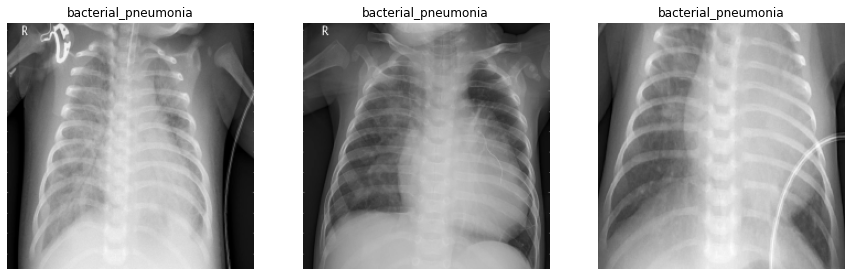

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 15))
for i in range(3):
    ax[i].set_axis_off()
    ax[i].imshow(X_train[i])
    ax[i].set_title(categories[np.argmax(Y_train[i])])

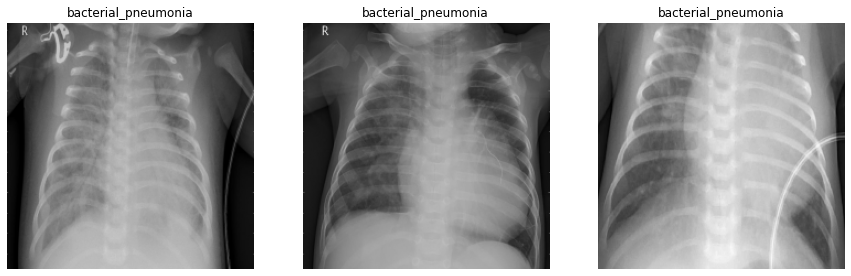

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 15))
for i in range(3):
    ax[i].set_axis_off()
    ax[i].imshow(X_train_255[i])
    ax[i].set_title(categories[np.argmax(Y_train[i])])

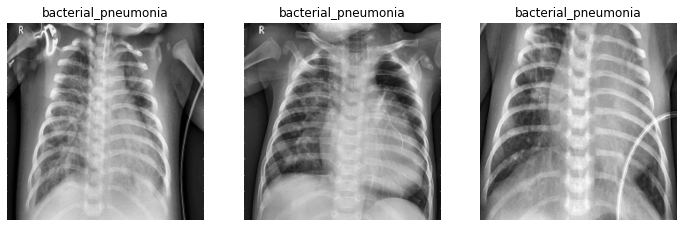

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12, 12))
for i in range(3):
    ax[i].set_axis_off()
    ax[i].imshow(X_train_CLAHE[i])
    ax[i].set_title(categories[np.argmax(Y_train[i])])

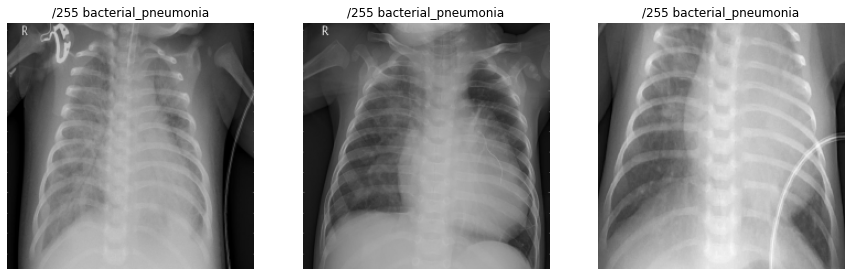

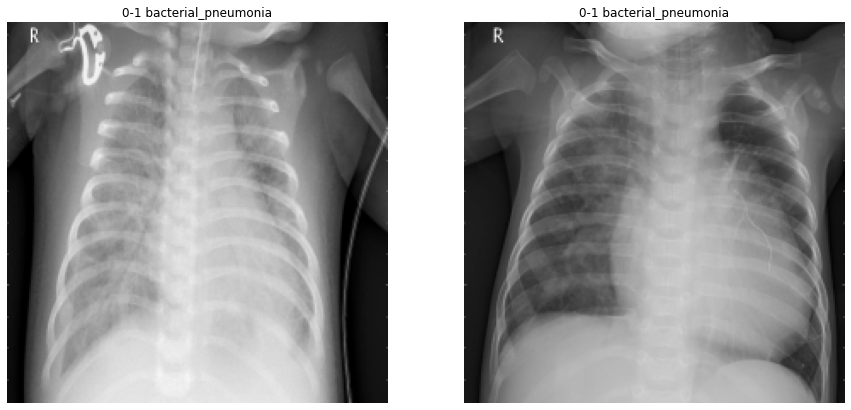

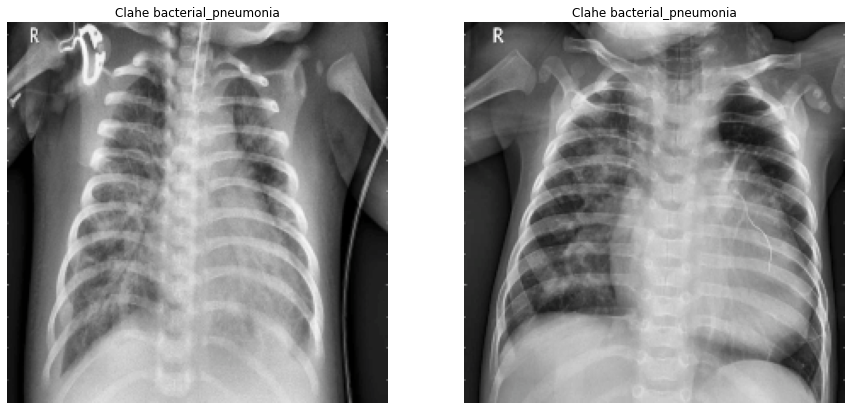

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 15))

for i in range(3):
    ax[i].set_axis_off()
    ax[i].imshow(X_train_255[i])
    ax[i].set_title("/255 " + categories[np.argmax(Y_train[i])])

fig1, ax = plt.subplots(1, 2, figsize=(15, 15))
for i in range(2):
    ax[i].set_axis_off()
    ax[i].imshow(X_train[i])
    ax[i].set_title("0-1 " + categories[np.argmax(Y_train[i])])

fig2, ax = plt.subplots(1, 2, figsize=(15, 15))
for i in range(2):
    ax[i].set_axis_off()
    ax[i].imshow(X_train_CLAHE[i])

    ax[i].set_title("Clahe " + categories[np.argmax(Y_train[i])])